<h2>Self Case Study on Mercedes-benz greener manufacturing explained </b></h2>

<h2>Business problem</h2>

<p>Since the first automobile, the Benz Patent Motor Car in 1886, Mercedes-Benz has stood for important automotive innovations. These include, for example, the passenger safety cell with crumple zone, the airbag and intelligent assistance systems. Mercedes-Benz applies for nearly 2000 patents per year, making the brand the European leader among premium car makers. Daimler’s Mercedes-Benz cars are leaders in the premium car industry. With a huge selection of features and options, customers can choose the customized Mercedes-Benz of their dreams</p>

<p>To ensure the safety and reliability of each and every unique car configuration before they hit the road, Daimler’s engineers have developed a robust testing system. But, optimizing the speed of their testing system for so many possible feature combinations is complex and time-consuming without a powerful algorithmic approach. As one of the world’s biggest manufacturers of premium cars, safety and efficiency are paramount on Daimler’s production lines</p>

<img src = "https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcQAB59iy1oMScF_LUVgWNTbOs9FSKGN2zw64K1HQl3zaNeoaej3"></img>

<img src = "https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcTADrAryZWM2MQP_Wr1MoX1NEp88qgZJ7nMpSB9hsdpkAD6QXKJ"></img>

<p><b><u>What we achieve with this case study</u> : In this Case study we will reduce the time that cars spend on the test bench</p>

<h2>Data Given</h2>


	Column    Type	    Count
    0	      int64   	 369
    1	      float64	  1
    2	      object	   8
    
<pre>1) We have given 4209 rows and 378 features, Above is the type of the coloumn data given to us.</pre>
<pre>2) We have given 4209 rows and 377 features, Above is the type of the coloumn data given to us for test also</pre>
<pre>3) For kaggle competition R^2 is the score that they want us to optimize.</pre>

<h2>Problem Analysis.</h2>
    <pre>1. <b>Regression problem</pre>
    <pre>2.<b> Problem Interpretibility</b> : As we have not been given column name, we can't interpret this problem based on the                 features we have given. Although , we can say best column number to get the best result </pre>
    <pre>3. <b>Measurement criterian used</b> : R^2 and RMSE, Kaggle used R^2 to measure private score </pre>

<pre>4. As we have to predict values of y(dependent variable) in sec, this is regression problem, i will use different regression models to solve this problem and at last i will try deep learning model to predict y as well</pre>



<h2>Content</h2>
<h3>1. Data Exploration</h3>
<p>1.1. Checking for Y values range.</p>
<p>1.2. Checking for catagotical features.</p>
<pre>1.2.1 Bar graphs for catagorical features</pre>
<pre>1.2.2 Violin plot for catagorical features</pre>
<pre>1.2.3 Summary</pre>
<p>1.3. Plot for Binnary features</p>
<pre>1.3.1 Summary</pre>
<p>1.4. Correlation between independent features and dependent features(pearson correlation)</p>
<pre>1.4.1 Summary</pre>
<h3>2. Data Cleaning</h3>
<h3>3. Pre-Processing</h3>
<pre>3.1. Created functon for Label Encoder and One hot encoder.</pre>
<h3>4. Data Decomposition</h3>
<pre>4.1. Using PCA,TSVD and other feature reduction techniques.</pre>
<h3>5. Machine Learning Model Architecture</h3>
<pre>5.1.1 Linear Regression with Ridge</pre>
<pre>5.1.2 Linear Regression with Lasso</pre>
<pre>5.1.3 Linear Regression with Elsatic net</pre>
<pre>5.1.4 Linear Regression with LARSLasso</pre>
<pre>5.1.5 Decision tree with Elsatic net</pre>
<pre>5.1.6 SVM Regressor</pre>
<pre>5.1.7 Ensemble : XGBOOST</pre>
<pre>5.1.8 Ensemble : GRAGIENT BOOSTING</pre>
<pre>5.1.9 Stacked model</pre>
<h3>6.Evaluation</h3>
<pre>6.1. Average of XGBOOST and Stacked model to provdie robustness to our final model.</pre>
<pre>6.2. Kaggle Result : Got under top private score 3.6% iwth R^2 value : 55.241</pre>
<h3>7.Deep Learning Model Architecture</h3>
<h3>8.Summary of whole Case Study</h3>
<h3>9.Possible Further Experiment</h3>



<h1>Case Study Score : .55241 in private score which is under top 3.5%</h1>

<img src = "https://i.imgur.com/E7IrUlE.png" width="800" height="100"></img>

In [4]:
import pandas as pd
import numpy as np
from sklearn.base import BaseEstimator,TransformerMixin, ClassifierMixin
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.linear_model import ElasticNetCV, LassoLarsCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.pipeline import make_pipeline, make_union
from sklearn.utils import check_array
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.random_projection import GaussianRandomProjection
from sklearn.random_projection import SparseRandomProjection
from sklearn.decomposition import PCA, FastICA
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.feature_extraction.text import CountVectorizer
from tqdm.notebook import tqdm
from sklearn.ensemble import GradientBoostingRegressor
from scipy.sparse import hstack
from sklearn.model_selection import train_test_split
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import Ridge,Lasso,ElasticNet,LassoLarsCV
import warnings
from sklearn.svm import SVR
warnings.filterwarnings("ignore")
from sklearn.linear_model import Lasso,LinearRegression
from sklearn.model_selection import cross_validate
# from google.colab import drive
import io,pickle

In [11]:
array_ = [[9.88927603e-01, 1.60483718e-02, 3.61552536e-02, 8.33171606e-03,
        9.95934010e-04],
       [9.83519673e-01, 1.76691711e-02, 4.19133902e-02, 1.11596882e-02,
        1.26475096e-03],
       [9.90555644e-01, 1.06865168, 2.10005045e-02, 5.78066707e-03,
        9.44584608e-04],
       [9.86788511e-01, 5.83055615e-03, 6.97186589e-03, 1.09771788e-02,
        3.18610668e-03],
       [9.92828250e-01, 1.06957555e-02, 2.06945539e-02, 4.42245603e-03,
        7.28964806e-04],
       [9.86620665e-01, 1.18021965e-02, 2.40246654e-02, 8.02928209e-03,
        1.24379992e-03],
       [9.99000669e-01, 2.69708037e-03, 2.76818871e-03, 6.27309084e-04,
        1.34706497e-04],
       [9.88276958e-01, 1.15403235e-02, 2.33366191e-02, 7.07015395e-03,
        1.10664964e-03]]

In [12]:
multilable_main = []
for i in array_:
    multilable = []
    for j in i:
        if (j>.5):
            multilable.append(1)
        else:
            multilable.append(0)
    multilable_main.append(multilable)

In [13]:
multilable_main

[[1, 0, 0, 0, 0],
 [1, 0, 0, 0, 0],
 [1, 1, 0, 0, 0],
 [1, 0, 0, 0, 0],
 [1, 0, 0, 0, 0],
 [1, 0, 0, 0, 0],
 [1, 0, 0, 0, 0],
 [1, 0, 0, 0, 0]]

In [3]:
train = pd.read_csv("train/train.csv")
test = pd.read_csv("test/test.csv")

<h2>1.Data Exploration</h2>

<h3>1.1. Checking for Y values range :</h3>

In [5]:
dtype_df = train.dtypes.reset_index()
dtype_df.columns = ["Count", "Column Type"]
dtype_df.groupby("Column Type").aggregate('count').reset_index()

,Column Type,Count
0,int64,369
1,object,8


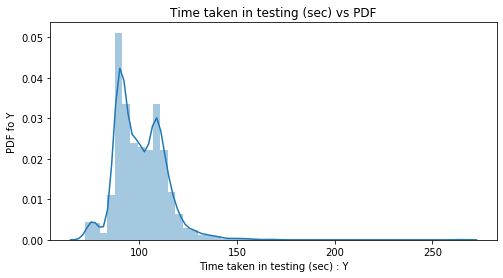

In [15]:
# Cheking for Y values range : 
plt.figure(figsize=(8,4))
plt.title("Time taken in testing (sec) vs PDF")
sns.distplot(train["y"])
plt.xlabel("Time taken in testing (sec) : Y")
plt.ylabel("PDF fo Y")
plt.show()

<img src = "https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcQmpsaHLkv3d85Eamq-zGl2K2cA4d3xptRbr4XGZ79R9pl6sn2n"
width="60" height="34">

<font face="verdana" color="006400"><b><u>My Thought Process </u>: Ohh!! In Dependent variable Y i think there are some outliers (Some right skewness i can see) which can affect my R^2 value when i will use them in my upcoming model, let's check what are those outliers values.Let's see these outlier value closely</font>

In [37]:
# Lets check how many points after 150 sec
import numpy as np
def percentile_(start,end,step):
    for i in range(start,end,step):
        print(f"{i}% percentile point :  {np.percentile(train['y'],i)}")
print("#"*18 + "Summary" + "#"*18)
percentile_(0,101,10)
print("#"*40)
percentile_(90,101,1)
print(f"Total points after 150 sec are  : {len([i for i in train['y'] if i > 150])}")
print("#"*40)
# print(f"Points are a follow  : \n{[i for i in train['y'] if i > 150]}")



##################Summary##################
0% percentile point :  72.11
10% percentile point :  88.07
20% percentile point :  89.96
30% percentile point :  91.91
40% percentile point :  94.84
50% percentile point :  99.15
60% percentile point :  103.77
70% percentile point :  107.766
80% percentile point :  110.594
90% percentile point :  115.25
100% percentile point :  265.32
########################################
90% percentile point :  115.25
91% percentile point :  116.0484
92% percentile point :  116.89160000000001
93% percentile point :  118.0376
94% percentile point :  119.056
95% percentile point :  120.80600000000001
96% percentile point :  122.4
97% percentile point :  125.89319999999998
98% percentile point :  129.2992
99% percentile point :  137.4304
100% percentile point :  265.32
Total points after 150 sec are  : 15
########################################


<img src = "https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcQmpsaHLkv3d85Eamq-zGl2K2cA4d3xptRbr4XGZ79R9pl6sn2n"
width="60" height="34">

<font face="verdana" color="006400"><b><u>My Thought Process </u>:Well!! i was right i can see there is large gap between 99 precentile and 100 precentile values i.e. jumping from 137.43 to 265.32 which is larger than others differences comparatively Woohh,
Let's see that in graph how it looks.......</font>

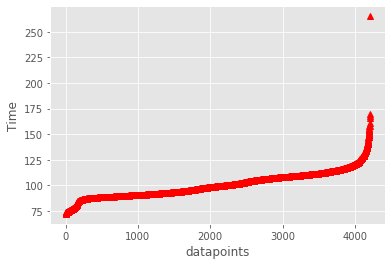

In [0]:
plt.plot(sorted(train['y']),'r^')
plt.xlabel("datapoints")
plt.ylabel("Time")
plt.show()

<img src = "https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcQmpsaHLkv3d85Eamq-zGl2K2cA4d3xptRbr4XGZ79R9pl6sn2n"
width="60" height="34">

<font face="verdana" color="006400"><b><u>My Thought Process </u> Goccha!! There is that value sitting alone after 250 sec, umm,what should i do now, let's remove this 265.32 with mean of the Y. that will be great idea because that value will fit inside my nice curve above and will not affect my R*2, if it will not give good result i will come back here and see what value should i give here.....</font>

mean value of Y is : 100.66931812782121


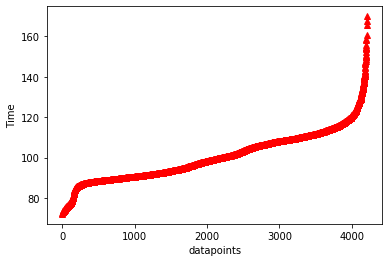

In [33]:
clipped_y = []
print("mean value of Y is :", np.mean(train['y']))
[clipped_y.append(np.mean(train['y'])) if i>250 else clipped_y.append(i) for i in train['y']]
train['y'] = clipped_y
plt.plot(sorted(train['y']),'r^')
plt.xlabel("datapoints")
plt.ylabel("Time")
plt.show()

<img src = "https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcQmpsaHLkv3d85Eamq-zGl2K2cA4d3xptRbr4XGZ79R9pl6sn2n"
width="60" height="34">

<font face="verdana" color="006400"><b><u>My Thought Process </u>
<pre>1. After removing 265.32 point, i can see some more oulier, let's see what are those : 
Points are a follow  : 
[150.43, 169.91, 154.87, 265.32, 158.53, 154.43, 160.87, 150.89, 152.32, 167.45, 154.16, 158.23, 153.51, 165.52, 155.62]</pre></font>
    
<font face="verdana" color="Red"> <pre><b>2. I tried using more than 150 sec as outlier but considering 265.32 as outlier gave me good kaggle score which we will see further why that happened?</pre></font>
    
<font face="verdana" color="Red"><pre><b>3. Moreover, Considering 265.32 as outlier and imputing with 130 gave more heads up in kaggle private score, which is good point why? we will discuss further.</pre></font>

<font face="verdana" color="006400"><pre><b>3. Let's continue with treating more the 150 as outlier and impute it with mean of train["y] which is 100</pre></font>

In [38]:
print(f"Points are a follow  : \n{[i for i in train['y'] if i > 150]}")

Points are a follow  : 
[150.43, 169.91, 154.87, 265.32, 158.53, 154.43, 160.87, 150.89, 152.32, 167.45, 154.16, 158.23, 153.51, 165.52, 155.62]


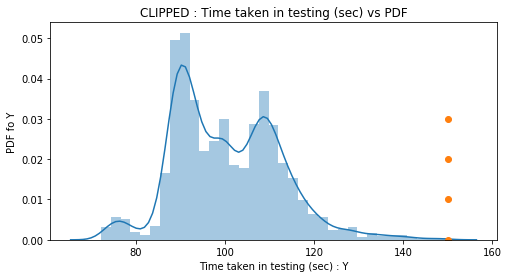

In [39]:
plt.figure(figsize=(8,4))
clipped_y = []
[clipped_y.append(100.66931812782121) if i>150 else clipped_y.append(i) for i in train['y']]
# We will clip Y values after 150 sec so that outliers will not affect our result that much.
plt.title("CLIPPED : Time taken in testing (sec) vs PDF")
sns.distplot(clipped_y)
plt.xlabel("Time taken in testing (sec) : Y")
plt.ylabel("PDF fo Y")
plt.plot([150,150,150,150],[0,.01,.02,.03],'o')
plt.show()

In [46]:
# Lets check how many points after 150 sec
import numpy as np
def percentile_(start,end,step):
    for i in range(start,end,step):
        print(f"{i}% percentile point :  {np.percentile(clipped_y,i)}")
print("#"*18 + "Summary" + "#"*18)
print(f"Total points after 150 sec are  : {len([i for i in clipped_y if i > 150])}")
print("#"*40)
print(f"Points are a follow  : \n{[i for i in clipped_y if i > 150]}")

##################Summary##################
Total points after 150 sec are  : 0
########################################
Points are a follow  : 
[]


<h3>1.2. Checking for catagorical features Features :</h3>
<p>We have 8 catagorical : ['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8'] , remaining all binary</p>
<p><b>1.2.1. Bar graphs</p>

In [0]:
dtype_df = train.dtypes.reset_index()
dtype_df.columns = ["Count", "Column Type"]
dtype_df.groupby("Column Type").aggregate('count').reset_index()

,Column Type,Count
0,int64,369
1,float64,1
2,object,8


In [0]:
for key,value  in train.columns.to_series().groupby(train.dtypes).groups.items():
    if key == 'O':
        print("Catagorical features : ",value)

Catagorical features :  Index(['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8'], dtype='object')


In [0]:
Categorcial_dict = {}
for i in ['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8']:
    Categorcial_dict.update({i : len(train[i].value_counts())})

<Figure size 576x288 with 0 Axes>

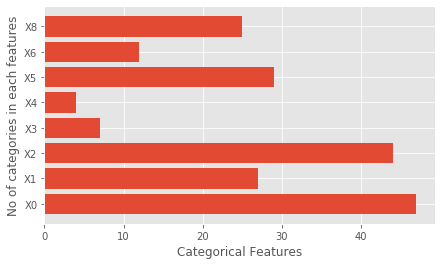

Total catagories in train data : 195


In [0]:
# plt.style.available
plt.figure(figsize=(8,4))
plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(7,4))
plt.barh(list(Categorcial_dict.keys()) , list(Categorcial_dict.values()), animated = 1)
# df.plot(kind='barh', legend = False, ax=ax)
ax.set_xlabel('Categorical Features')
ax.set_ylabel('No of categories in each features')
plt.show()
print(f"Total catagories in train data : {sum(Categorcial_dict.values())}")

<img src = "https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcQmpsaHLkv3d85Eamq-zGl2K2cA4d3xptRbr4XGZ79R9pl6sn2n"
width="60" height="34">

<font face="verdana" color="006400"><b><u>My Thought Process</u></b></font>


<font face="verdana" color="006400"> <pre><b>1. We have 8 catagorical features, 1 numerical, remaining 369 features are binnary features</b></pre></font>

<font face="verdana" color="006400"> <pre><b>2. While looking catagorical features number of catagory we can see that X0 and X2 are the features whith more than 40 catagory so these features might be some features of the car with som nay variants in it. Might be possible!! not sure</b></pre></font>

<font face="verdana" color="006400"> <pre><b>3. While looking catagorical features number of catagory we can see that X0 and X2 are the features whith more than 40 catagory so these features might be some features of the car with som nay variants in it. Might be possible!! not sure</b></pre></font>


<font face="verdana" color="006400"> <pre><b>4. X4 is the features with least number of catagories in it</b></pre></font>
    

</font>

<p><b>1.2.2. Violin plot for catagorical features</p>

In [47]:
# This function create boxplot.
def Boxplot(feature_name): 
    plt.style.use('seaborn-poster')
    plt.figure(figsize=(16,6))
    sns.boxplot(y='y', x=feature_name, data=train[['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8','y']])
    plt.ylabel("Clipped y under 180")
    return plt

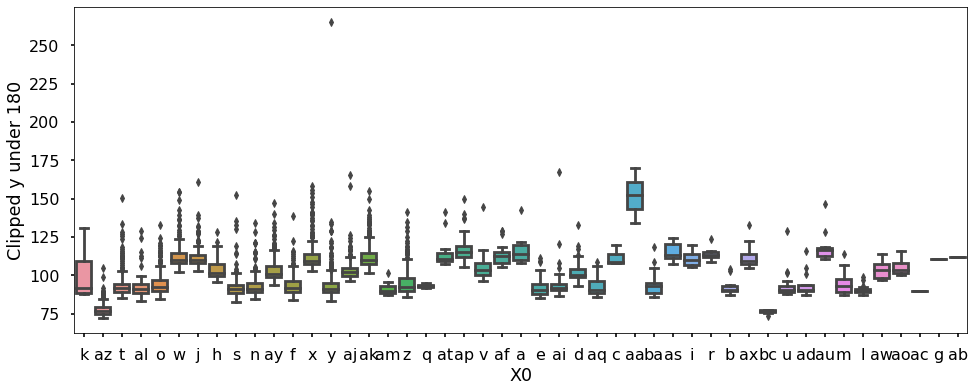

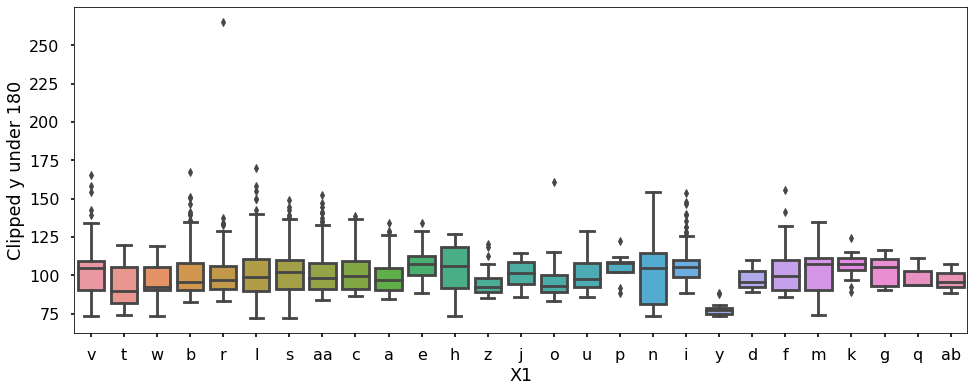

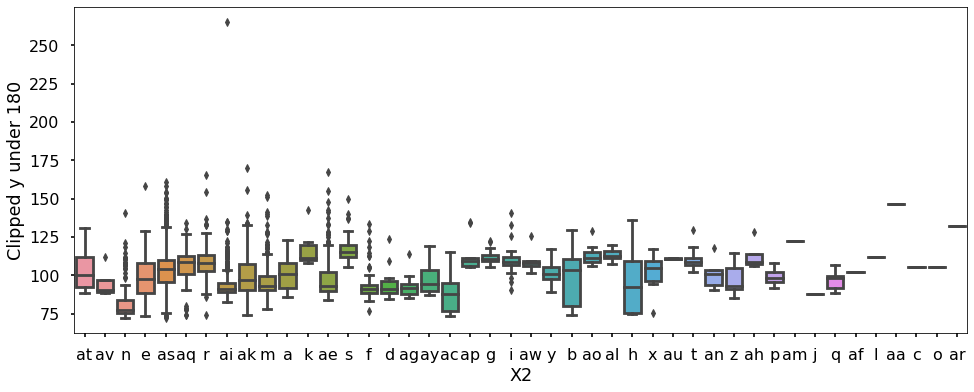

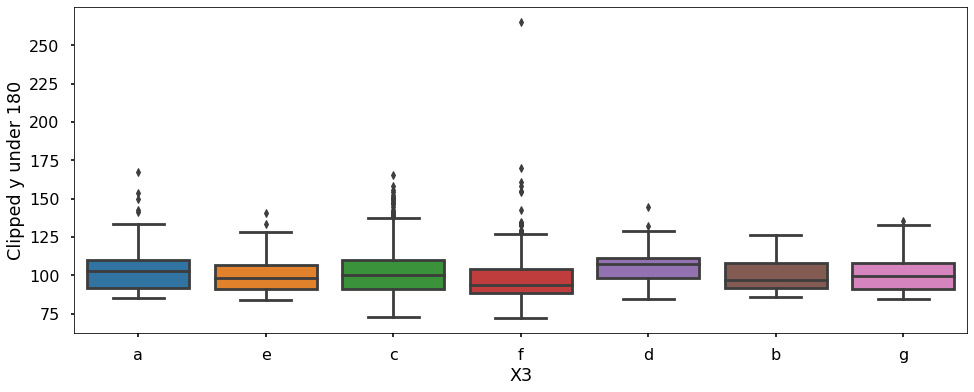

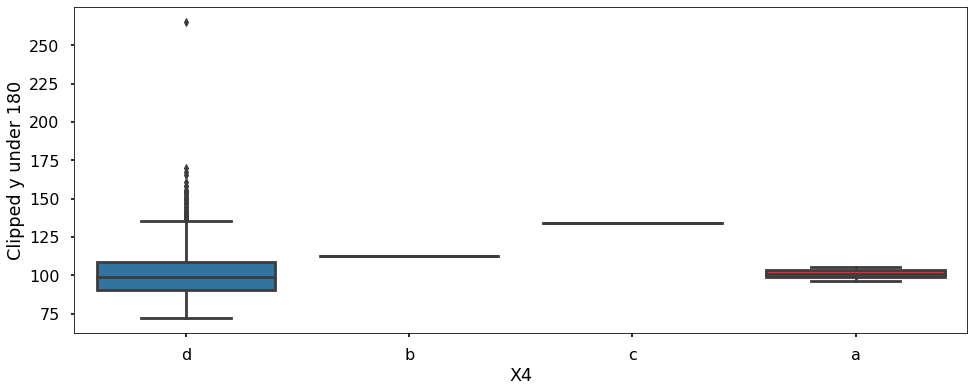

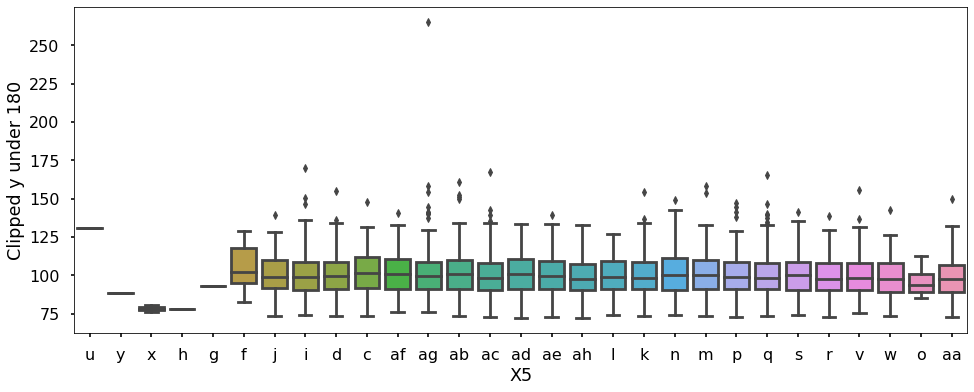

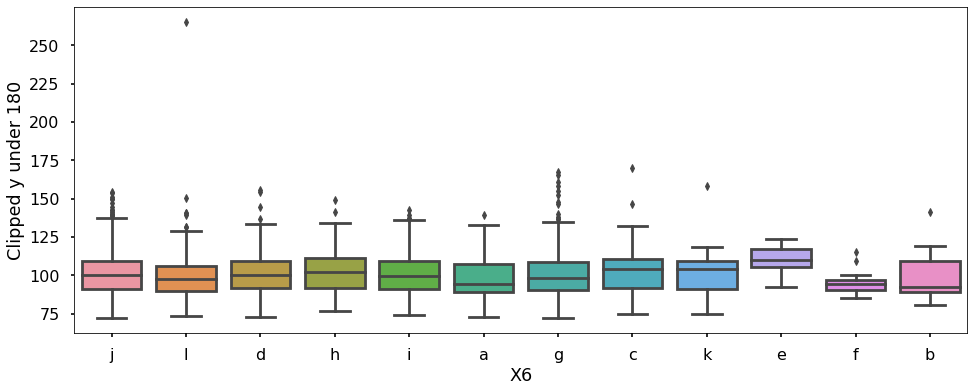

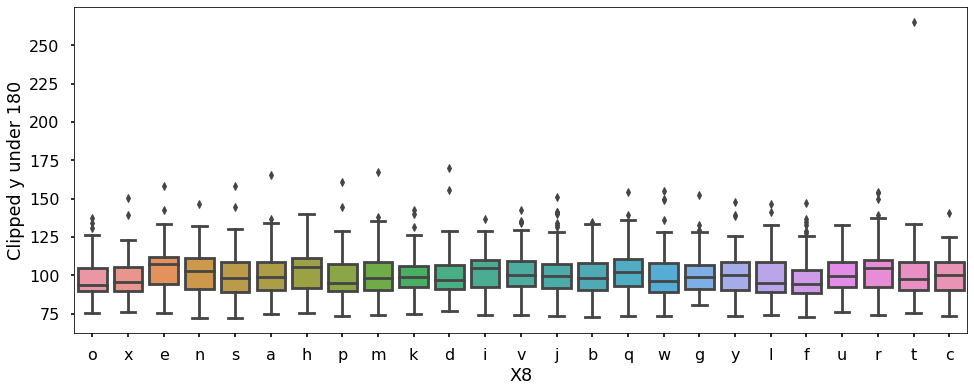

In [0]:
for i in ['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8']:
    plot =  Boxplot(i)
    plot.show()

<p><b><u>Summary</u> : Observations from above catagorical plots</p>

<p><b>0. Above box plot show each catagory of feature's quantile range w.r.t (Y)</p></br>
<p><b>1. X0 and X2 contain more than 40 catagories </p></br>
<p><b>2. X0, X2, X5 contain more number of outliers </p></br>
<p><b>3. X3 conatinas less noise but not well seprated box plots </p></br>
<p><b>4. X3, X4 contains less than 8 catagories </p></br>
<p><b>5. In X4 most of the datapoints is of "d" catagory</p></br>
<p><b>6. From above we can't say that which is very good in prediciting Y value, By seeing thing i get the idea to use either forward featiure selection or correlation factor with Y(Pearson correlation)</p></br>

<h3><b>1.3. Plot for Binnary features</h3>

In [0]:
catagorical_features = ['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8','y','ID']
binnary_features = [i for i in train.columns.tolist() if i not in catagorical_features]

In [0]:
bar_dict_0 = dict()
bar_dict_1 = dict()
for i in binnary_features:
    bar_dict_0.update({i : list(train[i].value_counts().reset_index().iloc[0])[1] })
    
for i in binnary_features:
    if (len(list(train[i].value_counts())) == 1):
        bar_dict_1.update({i : 0})
    else:
        bar_dict_1.update({i : list(train[i].value_counts().reset_index().iloc[1])[1] })    

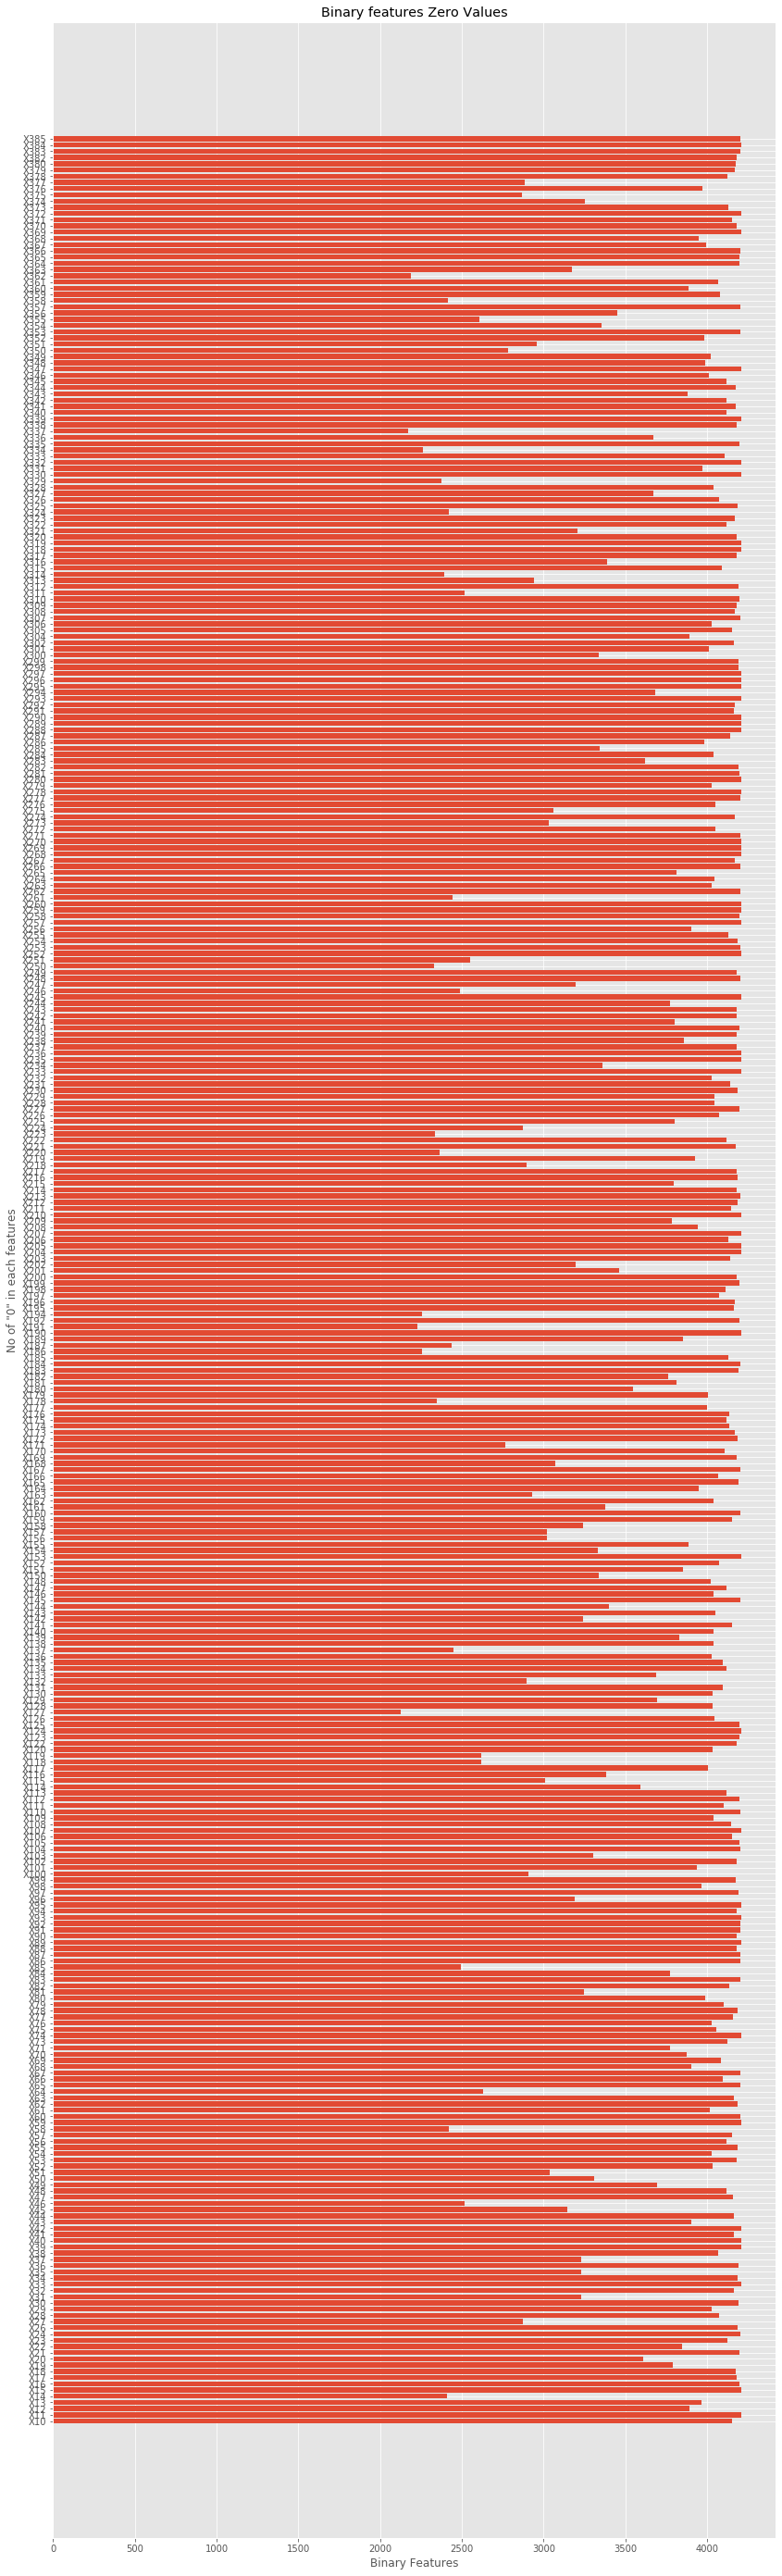

In [0]:
# plt.style.available
# plt.figure(figsize=(16,8))

plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(14,50))
plt.barh(list(bar_dict_0.keys()) , list(bar_dict_0.values()))
# df.plot(kind='barh', legend = False, ax=ax)
ax.set_xlabel('Binary Features')
ax.set_ylabel('No of "0" in each features')
plt.title("Binary features Zero Values")
plt.show()

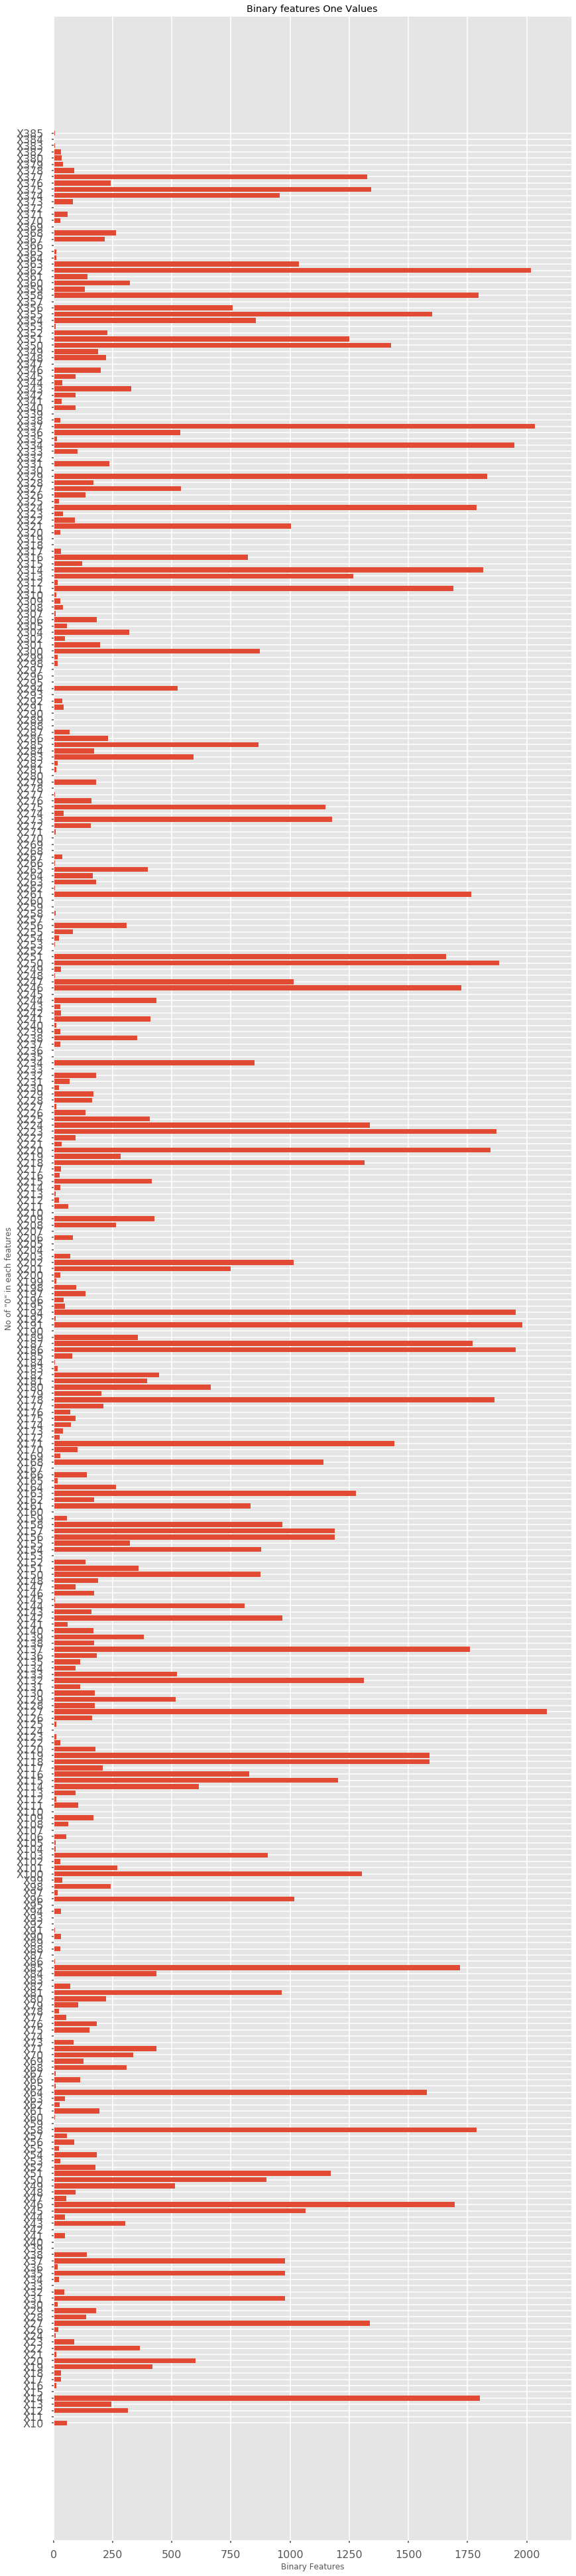

In [0]:
plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(14,70))
plt.barh(list(bar_dict_1.keys()) , list(bar_dict_1.values()))
# df.plot(kind='barh', legend = False, ax=ax)
ax.set_xlabel('Binary Features')
ax.set_ylabel('No of "0" in each features')
plt.title("Binary features One Values")
plt.show()

In [0]:
Total_one = len(bar_dict_1.values())
Lessthan_10 = len([i for i in bar_dict_1.values() if i==0])
print(f"Percentage of binary features which contain less one values {Lessthan_10*100/Total_one}%")

Percentage of binary features which contain less one values 3.260869565217391%


In [0]:
All_zeroes = [i for i,k in bar_dict_1.items() if k==0]
print(All_zeroes)
'''All zero coloumns are above and it's good to remove these features as they are not adding that much importance to the Y value :'''


['X11', 'X93', 'X107', 'X233', 'X235', 'X268', 'X289', 'X290', 'X293', 'X297', 'X330', 'X347']


"All zero coloumns are above and it's good to remove these features as they are not adding that much importance to the Y value :"

<img src = "https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcQmpsaHLkv3d85Eamq-zGl2K2cA4d3xptRbr4XGZ79R9pl6sn2n"
width="60" height="34">

<font face="verdana" color="006400"><b><u>My Thought Process </u>: 
<pre>1. There is no binary feature which doesnot contain zero.</pre>
<pre>2. There are features which only contain zero.</pre>
<pre>3. 'X11', 'X93', 'X107', 'X233', 'X235', 'X268', 'X289', 'X290', 'X293', 'X297', 'X330', 'X347', Features which only contain zero value.</pre>
<pre>4. we can remove above mention features from our models as these features will not contribute in our predictions as no correlation , Is it theese features don't have any correlation ? let's check the correlation of these features with our Y value</pre>
    
</font>

<h3><b>1.4. Correlation between independent features and dependent features(pearson correlation)</h3>

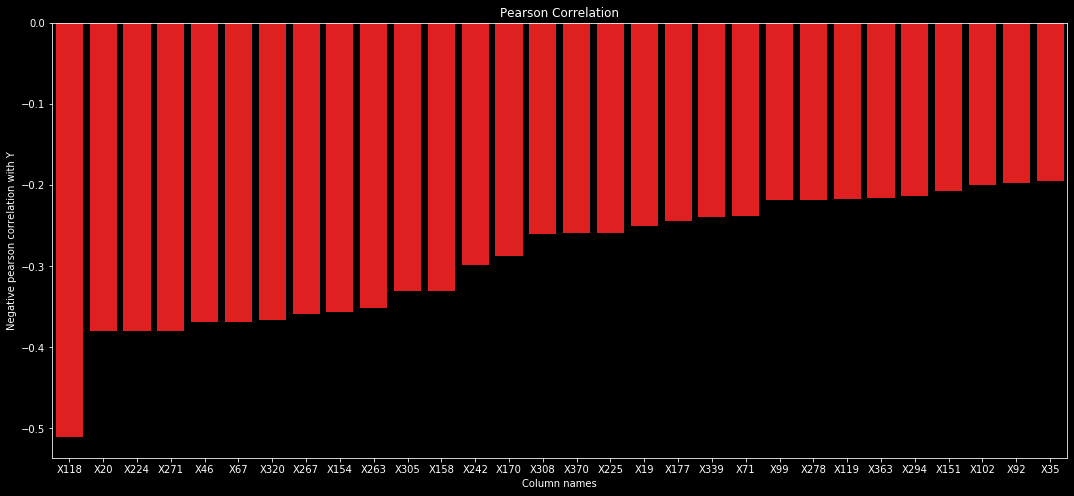

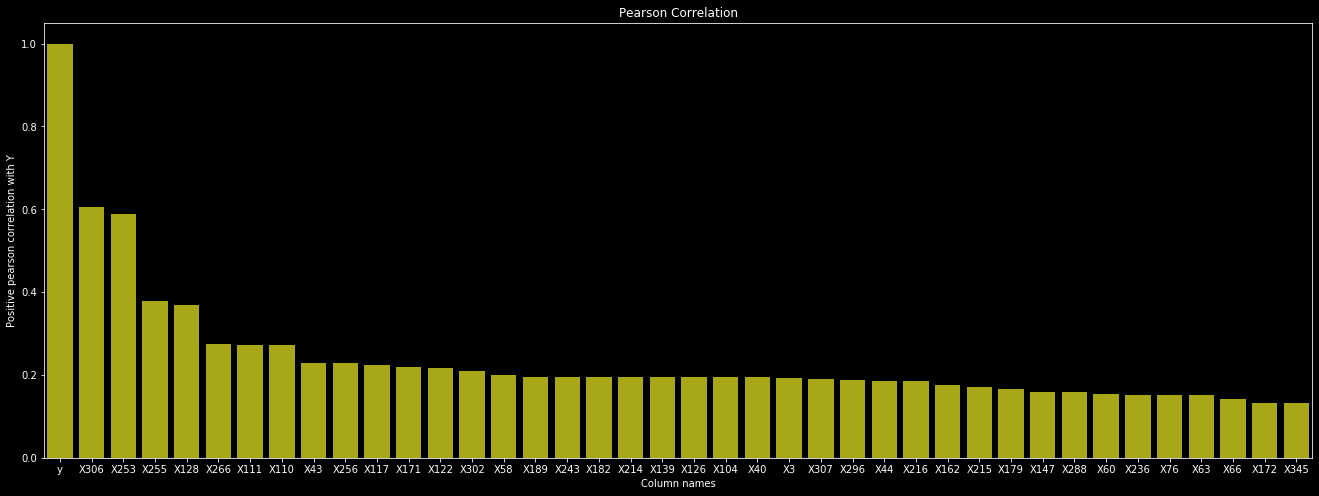

In [58]:
from scipy.stats import pearsonr
Correlation = train.corr()
Correlation = pd.DataFrame(Correlation['y'] )
Correlation.dropna(inplace=True,axis=0)
Zero_correlation = ['X11', 'X93', 'X107', 'X233', 'X235', 'X268', 'X289', 'X290', 'X293', 'X297', 'X330', 'X347']

zipped = zip([i for i in train.columns if i not in Zero_correlation],[i[0] for i in Correlation.values.tolist()])
# Using sorted and lambda 
res = sorted(zipped, key = lambda x: x[1])

plt.style.use('dark_background')
plt.figure(figsize=(40,8))
plt.subplot(1,2,1)
sns.barplot([i[0] for i in res][:30],[i[1] for i in res][:30],color = 'r')
plt.xlabel("Column names")
plt.ylabel("Negative pearson correlation with Y")
plt.title("Pearson Correlation")
plt.show()

plt.figure(figsize=(50,8))
plt.subplot(1,2,2)
sns.barplot([i[0] for i in res][::-1][:40],[i[1] for i in res][::-1][:40],color = 'y')
plt.xlabel("Column names")
plt.ylabel("Positive pearson correlation with Y")
plt.title("Pearson Correlation")
plt.show() 

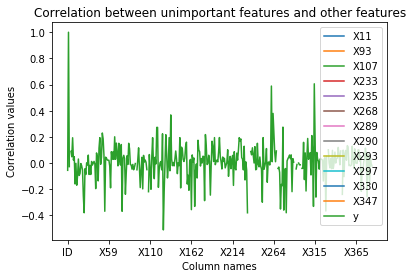

In [54]:
Correlation = train.corr()
Correlation = Correlation[['X11', 'X93', 'X107', 'X233', 'X235', 'X268', 'X289', 'X290', 'X293', 'X297', 'X330', 'X347','y']]
Correlation.plot()
plt.title("Correlation between unimportant features and other features")
plt.xlabel("Column names")
plt.ylabel("Correlation values")
plt.show()

<img src = "https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcQmpsaHLkv3d85Eamq-zGl2K2cA4d3xptRbr4XGZ79R9pl6sn2n"
width="60" height="34">

<font face="verdana" color="006400"><b><u>My Thought Process </u>: 
<pre>1. Pearson correlation : Positive value signifies linear dependency like when feature increases dependent variable also increases and negative values of correlation signifies like when one increase dependent variable decreases</pre>
<pre>2. We can see red bar graph shows negative correlation of all features with Y features, i selected only top  most values to see visually</pre>
<pre>3. We can see green bar graph shows positive  correlation of all features with Y features, i selected only top  most values to see visually.</pre>
<pre>4. Last graph shows that there is not correlation between 'X11', 'X93', 'X107', 'X233', 'X235', 'X268', 'X289', 'X290', 'X293', 'X297', 'X330', 'X347' features as i can't see any other color in the graph other than green which signifies Y values correlation with other features.</pre>
<pre>5. We can remove these features.</pre>
<pre>6. From the graph above we can see ID feature has -.005 correlation with y so will keep it but will standardize it as it is of higher scale..</pre>
    
</font>

<h3>2. Data Cleaning</h3>
<pre>For data cleaning i have 5 thought process to try with, I will try each process one by one.Please see below....</pre>


<img src = "https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcQmpsaHLkv3d85Eamq-zGl2K2cA4d3xptRbr4XGZ79R9pl6sn2n"
width="60" height="34">

<font face="verdana" color="006400"><b><u>Data Cleaning My Thought Process 1.</u>: Removing more than 150 sec values from the dependent variable y and impute means of train['y'] only</font>
    
<font face="verdana" color="006400"><b><u>Data Cleaning My Thought Process 2.</u>: Removing more than 150 sec values from the dependent variable y and impute means of train['y'] and removing the unimportant features 'X11', 'X93', 'X107', 'X233', 'X235', 'X268', 'X289', 'X290', 'X293', 'X297', 'X330', 'X347'</font>

In [29]:
"""My Thought Process 1."""
# Clipping fo our y values till 150
clipped_y  =[]
# Imputing the value higher than 150 with mean of the train['y'] i.e. 100 approx.
[clipped_y.append(np.mean(train['y'])) if i>150 else clipped_y.append(i) for i in train['y']]
train['y'] = clipped_y

actual_y = train["y"]
# Dropping the dependent variable form the train dataframe.
train.drop("y",inplace=True,axis=1) 

In [18]:
"""My Thought Process 2."""
# Clipping fo our y values till 150
clipped_y  =[]
# Imputing the value higher than 150 with mean of the train['y'] i.e. 100 approx.
[clipped_y.append(np.mean(train['y'])) if i>150 else clipped_y.append(i) for i in train['y']]
train['y'] = clipped_y

actual_y = train["y"]
# Dropping the dependent variable form the train dataframe.
train.drop("y",inplace=True,axis=1) 

train.drop(['X11', 'X93', 'X107', 'X233', 'X235', 'X268', 'X289', 'X290', 'X293', 'X297', 'X330', 'X347'],inplace=True,axis = 1)

<img src = "https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcQmpsaHLkv3d85Eamq-zGl2K2cA4d3xptRbr4XGZ79R9pl6sn2n"
width="60" height="34">

<font face="verdana" color="006400"><b><u>Data Cleaning My Thought Process 3.</u>: Removing oulier 265.32 values from the dependent variable y and impute means of train['y'] only </font>   

In [143]:
"""My Thought Process 3."""
# Clipping fo our y values till 150
clipped_y  =[]
# Imputing the value higher than 150 with mean of the train['y'] i.e. 100 approx.
[clipped_y.append(np.mean(train['y'])) if i>250 else clipped_y.append(i) for i in train['y']]
train['y'] = clipped_y

actual_y = train["y"]
# Dropping the dependent variable form the train dataframe.
train.drop("y",inplace=True,axis=1) 

<img src = "https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcQmpsaHLkv3d85Eamq-zGl2K2cA4d3xptRbr4XGZ79R9pl6sn2n"
width="60" height="34">

<font face="verdana" color="006400"><b><u>Data Cleaning My Thought Process 4.</u>: Removing oulier 265.32 values from the dependent variable y and impute with different values
    and check the kaggle score, At last i got 130 as the best value to immpute the outlier point with.</font>
      

In [160]:
"""My Thought Process 5."""
# Clipping fo our y values till 150
clipped_y  =[]
# Imputing the value higher than 150 with mean of the train['y'] i.e. 100 approx.
[clipped_y.append(130) if i>180 else clipped_y.append(i) for i in train['y']]
train['y'] = clipped_y

actual_y = train["y"]
# Dropping the dependent variable form the train dataframe.
train.drop("y",inplace=True,axis=1) 

<h3>3. Data pre-processing</h3>

<img src = "https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcQmpsaHLkv3d85Eamq-zGl2K2cA4d3xptRbr4XGZ79R9pl6sn2n"
width="60" height="34">

<font face="verdana" color="006400"><b><u>My Thought Process </u> How to encode these catagorical features, let's encode in two ways 1. Label Encoding 2. One hot Encoding, I will select the best working encoding technique.</font>

In [161]:

def OneHot_encoding_function(train,test):
    """This function is written to get the one hot encoded value of the catagorical features
        Author : Lucky Chauhan
        Date : 27-03-2020"""
    for c in tqdm(train.columns):
        if train[c].dtype == 'object': # Taking only the catagorical features form the dataframe
            lbl = OneHotEncoder() # calling one hot encoder 
            lbl.fit(np.array(train[c].values).reshape(-1, 1).tolist() + np.array(test[c].values).reshape(-1, 1).tolist())
            # Fitting one hot encoder for train and test both as we know the test data and we can fit test data aslo to generate vocabulary
            # though we don't do it like that in real life problems but it's a kaggle problem and the main motive is to 
            # increase the test private and public score
            Encoded_category = lbl.transform(np.array(train[c].values).reshape(-1, 1))
            # tranforming the train into one hot encoded
            train.drop(c,inplace = True,axis = 1) # dropping the column name.
            columns_ = []
            for i in range(Encoded_category.shape[1]):
                columns_.append(c +"_" +str(i))# Generating the column name.
            # Adding the column name to the dataframe.
            train = pd.concat([train, pd.DataFrame(Encoded_category.toarray(),columns=columns_)], axis=1, sort=False)
            # Tranforming th test values into one hot encoded values also.
            Encoded_category = lbl.transform(np.array(test[c].values).reshape(-1, 1))
            columns_ = []
            for i in range(Encoded_category.shape[1]):
                columns_.append(c +"_" +str(i))# Generating the column name.
            test.drop(c,inplace = True,axis = 1)
            # Adding the column name to the dataframe.
            test = pd.concat([test, pd.DataFrame(Encoded_category.toarray(),columns=columns_)], axis=1, sort=False)
            
    return [train,test]

def Label_encoding_function(train,test):
    """This function is written to get the Label encoder value of the catagorical features
        Author : Lucky Chauhan
        Date : 27-03-2020
    """
    for c in tqdm(train.columns):
        if c in ['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8']:
            lbl = LabelEncoder()# Initialising the labelencoder
            lbl.fit(list(train[c].values)+ list(test[c].values))# fitting labelencoder with train amd test both.
            train[c] = lbl.transform(list(train[c].values)) # tranforming the train dataframe catagorical coloumn
            test[c] = lbl.transform(list(test[c].values)) # tranforming the test dataframe catagorical coloumn
    return [train,test]

b = Label_encoding_function(train,test)# calling the Label encodiung function defined above
train = b[0]
test = b[1]

# b = OneHot_encoding_function(train,test)
# train = b[0]
# test = b[1]
scaled_train = train
scaled_test = test

<h3>4. Data Decomposition</h3>

In [145]:
def Decomposition_explained_variance(title,variance,component):
    """Return the graph of the explained variance of the PCA and TSVD
    Author : Lucky Chauhan
    Date : 27-03-2020"""
    plt.figure(figsize=(6,4))
    plt.title(title)
    X = [i for i in range(1,300)]
    plt.plot(X,variance)
    plt.axvline(x=component,color = 'r',dash_capstyle = 'round')
    plt.xlabel("Eigen Vectors")
    plt.xticks([i for i in range(1,300,10)])
    plt.ylabel("Explained variance")
    return plt

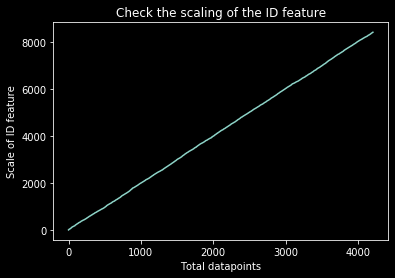

In [125]:
pd.Series(np.sort(train['ID'])).plot()
plt.title("Check the scaling of the ID feature")
plt.xlabel("Total datapoints")
plt.ylabel("Scale of ID feature")
plt.show()

<img src = "https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcQmpsaHLkv3d85Eamq-zGl2K2cA4d3xptRbr4XGZ79R9pl6sn2n"
width="60" height="34">

<font face="verdana" color="006400"><b><u>My Thought Process </u> I will apply now PCA,TSVD etc. but wait scale of the features  affect the expained variance so before applying PCA let's do scaling of the catagorical data which is now label encoded.
But which scaling should i use standerscale,minmax scal,normalization ?, In all linear model, data is first scaled than only feed into the model, so i will be using standardscaler to feed into the linear model same will be used here..</font>

In [153]:
columns_ = train.columns
std_scalar = StandardScaler()
scaled_train = std_scalar.fit_transform(train)
scaled_test = std_scalar.fit_transform(test)
scaled_train = pd.DataFrame(scaled_train,columns=columns_)
scaled_test = pd.DataFrame(scaled_test,columns=columns_)

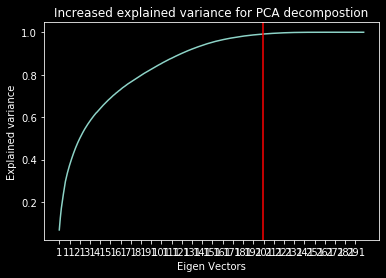

In [151]:
PCA_variance = []
for i in range(1,300):
    pca = PCA(n_components=i, random_state=420)
    pca2_results_train = pca.fit_transform(scaled_train)
    PCA_variance.append(pca.explained_variance_ratio_.sum())
plotting = Decomposition_explained_variance("Increased explained variance for PCA decompostion",PCA_variance)
plotting.show()

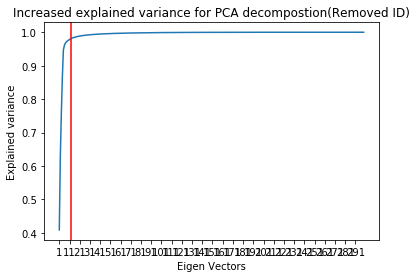

In [8]:
PCA_variance = []
for i in range(1,300):
    pca = PCA(n_components=i, random_state=420)
    pca2_results_train = pca.fit_transform(scaled_train.drop("ID",axis = 1))
    PCA_variance.append(pca.explained_variance_ratio_.sum())
plotting = Decomposition_explained_variance("Increased explained variance for PCA decompostion(Removed ID)",PCA_variance,12)
plotting.show()

In [142]:
print(PCA_variance[::-1][:10])

[0.9909105437894763, 0.9904915003704913, 0.990075492388566, 0.9896362100208143, 0.9891898246124341, 0.9887346844593898, 0.9882983257855456, 0.9878164006003525, 0.9873309361733401, 0.9867871250867614]


<img src = "https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcQmpsaHLkv3d85Eamq-zGl2K2cA4d3xptRbr4XGZ79R9pl6sn2n"
width="60" height="34">
<font face="verdana" color="006400"><b><u>My Thought Process </u> Scaled features has best explained features number = 200 and unscaled features has best explained features number = 12, Please sea above</font>

In [162]:
import copy
# from above plot we are taking 12 n_components
n_comp = 12
# from above plot for unscaled features we are n_componets value = 200
# n_comp = 200

def decomposed_features(train_,test_):
    """
     This function is used to decomposed the features into lower dimensions by using different 
     dimnesional reduction techniques.
     1) TSVD
     2) PCA
     3) ICA
     4) GRP
     5) SRP  
    """
    # tSVD
    tsvd = TruncatedSVD(n_components=n_comp, random_state=420)
    tsvd_results_train = tsvd.fit_transform(train_)
    tsvd_results_test = tsvd.transform(test_)

    # PCA
    pca = PCA(n_components=n_comp, random_state=420)
    pca2_results_train = pca.fit_transform(train_)
    pca2_results_test = pca.transform(test_)

    # ICA
    ica = FastICA(n_components=n_comp, random_state=420)
    ica2_results_train = ica.fit_transform(train_)
    ica2_results_test = ica.transform(test_)

    # GRP
    grp = GaussianRandomProjection(n_components=n_comp, eps=0.1, random_state=420)
    grp_results_train = grp.fit_transform(train_)
    grp_results_test = grp.transform(test_)

    # SRP
    srp = SparseRandomProjection(n_components=n_comp, dense_output=True, random_state=420)
    srp_results_train = srp.fit_transform(train_)
    srp_results_test = srp.transform(test_)                                

    #save columns list before adding the decomposition components

    usable_columns = list(set(train_.columns) - set(['y']))

    # Append decomposition components to datasets
    for i in range(1, n_comp + 1):
        #below code is used to add the resultant decomposed features vertically(i.e we added 12 more coloumn in our original data) 
        train_['pca_' + str(i)] = pca2_results_train[:, i - 1]
        #below code is used to add the resultant decomposed features vertically(i.e we added 12 more coloumn in our original data
        test_['pca_' + str(i)] = pca2_results_test[:, i - 1]
         #below code is used to add the resultant decomposed features vertically(i.e we added 12 more coloumn in our original data
        train_['ica_' + str(i)] = ica2_results_train[:, i - 1]
        #below code is used to add the resultant decomposed features vertically(i.e we added 12 more coloumn in our original data
        test_['ica_' + str(i)] = ica2_results_test[:, i - 1]

        train_['tsvd_' + str(i)] = tsvd_results_train[:, i - 1]
        test_['tsvd_' + str(i)] = tsvd_results_test[:, i - 1]

        train_['grp_' + str(i)] = grp_results_train[:, i - 1]
        test_['grp_' + str(i)] = grp_results_test[:, i - 1]

        train_['srp_' + str(i)] = srp_results_train[:, i - 1]
        test_['srp_' + str(i)] = srp_results_test[:, i - 1]
    return [train_,test_]
# we are creating a deep copy in the memory one: 
# 1) original features 
# 2)other are original+decomposed features
decomposed_train = copy.deepcopy(scaled_train)
decomposed_test = copy.deepcopy(scaled_test)
decomposed_train,decomposed_test = decomposed_features(decomposed_train,decomposed_test)# This function is created above

# fixing coloum datatype
columns = scaled_train.columns
scaled_train[columns] = scaled_train[columns].apply(pd.to_numeric)
scaled_test[columns] = scaled_test[columns].apply(pd.to_numeric)

print(f"Train value : {scaled_train.shape}")
print(f"Test value : {scaled_test.shape}")
print(f"Decomposed_Train value : {decomposed_train.shape}")
print(f"DEcomposed_Test value : {decomposed_test.shape}")

Train value : (4209, 377)
Test value : (4209, 377)
Decomposed_Train value : (4209, 437)
DEcomposed_Test value : (4209, 437)


<h3>5. Machine Learning Model Architecture</h3>
<img src = "./Image.PNG" ></img>

<h3>5.1 All features models</h3>

<h4>5.1.1 Linear Regression with Ridge</h4>
<h4>5.1.2 Linear Regression with Lasso</h4>
<h4>5.1.3 Linear Regression with Elsatic net</h4>
<h4>5.1.4 Linear Regression with LARSLasso</h4>
<h4>5.1.5 RANSAC Regressor</h4>
<h4>5.1.6 Decision tree</h4>
<h4>5.1.7 SVR</h4>
<h4>5.1.8 XGBOOST</h4>
<h4>5.1.9 GBDT</h4>
<h4>5.1.10 Stacking model with best model</h4>
<h4>5.1.11 Voting Regressor with best model</h4>
<h4>5.1.12 Deep Learning model</h4>

<img src = "https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcQmpsaHLkv3d85Eamq-zGl2K2cA4d3xptRbr4XGZ79R9pl6sn2n"
width="60" height="34">
<h1><center>Let define some functions which we will be reusing.....</center></h1>

In [157]:
def ElasticNet_(alpha,train_df):
    """This function hypertune our Elastic net model and create a plot based on the tuning"""
    train_scores = []
    test_scores = []
    alpha_values = []
    for i_alpha in tqdm(alpha):
        linear_clf = ElasticNet(alpha=i_alpha, fit_intercept=True, normalize=False,random_state=23)

        Scores = cross_validate(linear_clf, train_df, actual_y, cv=10,scoring=('r2'),\
                                return_train_score=True)
        train_scores.append(np.mean(Scores['train_score']))
        test_scores.append(np.mean(Scores['test_score']))
        alpha_values.append(i_alpha)
    plt.title("Elastic Net Linear Model")
    plt.plot(alpha_values,train_scores)
    plt.plot(alpha_values,test_scores)
    plt.scatter(alpha_values,test_scores)
    plt.xlabel("Alpha values")
    plt.ylabel("Loss")
    return plt 

def Ridge_regression(alpha,train_df):
    """This function hypertune our Ridge model and create a plot based on the tuning"""
    train_scores = []
    test_scores = []
    alpha_values = []
    for i_alpha in tqdm(alpha):
        linear_clf = Ridge(alpha=i_alpha, fit_intercept=True, normalize = False,random_state=23)

        Scores = cross_validate(linear_clf, train_df, actual_y, cv=10,scoring=('r2'),\
                                return_train_score=True)
        train_scores.append(np.mean(Scores['train_score']))
        test_scores.append(np.mean(Scores['test_score']))
        alpha_values.append(i_alpha)
    plt.title("Ridge Linear Model")
    plt.plot(alpha_values,train_scores)
    plt.plot(alpha_values,test_scores)
    plt.scatter(alpha_values,test_scores)
    plt.xlabel("Alpha values")
    plt.ylabel("Loss")
    return plt

def Lasso_regression(alpha,train_df):
    """This function hypertune our Lasso model and create a plot based on the tuning"""
    train_scores = []
    test_scores = []
    alpha_values = []
    for i_alpha in tqdm(alpha):
        # Initialized Lasso regressor, which enables L1 regularization and help our model learning coefficients to penalizde...
        linear_clf = Lasso(alpha=i_alpha, fit_intercept=True, normalize=False,random_state=23)
        """ PLEASE READ ME"""
        # Croos validatrion is happening here for 10 fold, i am using more no of k fold so that our model generalize well
        # and moreover we have less datapoints also so enable more generalizsed and robust model i am using 10 k fold, we can use more no 
        # of folds also to make it more robust.
        # my main motive is to reduce my fluctuation in all 10 folds testing set, because in kaggle they have 19% dtaa as public
        # remaining 79% data as private, to get good score in private we have to get some minimum difference in the 
        # score of traiing and test dataset of all k folds.
        """READ ME END"""
        Scores = cross_validate(linear_clf, train_df, actual_y, cv=10,scoring=('r2'),\
                                return_train_score=True)
        train_scores.append(np.mean(Scores['train_score']))
        test_scores.append(np.mean(Scores['test_score']))
        alpha_values.append(i_alpha)

    # Creating a graph to understand our train test loss
    plt.title("Lasso Linear Model")
    plt.plot(alpha_values,train_scores)
    plt.plot(alpha_values,test_scores)
    plt.scatter(alpha_values,test_scores)
    plt.xlabel("Alpha values")
    plt.ylabel("Loss")
    return plt

def decision_tree(train_df): 
    """This function hypertune our DEcisiontree model and create a plot based on the tuning"""
    Decision_tree_params = {
        'criterion': ["mse", "friedman_mse", "mae"], 
        'max_depth': [1,2,3,4,5,6,7,8,9,10],
        'min_samples_split': [2,3,4,5,6,7,8,9],
        'max_leaf_nodes' : [1,5,15,30,45,50,100,300,200,500,1000]
    }

    DECISONTREE = DecisionTreeRegressor(random_state=2)
    DECISONTREE.fit(train_df,actual_y)

    Decsion_clf = RandomizedSearchCV(DECISONTREE, Decision_tree_params,n_jobs=-1, verbose=2, cv= 10,
                                scoring='r2', random_state=2,return_train_score=True)

    Decsion_clf.fit(train_df,actual_y)

    params_number = 0
    params_number_list = []
    # Lists which contain the model R^2 scores.
    train_scores = []
    test_scores = []
    test_result = Decsion_clf.cv_results_["mean_test_score"]
    train_result = Decsion_clf.cv_results_["mean_train_score"]
    for i in Decsion_clf.cv_results_['params']:
        test_scores.append(test_result[params_number])
        train_scores.append(train_result[params_number])
        print(f"params no {params_number} : {i} test score : {test_scores }")
        params_number+=1
        params_number_list.append(params_number)

    plt.title("Decision Tree")
    plt.plot(params_number_list,train_scores)
    plt.plot(params_number_list,test_scores)
    plt.scatter(params_number_list,test_scores)
    plt.xlabel("C values")
    plt.ylabel("Loss")
    return [plt,Decsion_clf]

def best_decison_tree(DECISONTREE,train_df):
    """Takes the tuned model and gives the fitted model"""
    decision_classfier = DECISONTREE
    decision_classfier.fit(train_df,actual_y)
    r_square = r2_score(actual_y,decision_classfier.predict(train_df))
    RMSE = mean_squared_error(actual_y,decision_classfier.predict(train_df),squared=False)
    print(f"R_square for train data is : {r_square}")
    print(f"RMSE for train data is : {RMSE}")
    return decision_classfier

def SVR_Regression(train_df,C_values,linearity):
    """This function will plot the SVR model with hyperparameters and loss"""
    train_scores = []
    test_scores = []
    c_values = []
    for i in tqdm(C_values):
        SVR_MODEL = SVR(kernel=linearity, degree=3, gamma='scale', C = i, epsilon=0.2,\
            verbose=3, max_iter=-1)
        SVR_MODEL.fit(train_df,actual_y)

        Scores = cross_validate(SVR_MODEL, train_df, actual_y, cv=5,scoring=('r2'),\
                                    return_train_score=True)
        train_scores.append(np.mean(Scores['train_score']))
        test_scores.append(np.mean(Scores['test_score']))
        c_values.append(i)

    plt.title("SVR Model")
    plt.plot(c_values,train_scores)
    plt.plot(c_values,test_scores)
    plt.scatter(c_values,test_scores)
    plt.xlabel("C values")
    plt.ylabel("Loss")
    return plt

def SVR_MODEL_FIT(SVR_MODEL):
    """This function will find the best model and generate predction so that we can find our kaggle score"""
    SVR_MODEL.fit(scaled_train,actual_y)

    r_square = r2_score(actual_y,SVR_MODEL.predict(scaled_train))
    RMSE = mean_squared_error(actual_y,SVR_MODEL.predict(scaled_train),squared=False)
    print(f"R_square for train data is : {r_square}")
    print(f"RMSE for train data is : {RMSE}")

    #lET'S FIND THE KAGGLE SCORE.
    sub = pd.DataFrame()
    sub['ID'] = test['ID']
    sub['y'] = SVR_MODEL.predict(scaled_test)
    sub.to_csv('submission_Final.csv', index=False) 
    print("Submission_Final.csv Generated")
    


def XGBOOST_Tuning(train_df_train,train_df_test):
    '''Cross validation the xgb model then predict the test data'''
    max_depths = [3,4]
    n_treess = [100,400,520]
    etas = [.001,.0045]
    subsamples = [.93,.95]
    count = 0
    dtrain = xgb.DMatrix(train_df_train, actual_y)
    dtest = xgb.DMatrix(train_df_test)

    # GRID SEARCH
    for max_depth in max_depths:
        for n_trees in n_treess:
            for eta in etas:
                for subsample in subsamples:
                    xgb_params = {
                                'n_trees': n_trees, 
                                'max_depth': max_depth,
                                'eta': eta,
                                'subsample': subsample,
                                'objective': 'reg:linear',
                                'eval_metric': 'rmse',
                            }
                    print(f"Parameters are :{max_depth,n_trees,eta,subsample}")
                    print(f"Total iteration :{len(max_depths)*len(n_treess)*len(etas)*len(subsamples)}")
                    print(f"Total iteration remaining :{len(max_depths)*len(n_treess)*len(etas)*len(subsamples) - (count)}")
                    print("#"*110)
                    count+=1
                    # NOTE: Make sure that the class is labeled 'class' in the data file
                    num_boost_rounds = 1700
                    XGBOOST_CV = xgb.cv(xgb_params, dtrain, nfold=5, verbose_eval=3,early_stopping_rounds=5, num_boost_round=num_boost_rounds)
                    print("#"*110)  
                    
def XGBOOST_best_fit_model(xgb_params,booster):
    """HYperparaemter tiuning for XGBOOST Model"""
    dtrain = xgb.DMatrix(scaled_train, actual_y)
    dtest = xgb.DMatrix(scaled_test)

    # NOTE: Make sure that the class is labeled 'class' in the data file
    num_boost_rounds = booster
    # train model
    model = xgb.train(dict(xgb_params, silent=0), dtrain, num_boost_round=num_boost_rounds)
    y_pred_train = model.predict(dtrain)
    y_pred = model.predict(dtest)
    print(f"(r2  : {r2_score(actual_y,y_pred_train)} and mean_squared_error {mean_squared_error(actual_y,y_pred_train,squared=False)})  ")                    

from sklearn.linear_model import SGDRegressor

def SGD_Regressor(train_df,test_df):
    """Using SGD REgressor"""
    alpha= [.000001,.00001,.0001,.001,.01,.1,1]
    losses = ['huber','squared_loss']
    train_scores = []
    test_scores = []
    
    for i in tqdm(alpha):
        for loss in losses:
            for j in ['l1','l2']:
                SGD_clf = SGDRegressor(loss= loss, penalty= j , alpha= i)
                SGD_clf.fit(train_df,actual_y)
                Scores = cross_validate(SGD_clf, train_df, actual_y, cv=5,scoring=('r2'),return_train_score=True)
                train_scores.append(np.mean(Scores['train_score']))
                test_scores.append(np.mean(Scores['test_score']))
                print(f"parameters :alpha,losses,regularization : {i,loss,j}")
                print(f"Train score : {np.mean(Scores['train_score'])} and Test score : {np.mean(Scores['test_score'])}")
                
def GBDT_Regression(trian_df,test_df):
    
    GBDT_params = {
    'learning_rate': [.00045,.0045,.001,.0025,.007,.001,.02,.01],
    'max_depth': [2,3,4,5,6,7,8,9],
    'max_features': [.2,.3,.4,.5,.55,.7,.9],
    'min_samples_leaf': [1,2,3,4,5,6,7,8,9,10,15,20],
    'min_samples_split': [2,3,4,5,6,7,8,9,10],
    'subsample': [.1,.2,.4,.5,.6]   
    }

    GBDT_clf = GradientBoostingRegressor()


    GBDT_clf = RandomizedSearchCV(GBDT_clf, GBDT_params, n_iter=20,
                                n_jobs=-1, verbose=2, cv= 5,
                                scoring='r2', random_state=2,return_train_score=True)

    GBDT_clf.fit(trian_df,actual_y)
    
    count = 0
    test_result = GBDT_clf.cv_results_["mean_test_score"]
    train_result = GBDT_clf.cv_results_["mean_train_score"]
    for i in GBDT_clf.cv_results_['params']:
        print(f"params : {i} and it's test r2 score is {test_result[count]} and it's train r2 score is {train_result[count]}")
        count+=1
        
    best_score = GBDT_clf.best_score_
    best_params = GBDT_clf.best_params_
    best_estimator = GBDT_clf.best_estimator_
    print("Best score: {}".format(best_score))
    print("Best params: ")
    for param_name in sorted(best_params.keys()):
        print('%s: %r' % (param_name, best_params[param_name]))
            
    GBDT_model = best_estimator
    GBDT_model.fit(trian_df,actual_y)
    predicted_y = GBDT_model.predict(trian_df)
    print(f"GBDT best model result : {r2_score(actual_y,predicted_y)}")
    sub = pd.DataFrame()
    sub['ID'] = test['ID']
    sub['y'] = GBDT_model.predict(test_df)
    sub.to_csv('submission_Final.csv', index=False)

<img src = "https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcQmpsaHLkv3d85Eamq-zGl2K2cA4d3xptRbr4XGZ79R9pl6sn2n"
width="60" height="34">
<h1><center>Attempt 1.</center></h1>
<font face="verdana" color="006400"><b><u>My Thought Process:</u> I want to  select that model which on hyperparameter tuning gets as closed result on test data also so that, our model will not behave badly on test data
i.e Train loss as close as possible with test loss.</b></font>

<font face="verdana" color="red"><b>NOTE :  Now eveything in blue is used in the subsequent model, we will check one by one all our analsys and will see the performance for eg: below we are using onnly 1.1 and 2.2 in the model</b></font>

<font face="verdana" color="006400"><b>1. Y imputation</b></font>

<font face="verdana" color="blue"><b><pre>1.1 Removing above than 150 sec in Y values with mean of train['y'] i.e. 100 approx.</pre></b></font>
<pre>1.2 Removing 12 unimportant features from the dataset and check what happend in the performance, i will check only with one model for checking purpose</pre>
<pre>1.3 Removing only 265.32 y values with mean of train['y] i.e 100 approx.</pre>
<pre>1.4 Removing only 265.32 y values with somwe other values other than 100 approx</pre>

<font face="verdana" color="006400"><b>2. Feature engineering</b></font>

<font face="verdana" color="blue"><b><pre>2.1 For catagorical values use label encoding </pre></b></font>
<pre>2.2 For catagorical values use one hot encoding encoding </pre>
<pre>2.3 Remove ID and use best of the above encoding and see the performance, as ID as per the business problem may have some hidden sequencing information or may be not, we have to see.</pre>
<pre>2.4 I will fetch the best features by using all well known feture decompostiiton algorithm SVD,PCA etc.</pre>
<pre>2.5 Concatenate original features with decomposed features and do the analysis.</pre>

<h4>5.1.1 Linear Regression with Lasso</h4>

100%|██████████████████████████████████████████████████████████████████████████████████| 15/15 [03:00<00:00,  7.34s/it]


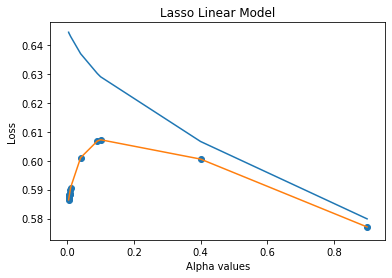

In [19]:
alpha = [.004,.005,.006,.0062,.0065,.0067,.0069,.007,.009,.01,.04,.09,.1,.4,.9] 
plot = Lasso_regression(alpha)
plot.show()

<img src = "https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcQmpsaHLkv3d85Eamq-zGl2K2cA4d3xptRbr4XGZ79R9pl6sn2n"
width="60" height="34">
<font face="verdana" color="006400"><b><u>My Thought Process:</u> I am selecting .9 as tuned alpha value here.</b></font>

In [52]:
linear_clf = Lasso(alpha=.9, fit_intercept=True, normalize=False,random_state=23) 
linear_clf.fit(scaled_train,actual_y)
r_square = r2_score(actual_y,linear_clf.predict(scaled_train))
RMSE = mean_squared_error(actual_y,linear_clf.predict(scaled_train),squared=False)
print(f"R_square for train data is : {r_square}")
print(f"RMSE for train data is : {RMSE}")

R_square for train data is : 0.579687053379915
RMSE for train data is : 7.761594512905049


In [59]:
# lET'S FIND THE KAGGLE SCORE.
sub = pd.DataFrame()
sub['ID'] = test['ID']
sub['y'] = linear_clf.predict(scaled_test)
sub.to_csv('submission_Final.csv', index=False)

<!DOCTYPE html>
<html>
<head>
<style>
table {
  font-family: arial, sans-serif;
  border-collapse: collapse;
  width: 100%;
}

td, th {
  border: 1px solid #dddddd;
  text-align: left;
  padding: 8px;
}

tr:nth-child(even) {
  background-color: #dddddd;
}
</style>
</head>
<body>

<h4>MODEL SUMMARY</h4>

<table>
  <tr>
    <th>SN0</th>
    <th>Model</th>
    <th>Encoding</th>
    <th>Imputation</th>
    <th>Hyperparameter</th>
    <th>R^2 Loss</th>
    <th>RMSE</th>
    <th>KAGGLE PRIVATE SCORE</th>
  </tr>
  <tr>
    <td>1.</td>
    <td>LASSO REGRESSION MODEL</td>
    <td>LABEL ENCODING</td>
    <td>ABOVE 150 SEC VALUES IMPUTED WITH 100</td>
    <td>ALPHA = .6</td>
    <td>0.58</td> 
    <td>7.761</td> 
    <td>0.51926</td>   
  </tr>
</table>

</body>
</html>


<h4>5.1.2 Linear Regression with ridge</h4>

100%|██████████████████████████████████████████████████████████████████████████████████| 28/28 [00:15<00:00,  1.79it/s]


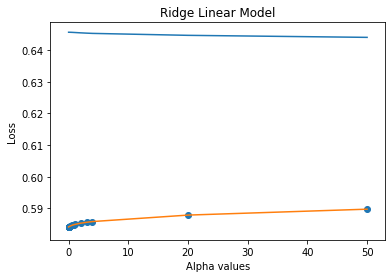

In [18]:
alpha = [.000001,.00001,.0001,.0005,.001,.002,.003,.004,.005,.006,.0062,.0065,.0067,.0069,.007,.07,.09,.1,.2,.5,.7,.9,1,2,3,4,20,50] 
plot = Ridge_regression(alpha)
plot.show()

In [60]:
linear_clf = Ridge(alpha=.2, fit_intercept=True, normalize=True, max_iter=100,\
                            random_state=23) 
linear_clf.fit(train,actual_y)
r_square = r2_score(actual_y,linear_clf.predict(train))
RMSE = mean_squared_error(actual_y,linear_clf.predict(train),squared=False)
print(f"R_square for train data is : {r_square}")
print(f"RMSE for train data is : {RMSE}")

# lET'S FIND THE KAGGLE SCORE.
sub = pd.DataFrame()
sub['ID'] = test['ID']
sub['y'] = linear_clf.predict(scaled_test)
sub.to_csv('submission_Final.csv', index=False)

R_square for train data is : 0.6328477046898098
RMSE for train data is : 7.254169354373599


<!DOCTYPE html>
<html>
<head>
<style>
table {
  font-family: arial, sans-serif;
  border-collapse: collapse;
  width: 100%;
}

td, th {
  border: 1px solid #dddddd;
  text-align: left;
  padding: 8px;
}

tr:nth-child(even) {
  background-color: #dddddd;
}
</style>
</head>
<body>

<h4>MODEL SUMMARY</h4>

<table>
  <tr>
    <th>SN0</th>
    <th>Model</th>
    <th>Encoding</th>
    <th>Imputation</th>
    <th>Hyperparameter</th>
    <th>R^2 Loss</th>
    <th>RMSE</th>
    <th>KAGGLE PRIVATE SCORE</th>  
  </tr>
  <tr>
    <td>1.</td>
    <td>LASSO REGRESSION MODEL</td>
    <td>LABEL ENCODING</td>
    <td>ABOVE 150 SEC VALUES IMPUTED WITH 100</td>
    <td>ALPHA = .6</td>
    <td>0.58</td> 
    <td>7.761</td>
    <td>0.51926</td>  
  </tr>
   <tr>
    <td>2.</td>
    <td>RIDGE REGRESSION MODEL</td>
    <td>LABEL ENCODING</td>
    <td>ABOVE 150 SEC VALUES IMPUTED WITH 100</td>
    <td>ALPHA = .2</td>
    <td>0.632</td> 
    <td>7.25</td>  
    <td>-14.88253</td>     
  </tr>  
</table>

</body>
</html>


<img src = "https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcQmpsaHLkv3d85Eamq-zGl2K2cA4d3xptRbr4XGZ79R9pl6sn2n"
width="60" height="34">
<font face="verdana" color="006400"><b><u>My Thought Process:</u> This is not performing well, so i will skip this algorithm for these features.As i have told you in starting i will selelct only that model which has minimum difference between train and test dataset</b></font>

<h4>5.1.3 Linear Regression with Elsatic net</h4>

100%|██████████████████████████████████████████████████████████████████████████████████| 15/15 [02:38<00:00,  3.67s/it]


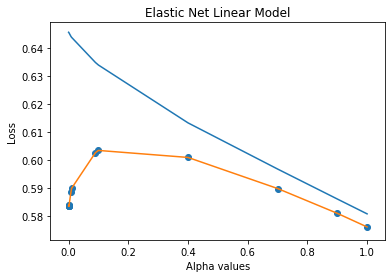

In [24]:
alpha = [.0000001,.00001,.0001,.0003,.0005,.0008,.001,.008,.01,.09,.1,.4,.7,.9,1] 
plot = ElasticNet(alpha)
plot.show()


In [62]:
linear_clf = ElasticNet(alpha=.9, fit_intercept=True, normalize=False, max_iter=100,\
                            random_state=23) 
linear_clf.fit(scaled_train,actual_y)
r_square = r2_score(actual_y,linear_clf.predict(scaled_train))
RMSE = mean_squared_error(actual_y,linear_clf.predict(scaled_train),squared=False)
print(f"R_square for train data is : {r_square}")
print(f"RMSE for train data is : {RMSE}")

# lET'S FIND THE KAGGLE SCORE.
sub = pd.DataFrame()
sub['ID'] = test['ID']
sub['y'] = linear_clf.predict(scaled_test)
sub.to_csv('submission_Final.csv', index=False)

R_square for train data is : 0.5854756246242212
RMSE for train data is : 7.707962680757946


<img src = "https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcQmpsaHLkv3d85Eamq-zGl2K2cA4d3xptRbr4XGZ79R9pl6sn2n"
width="60" height="34">
<font face="verdana" color="006400"><b><u>My Thought Process:</u> ElasticNet regression is also performing well,
    WE can take .9 as alpha value</b></font>

<!DOCTYPE html>
<html>
<head>
<style>
table {
  font-family: arial, sans-serif;
  border-collapse: collapse;
  width: 100%;
}

td, th {
  border: 1px solid #dddddd;
  text-align: left;
  padding: 8px;
}

tr:nth-child(even) {
  background-color: #dddddd;
}
</style>
</head>
<body>

<h4>MODEL SUMMARY</h4>

<table>
  <tr>
    <th>SN0</th>
    <th>Model</th>
    <th>Encoding</th>
    <th>Imputation</th>
    <th>Hyperparameter</th>
    <th>R^2 Loss</th>
    <th>RMSE</th>
    <th>KAGGLE PRIVATE SCORE</th>  
  </tr>
  <tr>
    <td>1.</td>
    <td>LASSO REGRESSION MODEL</td>
    <td>LABEL ENCODING</td>
    <td>ABOVE 150 SEC VALUES IMPUTED WITH 100</td>
    <td>ALPHA = .6</td>
    <td>0.58</td> 
    <td>7.761</td>
    <td>0.51926</td>  
  </tr>
   <tr>
    <td>2.</td>
    <td>RIDGE REGRESSION MODEL</td>
    <td>LABEL ENCODING</td>
    <td>ABOVE 150 SEC VALUES IMPUTED WITH 100</td>
    <td>ALPHA = .2</td>
    <td>0.632</td> 
    <td>7.25</td>  
    <td>-14.88253</td>     
  </tr>  
  <tr>
    <td>3.</td>
    <td>ELASTICNET MODEL</td>
    <td>LABEL ENCODING</td>
    <td>ABOVE 150 SEC VALUES IMPUTED WITH 100</td>
    <td>ALPHA = .9</td>
    <td> 0.58</td> 
    <td>7.70</td>
    <td>0.51776</td>  
  </tr>   
</table>

</body>
</html>


<h4>5.1.4 Linear Regression with LARSLasso</h4>

<img src = "https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcQmpsaHLkv3d85Eamq-zGl2K2cA4d3xptRbr4XGZ79R9pl6sn2n"
width="60" height="34">
<font face="verdana" color="006400"><b><u>My Thought Process:</u> This is something new, This model internaly do the feature engineering itself while moving the coefficient in the direction of the residual of higly correlated feature.</b></font>
<img src = "https://miro.medium.com/max/1400/1*M-g5bn8rs04qfvdfULc_jw.png" width="700" height="400"></img>
<img src = "https://slideplayer.com/slide/14868887/90/images/3/Computation+of+the+lasso+solution.jpg" width="300" height="400"></img>

In [64]:
#https://www.quora.com/What-is-Least-Angle-Regression-and-when-should-it-be-used
# not much hyperparametertuning involved in it.

LassoLars = LassoLarsCV(normalize=True,cv=5)
LassoLars.fit(scaled_train,actual_y)
r_square = r2_score(actual_y,LassoLars.predict(scaled_train))
RMSE = mean_squared_error(actual_y,LassoLars.predict(scaled_train),squared=False)
print(f"R_square for train data is : {r_square}")
print(f"RMSE for train data is : {RMSE}")

R_square for train data is : 0.5994843231600018
RMSE for train data is : 7.576599419537981


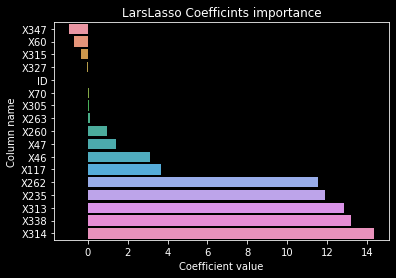

In [0]:
coef_ = [i for i in sorted(zip(Lasso_model.coef_,train.columns), key = lambda x : x[0]) if i[0]!=0.0]
sns.barplot([i[0] for i in coef_], [i[1] for i in coef_])
plt.title("LarsLasso Coefficints importance")
plt.xlabel("Coefficient value")
plt.ylabel("Column name")
plt.show()


In [65]:
# lET'S FIND THE KAGGLE SCORE.
sub = pd.DataFrame()
sub['ID'] = test['ID']
sub['y'] = LassoLars.predict(scaled_test)
sub.to_csv('submission_Final.csv', index=False)
LassoLars = LassoLarsCV(normalize=True,cv=5)
LassoLars.fit(scaled_train,actual_y)
r_square = r2_score(actual_y,LassoLars.predict(scaled_train))
RMSE = mean_squared_error(actual_y,LassoLars.predict(scaled_train),squared=False)
print(f"R_square for train data is : {r_square}")
print(f"RMSE for train data is : {RMSE}")

<img src = "https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcQmpsaHLkv3d85Eamq-zGl2K2cA4d3xptRbr4XGZ79R9pl6sn2n"
width="60" height="34">
<font face="verdana" color="006400"><b><u>My Thought Process:</u> LARSLASSO : It is also performing well, We can think pof taking LassoLars as our final stacking model because we are getting high R^2 both of these models but in ridge model we are getting high r^2 but testing score is not good..</b></font>

<!DOCTYPE html>
<html>
<head>
<style>
table {
  font-family: arial, sans-serif;
  border-collapse: collapse;
  width: 100%;
}

td, th {
  border: 1px solid #dddddd;
  text-align: left;
  padding: 8px;
}

tr:nth-child(even) {
  background-color: #dddddd;
}
</style>
</head>
<body>

<h4>MODEL SUMMARY</h4>

<table>
 <tr>
    <th>SN0</th>
    <th>Model</th>
    <th>Encoding</th>
    <th>Imputation</th>
    <th>Hyperparameter</th>
    <th>R^2 Loss</th>
    <th>RMSE</th>
    <th>KAGGLE PRIVATE SCORE</th>  
  </tr>
  <tr>
    <td>1.</td>
    <td>LASSO REGRESSION MODEL</td>
    <td>LABEL ENCODING</td>
    <td>ABOVE 150 SEC VALUES IMPUTED WITH 100</td>
    <td>ALPHA = .6</td>
    <td>0.58</td> 
    <td>7.761</td>
    <td>0.51926</td>  
  </tr>
   <tr>
    <td>2.</td>
    <td>RIDGE REGRESSION MODEL</td>
    <td>LABEL ENCODING</td>
    <td>ABOVE 150 SEC VALUES IMPUTED WITH 100</td>
    <td>ALPHA = .2</td>
    <td>0.632</td> 
    <td>7.25</td>  
    <td>-14.88253</td>     
  </tr>  
  <tr>
    <td>3.</td>
    <td>ELASTICNET MODEL</td>
    <td>LABEL ENCODING</td>
    <td>ABOVE 150 SEC VALUES IMPUTED WITH 100</td>
    <td>ALPHA = .9</td>
    <td> 0.58</td> 
    <td>7.70</td>
    <td>0.51776</td>  
  </tr> 
  <tr>
    <td>4.</td>
    <td>LASSOLARS MODEL</td>
    <td>LABEL ENCODING</td>
    <td>ABOVE 150 SEC VALUES IMPUTED WITH 100</td>
    <td>Normalize = TRUE</td>
    <td>0.60</td> 
    <td>7.576</td> 
    <td>0.523</td>   
  </tr>  
</table>

</body>
</html>


<h4>5.1.5 Decision tree</h4>

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   51.8s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  2.5min finished


params no 0 : {'min_samples_split': 9, 'max_leaf_nodes': 15, 'max_depth': 10, 'criterion': 'mae'} test score : [0.5986097311283262]
params no 1 : {'min_samples_split': 7, 'max_leaf_nodes': 500, 'max_depth': 9, 'criterion': 'mae'} test score : [0.5986097311283262, 0.5659282479808944]
params no 2 : {'min_samples_split': 2, 'max_leaf_nodes': 30, 'max_depth': 9, 'criterion': 'friedman_mse'} test score : [0.5986097311283262, 0.5659282479808944, 0.6053896096621396]
params no 3 : {'min_samples_split': 5, 'max_leaf_nodes': 300, 'max_depth': 7, 'criterion': 'mae'} test score : [0.5986097311283262, 0.5659282479808944, 0.6053896096621396, 0.5764651899327132]
params no 4 : {'min_samples_split': 4, 'max_leaf_nodes': 100, 'max_depth': 9, 'criterion': 'mae'} test score : [0.5986097311283262, 0.5659282479808944, 0.6053896096621396, 0.5764651899327132, 0.563731574349027]
params no 5 : {'min_samples_split': 5, 'max_leaf_nodes': 50, 'max_depth': 3, 'criterion': 'friedman_mse'} test score : [0.59860973112

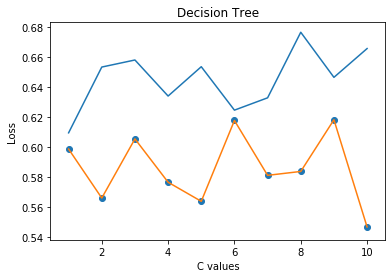

In [35]:
from sklearn.tree import DecisionTreeRegressor
a = decision_tree()
plt = a[0]
Decsion_clf = a[1]

In [41]:
print("Our best score is : ",Decsion_clf.best_score_)
print("Our best estimator : ",Decsion_clf.best_estimator_)

Our best score is :  0.6181506795869838
Our best estimator :  DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=5,
                      max_features=None, max_leaf_nodes=1000,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=3,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=2, splitter='best')


In [66]:
DECISONTREE = DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=5,
                      max_features=None, max_leaf_nodes=1000,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=3,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=2, splitter='best')
DECISONTREE.fit(scaled_train,actual_y)
r_square = r2_score(actual_y,DECISONTREE.predict(scaled_train))
RMSE = mean_squared_error(actual_y,DECISONTREE.predict(scaled_train),squared=False)
print(f"R_square for train data is : {r_square}")
print(f"RMSE for train data is : {RMSE}")

R_square for train data is : 0.6454119630355636
RMSE for train data is : 7.128967029819329


In [67]:
# lET'S FIND THE KAGGLE SCORE.
sub = pd.DataFrame()
sub['ID'] = test['ID']
sub['y'] = DECISONTREE.predict(scaled_test)
sub.to_csv('submission_Final.csv', index=False)

<img src = "https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcQmpsaHLkv3d85Eamq-zGl2K2cA4d3xptRbr4XGZ79R9pl6sn2n"
width="60" height="34">
<font face="verdana" color="006400"><b><u>My Thought Process:</u> I can see decision regression tree model is also working well,
    I can also think of taking it in stacking model.</b></font>

<!DOCTYPE html>
<html>
<head>
<style>
table {
  font-family: arial, sans-serif;
  border-collapse: collapse;
  width: 100%;
}

td, th {
  border: 1px solid #dddddd;
  text-align: left;
  padding: 8px;
}

tr:nth-child(even) {
  background-color: #dddddd;
}
</style>
</head>
<body>

<h4>MODEL SUMMARY</h4>

<table>
  <tr>
    <th>SN0</th>
    <th>Model</th>
    <th>Encoding</th>
    <th>Imputation</th>
    <th>Hyperparameter</th>
    <th>R^2 Loss</th>
    <th>RMSE</th>
    <th>KAGGLE PRIVATE SCORE</th>  
  </tr>
  <tr>
    <td>1.</td>
    <td>LASSO REGRESSION MODEL</td>
    <td>LABEL ENCODING</td>
    <td>ABOVE 150 SEC VALUES IMPUTED WITH 100</td>
    <td>ALPHA = .6</td>
    <td>0.58</td> 
    <td>7.761</td>
    <td>0.51926</td>  
  </tr>
   <tr>
    <td>2.</td>
    <td>RIDGE REGRESSION MODEL</td>
    <td>LABEL ENCODING</td>
    <td>ABOVE 150 SEC VALUES IMPUTED WITH 100</td>
    <td>ALPHA = .2</td>
    <td>0.632</td> 
    <td>7.25</td>  
    <td>-14.88253</td>     
  </tr>  
  <tr>
    <td>3.</td>
    <td>ELASTICNET MODEL</td>
    <td>LABEL ENCODING</td>
    <td>ABOVE 150 SEC VALUES IMPUTED WITH 100</td>
    <td>ALPHA = .9</td>
    <td> 0.58</td> 
    <td>7.70</td>
    <td>0.51776</td>  
  </tr> 
  <tr>
    <td>4.</td>
    <td>LASSOLARS MODEL</td>
    <td>LABEL ENCODING</td>
    <td>ABOVE 150 SEC VALUES IMPUTED WITH 100</td>
    <td>Normalize = TRUE</td>
    <td>0.60</td> 
    <td >7.576</td> 
    <td>0.523</td>   
  </tr>  
    <td>5.</td>
    <td>DECISIONTREE MODEL</td>
    <td>LABEL ENCODING</td>
    <td>ABOVE 150 SEC VALUES IMPUTED WITH 100</td>
    <td>Multi-Parameters</td>
    <td>0.645</td> 
    <td>7.128</td> 
    <td>.53772</td> 
  </tr>

</table>

</body>
</html>


<h4>5.1.5 SVR<h4>

[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]


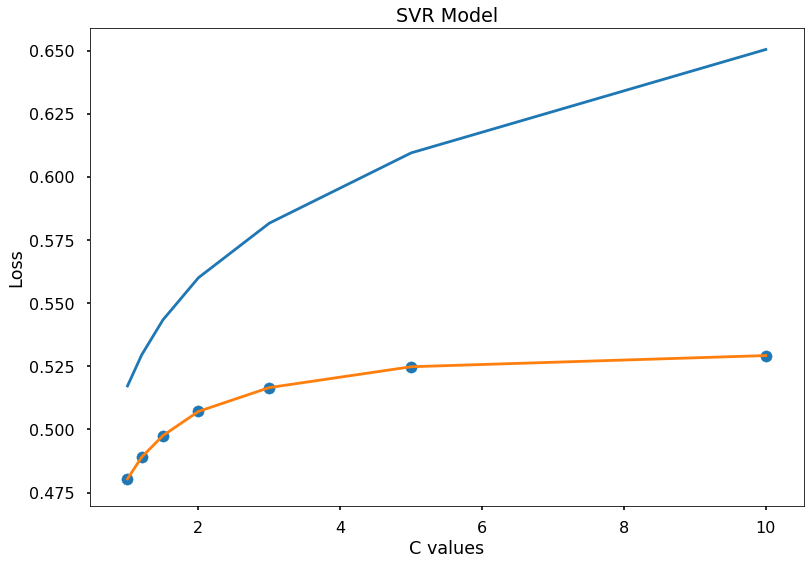

In [12]:
C_values = [1,1.2,1.5,2,3,5,10]
plt = SVR_Regression(scaled_train,C_values)
plt.show()

In [15]:
SVR_MODEL = SVR(kernel='rbf', degree=3, gamma='scale', C = 1, epsilon=0.2,\
        verbose=3, max_iter=-1)
SVR_MODEL_FIT(SVR_MODEL)

[LibSVM]R_square for train data is : 0.5254812433223481
RMSE for train data is : 8.246910063686485
Submission_Final.csv Generated


<!DOCTYPE html>
<html>
<head>
<style>
table {
  font-family: arial, sans-serif;
  border-collapse: collapse;
  width: 100%;
}

td, th {
  border: 1px solid #dddddd;
  text-align: left;
  padding: 8px;
}

tr:nth-child(even) {
  background-color: #dddddd;
}
</style>
</head>
<body>

<h4>MODEL SUMMARY</h4>

<table>
  <tr>
    <th>SN0</th>
    <th>Model</th>
    <th>Encoding</th>
    <th>Imputation</th>
    <th>Hyperparameter</th>
    <th>R^2 Loss</th>
    <th>RMSE</th>
    <th>KAGGLE PRIVATE SCORE</th>  
  </tr>
  <tr>
    <td>1.</td>
    <td>LASSO REGRESSION MODEL</td>
    <td>LABEL ENCODING</td>
    <td>ABOVE 150 SEC VALUES IMPUTED WITH 100</td>
    <td>ALPHA = .6</td>
    <td>0.58</td> 
    <td>7.761</td>
    <td>0.51926</td>  
  </tr>
   <tr>
    <td>2.</td>
    <td>RIDGE REGRESSION MODEL</td>
    <td>LABEL ENCODING</td>
    <td>ABOVE 150 SEC VALUES IMPUTED WITH 100</td>
    <td>ALPHA = .2</td>
    <td>0.632</td> 
    <td>7.25</td>  
    <td>-14.88253</td>     
  </tr>  
  <tr>
    <td>3.</td>
    <td>ELASTICNET MODEL</td>
    <td>LABEL ENCODING</td>
    <td>ABOVE 150 SEC VALUES IMPUTED WITH 100</td>
    <td>ALPHA = .9</td>
    <td> 0.58</td> 
    <td>7.70</td>
    <td>0.51776</td>  
  </tr> 
  <tr>
    <td>4.</td>
    <td>LASSOLARS MODEL</td>
    <td>LABEL ENCODING</td>
    <td>ABOVE 150 SEC VALUES IMPUTED WITH 100</td>
    <td>Normalize = TRUE</td>
    <td>0.60</td> 
    <td >7.576</td> 
    <td>0.523</td>   
  </tr>  
    <td>5.</td>
    <td>DECISIONTREE MODEL</td>
    <td>LABEL ENCODING</td>
    <td>ABOVE 150 SEC VALUES IMPUTED WITH 100</td>
    <td>Multi-Parameters</td>
    <td>0.645</td> 
    <td>7.128</td> 
    <td>.53772</td> 
  </tr>
  
  <tr>  
    <td>6.</td>
    <td>SVR MODEL</td>
    <td>LABEL ENCODING</td>
    <td>ABOVE 150 SEC VALUES IMPUTED WITH 100</td>
    <td>C value : 1</td>
    <td>.52</td> 
    <td>8.24</td> 
    <td>No</td> 
  </tr>

</table>

</body>
</html>


<h4>5.1.6 XGBOOST</h4>

In [ ]:
'''Cross validation the xgb model then predict the test data'''

max_depths = [3,4]
n_treess = [100,400,520]
etas = [.001,.0045]
subsamples = [.93,.95]
count = 0
dtrain = xgb.DMatrix(decomposed_train, actual_y)
dtest = xgb.DMatrix(decomposed_test)

# GRID SEARCH
for max_depth in max_depths:
    for n_trees in n_treess:
        for eta in etas:
            for subsample in subsamples:
                xgb_params = {
                            'n_trees': n_trees, 
                            'max_depth': max_depth,
                            'eta': eta,
                            'subsample': subsample,
                            'objective': 'reg:linear',
                            'eval_metric': 'rmse',
                        }
                print(f"Parameters are :{max_depth,n_trees,eta,subsample}")
                print(f"Total iteration :{len(max_depths)*len(n_treess)*len(etas)*len(subsamples)}")
                print(f"Total iteration remaining :{len(max_depths)*len(n_treess)*len(etas)*len(subsamples) - (count)}")
                print("#"*110)
                count+=1
                # NOTE: Make sure that the class is labeled 'class' in the data file
                num_boost_rounds = 1700
                XGBOOST_CV = xgb.cv(xgb_params, dtrain, nfold=5, verbose_eval=3,early_stopping_rounds=5, num_boost_round=num_boost_rounds)
                print("#"*110)
        

Parameters are :(3, 100, 0.001, 0.93)
Total iteration :24
Total iteration remaining :24
##############################################################################################################
[00:08:53] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:08:53] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:08:54] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:08:54] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:08:54] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of

In [8]:
'''Train the xgb model then predict the test data'''
# (3, 100, 0.0045, 0.93)
# max_depth,n_trees,eta,subsample
xgb_params = {
    'n_trees': 100, 
    'eta': 0.0045,
    'max_depth': 3,
    'subsample': 0.93,
    'objective': 'reg:linear',
    'eval_metric': 'rmse',
    'silent': 1
}



dtrain = xgb.DMatrix(scaled_train, actual_y)
dtest = xgb.DMatrix(scaled_test)

# NOTE: Make sure that the class is labeled 'class' in the data file
num_boost_rounds = 1290
# train model
model = xgb.train(dict(xgb_params, silent=0), dtrain, num_boost_round=num_boost_rounds)
y_pred_train = model.predict(dtrain)
y_pred = model.predict(dtest)
print(f"(r2  : {r2_score(actual_y,y_pred_train)} and mean_squared_error {mean_squared_error(actual_y,y_pred_train,squared=False)})  ")

[00:13:29] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
(r2  : 0.6517110012489504 and mean_squared_error 7.06536243437644)  


<Figure size 1152x576 with 0 Axes>

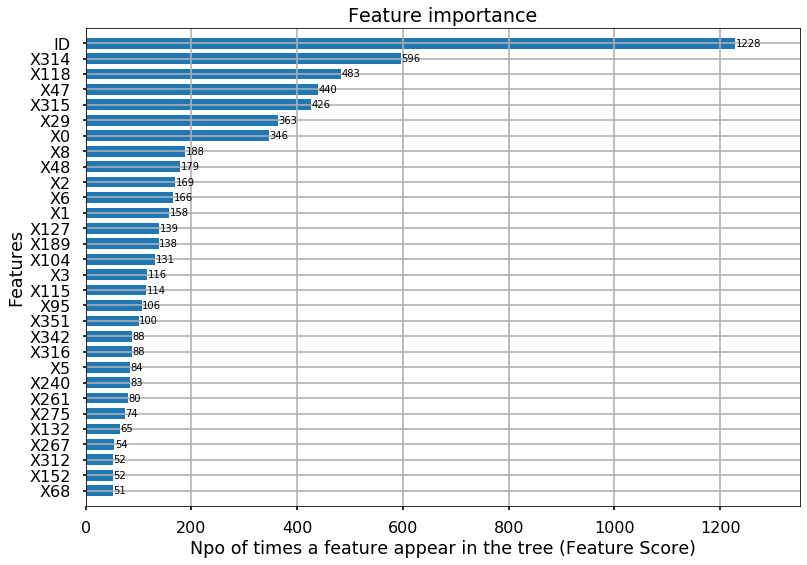

In [9]:
plt.style.use('seaborn-poster')
plt.figure(figsize=(16,8))
xgb.plot_importance(model,max_num_features=30,height=.7,xlabel = "Npo of times a feature appear in the tree (Feature Score)")
plt.show()

In [10]:
# lET'S FIND THE KAGGLE SCORE.
sub = pd.DataFrame()
sub['ID'] = test['ID']
sub['y'] = model.predict(dtest)
sub.to_csv('submission_Final.csv', index=False)

<!DOCTYPE html>
<html>
<head>
<style>
table {
  font-family: arial, sans-serif;
  border-collapse: collapse;
  width: 100%;
}

td, th {
  border: 1px solid #dddddd;
  text-align: left;
  padding: 8px;
}

tr:nth-child(even) {
  background-color: #dddddd;
}
</style>
</head>
<body>

<h4>MODEL SUMMARY</h4>

<table>
  <tr>
    <th>SN0</th>
    <th>Model</th>
    <th>Encoding</th>
    <th>Imputation</th>
    <th>Hyperparameter</th>
    <th>R^2 Loss</th>
    <th>RMSE</th>
    <th>KAGGLE PRIVATE SCORE</th>  
  </tr>
  <tr>
    <td>1.</td>
    <td>LASSO REGRESSION MODEL</td>
    <td>LABEL ENCODING</td>
    <td>ABOVE 150 SEC VALUES IMPUTED WITH 100</td>
    <td>ALPHA = .6</td>
    <td>0.58</td> 
    <td>7.761</td>
    <td>0.51926</td>  
  </tr>
   <tr>
    <td>2.</td>
    <td>RIDGE REGRESSION MODEL</td>
    <td>LABEL ENCODING</td>
    <td>ABOVE 150 SEC VALUES IMPUTED WITH 100</td>
    <td>ALPHA = .2</td>
    <td>0.632</td> 
    <td>7.25</td>  
    <td>-14.88253</td>     
  </tr>  
  <tr>
    <td>3.</td>
    <td>ELASTICNET MODEL</td>
    <td>LABEL ENCODING</td>
    <td>ABOVE 150 SEC VALUES IMPUTED WITH 100</td>
    <td>ALPHA = .9</td>
    <td> 0.58</td> 
    <td>7.70</td>
    <td>0.51776</td>  
  </tr> 
  <tr>
    <td>4.</td>
    <td>LASSOLARS MODEL</td>
    <td>LABEL ENCODING</td>
    <td>ABOVE 150 SEC VALUES IMPUTED WITH 100</td>
    <td>Normalize = TRUE</td>
    <td>0.60</td> 
    <td >7.576</td> 
    <td>0.523</td>   
  </tr>  
    <td>5.</td>
    <td>DECISIONTREE MODEL</td>
    <td>LABEL ENCODING</td>
    <td>ABOVE 150 SEC VALUES IMPUTED WITH 100</td>
    <td>Multi-Parameters</td>
    <td>0.645</td> 
    <td>7.128</td> 
    <td>.53772</td> 
  </tr>
  <tr>  
    <td>6.</td>
    <td>SVR MODEL</td>
    <td>LABEL ENCODING</td>
    <td>ABOVE 150 SEC VALUES IMPUTED WITH 100</td>
    <td>C value : 1</td>
    <td>.52</td> 
    <td>8.24</td> 
    <td>No</td> 
  </tr>
  
  <tr>  
    <td>6.</td>
    <td>XGBOOST</td>
    <td>LABEL ENCODING</td>
    <td>ABOVE 150 SEC VALUES IMPUTED WITH 100</td>
    <td>Multiple Parameters: </td>
    <td>0.65</td> 
    <td>7.06</td> 
    <td>.54901</td> 
  </tr>

</table>

</body>
</html>


<h4>GBDT Regressor</h4>

In [40]:
GBDT_Regression(scaled_train,scaled_test)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    9.4s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   30.6s finished


params : {'subsample': 0.2, 'min_samples_split': 6, 'min_samples_leaf': 4, 'max_features': 0.55, 'max_depth': 9, 'learning_rate': 0.001} and it's test r2 score is 0.10614689742709563 and it's train r2 score is 0.11791930230271944
params : {'subsample': 0.6, 'min_samples_split': 8, 'min_samples_leaf': 10, 'max_features': 0.55, 'max_depth': 4, 'learning_rate': 0.0025} and it's test r2 score is 0.23818994586839998 and it's train r2 score is 0.24797759475997339
params : {'subsample': 0.1, 'min_samples_split': 7, 'min_samples_leaf': 5, 'max_features': 0.7, 'max_depth': 7, 'learning_rate': 0.02} and it's test r2 score is 0.5944674140723427 and it's train r2 score is 0.64262664575852
params : {'subsample': 0.2, 'min_samples_split': 4, 'min_samples_leaf': 6, 'max_features': 0.4, 'max_depth': 3, 'learning_rate': 0.0025} and it's test r2 score is 0.22961647159553555 and it's train r2 score is 0.23641057639126042
params : {'subsample': 0.5, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_feat

<!DOCTYPE html>
<html>
<head>
<style>
table {
  font-family: arial, sans-serif;
  border-collapse: collapse;
  width: 100%;
}

td, th {
  border: 1px solid #dddddd;
  text-align: left;
  padding: 8px;
}

tr:nth-child(even) {
  background-color: #dddddd;
}
</style>
</head>
<body>

<h4>MODEL SUMMARY</h4>

<table>
  <tr>
    <th>SN0</th>
    <th>Model</th>
    <th>Encoding</th>
    <th>Imputation</th>
    <th>Hyperparameter</th>
    <th>R^2 Loss</th>
    <th>RMSE</th>
    <th>KAGGLE PRIVATE SCORE</th>  
  </tr>
  <tr>
    <td>1.</td>
    <td>LASSO REGRESSION MODEL</td>
    <td>LABEL ENCODING</td>
    <td>ABOVE 150 SEC VALUES IMPUTED WITH 100</td>
    <td>ALPHA = .6</td>
    <td>0.58</td> 
    <td>7.761</td>
    <td>0.51926</td>  
  </tr>
   <tr>
    <td>2.</td>
    <td>RIDGE REGRESSION MODEL</td>
    <td>LABEL ENCODING</td>
    <td>ABOVE 150 SEC VALUES IMPUTED WITH 100</td>
    <td>ALPHA = .2</td>
    <td>0.632</td> 
    <td>7.25</td>  
    <td>-14.88253</td>     
  </tr>  
  <tr>
    <td>3.</td>
    <td>ELASTICNET MODEL</td>
    <td>LABEL ENCODING</td>
    <td>ABOVE 150 SEC VALUES IMPUTED WITH 100</td>
    <td>ALPHA = .9</td>
    <td> 0.58</td> 
    <td>7.70</td>
    <td>0.51776</td>  
  </tr> 
  <tr>
    <td>4.</td>
    <td>LASSOLARS MODEL</td>
    <td>LABEL ENCODING</td>
    <td>ABOVE 150 SEC VALUES IMPUTED WITH 100</td>
    <td>Normalize = TRUE</td>
    <td>0.60</td> 
    <td >7.576</td> 
    <td>0.523</td>   
  </tr>  
    <td>5.</td>
    <td>DECISIONTREE MODEL</td>
    <td>LABEL ENCODING</td>
    <td>ABOVE 150 SEC VALUES IMPUTED WITH 100</td>
    <td>Multi-Parameters</td>
    <td>0.645</td> 
    <td>7.128</td> 
    <td>.53772</td> 
  </tr>
  <tr>  
    <td>6.</td>
    <td>SVR MODEL</td>
    <td>LABEL ENCODING</td>
    <td>ABOVE 150 SEC VALUES IMPUTED WITH 100</td>
    <td>C value : 1</td>
    <td>.52</td> 
    <td>8.24</td> 
    <td>No</td> 
  </tr>
  
  <tr>  
    <td>6.</td>
    <td>XGBOOST</td>
    <td>LABEL ENCODING</td>
    <td>ABOVE 150 SEC VALUES IMPUTED WITH 100</td>
    <td>Multiple Parameters: </td>
    <td>0.65</td> 
    <td>7.06</td> 
    <td>.54901</td> 
  </tr>

   <tr>  
    <td>7.</td>
    <td>GBDT</td>
    <td>LABEL ENCODING</td>
    <td>ABOVE 150 SEC VALUES IMPUTED WITH 100</td>
    <td>Multiple Parameters: </td>
    <td>0.6363</td> 
    <td>7.32</td> 
    <td>.54901</td> 
  </tr>

</table>

</body>
</html>


<img src = "https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcQmpsaHLkv3d85Eamq-zGl2K2cA4d3xptRbr4XGZ79R9pl6sn2n"
width="60" height="34">


<font face="verdana" color="006400"><b><u>My Thought Process </u> From this i can see the most important features are 
    catagorical features as i can see in the feature importance fgeatures above and wow!!! ID is playing a very good roll i in predicting y.</font>


<img src = "https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcQmpsaHLkv3d85Eamq-zGl2K2cA4d3xptRbr4XGZ79R9pl6sn2n"
width="60" height="34">
<h1><center>Attempt 2.</center></h1>
<font face="verdana" color="006400"><b><u>My Thought Process:</u> I want to  select that model which on hyperparameter tuning gets as closed result on test data also so that, our model will not behave badly on test data
i.e Train loss as close as possible with test loss.</b></font>

<font face="verdana" color="red"><b>NOTE :  Now eveything in blue is used in the subsequent model, we will check one by one all our analsys and will see the performance for eg: below we are using onnly 1.1 and 2.2 in the model</b></font>

<font face="verdana" color="006400"><b>1. Y imputation</b></font>

<pre>1.1 Removing above than 150 sec in Y values with mean of train['y'] i.e. 100 approx.</pre>

<font face="verdana" color="blue"><b><pre>1.2 Removing 12 unimportant features from the dataset and check what happend in the performance, i will check only with one model for checking purpose</pre></b></font>


<pre>1.3 Removing only 265.32 y values with mean of train['y] i.e 100 approx.</pre>

<pre>1.4 Removing only 265.32 y values with somwe other values other than 100 approx</pre>

<font face="verdana" color="006400"><b>2. Feature engineering</b></font>

<font face="verdana" color="blue"><b><pre>2.1 For catagorical values use label encoding </pre></b></font>
<pre>2.2 For catagorical values use one hot encoding encoding </pre>
<pre>2.3 Remove ID and use best of the above encoding and see the performance, as ID as per the business problem may have some hidden sequencing information or may be not, we have to see.</pre>
<pre>2.4 I will fetch the best features by using all well known feture decompostiiton algorithm.</pre>

<h4>5.1.1 Linear Regression with ridge</h4>

100%|██████████████████████████████████████████████████████████████████████████████████| 15/15 [03:05<00:00,  7.44s/it]


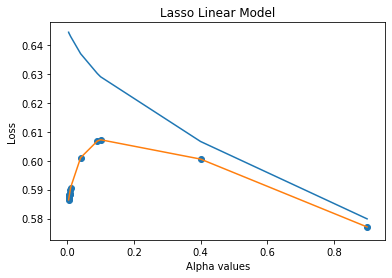

In [29]:
plot = Lasso_regression([.004,.005,.006,.0062,.0065,.0067,.0069,.007,.009,.01,.04,.09,.1,.4,.9])
plot.show()

<img src = "https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcQmpsaHLkv3d85Eamq-zGl2K2cA4d3xptRbr4XGZ79R9pl6sn2n"
width="60" height="34">
<font face="verdana" color="006400"><b><u>My Thought Process:</u> I am selecting .9 as tuned alpha value here.</b></font>

In [30]:
linear_clf = Lasso(alpha=.9, fit_intercept=True, normalize=False,random_state=23) 
linear_clf.fit(scaled_train,actual_y)
r_square = r2_score(actual_y,linear_clf.predict(scaled_train))
RMSE = mean_squared_error(actual_y,linear_clf.predict(scaled_train),squared=False)
print(f"R_square for train data is : {r_square}")
print(f"RMSE for train data is : {RMSE}")

# lET'S FIND THE KAGGLE SCORE.
sub = pd.DataFrame()
sub['ID'] = test['ID']
sub['y'] = linear_clf.predict(scaled_test)
sub.to_csv('submission_Final.csv', index=False)

R_square for train data is : 0.579687053379915
RMSE for train data is : 7.761594512905049


<!DOCTYPE html>
<html>
<head>
<style>
table {
  font-family: arial, sans-serif;
  border-collapse: collapse;
  width: 100%;
}

td, th {
  border: 1px solid #dddddd;
  text-align: left;
  padding: 8px;
}

tr:nth-child(even) {
  background-color: #dddddd;
}
</style>
</head>
<body>
<h4><center>MODEL SUMMARY</center></h4>
<h4><center>ATTEMPT 1</center></h4>

<table>
 <tr>
    <th>SN0</th>
    <th>Model</th>
    <th>Encoding</th>
    <th>Imputation</th>
    <th>Hyperparameter</th>
    <th>R^2 Loss</th>
    <th>RMSE</th>
    <th>KAGGLE PRIVATE SCORE</th>  
  </tr>
  <tr>
    <td>1.</td>
    <td>LASSO REGRESSION MODEL</td>
    <td>LABEL ENCODING</td>
    <td>ABOVE 150 SEC VALUES IMPUTED WITH 100</td>
    <td>ALPHA = .6</td>
    <td>0.58</td> 
    <td>7.761</td>
    <td>0.51926</td>  
  </tr>
   <tr>
    <td>2.</td>
    <td>RIDGE REGRESSION MODEL</td>
    <td>LABEL ENCODING</td>
    <td>ABOVE 150 SEC VALUES IMPUTED WITH 100</td>
    <td>ALPHA = .2</td>
    <td>0.632</td> 
    <td>7.25</td>  
    <td>-14.88253</td>     
  </tr>  
  <tr>
    <td>3.</td>
    <td>ELASTICNET MODEL</td>
    <td>LABEL ENCODING</td>
    <td>ABOVE 150 SEC VALUES IMPUTED WITH 100</td>
    <td>ALPHA = .9</td>
    <td> 0.58</td> 
    <td>7.70</td>
    <td>0.51776</td>  
  </tr> 
  <tr>
    <td>4.</td>
    <td>LASSOLARS MODEL</td>
    <td>LABEL ENCODING</td>
    <td>ABOVE 150 SEC VALUES IMPUTED WITH 100</td>
    <td>Normalize = TRUE</td>
    <td>0.60</td> 
    <td >7.576</td> 
    <td>0.523</td>   
  </tr>  
    <td>5.</td>
    <td>DECISIONTREE MODEL</td>
    <td>LABEL ENCODING</td>
    <td>ABOVE 150 SEC VALUES IMPUTED WITH 100</td>
    <td>Multi-Parameters</td>
    <td>0.645</td> 
    <td>7.128</td> 
    <td>.53772</td> 
  </tr>
  
   <tr>  
    <td>6.</td>
    <td>SVR MODEL</td>
    <td>LABEL ENCODING</td>
    <td>ABOVE 150 SEC VALUES IMPUTED WITH 100</td>
    <td>C value : 1</td>
    <td>.52</td> 
    <td>8.24</td> 
    <td>No</td> 
  </tr>
  
  <tr>  
    <td>6.</td>
    <td>XGBOOST</td>
    <td>LABEL ENCODING</td>
    <td>ABOVE 150 SEC VALUES IMPUTED WITH 100</td>
    <td>Mupliple parameters </td>
    <td>.65</td> 
    <td>7.01</td> 
    <td>.54901</td> 
  </tr>
  
   <tr>  
    <td>7.</td>
    <td>GBDT</td>
    <td>LABEL ENCODING</td>
    <td>ABOVE 150 SEC VALUES IMPUTED WITH 100</td>
    <td>Multiple Parameters: </td>
    <td>0.6363</td> 
    <td>7.32</td> 
    <td>.54901</td> 
  </tr>

</table>

<h4><center>ATTEMPT 2</center></h4>
<table>
 <tr>
    <th>SN0</th>
    <th>Model</th>
    <th>Encoding</th>
    <th>Imputation</th>
    <th>Hyperparameter</th>
    <th>R^2 Loss</th>
    <th>RMSE</th>
    <th>KAGGLE PRIVATE SCORE</th>  
  </tr>
   <tr>
    <td>6.</td>
    <td>LASSO REGRESSION MODEL</td>
    <td>LABEL ENCODING</td>
    <td>REMOVED 12 UNIMPORTANT FEATURES FROM THE DATASET </td>
    <td>ALPHA = .9</td>
    <td>0.58</td> 
    <td>7.761</td>
    <td>0.51926</td>   
  </tr>  
</table>
</body>
</html>


<img src = "https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcQmpsaHLkv3d85Eamq-zGl2K2cA4d3xptRbr4XGZ79R9pl6sn2n"
width="60" height="34">
<font face="verdana" color="006400"><b><u>My Thought Process:</u> I am getting the same result as above with this one also, As i am jst removing the unimportant features so no reduction in the model performance which make sense so skipping this thing it's will be wastage of time and resource.</b></font>


<img src = "https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcQmpsaHLkv3d85Eamq-zGl2K2cA4d3xptRbr4XGZ79R9pl6sn2n"
width="60" height="34">
<h1><center>Attempt 3.</center></h1>
<font face="verdana" color="006400"><b><u>My Thought Process:</u> I want to  select that model which on hyperparameter tuning gets as closed result on test data also so that, our model will not behave badly on test data
i.e Train loss as close as possible with test loss.</b></font>

<font face="verdana" color="red"><b>NOTE :  Now eveything in blue is used in the subsequent model, we will check one by one all our analsys and will see the performance for eg: below we are using onnly 1.1 and 2.2 in the model</b></font>

<font face="verdana" color="006400"><b>1. Y imputation</b></font>

<pre>1.1 Removing above than 150 sec in Y values with mean of train['y'] i.e. 100 approx.</pre>

<pre>1.2 Removing 12 unimportant features from the dataset and check what happend in the performance, i will check only with one model for checking purpose</pre>


<font face="verdana" color="blue"><b><pre>1.3 Removing only 265.32 y values with mean of train['y] i.e 100 approx.</pre></b></font>

<pre>1.4 Removing only 265.32 y values with somwe other values other than 100 approx</pre>

<font face="verdana" color="006400"><b>2. Feature engineering</b></font>

<font face="verdana" color="blue"><b><pre>2.1 For catagorical values use label encoding </pre></b></font>
<pre>2.2 For catagorical values use one hot encoding encoding </pre>
<pre>2.3 Remove ID and use best of the above encoding and see the performance, as ID as per the business problem may have some hidden sequencing information or may be not, we have to see.</pre>
<pre>2.4 I will fetch the best features by using all well known feture decompostiiton algorithm.</pre>
<pre>2.5 Concatenate original features with decomposed features and do the analysis.</pre>

100%|██████████████████████████████████████████████████████████████████████████████████| 15/15 [03:06<00:00,  7.61s/it]


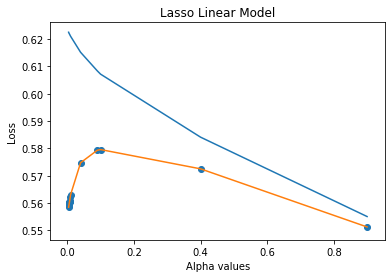

In [36]:
plot = Lasso_regression([.004,.005,.006,.0062,.0065,.0067,.0069,.007,.009,.01,.04,.09,.1,.4,.9])
plot.show()

<img src = "https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcQmpsaHLkv3d85Eamq-zGl2K2cA4d3xptRbr4XGZ79R9pl6sn2n"
width="60" height="34">
<font face="verdana" color="006400"><b><u>My Thought Process:</u> I am selecting .9 as tuned alpha value here.</b></font>

In [37]:
linear_clf = Lasso(alpha=.9, fit_intercept=True, normalize=False,random_state=23) 
linear_clf.fit(scaled_train,actual_y)
r_square = r2_score(actual_y,linear_clf.predict(scaled_train))
RMSE = mean_squared_error(actual_y,linear_clf.predict(scaled_train),squared=False)
print(f"R_square for train data is : {r_square}")
print(f"RMSE for train data is : {RMSE}")

# lET'S FIND THE KAGGLE SCORE.
sub = pd.DataFrame()
sub['ID'] = test['ID']
sub['y'] = linear_clf.predict(scaled_test)
sub.to_csv('submission_Final.csv', index=False)

R_square for train data is : 0.5537604212320638
RMSE for train data is : 8.297502419827739


<!DOCTYPE html>
<html>
<head>
<style>
table {
  font-family: arial, sans-serif;
  border-collapse: collapse;
  width: 100%;
}

td, th {
  border: 1px solid #dddddd;
  text-align: left;
  padding: 8px;
}

tr:nth-child(even) {
  background-color: #dddddd;
}
</style>
</head>
<body>
<h4><center>MODEL SUMMARY</center></h4>
<h4><center>ATTEMPT 1</center></h4>

<table>
 <tr>
    <th>SN0</th>
    <th>Model</th>
    <th>Encoding</th>
    <th>Imputation</th>
    <th>Hyperparameter</th>
    <th>R^2 Loss</th>
    <th>RMSE</th>
    <th>KAGGLE PRIVATE SCORE</th>  
  </tr>
  <tr>
    <td>1.</td>
    <td>LASSO REGRESSION MODEL</td>
    <td>LABEL ENCODING</td>
    <td>ABOVE 150 SEC VALUES IMPUTED WITH 100</td>
    <td>ALPHA = .6</td>
    <td>0.58</td> 
    <td>7.761</td>
    <td>0.51926</td>  
  </tr>
   <tr>
    <td>2.</td>
    <td>RIDGE REGRESSION MODEL</td>
    <td>LABEL ENCODING</td>
    <td>ABOVE 150 SEC VALUES IMPUTED WITH 100</td>
    <td>ALPHA = .2</td>
    <td>0.632</td> 
    <td>7.25</td>  
    <td>-14.88253</td>     
  </tr>  
  <tr>
    <td>3.</td>
    <td>ELASTICNET MODEL</td>
    <td>LABEL ENCODING</td>
    <td>ABOVE 150 SEC VALUES IMPUTED WITH 100</td>
    <td>ALPHA = .9</td>
    <td> 0.58</td> 
    <td>7.70</td>
    <td>0.51776</td>  
  </tr> 
  <tr>
    <td>4.</td>
    <td>LASSOLARS MODEL</td>
    <td>LABEL ENCODING</td>
    <td>ABOVE 150 SEC VALUES IMPUTED WITH 100</td>
    <td>Normalize = TRUE</td>
    <td>0.60</td> 
    <td >7.576</td> 
    <td>0.523</td>   
  </tr>  
    <td>5.</td>
    <td>DECISIONTREE MODEL</td>
    <td>LABEL ENCODING</td>
    <td>ABOVE 150 SEC VALUES IMPUTED WITH 100</td>
    <td>Multi-Parameters</td>
    <td>0.645</td> 
    <td>7.128</td> 
    <td>.53772</td> 
  </tr>
  
   <tr>  
    <td>6.</td>
    <td>SVR MODEL</td>
    <td>LABEL ENCODING</td>
    <td>ABOVE 150 SEC VALUES IMPUTED WITH 100</td>
    <td>C value : 1</td>
    <td>.52</td> 
    <td>8.24</td> 
    <td>No</td> 
  </tr>
  
  <tr>  
    <td>6.</td>
    <td>XGBOOST</td>
    <td>LABEL ENCODING</td>
    <td>ABOVE 150 SEC VALUES IMPUTED WITH 100</td>
    <td>Mupliple parameters </td>
    <td>.65</td> 
    <td>7.01</td> 
    <td>.54901</td> 
  </tr>
   <tr>  
    <td>7.</td>
    <td>GBDT</td>
    <td>LABEL ENCODING</td>
    <td>ABOVE 150 SEC VALUES IMPUTED WITH 100</td>
    <td>Multiple Parameters: </td>
    <td>0.6363</td> 
    <td>7.32</td> 
    <td>.54901</td> 
  </tr>

</table>

<h4><center>ATTEMPT 2</center></h4>
<table>
 <tr>
    <th>SN0</th>
    <th>Model</th>
    <th>Encoding</th>
    <th>Imputation</th>
    <th>Hyperparameter</th>
    <th>R^2 Loss</th>
    <th>RMSE</th>
    <th>KAGGLE PRIVATE SCORE</th>  
  </tr>
   <tr>
    <td>6.</td>
    <td>LASSO REGRESSION MODEL</td>
    <td>LABEL ENCODING</td>
    <td>REMOVED 12 UNIMPORTANT FEATURES FROM THE DATASET </td>
    <td>ALPHA = .9</td>
    <td>0.58</td> 
    <td>7.761</td>
    <td>0.51926</td>  
  </tr>  
</table>

<h4><center>ATTEMPT 3</center></h4>
<table>
 <tr>
    <th>SN0</th>
    <th>Model</th>
    <th>Encoding</th>
    <th>Imputation</th>
    <th>Hyperparameter</th>
    <th>R^2 Loss</th>
    <th>RMSE</th>
    <th>KAGGLE PRIVATE SCORE</th>  
  </tr>
  <tr>
    <td>6.</td>
    <td>LASSO REGRESSION MODEL</td>
    <td>LABEL ENCODING</td>
    <td>iMPUTED 265.32 ONLY WITH 100 </td>
    <td>ALPHA = .9</td>
    <td>0.553</td> 
    <td>8.29</td>
    <td>0.52224</td>  
   </tr> 
</table>
</body>
</html>

<img src = "https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcQmpsaHLkv3d85Eamq-zGl2K2cA4d3xptRbr4XGZ79R9pl6sn2n"
width="60" height="34">
<font face="verdana" color="006400"><b><u>My Thought Process:</u> I am getting increase in the private and public score pg kaggle compared to the previous lasso score so, imputing only 265.32 is good strategy</b></font>

<h4>5.1.2 Linear Regression with Ridge</h4>

100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:11<00:00,  1.78it/s]


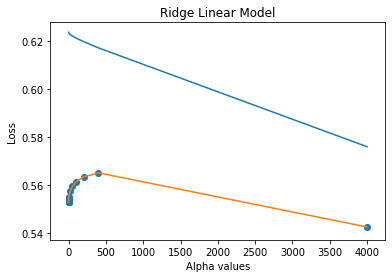

In [41]:
alpha = [.000001,.00001,.007,.07,.09,.1,.2,.5,.7,.9,1,2,3,4,20,50,100,200,400,4000] 
plot = Ridge_regression(alpha)
plot.show()

In [40]:
linear_clf = Ridge(alpha=400, fit_intercept=True, normalize=True, max_iter=100,\
                            random_state=23) 
linear_clf.fit(train,actual_y)
r_square = r2_score(actual_y,linear_clf.predict(train))
RMSE = mean_squared_error(actual_y,linear_clf.predict(train),squared=False)
print(f"R_square for train data is : {r_square}")
print(f"RMSE for train data is : {RMSE}")

# lET'S FIND THE KAGGLE SCORE.
sub = pd.DataFrame()
sub['ID'] = test['ID']
sub['y'] = linear_clf.predict(scaled_test)
sub.to_csv('submission_Final.csv', index=False)

R_square for train data is : 0.031504443883645705
RMSE for train data is : 12.223966763843501


<!DOCTYPE html>
<html>
<head>
<style>
table {
  font-family: arial, sans-serif;
  border-collapse: collapse;
  width: 100%;
}

td, th {
  border: 1px solid #dddddd;
  text-align: left;
  padding: 8px;
}

tr:nth-child(even) {
  background-color: #dddddd;
}
</style>
</head>
<body>
<h4><center>MODEL SUMMARY</center></h4>
<h4><center>ATTEMPT 1</center></h4>

<table>
 <tr>
    <th>SN0</th>
    <th>Model</th>
    <th>Encoding</th>
    <th>Imputation</th>
    <th>Hyperparameter</th>
    <th>R^2 Loss</th>
    <th>RMSE</th>
    <th>KAGGLE PRIVATE SCORE</th>  
  </tr>
  <tr>
    <td>1.</td>
    <td>LASSO REGRESSION MODEL</td>
    <td>LABEL ENCODING</td>
    <td>ABOVE 150 SEC VALUES IMPUTED WITH 100</td>
    <td>ALPHA = .6</td>
    <td>0.58</td> 
    <td>7.761</td>
    <td>0.51926</td>  
  </tr>
   <tr>
    <td>2.</td>
    <td>RIDGE REGRESSION MODEL</td>
    <td>LABEL ENCODING</td>
    <td>ABOVE 150 SEC VALUES IMPUTED WITH 100</td>
    <td>ALPHA = .2</td>
    <td>0.632</td> 
    <td>7.25</td>  
    <td>-14.88253</td>     
  </tr>  
  <tr>
    <td>3.</td>
    <td>ELASTICNET MODEL</td>
    <td>LABEL ENCODING</td>
    <td>ABOVE 150 SEC VALUES IMPUTED WITH 100</td>
    <td>ALPHA = .9</td>
    <td> 0.58</td> 
    <td>7.70</td>
    <td>0.51776</td>  
  </tr> 
  <tr>
    <td>4.</td>
    <td>LASSOLARS MODEL</td>
    <td>LABEL ENCODING</td>
    <td>ABOVE 150 SEC VALUES IMPUTED WITH 100</td>
    <td>Normalize = TRUE</td>
    <td>0.60</td> 
    <td >7.576</td> 
    <td>0.523</td>   
  </tr>  
    <td>5.</td>
    <td>DECISIONTREE MODEL</td>
    <td>LABEL ENCODING</td>
    <td>ABOVE 150 SEC VALUES IMPUTED WITH 100</td>
    <td>Multi-Parameters</td>
    <td>0.645</td> 
    <td>7.128</td> 
    <td>.53772</td> 
  </tr>
  
   <tr>  
    <td>6.</td>
    <td>SVR MODEL</td>
    <td>LABEL ENCODING</td>
    <td>ABOVE 150 SEC VALUES IMPUTED WITH 100</td>
    <td>C value : 1</td>
    <td>.52</td> 
    <td>8.24</td> 
    <td>No</td> 
  </tr>
  
  <tr>  
    <td>6.</td>
    <td>XGBOOST</td>
    <td>LABEL ENCODING</td>
    <td>ABOVE 150 SEC VALUES IMPUTED WITH 100</td>
    <td>Mupliple parameters </td>
    <td>.65</td> 
    <td>7.01</td> 
    <td>.54901</td> 
  </tr>
  
   <tr>  
    <td>7.</td>
    <td>GBDT</td>
    <td>LABEL ENCODING</td>
    <td>ABOVE 150 SEC VALUES IMPUTED WITH 100</td>
    <td>Multiple Parameters: </td>
    <td>0.6363</td> 
    <td>7.32</td> 
    <td>.54901</td> 
  </tr>

</table>

<h4><center>ATTEMPT 2</center></h4>
<table>
 <tr>
    <th>SN0</th>
    <th>Model</th>
    <th>Encoding</th>
    <th>Imputation</th>
    <th>Hyperparameter</th>
    <th>R^2 Loss</th>
    <th>RMSE</th>
    <th>KAGGLE PRIVATE SCORE</th>  
  </tr>
   <tr>
    <td>6.</td>
    <td>LASSO REGRESSION MODEL</td>
    <td>LABEL ENCODING</td>
    <td>REMOVED 12 UNIMPORTANT FEATURES FROM THE DATASET </td>
    <td>ALPHA = .9</td>
    <td>0.58</td> 
    <td>7.761</td>
    <td>0.51926</td>  
  </tr>  
</table>

<h4><center>ATTEMPT 3</center></h4>
<table>
 <tr>
    <th>SN0</th>
    <th>Model</th>
    <th>Encoding</th>
    <th>Imputation</th>
    <th>Hyperparameter</th>
    <th>R^2 Loss</th>
    <th>RMSE</th>
    <th>KAGGLE PRIVATE SCORE</th>  
  </tr>
  <tr>
    <td>6.</td>
    <td>LASSO REGRESSION MODEL</td>
    <td>LABEL ENCODING</td>
    <td>iMPUTED 265.32 ONLY WITH 100 </td>
    <td>ALPHA = .9</td>
    <td>0.553</td> 
    <td>8.29</td>
    <td>0.52224</td>  
   </tr> 
   <tr>
    <td>6.</td>
    <td>RIDGE REGRESSION MODEL</td>
    <td>LABEL ENCODING</td>
    <td>iMPUTED 265.32 ONLY WITH 100 </td>
    <td>ALPHA = 400</td>
    <td>0.031</td> 
    <td>12.22</td>
    <td>0.12</td>   
  </tr>
</table>
</body>
</html>

<h4>5.1.3 Linear Regression with Elsatic net</h4>








  0%|                                                                                           | 0/15 [00:00<?, ?it/s]






  7%|█████▌                                                                             | 1/15 [00:24<05:40, 24.31s/it]






 13%|███████████                                                                        | 2/15 [00:50<05:24, 25.00s/it]






 20%|████████████████▌                                                                  | 3/15 [01:17<05:04, 25.39s/it]






 27%|██████████████████████▏                                                            | 4/15 [01:43<04:41, 25.63s/it]






 33%|███████████████████████████▋                                                       | 5/15 [02:09<04:16, 25.62s/it]






 40%|█████████████████████████████████▏                                                 | 6/15 [02:34<03:49, 25.49s/it]






 47%|██████████████████████████████████████▋                                            | 7/15 [02:59<03:23, 25

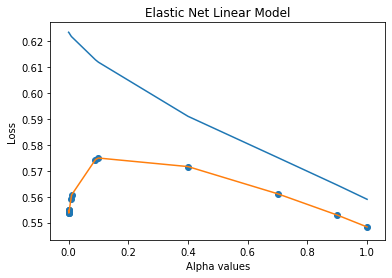

In [64]:
alpha = [.0000001,.00001,.0001,.0003,.0005,.0008,.001,.008,.01,.09,.1,.4,.7,.9,1] 
plot = Elastic_Net(alpha)
plot.show()

<img src = "https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcQmpsaHLkv3d85Eamq-zGl2K2cA4d3xptRbr4XGZ79R9pl6sn2n"
width="60" height="34">

<font face="verdana" color="006400"><b><u>My Thought Process </u>: From the graph i can take .7 as my hypertuned alpha </font>

In [66]:
linear_clf = ElasticNet(alpha=.7, fit_intercept=True, normalize=False, max_iter=100,\
                            random_state=23) 
linear_clf.fit(scaled_train,actual_y)
r_square = r2_score(actual_y,linear_clf.predict(scaled_train))
RMSE = mean_squared_error(actual_y,linear_clf.predict(scaled_train),squared=False)
print(f"R_square for train data is : {r_square}")
print(f"RMSE for train data is : {RMSE}")

# lET'S FIND THE KAGGLE SCORE.
sub = pd.DataFrame()
sub['ID'] = test['ID']
sub['y'] = linear_clf.predict(scaled_test)
sub.to_csv('submission_Final.csv', index=False)

R_square for train data is : 0.5738562824177406
RMSE for train data is : 8.108516212179207


<!DOCTYPE html>
<html>
<head>
<style>
table {
  font-family: arial, sans-serif;
  border-collapse: collapse;
  width: 100%;
}

td, th {
  border: 1px solid #dddddd;
  text-align: left;
  padding: 8px;
}

tr:nth-child(even) {
  background-color: #dddddd;
}
</style>
</head>
<body>
<h4><center>MODEL SUMMARY</center></h4>
<h4><center>ATTEMPT 1</center></h4>

<table>
 <tr>
    <th>SN0</th>
    <th>Model</th>
    <th>Encoding</th>
    <th>Imputation</th>
    <th>Hyperparameter</th>
    <th>R^2 Loss</th>
    <th>RMSE</th>
    <th>KAGGLE PRIVATE SCORE</th>  
  </tr>
  <tr>
    <td>1.</td>
    <td>LASSO REGRESSION MODEL</td>
    <td>LABEL ENCODING</td>
    <td>ABOVE 150 SEC VALUES IMPUTED WITH 100</td>
    <td>ALPHA = .6</td>
    <td>0.58</td> 
    <td>7.761</td>
    <td>0.51926</td>  
  </tr>
   <tr>
    <td>2.</td>
    <td>RIDGE REGRESSION MODEL</td>
    <td>LABEL ENCODING</td>
    <td>ABOVE 150 SEC VALUES IMPUTED WITH 100</td>
    <td>ALPHA = .2</td>
    <td>0.632</td> 
    <td>7.25</td>  
    <td>-14.88253</td>     
  </tr>  
  <tr>
    <td>3.</td>
    <td>ELASTICNET MODEL</td>
    <td>LABEL ENCODING</td>
    <td>ABOVE 150 SEC VALUES IMPUTED WITH 100</td>
    <td>ALPHA = .9</td>
    <td> 0.58</td> 
    <td>7.70</td>
    <td>0.51776</td>  
  </tr> 
  <tr>
    <td>4.</td>
    <td>LASSOLARS MODEL</td>
    <td>LABEL ENCODING</td>
    <td>ABOVE 150 SEC VALUES IMPUTED WITH 100</td>
    <td>Normalize = TRUE</td>
    <td>0.60</td> 
    <td >7.576</td> 
    <td>0.523</td>   
  </tr>  
    <td>5.</td>
    <td>DECISIONTREE MODEL</td>
    <td>LABEL ENCODING</td>
    <td>ABOVE 150 SEC VALUES IMPUTED WITH 100</td>
    <td>Multi-Parameters</td>
    <td>0.645</td> 
    <td>7.128</td> 
    <td>.53772</td> 
  </tr>
   <tr>  
    <td>6.</td>
    <td>SVR MODEL</td>
    <td>LABEL ENCODING</td>
    <td>ABOVE 150 SEC VALUES IMPUTED WITH 100</td>
    <td>C value : 1</td>
    <td>.52</td> 
    <td>8.24</td> 
    <td>No</td> 
  </tr>
  <tr>  
    <td>6.</td>
    <td>XGBOOST</td>
    <td>LABEL ENCODING</td>
    <td>ABOVE 150 SEC VALUES IMPUTED WITH 100</td>
    <td>Mupliple parameters </td>
    <td>.65</td> 
    <td>7.01</td> 
    <td>.54901</td> 
  </tr>
  
   <tr>  
    <td>7.</td>
    <td>GBDT</td>
    <td>LABEL ENCODING</td>
    <td>ABOVE 150 SEC VALUES IMPUTED WITH 100</td>
    <td>Multiple Parameters: </td>
    <td>0.6363</td> 
    <td>7.32</td> 
    <td>.54901</td> 
  </tr>

</table>

<h4><center>ATTEMPT 2</center></h4>
<table>
 <tr>
    <th>SN0</th>
    <th>Model</th>
    <th>Encoding</th>
    <th>Imputation</th>
    <th>Hyperparameter</th>
    <th>R^2 Loss</th>
    <th>RMSE</th>
    <th>KAGGLE PRIVATE SCORE</th>  
  </tr>
   <tr>
    <td>6.</td>
    <td>LASSO REGRESSION MODEL</td>
    <td>LABEL ENCODING</td>
    <td>REMOVED 12 UNIMPORTANT FEATURES FROM THE DATASET </td>
    <td>ALPHA = .9</td>
    <td>0.58</td> 
    <td>7.761</td>
    <td>0.51926</td>  
  </tr>  
</table>

<h4><center>ATTEMPT 3</center></h4>
<table>
 <tr>
    <th>SN0</th>
    <th>Model</th>
    <th>Encoding</th>
    <th>Imputation</th>
    <th>Hyperparameter</th>
    <th>R^2 Loss</th>
    <th>RMSE</th>
    <th>KAGGLE PRIVATE SCORE</th>  
  </tr>
  <tr>
    <td>6.</td>
    <td>LASSO REGRESSION MODEL</td>
    <td>LABEL ENCODING</td>
    <td>iMPUTED 265.32 ONLY WITH 100 </td>
    <td>ALPHA = .9</td>
    <td>0.553</td> 
    <td>8.29</td>
    <td>0.52224</td>  
   </tr> 
   <tr>
    <td>6.</td>
    <td>RIDGE REGRESSION MODEL</td>
    <td>LABEL ENCODING</td>
    <td>iMPUTED 265.32 ONLY WITH 100 </td>
    <td>ALPHA = 400</td>
    <td>0.031</td> 
    <td>12.22</td>
    <td>0.12</td>   
  </tr>
  <tr>
    <td>7.</td>
    <td>ELASTICNET REGRESSION MODEL</td>
    <td>LABEL ENCODING</td>
    <td>iMPUTED 265.32 ONLY WITH 100 </td>
    <td>ALPHA = .7</td>
    <td>0.573</td> 
    <td>8.10</td>
    <td>.52685</td>   
  </tr> 
</table>
</body>
</html>

<h4>5.1.4 Linear Regression with LARSLasso</h4>

In [67]:
#https://www.quora.com/What-is-Least-Angle-Regression-and-when-should-it-be-used
# not much hyperparametertuning involved in it.

LassoLars = LassoLarsCV(normalize=True,cv=5)
LassoLars.fit(scaled_train,actual_y)
r_square = r2_score(actual_y,LassoLars.predict(scaled_train))
RMSE = mean_squared_error(actual_y,LassoLars.predict(scaled_train),squared=False)
print(f"R_square for train data is : {r_square}")
print(f"RMSE for train data is : {RMSE}")

R_square for train data is : 0.5550822084993573
RMSE for train data is : 8.285204466847453


In [69]:
# lET'S FIND THE KAGGLE SCORE.
sub = pd.DataFrame()
sub['ID'] = test['ID']
sub['y'] = LassoLars.predict(scaled_test)
sub.to_csv('submission_Final.csv', index=False)

<!DOCTYPE html>
<html>
<head>
<style>
table {
  font-family: arial, sans-serif;
  border-collapse: collapse;
  width: 100%;
}

td, th {
  border: 1px solid #dddddd;
  text-align: left;
  padding: 8px;
}

tr:nth-child(even) {
  background-color: #dddddd;
}
</style>
</head>
<body>
<h4><center>MODEL SUMMARY</center></h4>
<h4><center>ATTEMPT 1</center></h4>

<table>
 <tr>
    <th>SN0</th>
    <th>Model</th>
    <th>Encoding</th>
    <th>Imputation</th>
    <th>Hyperparameter</th>
    <th>R^2 Loss</th>
    <th>RMSE</th>
    <th>KAGGLE PRIVATE SCORE</th>  
  </tr>
  <tr>
    <td>1.</td>
    <td>LASSO REGRESSION MODEL</td>
    <td>LABEL ENCODING</td>
    <td>ABOVE 150 SEC VALUES IMPUTED WITH 100</td>
    <td>ALPHA = .6</td>
    <td>0.58</td> 
    <td>7.761</td>
    <td>0.51926</td>  
  </tr>
   <tr>
    <td>2.</td>
    <td>RIDGE REGRESSION MODEL</td>
    <td>LABEL ENCODING</td>
    <td>ABOVE 150 SEC VALUES IMPUTED WITH 100</td>
    <td>ALPHA = .2</td>
    <td>0.632</td> 
    <td>7.25</td>  
    <td>-14.88253</td>     
  </tr>  
  <tr>
    <td>3.</td>
    <td>ELASTICNET MODEL</td>
    <td>LABEL ENCODING</td>
    <td>ABOVE 150 SEC VALUES IMPUTED WITH 100</td>
    <td>ALPHA = .9</td>
    <td> 0.58</td> 
    <td>7.70</td>
    <td>0.51776</td>  
  </tr> 
  <tr>
    <td>4.</td>
    <td>LASSOLARS MODEL</td>
    <td>LABEL ENCODING</td>
    <td>ABOVE 150 SEC VALUES IMPUTED WITH 100</td>
    <td>Normalize = TRUE</td>
    <td>0.60</td> 
    <td >7.576</td> 
    <td>0.523</td>   
  </tr>  
    <td>5.</td>
    <td>DECISIONTREE MODEL</td>
    <td>LABEL ENCODING</td>
    <td>ABOVE 150 SEC VALUES IMPUTED WITH 100</td>
    <td>Multi-Parameters</td>
    <td>0.645</td> 
    <td>7.128</td> 
    <td>.53772</td> 
  </tr>
  
   <tr>  
    <td>6.</td>
    <td>SVR MODEL</td>
    <td>LABEL ENCODING</td>
    <td>ABOVE 150 SEC VALUES IMPUTED WITH 100</td>
    <td>C value : 1</td>
    <td>.52</td> 
    <td>8.24</td> 
    <td>No</td> 
  </tr>
  
  <tr>  
    <td>6.</td>
    <td>XGBOOST</td>
    <td>LABEL ENCODING</td>
    <td>ABOVE 150 SEC VALUES IMPUTED WITH 100</td>
    <td>Mupliple parameters </td>
    <td>.65</td> 
    <td>7.01</td> 
    <td>.54901</td> 
  </tr>
   <tr>  
    <td>7.</td>
    <td>GBDT</td>
    <td>LABEL ENCODING</td>
    <td>ABOVE 150 SEC VALUES IMPUTED WITH 100</td>
    <td>Multiple Parameters: </td>
    <td>0.6363</td> 
    <td>7.32</td> 
    <td>.54901</td> 
  </tr>

</table>

<h4><center>ATTEMPT 2</center></h4>
<table>
 <tr>
    <th>SN0</th>
    <th>Model</th>
    <th>Encoding</th>
    <th>Imputation</th>
    <th>Hyperparameter</th>
    <th>R^2 Loss</th>
    <th>RMSE</th>
    <th>KAGGLE PRIVATE SCORE</th>  
  </tr>
   <tr>
    <td>6.</td>
    <td>LASSO REGRESSION MODEL</td>
    <td>LABEL ENCODING</td>
    <td>REMOVED 12 UNIMPORTANT FEATURES FROM THE DATASET </td>
    <td>ALPHA = .9</td>
    <td>0.58</td> 
    <td>7.761</td>
    <td>0.51926</td>  
  </tr>  
</table>

<h4><center>ATTEMPT 3</center></h4>
<table>
 <tr>
    <th>SN0</th>
    <th>Model</th>
    <th>Encoding</th>
    <th>Imputation</th>
    <th>Hyperparameter</th>
    <th>R^2 Loss</th>
    <th>RMSE</th>
    <th>KAGGLE PRIVATE SCORE</th>  
  </tr>
  <tr>
    <td>6.</td>
    <td>LASSO REGRESSION MODEL</td>
    <td>LABEL ENCODING</td>
    <td>iMPUTED 265.32 ONLY WITH 100 </td>
    <td>ALPHA = .9</td>
    <td>0.553</td> 
    <td>8.29</td>
    <td>0.52224</td>  
   </tr> 
   <tr>
    <td>6.</td>
    <td>RIDGE REGRESSION MODEL</td>
    <td>LABEL ENCODING</td>
    <td>iMPUTED 265.32 ONLY WITH 100 </td>
    <td>ALPHA = 400</td>
    <td>0.031</td> 
    <td>12.22</td>
    <td>0.12</td>   
  </tr>
  <tr>
    <td>7.</td>
    <td>ELASTICNET REGRESSION MODEL</td>
    <td>LABEL ENCODING</td>
    <td>iMPUTED 265.32 ONLY WITH 100 </td>
    <td>ALPHA = .7</td>
    <td>0.573</td> 
    <td>8.10</td>
    <td>.52685</td>   
  </tr> 
  <tr>
    <td>7.</td>
    <td>LASSOLARS  MODEL</td>
    <td>LABEL ENCODING</td>
    <td>iMPUTED 265.32 ONLY WITH 100 </td>
    <td>NORMALIZE = TRUE</td>
    <td>0.555</td> 
    <td>8.28</td>
    <td>.5173</td>   
  </tr>
</table>
</body>
</html>

<h4>5.1.5 Decision tree</h4>

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   56.4s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  2.8min finished


params no 0 : {'min_samples_split': 9, 'max_leaf_nodes': 15, 'max_depth': 10, 'criterion': 'mae'} test score : [0.5699317033370882]
params no 1 : {'min_samples_split': 7, 'max_leaf_nodes': 500, 'max_depth': 9, 'criterion': 'mae'} test score : [0.5699317033370882, 0.541676668620916]
params no 2 : {'min_samples_split': 2, 'max_leaf_nodes': 30, 'max_depth': 9, 'criterion': 'friedman_mse'} test score : [0.5699317033370882, 0.541676668620916, 0.548936293144281]
params no 3 : {'min_samples_split': 5, 'max_leaf_nodes': 300, 'max_depth': 7, 'criterion': 'mae'} test score : [0.5699317033370882, 0.541676668620916, 0.548936293144281, 0.5542429055373415]
params no 4 : {'min_samples_split': 4, 'max_leaf_nodes': 100, 'max_depth': 9, 'criterion': 'mae'} test score : [0.5699317033370882, 0.541676668620916, 0.548936293144281, 0.5542429055373415, 0.5428732683048892]
params no 5 : {'min_samples_split': 5, 'max_leaf_nodes': 50, 'max_depth': 3, 'criterion': 'friedman_mse'} test score : [0.5699317033370882,

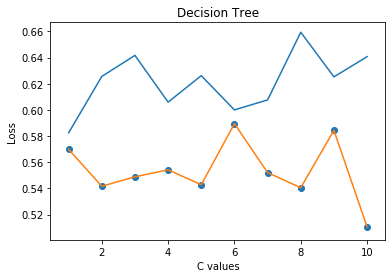

In [70]:
a = decision_tree()
plt = a[0]
Decsion_clf = a[1]
plt.show()

In [72]:
print("Our best score is : ",Decsion_clf.best_score_)
print("Our best estimator : ",Decsion_clf.best_estimator_)	

 #lET'S FIND THE KAGGLE SCORE.
DECISONTREE = Decsion_clf.best_estimator_
decision_classfier = best_decison_tree(DECISONTREE)
sub = pd.DataFrame()
sub['ID'] = test['ID']
sub['y'] = decision_classfier.predict(scaled_test)
sub.to_csv('submission_Final.csv', index=False)

R_square for train data is : 0.5994855038960254
RMSE for train data is : 7.860903482514222


<!DOCTYPE html>
<html>
<head>
<style>
table {
  font-family: arial, sans-serif;
  border-collapse: collapse;
  width: 100%;
}

td, th {
  border: 1px solid #dddddd;
  text-align: left;
  padding: 8px;
}

tr:nth-child(even) {
  background-color: #dddddd;
}
</style>
</head>
<body>
<h4><center>MODEL SUMMARY</center></h4>
<h4><center>ATTEMPT 1</center></h4>

<table>
 <tr>
    <th>SN0</th>
    <th>Model</th>
    <th>Encoding</th>
    <th>Imputation</th>
    <th>Hyperparameter</th>
    <th>R^2 Loss</th>
    <th>RMSE</th>
    <th>KAGGLE PRIVATE SCORE</th>  
  </tr>
  <tr>
    <td>1.</td>
    <td>LASSO REGRESSION MODEL</td>
    <td>LABEL ENCODING</td>
    <td>ABOVE 150 SEC VALUES IMPUTED WITH 100</td>
    <td>ALPHA = .6</td>
    <td>0.58</td> 
    <td>7.761</td>
    <td>0.51926</td>  
  </tr>
   <tr>
    <td>2.</td>
    <td>RIDGE REGRESSION MODEL</td>
    <td>LABEL ENCODING</td>
    <td>ABOVE 150 SEC VALUES IMPUTED WITH 100</td>
    <td>ALPHA = .2</td>
    <td>0.632</td> 
    <td>7.25</td>  
    <td>-14.88253</td>     
  </tr>  
  <tr>
    <td>3.</td>
    <td>ELASTICNET MODEL</td>
    <td>LABEL ENCODING</td>
    <td>ABOVE 150 SEC VALUES IMPUTED WITH 100</td>
    <td>ALPHA = .9</td>
    <td> 0.58</td> 
    <td>7.70</td>
    <td>0.51776</td>  
  </tr> 
  <tr>
    <td>4.</td>
    <td>LASSOLARS MODEL</td>
    <td>LABEL ENCODING</td>
    <td>ABOVE 150 SEC VALUES IMPUTED WITH 100</td>
    <td>Normalize = TRUE</td>
    <td>0.60</td> 
    <td >7.576</td> 
    <td>0.523</td>   
  </tr>  
    <td>5.</td>
    <td>DECISIONTREE MODEL</td>
    <td>LABEL ENCODING</td>
    <td>ABOVE 150 SEC VALUES IMPUTED WITH 100</td>
    <td>Multi-Parameters</td>
    <td>0.645</td> 
    <td>7.128</td> 
    <td>.53772</td> 
  </tr>
  
   <tr>  
    <td>6.</td>
    <td>SVR MODEL</td>
    <td>LABEL ENCODING</td>
    <td>ABOVE 150 SEC VALUES IMPUTED WITH 100</td>
    <td>C value : 1</td>
    <td>.52</td> 
    <td>8.24</td> 
    <td>No</td> 
  </tr>
  
  <tr>  
    <td>7.</td>
    <td>XGBOOST</td>
    <td>LABEL ENCODING</td>
    <td>ABOVE 150 SEC VALUES IMPUTED WITH 100</td>
    <td>Mupliple parameters </td>
    <td>.65</td> 
    <td>7.01</td> 
    <td>.54901</td> 
  </tr>
  
   <tr>  
    <td>7.</td>
    <td>GBDT</td>
    <td>LABEL ENCODING</td>
    <td>ABOVE 150 SEC VALUES IMPUTED WITH 100</td>
    <td>Multiple Parameters: </td>
    <td>0.6363</td> 
    <td>7.32</td> 
    <td>.54901</td> 
  </tr>

</table>

<h4><center>ATTEMPT 2</center></h4>
<table>
 <tr>
    <th>SN0</th>
    <th>Model</th>
    <th>Encoding</th>
    <th>Imputation</th>
    <th>Hyperparameter</th>
    <th>R^2 Loss</th>
    <th>RMSE</th>
    <th>KAGGLE PRIVATE SCORE</th>  
  </tr>
   <tr>
    <td>8.</td>
    <td>LASSO REGRESSION MODEL</td>
    <td>LABEL ENCODING</td>
    <td>REMOVED 12 UNIMPORTANT FEATURES FROM THE DATASET </td>
    <td>ALPHA = .9</td>
    <td>0.58</td> 
    <td>7.761</td>
    <td>0.51926</td>  
  </tr>  
</table>

<h4><center>ATTEMPT 3</center></h4>
<table>
 <tr>
    <th>SN0</th>
    <th>Model</th>
    <th>Encoding</th>
    <th>Imputation</th>
    <th>Hyperparameter</th>
    <th>R^2 Loss</th>
    <th>RMSE</th>
    <th>KAGGLE PRIVATE SCORE</th>  
  </tr>
  <tr>
    <td>9.</td>
    <td>LASSO REGRESSION MODEL</td>
    <td>LABEL ENCODING</td>
    <td>iMPUTED 265.32 ONLY WITH 100 </td>
    <td>ALPHA = .9</td>
    <td>0.553</td> 
    <td>8.29</td>
    <td>0.52224</td>  
   </tr> 
   <tr>
    <td>10.</td>
    <td>RIDGE REGRESSION MODEL</td>
    <td>LABEL ENCODING</td>
    <td>iMPUTED 265.32 ONLY WITH 100 </td>
    <td>ALPHA = 400</td>
    <td>0.031</td> 
    <td>12.22</td>
    <td>0.12</td>   
  </tr>
  <tr>
    <td>11.</td>
    <td>ELASTICNET REGRESSION MODEL</td>
    <td>LABEL ENCODING</td>
    <td>iMPUTED 265.32 ONLY WITH 100 </td>
    <td>ALPHA = .7</td>
    <td>0.573</td> 
    <td>8.10</td>
    <td>.52685</td>   
  </tr> 
  <tr>
    <td>12.</td>
    <td>LASSOLARS  MODEL</td>
    <td>LABEL ENCODING</td>
    <td>iMPUTED 265.32 ONLY WITH 100 </td>
    <td>NORMALIZE = TRUE</td>
    <td>0.555</td> 
    <td>8.28</td>
    <td>.5173</td>   
  </tr>
  <tr>
    <td>13.</td>
    <td>DECISIONTREE REGRESSOR  MODEL</td>
    <td>LABEL ENCODING</td>
    <td>iMPUTED 265.32 ONLY WITH 100 </td>
    <td>MultiHyperparameters</td>
    <td>0.60</td> 
    <td>7.86</td>
    <td>.54353</td>   
  </tr>
 
</table>
</body>
</html>

<h4>5.1.5 SVR Model</h4>

[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]


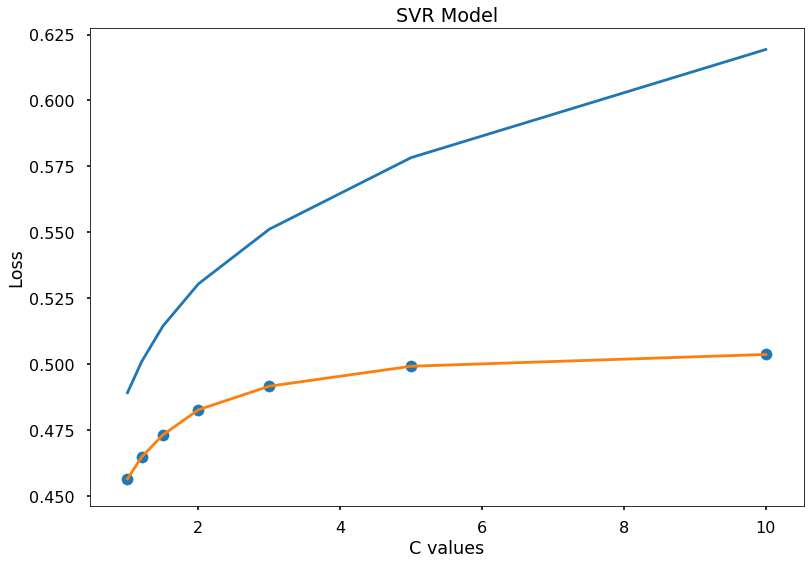

In [23]:
C_values = [1,1.2,1.5,2,3,5,10]
plt = SVR_Regression(scaled_train,C_values)
plt.show()

In [24]:
SVR_MODEL = SVR(kernel='rbf', degree=3, gamma='scale', C = 1, epsilon=0.2,\
        verbose=3, max_iter=-1)
SVR_MODEL_FIT(SVR_MODEL)

[LibSVM]R_square for train data is : 0.49741886544890124
RMSE for train data is : 8.805751703343692
Submission_Final.csv Generated


<h4>5.1.6 XGBOOST</h4>

In [ ]:
'''Cross validation the xgb model then predict the test data'''

max_depths = [3,4]
n_treess = [100,400,520]
etas = [.001,.0045]
subsamples = [.93,.95]
count = 0
dtrain = xgb.DMatrix(decomposed_train, actual_y)
dtest = xgb.DMatrix(decomposed_test)

# GRID SEARCH
for max_depth in max_depths:
    for n_trees in n_treess:
        for eta in etas:
            for subsample in subsamples:
                xgb_params = {
                            'n_trees': n_trees, 
                            'max_depth': max_depth,
                            'eta': eta,
                            'subsample': subsample,
                            'objective': 'reg:linear',
                            'eval_metric': 'rmse',
                        }
                print(f"Parameters are :{max_depth,n_trees,eta,subsample}")
                print(f"Total iteration :{len(max_depths)*len(n_treess)*len(etas)*len(subsamples)}")
                print(f"Total iteration remaining :{len(max_depths)*len(n_treess)*len(etas)*len(subsamples) - (count)}")
                print("#"*110)
                count+=1
                # NOTE: Make sure that the class is labeled 'class' in the data file
                num_boost_rounds = 1700
                XGBOOST_CV = xgb.cv(xgb_params, dtrain, nfold=5, verbose_eval=3,early_stopping_rounds=5, num_boost_round=num_boost_rounds)
                print("#"*110)


In [ ]:
'''Train the xgb model then predict the test data'''
# (3, 100, 0.0045, 0.93)
# max_depth,n_trees,eta,subsample
xgb_params = {
    'n_trees': 100, 
    'eta': 0.0045,
    'max_depth': 3,
    'subsample': 0.93,
    'objective': 'reg:linear',
    'eval_metric': 'rmse',
    'silent': 1
}



dtrain = xgb.DMatrix(scaled_train, actual_y)
dtest = xgb.DMatrix(scaled_test)

# NOTE: Make sure that the class is labeled 'class' in the data file
num_boost_rounds = 1290
# train model
model = xgb.train(dict(xgb_params, silent=0), dtrain, num_boost_round=num_boost_rounds)
y_pred_train = model.predict(dtrain)
y_pred = model.predict(dtest)
print(f"(r2  : {r2_score(actual_y,y_pred_train)} and mean_squared_error {mean_squared_error(actual_y,y_pred_train,squared=False)})  ")

<!DOCTYPE html>
<html>
<head>
<style>
table {
  font-family: arial, sans-serif;
  border-collapse: collapse;
  width: 100%;
}

td, th {
  border: 1px solid #dddddd;
  text-align: left;
  padding: 8px;
}

tr:nth-child(even) {
  background-color: #dddddd;
}
</style>
</head>
<body>
<h4><center>MODEL SUMMARY</center></h4>
<h4><center>ATTEMPT 1</center></h4>

<table>
 <tr>
    <th>SN0</th>
    <th>Model</th>
    <th>Encoding</th>
    <th>Imputation</th>
    <th>Hyperparameter</th>
    <th>R^2 Loss</th>
    <th>RMSE</th>
    <th>KAGGLE PRIVATE SCORE</th>  
  </tr>
  <tr>
    <td>1.</td>
    <td>LASSO REGRESSION MODEL</td>
    <td>LABEL ENCODING</td>
    <td>ABOVE 150 SEC VALUES IMPUTED WITH 100</td>
    <td>ALPHA = .6</td>
    <td>0.58</td> 
    <td>7.761</td>
    <td>0.51926</td>  
  </tr>
   <tr>
    <td>2.</td>
    <td>RIDGE REGRESSION MODEL</td>
    <td>LABEL ENCODING</td>
    <td>ABOVE 150 SEC VALUES IMPUTED WITH 100</td>
    <td>ALPHA = .2</td>
    <td>0.632</td> 
    <td>7.25</td>  
    <td>-14.88253</td>     
  </tr>  
  <tr>
    <td>3.</td>
    <td>ELASTICNET MODEL</td>
    <td>LABEL ENCODING</td>
    <td>ABOVE 150 SEC VALUES IMPUTED WITH 100</td>
    <td>ALPHA = .9</td>
    <td> 0.58</td> 
    <td>7.70</td>
    <td>0.51776</td>  
  </tr> 
  <tr>
    <td>4.</td>
    <td>LASSOLARS MODEL</td>
    <td>LABEL ENCODING</td>
    <td>ABOVE 150 SEC VALUES IMPUTED WITH 100</td>
    <td>Normalize = TRUE</td>
    <td>0.60</td> 
    <td >7.576</td> 
    <td>0.523</td>   
  </tr>  
    <td>5.</td>
    <td>DECISIONTREE MODEL</td>
    <td>LABEL ENCODING</td>
    <td>ABOVE 150 SEC VALUES IMPUTED WITH 100</td>
    <td>Multi-Parameters</td>
    <td>0.645</td> 
    <td>7.128</td> 
    <td>.53772</td> 
  </tr>
  
   <tr>  
    <td>6.</td>
    <td>SVR MODEL</td>
    <td>LABEL ENCODING</td>
    <td>ABOVE 150 SEC VALUES IMPUTED WITH 100</td>
    <td>C value : 1</td>
    <td>.52</td> 
    <td>8.24</td> 
    <td>No</td> 
  </tr>
  
  <tr>  
    <td>7.</td>
    <td>XGBOOST</td>
    <td>LABEL ENCODING</td>
    <td>ABOVE 150 SEC VALUES IMPUTED WITH 100</td>
    <td>Mupliple parameters </td>
    <td>.65</td> 
    <td>7.01</td> 
    <td>.54901</td> 
  </tr>
  
   <tr>  
    <td>7.</td>
    <td>GBDT</td>
    <td>LABEL ENCODING</td>
    <td>ABOVE 150 SEC VALUES IMPUTED WITH 100</td>
    <td>Multiple Parameters: </td>
    <td>0.6363</td> 
    <td>7.32</td> 
    <td>.54901</td> 
  </tr>

</table>

<h4><center>ATTEMPT 2</center></h4>
<table>
 <tr>
    <th>SN0</th>
    <th>Model</th>
    <th>Encoding</th>
    <th>Imputation</th>
    <th>Hyperparameter</th>
    <th>R^2 Loss</th>
    <th>RMSE</th>
    <th>KAGGLE PRIVATE SCORE</th>  
  </tr>
   <tr>
    <td>8.</td>
    <td>LASSO REGRESSION MODEL</td>
    <td>LABEL ENCODING</td>
    <td>REMOVED 12 UNIMPORTANT FEATURES FROM THE DATASET </td>
    <td>ALPHA = .9</td>
    <td>0.58</td> 
    <td>7.761</td>
    <td>0.51926</td>  
  </tr>  
</table>

<h4><center>ATTEMPT 3</center></h4>
<table>
 <tr>
    <th>SN0</th>
    <th>Model</th>
    <th>Encoding</th>
    <th>Imputation</th>
    <th>Hyperparameter</th>
    <th>R^2 Loss</th>
    <th>RMSE</th>
    <th>KAGGLE PRIVATE SCORE</th>  
  </tr>
  <tr>
    <td>9.</td>
    <td>LASSO REGRESSION MODEL</td>
    <td>LABEL ENCODING</td>
    <td>iMPUTED 265.32 ONLY WITH 100 </td>
    <td>ALPHA = .9</td>
    <td>0.553</td> 
    <td>8.29</td>
    <td>0.52224</td>  
   </tr> 
   <tr>
    <td>10.</td>
    <td>RIDGE REGRESSION MODEL</td>
    <td>LABEL ENCODING</td>
    <td>iMPUTED 265.32 ONLY WITH 100 </td>
    <td>ALPHA = 400</td>
    <td>0.031</td> 
    <td>12.22</td>
    <td>0.12</td>   
  </tr>
  <tr>
    <td>11.</td>
    <td>ELASTICNET REGRESSION MODEL</td>
    <td>LABEL ENCODING</td>
    <td>iMPUTED 265.32 ONLY WITH 100 </td>
    <td>ALPHA = .7</td>
    <td>0.573</td> 
    <td>8.10</td>
    <td>.52685</td>   
  </tr> 
  <tr>
    <td>12.</td>
    <td>LASSOLARS  MODEL</td>
    <td>LABEL ENCODING</td>
    <td>iMPUTED 265.32 ONLY WITH 100 </td>
    <td>NORMALIZE = TRUE</td>
    <td>0.555</td> 
    <td>8.28</td>
    <td>.5173</td>   
  </tr>
  <tr>
    <td>13.</td>
    <td>DECISIONTREE REGRESSOR  MODEL</td>
    <td>LABEL ENCODING</td>
    <td>iMPUTED 265.32 ONLY WITH 100 </td>
    <td>MultiHyperparameters</td>
    <td>0.60</td> 
    <td>7.86</td>
    <td>.54353</td>   
  </tr>
  <tr>
    <td>14.</td>
    <td>SVR MODEL</td>
    <td>LABEL ENCODING</td>
    <td>iMPUTED 265.32 ONLY WITH 100 </td>
    <td>C Value : 1</td>
    <td>8.80</td> 
    <td>.495</td>
    <td>No</td>   
  </tr>
  <tr>
    <td>15.</td>
    <td>XGBOOST MODEL</td>
    <td>LABEL ENCODING</td>
    <td>iMPUTED 265.32 ONLY WITH 100 </td>
    <td>MultiHyperparameters</td>
    <td>--</td> 
    <td>--</td>
    <td>--</td>   
  </tr>
 
</table>
</body>
</html>

<h4>GBDT</h4>

In [47]:
GBDT_Regression(scaled_train,scaled_test)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   12.6s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   33.0s finished


params : {'subsample': 0.2, 'min_samples_split': 6, 'min_samples_leaf': 4, 'max_features': 0.55, 'max_depth': 9, 'learning_rate': 0.001} and it's test r2 score is 0.10087123373248594 and it's train r2 score is 0.1134273806858915
params : {'subsample': 0.6, 'min_samples_split': 8, 'min_samples_leaf': 10, 'max_features': 0.55, 'max_depth': 4, 'learning_rate': 0.0025} and it's test r2 score is 0.22658359271738657 and it's train r2 score is 0.237372381943372
params : {'subsample': 0.1, 'min_samples_split': 7, 'min_samples_leaf': 5, 'max_features': 0.7, 'max_depth': 7, 'learning_rate': 0.02} and it's test r2 score is 0.563776159095793 and it's train r2 score is 0.61471255193832
params : {'subsample': 0.2, 'min_samples_split': 4, 'min_samples_leaf': 6, 'max_features': 0.4, 'max_depth': 3, 'learning_rate': 0.0025} and it's test r2 score is 0.21923192632038088 and it's train r2 score is 0.22585927895082394
params : {'subsample': 0.5, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features

<!DOCTYPE html>
<html>
<head>
<style>
table {
  font-family: arial, sans-serif;
  border-collapse: collapse;
  width: 100%;
}

td, th {
  border: 1px solid #dddddd;
  text-align: left;
  padding: 8px;
}

tr:nth-child(even) {
  background-color: #dddddd;
}
</style>
</head>
<body>
<h4><center>MODEL SUMMARY</center></h4>
<h4><center>ATTEMPT 1</center></h4>

<table>
 <tr>
    <th>SN0</th>
    <th>Model</th>
    <th>Encoding</th>
    <th>Imputation</th>
    <th>Hyperparameter</th>
    <th>R^2 Loss</th>
    <th>RMSE</th>
    <th>KAGGLE PRIVATE SCORE</th>  
  </tr>
  <tr>
    <td>1.</td>
    <td>LASSO REGRESSION MODEL</td>
    <td>LABEL ENCODING</td>
    <td>ABOVE 150 SEC VALUES IMPUTED WITH 100</td>
    <td>ALPHA = .6</td>
    <td>0.58</td> 
    <td>7.761</td>
    <td>0.51926</td>  
  </tr>
   <tr>
    <td>2.</td>
    <td>RIDGE REGRESSION MODEL</td>
    <td>LABEL ENCODING</td>
    <td>ABOVE 150 SEC VALUES IMPUTED WITH 100</td>
    <td>ALPHA = .2</td>
    <td>0.632</td> 
    <td>7.25</td>  
    <td>-14.88253</td>     
  </tr>  
  <tr>
    <td>3.</td>
    <td>ELASTICNET MODEL</td>
    <td>LABEL ENCODING</td>
    <td>ABOVE 150 SEC VALUES IMPUTED WITH 100</td>
    <td>ALPHA = .9</td>
    <td> 0.58</td> 
    <td>7.70</td>
    <td>0.51776</td>  
  </tr> 
  <tr>
    <td>4.</td>
    <td>LASSOLARS MODEL</td>
    <td>LABEL ENCODING</td>
    <td>ABOVE 150 SEC VALUES IMPUTED WITH 100</td>
    <td>Normalize = TRUE</td>
    <td>0.60</td> 
    <td >7.576</td> 
    <td>0.523</td>   
  </tr>  
    <td>5.</td>
    <td>DECISIONTREE MODEL</td>
    <td>LABEL ENCODING</td>
    <td>ABOVE 150 SEC VALUES IMPUTED WITH 100</td>
    <td>Multi-Parameters</td>
    <td>0.645</td> 
    <td>7.128</td> 
    <td>.53772</td> 
  </tr>
  
   <tr>  
    <td>6.</td>
    <td>SVR MODEL</td>
    <td>LABEL ENCODING</td>
    <td>ABOVE 150 SEC VALUES IMPUTED WITH 100</td>
    <td>C value : 1</td>
    <td>.52</td> 
    <td>8.24</td> 
    <td>No</td> 
  </tr>
  
  <tr>  
    <td>7.</td>
    <td>XGBOOST</td>
    <td>LABEL ENCODING</td>
    <td>ABOVE 150 SEC VALUES IMPUTED WITH 100</td>
    <td>Mupliple parameters </td>
    <td>.65</td> 
    <td>7.01</td> 
    <td>.54901</td> 
  </tr>
  
   <tr>  
    <td>7.</td>
    <td>GBDT</td>
    <td>LABEL ENCODING</td>
    <td>ABOVE 150 SEC VALUES IMPUTED WITH 100</td>
    <td>Multiple Parameters: </td>
    <td>0.6363</td> 
    <td>7.32</td> 
    <td>.54901</td> 
  </tr>

</table>

<h4><center>ATTEMPT 2</center></h4>
<table>
 <tr>
    <th>SN0</th>
    <th>Model</th>
    <th>Encoding</th>
    <th>Imputation</th>
    <th>Hyperparameter</th>
    <th>R^2 Loss</th>
    <th>RMSE</th>
    <th>KAGGLE PRIVATE SCORE</th>  
  </tr>
   <tr>
    <td>8.</td>
    <td>LASSO REGRESSION MODEL</td>
    <td>LABEL ENCODING</td>
    <td>REMOVED 12 UNIMPORTANT FEATURES FROM THE DATASET </td>
    <td>ALPHA = .9</td>
    <td>0.58</td> 
    <td>7.761</td>
    <td>0.51926</td>  
  </tr>  
</table>

<h4><center>ATTEMPT 3</center></h4>
<table>
 <tr>
    <th>SN0</th>
    <th>Model</th>
    <th>Encoding</th>
    <th>Imputation</th>
    <th>Hyperparameter</th>
    <th>R^2 Loss</th>
    <th>RMSE</th>
    <th>KAGGLE PRIVATE SCORE</th>  
  </tr>
  <tr>
    <td>9.</td>
    <td>LASSO REGRESSION MODEL</td>
    <td>LABEL ENCODING</td>
    <td>iMPUTED 265.32 ONLY WITH 100 </td>
    <td>ALPHA = .9</td>
    <td>0.553</td> 
    <td>8.29</td>
    <td>0.52224</td>  
   </tr> 
   <tr>
    <td>10.</td>
    <td>RIDGE REGRESSION MODEL</td>
    <td>LABEL ENCODING</td>
    <td>iMPUTED 265.32 ONLY WITH 100 </td>
    <td>ALPHA = 400</td>
    <td>0.031</td> 
    <td>12.22</td>
    <td>0.12</td>   
  </tr>
  <tr>
    <td>11.</td>
    <td>ELASTICNET REGRESSION MODEL</td>
    <td>LABEL ENCODING</td>
    <td>iMPUTED 265.32 ONLY WITH 100 </td>
    <td>ALPHA = .7</td>
    <td>0.573</td> 
    <td>8.10</td>
    <td>.52685</td>   
  </tr> 
  <tr>
    <td>12.</td>
    <td>LASSOLARS  MODEL</td>
    <td>LABEL ENCODING</td>
    <td>iMPUTED 265.32 ONLY WITH 100 </td>
    <td>NORMALIZE = TRUE</td>
    <td>0.555</td> 
    <td>8.28</td>
    <td>.5173</td>   
  </tr>
  <tr>
    <td>13.</td>
    <td>DECISIONTREE REGRESSOR  MODEL</td>
    <td>LABEL ENCODING</td>
    <td>iMPUTED 265.32 ONLY WITH 100 </td>
    <td>MultiHyperparameters</td>
    <td>0.60</td> 
    <td>7.86</td>
    <td>.54353</td>   
  </tr>
  
  <tr>
    <td>15.</td>
    <td>XGBOOST MODEL</td>
    <td>LABEL ENCODING</td>
    <td>iMPUTED 265.32 ONLY WITH 100 </td>
    <td>MultiHyperparameters</td>
    <td>--</td> 
    <td>--</td>
    <td>--</td>   
  </tr>
  
   <tr>
    <td>16.</td>
    <td>GBDT MODEL</td>
    <td>LABEL ENCODING</td>
    <td>iMPUTED 265.32 ONLY WITH 100 </td>
    <td>MultiHyperparameters</td>
    <td>--</td> 
    <td>.62</td>
    <td>.53003</td>   
  </tr>
 
</table>
</body>
</html>


<img src = "https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcQmpsaHLkv3d85Eamq-zGl2K2cA4d3xptRbr4XGZ79R9pl6sn2n"
width="60" height="34">
<h1><center>Attempt 4.</center></h1>
<font face="verdana" color="006400"><b><u>My Thought Process:</u> I want to  select that model which on hyperparameter tuning gets as closed result on test data also so that, our model will not behave badly on test data
i.e Train loss as close as possible with test loss.</b></font>

<font face="verdana" color="red"><b>NOTE :  Now eveything in blue is used in the subsequent model, we will check one by one all our analsys and will see the performance for eg: below we are using onnly 1.1 and 2.2 in the model</b></font>

<font face="verdana" color="006400"><b>1. Y imputation</b></font>

<pre>1.1 Removing above than 150 sec in Y values with mean of train['y'] i.e. 100 approx.</pre>

<pre>1.2 Removing 12 unimportant features from the dataset and check what happend in the performance, i will check only with one model for checking purpose</pre>


<pre>1.3 Removing only 265.32 y values with mean of train['y] i.e 100 approx.</pre>

<font face="verdana" color="blue"><b><pre>1.4 Removing only 265.32 y values with somwe other values other than 100 approx</pre>
</b></font>

<font face="verdana" color="006400"><b>2. Feature engineering</b></font>

<font face="verdana" color="blue"><b><pre>2.1 For catagorical values use label encoding </pre></b></font>
<pre>2.2 For catagorical values use one hot encoding encoding </pre>
<pre>2.3 Remove ID and use best of the above encoding and see the performance, as ID as per the business problem may have some hidden sequencing information or may be not, we have to see.</pre>
<pre>2.4 I will fetch the best features by using all well known feture decompostiiton algorithm.</pre>

<h4>5.1.1 Linear Regression with Lasso</h4>








  0%|                                                                                           | 0/15 [00:00<?, ?it/s]






  7%|█████▌                                                                             | 1/15 [00:11<02:43, 11.68s/it]






 13%|███████████                                                                        | 2/15 [00:23<02:32, 11.70s/it]






 20%|████████████████▌                                                                  | 3/15 [00:35<02:23, 11.93s/it]






 27%|██████████████████████▏                                                            | 4/15 [00:50<02:19, 12.64s/it]






 33%|███████████████████████████▋                                                       | 5/15 [01:04<02:10, 13.10s/it]






 40%|█████████████████████████████████▏                                                 | 6/15 [01:18<02:01, 13.54s/it]






 47%|██████████████████████████████████████▋                                            | 7/15 [01:33<01:51, 13

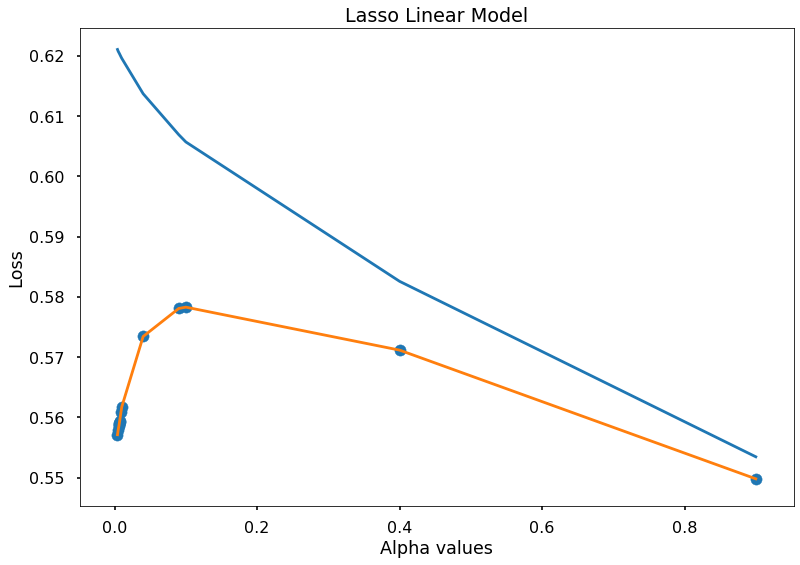

In [131]:
plot = Lasso_regression([.004,.005,.006,.0062,.0065,.0067,.0069,.007,.009,.01,.04,.09,.1,.4,.9])
plot.show()

<img src = "https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcQmpsaHLkv3d85Eamq-zGl2K2cA4d3xptRbr4XGZ79R9pl6sn2n"
width="60" height="34">
<font face="verdana" color="006400"><b><u>My Thought Process:</u> I am selecting .9 as tuned alpha value here.</b></font>

In [132]:
linear_clf = Lasso(alpha=.9, fit_intercept=True, normalize=False,random_state=23) 
linear_clf.fit(scaled_train,actual_y)
r_square = r2_score(actual_y,linear_clf.predict(scaled_train))
RMSE = mean_squared_error(actual_y,linear_clf.predict(scaled_train),squared=False)
print(f"R_square for train data is : {r_square}")
print(f"RMSE for train data is : {RMSE}")

# lET'S FIND THE KAGGLE SCORE.
sub = pd.DataFrame()
sub['ID'] = test['ID']
sub['y'] = linear_clf.predict(scaled_test)
sub.to_csv('submission_Final.csv', index=False)

R_square for train data is : 0.5521739206149533
RMSE for train data is : 8.317756676508028


<h4>5.1.2 Linear Regression with Ridge</h4>








  0%|                                                                                           | 0/22 [00:00<?, ?it/s]






  5%|███▊                                                                               | 1/22 [00:00<00:09,  2.13it/s]






  9%|███████▌                                                                           | 2/22 [00:00<00:09,  2.10it/s]






 14%|███████████▎                                                                       | 3/22 [00:01<00:08,  2.12it/s]






 18%|███████████████                                                                    | 4/22 [00:01<00:08,  2.14it/s]






 23%|██████████████████▊                                                                | 5/22 [00:02<00:08,  2.11it/s]






 27%|██████████████████████▋                                                            | 6/22 [00:02<00:07,  2.13it/s]






 32%|██████████████████████████▍                                                        | 7/22 [00:03<00:07,  2

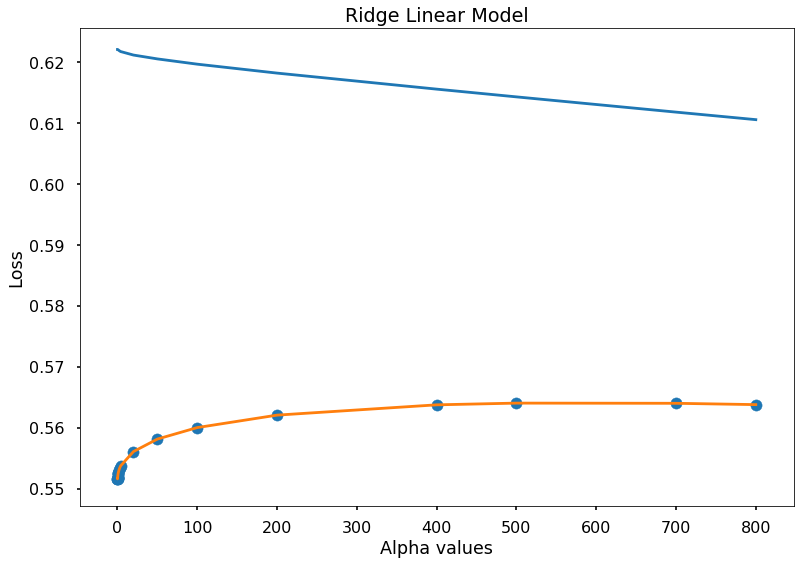

In [142]:
alpha = [.000001,.00001,.007,.07,.09,.1,.2,.5,.7,.9,1,2,3,4,20,50,100,200,400,500,700,800] 
plot = Ridge_regression(alpha)
plot.show()

In [144]:
linear_clf = Ridge(alpha=400, fit_intercept=True, normalize=True, max_iter=100,\
                            random_state=23) 
linear_clf.fit(train,actual_y)
r_square = r2_score(actual_y,linear_clf.predict(train))
RMSE = mean_squared_error(actual_y,linear_clf.predict(train),squared=False)
print(f"R_square for train data is : {r_square}")
print(f"RMSE for train data is : {RMSE}")

# lET'S FIND THE KAGGLE SCORE.
sub = pd.DataFrame()
sub['ID'] = test['ID']
sub['y'] = linear_clf.predict(scaled_test)
sub.to_csv('submission_Final.csv', index=False)


R_square for train data is : 0.03140608126574629
RMSE for train data is : 12.232701827492223


<h4>5.1.3 Linear Regression with Elsatic net</h4>








  0%|                                                                                           | 0/15 [00:00<?, ?it/s]






  7%|█████▌                                                                             | 1/15 [00:13<03:12, 13.78s/it]






 13%|███████████                                                                        | 2/15 [00:29<03:05, 14.26s/it]






 20%|████████████████▌                                                                  | 3/15 [00:45<02:57, 14.78s/it]






 27%|██████████████████████▏                                                            | 4/15 [01:00<02:45, 15.01s/it]






 33%|███████████████████████████▋                                                       | 5/15 [01:17<02:34, 15.45s/it]






 40%|█████████████████████████████████▏                                                 | 6/15 [01:36<02:30, 16.74s/it]






 47%|██████████████████████████████████████▋                                            | 7/15 [01:55<02:17, 17

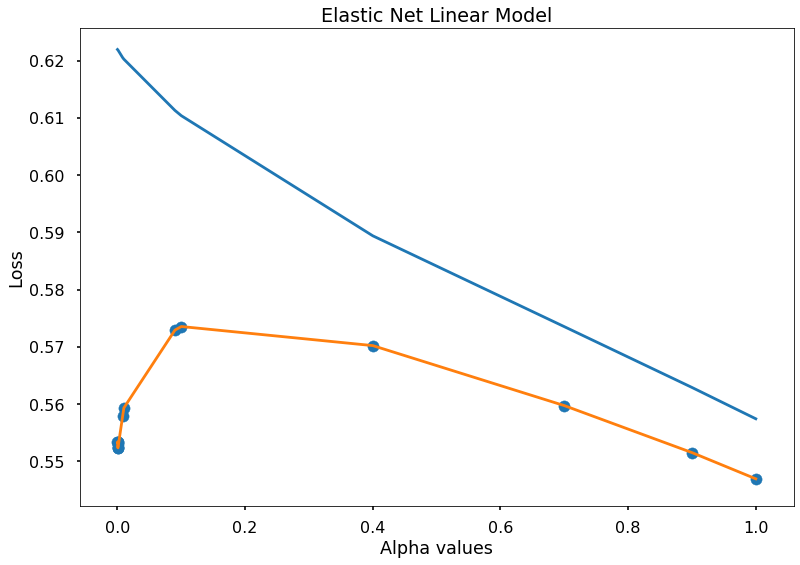

In [146]:
alpha = [.0000001,.00001,.0001,.0003,.0005,.0008,.001,.008,.01,.09,.1,.4,.7,.9,1] 
plot = Elastic_Net(alpha)
plot.show()


In [148]:
linear_clf = ElasticNet(alpha=.7, fit_intercept=True, normalize=False, max_iter=100,\
                            random_state=23) 
linear_clf.fit(scaled_train,actual_y)
r_square = r2_score(actual_y,linear_clf.predict(scaled_train))
RMSE = mean_squared_error(actual_y,linear_clf.predict(scaled_train),squared=False)
print(f"R_square for train data is : {r_square}")
print(f"RMSE for train data is : {RMSE}")

# lET'S FIND THE KAGGLE SCORE.
sub = pd.DataFrame()
sub['ID'] = test['ID']
sub['y'] = linear_clf.predict(scaled_test)
sub.to_csv('submission_Final.csv', index=False)

R_square for train data is : 0.5722589589439504
RMSE for train data is : 8.129090938797297


<h4>5.1.4 Linear Regression with LARSLasso</h4>

In [149]:
#https://www.quora.com/What-is-Least-Angle-Regression-and-when-should-it-be-used
# not much hyperparametertuning involved in it.

LassoLars = LassoLarsCV(normalize=True,cv=5)
LassoLars.fit(scaled_train,actual_y)
r_square = r2_score(actual_y,LassoLars.predict(scaled_train))
RMSE = mean_squared_error(actual_y,LassoLars.predict(scaled_train),squared=False)
print(f"R_square for train data is : {r_square}")
print(f"RMSE for train data is : {RMSE}")

R_square for train data is : 0.5748773967424698
RMSE for train data is : 8.10417142896398


In [150]:
# lET'S FIND THE KAGGLE SCORE.
sub = pd.DataFrame()
sub['ID'] = test['ID']
sub['y'] = LassoLars.predict(scaled_test)
sub.to_csv('submission_Final.csv', index=False)

<h4>5.1.5 Decision tree</h4>

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   44.5s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  2.7min finished


params no 0 : {'min_samples_split': 9, 'max_leaf_nodes': 15, 'max_depth': 10, 'criterion': 'mae'} test score : [0.5691416663903635]
params no 1 : {'min_samples_split': 7, 'max_leaf_nodes': 500, 'max_depth': 9, 'criterion': 'mae'} test score : [0.5691416663903635, 0.5408444243195082]
params no 2 : {'min_samples_split': 2, 'max_leaf_nodes': 30, 'max_depth': 9, 'criterion': 'friedman_mse'} test score : [0.5691416663903635, 0.5408444243195082, 0.5479065187405259]
params no 3 : {'min_samples_split': 5, 'max_leaf_nodes': 300, 'max_depth': 7, 'criterion': 'mae'} test score : [0.5691416663903635, 0.5408444243195082, 0.5479065187405259, 0.5528421222588931]
params no 4 : {'min_samples_split': 4, 'max_leaf_nodes': 100, 'max_depth': 9, 'criterion': 'mae'} test score : [0.5691416663903635, 0.5408444243195082, 0.5479065187405259, 0.5528421222588931, 0.5420482255530839]
params no 5 : {'min_samples_split': 5, 'max_leaf_nodes': 50, 'max_depth': 3, 'criterion': 'friedman_mse'} test score : [0.5691416663

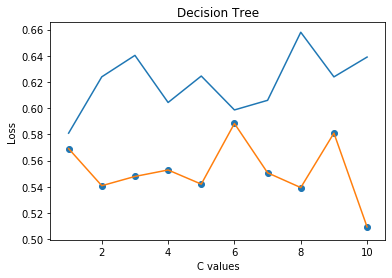

In [11]:
from sklearn.tree import DecisionTreeRegressor
a = decision_tree(scaled_train)
plt = a[0]
Decsion_clf = a[1]

In [13]:
print("Our best score is : ",Decsion_clf.best_score_)
print("Our best estimator : ",Decsion_clf.best_estimator_)	

 #lET'S FIND THE KAGGLE SCORE.
DECISONTREE = Decsion_clf.best_estimator_
decision_classfier = best_decison_tree(DECISONTREE,scaled_train)
sub = pd.DataFrame()
sub['ID'] = test['ID']
sub['y'] = decision_classfier.predict(scaled_test)
sub.to_csv('submission_Final.csv', index=False)

Our best score is :  0.5883271215098064
Our best estimator :  DecisionTreeRegressor(ccp_alpha=0.0, criterion='friedman_mse', max_depth=3,
                      max_features=None, max_leaf_nodes=50,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=5,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=2, splitter='best')
R_square for train data is : 0.5981000869722461
RMSE for train data is : 7.879714404147236


<h4>5.1.6 SVR MODEL</h4>









  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]









 14%|███████████▊                                                                       | 1/7 [01:46<10:38, 106.39s/it]

[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]









 29%|███████████████████████▋                                                           | 2/7 [04:17<09:58, 119.68s/it]

[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]









 43%|███████████████████████████████████▌                                               | 3/7 [06:45<08:33, 128.40s/it]

[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]









 57%|███████████████████████████████████████████████▍                                   | 4/7 [09:12<06:41, 133.98s/it]

[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]









 71%|███████████████████████████████████████████████████████████▎                       | 5/7 [11:36<04:33, 136.78s/it]

[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]









 86%|███████████████████████████████████████████████████████████████████████▏           | 6/7 [14:01<02:19, 139.37s/it]

[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]









100%|███████████████████████████████████████████████████████████████████████████████████| 7/7 [16:32<00:00, 142.88s/it]









Text(0, 0.5, 'Loss')

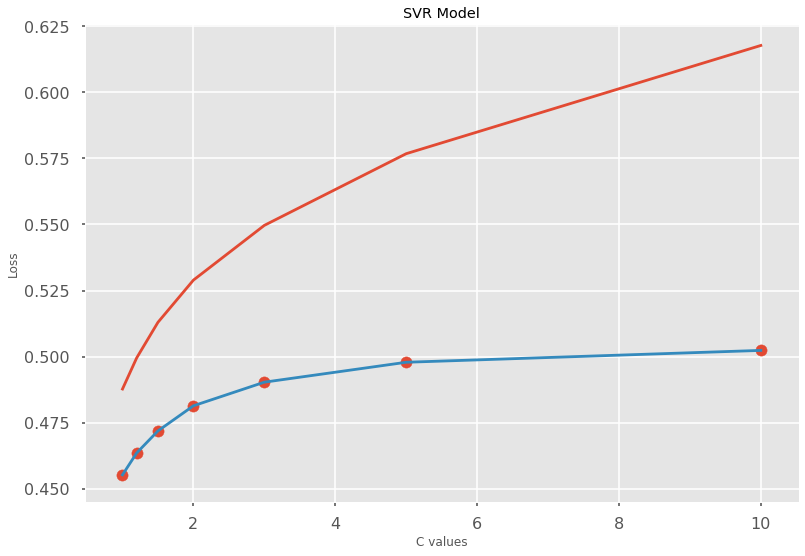

In [160]:
C_values = [1,1.2,1.5,2,3,5,10]
train_scores = []
test_scores = []
c_values = []
for i in tqdm(C_values):
    SVR_MODEL = SVR(kernel='rbf', degree=3, gamma='scale', C = i, epsilon=0.2,\
        verbose=3, max_iter=-1)
    SVR_MODEL.fit(scaled_train,actual_y)
    
    Scores = cross_validate(SVR_MODEL, scaled_train, actual_y, cv=5,scoring=('r2'),\
                                return_train_score=True)
    train_scores.append(np.mean(Scores['train_score']))
    test_scores.append(np.mean(Scores['test_score']))
    c_values.append(i)

plt.title("SVR Model")
plt.plot(c_values,train_scores)
plt.plot(c_values,test_scores)
plt.scatter(c_values,test_scores)
plt.xlabel("C values")
plt.ylabel("Loss")

In [161]:
SVR_MODEL_FIT(SVR_MODEL)

[LibSVM]R_square for train data is : 0.4958121217370294
RMSE for train data is : 8.825670736154628


In [66]:
GBDT_params = {
    'learning_rate': [.00045,.0045,.001,.0025,.007,.001,.02,.01],
    'max_depth': [2,3,4,5,6,7,8,9],
    'max_features': [.2,.3,.4,.5,.55,.7,.9],
    'min_samples_leaf': [1,2,3,4,5,6,7,8,9,10,15,20],
    'min_samples_split': [2,3,4,5,6,7,8,9,10],
    'subsample': [.1,.2,.4,.5,.6]   
}
    


GBDT_clf = GradientBoostingRegressor()


GBDT_clf = RandomizedSearchCV(GBDT_clf, GBDT_params, n_iter=30,
                            n_jobs=-1, verbose=2, cv= 5,
                            scoring='r2', random_state=2,return_train_score=True)

GBDT_clf.fit(scaled_train,actual_y)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   21.6s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:  1.4min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0,
                                                       criterion='friedman_mse',
                                                       init=None,
                                                       learning_rate=0.1,
                                                       loss='ls', max_depth=3,
                                                       max_features=None,
                                                       max_leaf_nodes=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_weight_fraction_leaf=0.0,
                             

In [58]:
count = 0
test_result = GBDT_clf.cv_results_["mean_test_score"]
train_result = GBDT_clf.cv_results_["mean_train_score"]
for i in GBDT_clf.cv_results_['params']:
    print(f"params : {i} and it's test r2 score is {test_result[count]} and it's train r2 score is {train_result[count]}")
    count+=1

params : {'subsample': 0.5, 'min_samples_split': 3, 'min_samples_leaf': 15, 'max_features': 0.3, 'max_depth': 2, 'learning_rate': 0.007} and it's test r2 score is 0.3750643860221668 and it's train r2 score is 0.3812652252381428
params : {'subsample': 0.4, 'min_samples_split': 8, 'min_samples_leaf': 20, 'max_features': 0.7, 'max_depth': 8, 'learning_rate': 0.007} and it's test r2 score is 0.44321143442678235 and it's train r2 score is 0.46633695426101784
params : {'subsample': 0.4, 'min_samples_split': 9, 'min_samples_leaf': 4, 'max_features': 0.9, 'max_depth': 4, 'learning_rate': 0.007} and it's test r2 score is 0.44236313274084005 and it's train r2 score is 0.4611568635048884
params : {'subsample': 0.6, 'min_samples_split': 4, 'min_samples_leaf': 1, 'max_features': 0.5, 'max_depth': 5, 'learning_rate': 0.0025} and it's test r2 score is 0.22143094466046115 and it's train r2 score is 0.24462961257667035
params : {'subsample': 0.6, 'min_samples_split': 10, 'min_samples_leaf': 20, 'max_fe

In [ ]:
params : {'subsample': 0.4, 'min_samples_split': 9, 'min_samples_leaf': 20, 'max_features': 0.9, 'max_depth': 8,
          'learning_rate': 0.02} and
    it's test r2 score is 0.5764400024825418 and it's train r2 score is 0.6264030770849092

In [60]:
GBDT_clf.best_estimator_
#.536

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.02, loss='ls', max_depth=8,
                          max_features=0.9, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=20, min_samples_split=9,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=0.4, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [67]:
GBDT_clf.best_estimator_

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.02, loss='ls', max_depth=7,
                          max_features=0.7, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=5, min_samples_split=7,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=0.1, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

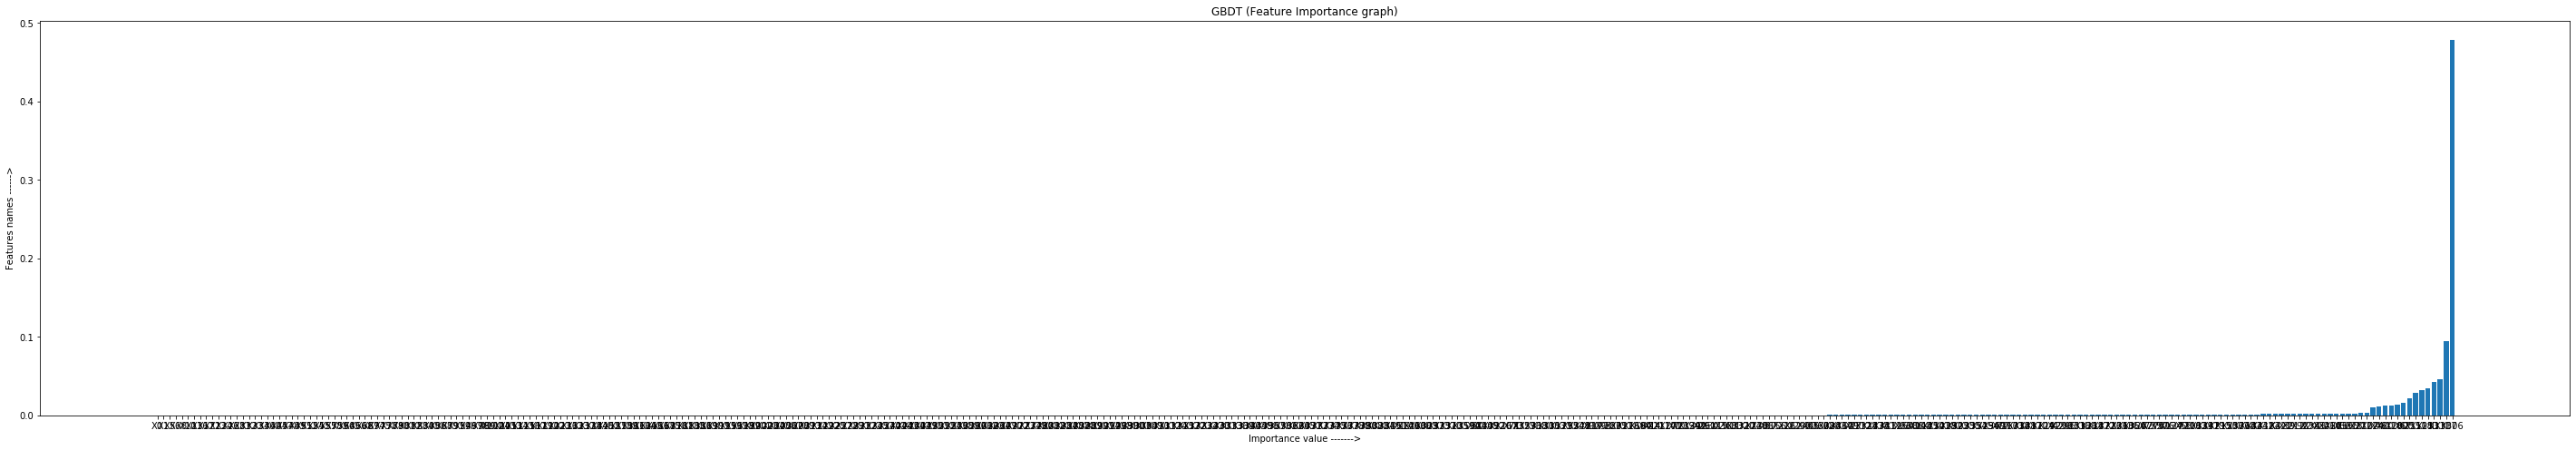

GBDT Features : ['X151', 'X19', 'X140', 'X266', 'X100', 'X363', 'X297', 'X325', 'X337', 'X370', 'X135', 'X353', 'X194', 'X30', 'X344', 'X109', 'X352', 'X220', 'X167', 'X71', 'X3', 'X359', 'X276', 'X338', 'X130', 'X335', 'X103', 'X171', 'X295', 'X334', 'X248', 'X221', 'X90', 'X177', 'X93', 'X187', 'X201', 'X351', 'X278', 'X169', 'X184', 'X41', 'X14', 'X211', 'X127', 'X101', 'X70', 'X239', 'X139', 'X242', 'X29', 'X61', 'X302', 'X15', 'X368', 'X11', 'X332', 'X320', 'X174', 'X233', 'X286', 'X37', 'X156', 'X22', 'X12', 'X62', 'X293', 'X44', 'X35', 'X366', 'X308', 'X226', 'X243', 'X360', 'X179', 'X27', 'X112', 'X328', 'X143', 'X178', 'X341', 'X131', 'X125', 'X63', 'X60', 'X88', 'X148', 'X145', 'X230', 'X141', 'X238', 'X292', 'X305', 'X223', 'X355', 'X354', 'X329', 'X154', 'X369', 'X77', 'X160', 'X173', 'X318', 'X348', 'X217', 'X170', 'X124', 'X192', 'X42', 'X236', 'X95', 'X153', 'X316', 'X136', 'X218', 'X147', 'X172', 'X216', 'X326', 'X313', 'X106', 'X350', 'X267', 'X73', 'X275', 'X50', 'X76

In [63]:
zipped = zip(train.columns.to_list(),list(GBDT_model.feature_importances_))
# Using sorted and lambda 
res = sorted(zipped, key = lambda x: x[1]) 
res_GBDT= []
for i in res:
    if(i[1] > 0 or i[1] < 0):
        res_GBDT.append(i)
plt.figure(figsize=(50,8))
plt.title("GBDT (Feature Importance graph)")
plt.bar([i[0] for i in res],[i[1] for i in res])
plt.xlabel("Importance value ------->")
plt.ylabel("Features names ------>")
plt.show()

print(f"GBDT Features : {[i[0] for i in res_GBDT] }" )

<!DOCTYPE html>
<html>
<head>
<style>
table {
  font-family: arial, sans-serif;
  border-collapse: collapse;
  width: 100%;
}

td, th {
  border: 1px solid #dddddd;
  text-align: left;
  padding: 8px;
}

tr:nth-child(even) {
  background-color: #dddddd;
}
</style>
</head>
<body>
<h4><center>MODEL SUMMARY</center></h4>
<h4><center>ATTEMPT 1</center></h4>

<table>
 <tr>
    <th>SN0</th>
    <th>Model</th>
    <th>Encoding</th>
    <th>Imputation</th>
    <th>Hyperparameter</th>
    <th>R^2 Loss</th>
    <th>RMSE</th>
    <th>KAGGLE PRIVATE SCORE</th>  
  </tr>
  <tr>
    <td>1.</td>
    <td>LASSO REGRESSION MODEL</td>
    <td>LABEL ENCODING</td>
    <td>ABOVE 150 SEC VALUES IMPUTED WITH 100</td>
    <td>ALPHA = .6</td>
    <td>0.58</td> 
    <td>7.761</td>
    <td>0.51926</td>  
  </tr>
   <tr>
    <td>2.</td>
    <td>RIDGE REGRESSION MODEL</td>
    <td>LABEL ENCODING</td>
    <td>ABOVE 150 SEC VALUES IMPUTED WITH 100</td>
    <td>ALPHA = .2</td>
    <td>0.632</td> 
    <td>7.25</td>  
    <td>-14.88253</td>     
  </tr>  
  <tr>
    <td>3.</td>
    <td>ELASTICNET MODEL</td>
    <td>LABEL ENCODING</td>
    <td>ABOVE 150 SEC VALUES IMPUTED WITH 100</td>
    <td>ALPHA = .9</td>
    <td> 0.58</td> 
    <td>7.70</td>
    <td>0.51776</td>  
  </tr> 
  <tr>
    <td>4.</td>
    <td>LASSOLARS MODEL</td>
    <td>LABEL ENCODING</td>
    <td>ABOVE 150 SEC VALUES IMPUTED WITH 100</td>
    <td>Normalize = TRUE</td>
    <td>0.60</td> 
    <td >7.576</td> 
    <td>0.523</td>   
  </tr>  
    <td>5.</td>
    <td>DECISIONTREE MODEL</td>
    <td>LABEL ENCODING</td>
    <td>ABOVE 150 SEC VALUES IMPUTED WITH 100</td>
    <td>Multi-Parameters</td>
    <td>0.645</td> 
    <td>7.128</td> 
    <td>.53772</td> 
  </tr>
  
   <tr>  
    <td>6.</td>
    <td>SVR MODEL</td>
    <td>LABEL ENCODING</td>
    <td>ABOVE 150 SEC VALUES IMPUTED WITH 100</td>
    <td>C value : 1</td>
    <td>.52</td> 
    <td>8.24</td> 
    <td>No</td> 
  </tr>
  
  <tr>  
    <td>7.</td>
    <td>XGBOOST</td>
    <td>LABEL ENCODING</td>
    <td>ABOVE 150 SEC VALUES IMPUTED WITH 100</td>
    <td>Mupliple parameters </td>
    <td>.65</td> 
    <td>7.01</td> 
    <td>.54901</td> 
  </tr>
  
  <tr>  
    <td>7.</td>
    <td>GBDT</td>
    <td>LABEL ENCODING</td>
    <td>ABOVE 150 SEC VALUES IMPUTED WITH 100</td>
    <td>Multiple Parameters: </td>
    <td>0.6363</td> 
    <td>7.32</td> 
    <td>.54901</td> 
  </tr>

</table>

<h4><center>ATTEMPT 2</center></h4>
<table>
 <tr>
    <th>SN0</th>
    <th>Model</th>
    <th>Encoding</th>
    <th>Imputation</th>
    <th>Hyperparameter</th>
    <th>R^2 Loss</th>
    <th>RMSE</th>
    <th>KAGGLE PRIVATE SCORE</th>  
  </tr>
   <tr>
    <td>8.</td>
    <td>LASSO REGRESSION MODEL</td>
    <td>LABEL ENCODING</td>
    <td>REMOVED 12 UNIMPORTANT FEATURES FROM THE DATASET </td>
    <td>ALPHA = .9</td>
    <td>0.58</td> 
    <td>7.761</td>
    <td>0.51926</td>  
  </tr>  
</table>

<h4><center>ATTEMPT 3</center></h4>
<table>
 <tr>
    <th>SN0</th>
    <th>Model</th>
    <th>Encoding</th>
    <th>Imputation</th>
    <th>Hyperparameter</th>
    <th>R^2 Loss</th>
    <th>RMSE</th>
    <th>KAGGLE PRIVATE SCORE</th>  
  </tr>
  <tr>
    <td>9.</td>
    <td>LASSO REGRESSION MODEL</td>
    <td>LABEL ENCODING</td>
    <td>iMPUTED 265.32 ONLY WITH 100 </td>
    <td>ALPHA = .9</td>
    <td>0.553</td> 
    <td>8.29</td>
    <td>0.52224</td>  
   </tr> 
   <tr>
    <td>10.</td>
    <td>RIDGE REGRESSION MODEL</td>
    <td>LABEL ENCODING</td>
    <td>iMPUTED 265.32 ONLY WITH 100 </td>
    <td>ALPHA = 400</td>
    <td>0.031</td> 
    <td>12.22</td>
    <td>0.12</td>   
  </tr>
  <tr>
    <td>11.</td>
    <td>ELASTICNET REGRESSION MODEL</td>
    <td>LABEL ENCODING</td>
    <td>iMPUTED 265.32 ONLY WITH 100 </td>
    <td>ALPHA = .7</td>
    <td>0.573</td> 
    <td>8.10</td>
    <td>.52685</td>   
  </tr> 
  <tr>
    <td>12.</td>
    <td>LASSOLARS  MODEL</td>
    <td>LABEL ENCODING</td>
    <td>iMPUTED 265.32 ONLY WITH 100 </td>
    <td>NORMALIZE = TRUE</td>
    <td>0.555</td> 
    <td>8.28</td>
    <td>.5173</td>   
  </tr>
  <tr>
    <td>13.</td>
    <td>DECISIONTREE REGRESSOR  MODEL</td>
    <td>LABEL ENCODING</td>
    <td>iMPUTED 265.32 ONLY WITH 100 </td>
    <td>MultiHyperparameters</td>
    <td>0.60</td> 
    <td>7.86</td>
    <td>.54353</td>   
  </tr>
  <tr>
    <td>14.</td>
    <td>SVR MODEL</td>
    <td>LABEL ENCODING</td>
    <td>iMPUTED 265.32 ONLY WITH 100 </td>
    <td>C Value : 1</td>
    <td>8.80</td> 
    <td>.495</td>
    <td>No</td>   
  </tr>
  <tr>
    <td>15.</td>
    <td>XGBOOST MODEL</td>
    <td>LABEL ENCODING</td>
    <td>iMPUTED 265.32 ONLY WITH 100 </td>
    <td>MultiHyperparameters</td>
    <td>--</td> 
    <td>--</td>
    <td>--</td>   
  </tr>
    <tr>
    <td>16.</td>
    <td>GBDT MODEL</td>
    <td>LABEL ENCODING</td>
    <td>iMPUTED 265.32 ONLY WITH 100 </td>
    <td>MultiHyperparameters</td>
    <td>--</td> 
    <td>.62</td>
    <td>.53003</td>   
  </tr>
</table>

<h4><center>ATTEMPT 4</center></h4>
<table>
 <tr>
    <th>SN0</th>
    <th>Model</th>
    <th>Encoding</th>
    <th>Imputation</th>
    <th>Hyperparameter</th>
    <th>R^2 Loss</th>
    <th>RMSE</th>
    <th>KAGGLE PRIVATE SCORE</th>  
  </tr>
 <tr>
    <td>16.</td>
    <td>LASSO REGRESSION  MODEL</td>
    <td>LABEL ENCODING</td>
    <td>iMPUTED 265.32 ONLY WITH 130 </td>
    <td>ALPHA = .9</td>
    <td>.5521</td> 
    <td>8.31</td>
    <td>0.52215</td>   
  </tr>
  <tr>
    <td>17.</td>
    <td>RIDGE REGRESSION  MODEL</td>
    <td>LABEL ENCODING</td>
    <td>iMPUTED 265.32 ONLY WITH 130 </td>
    <td>ALPHA = 400</td>
    <td>0.031</td> 
    <td>12.23</td>
    <td>-</td>   
  </tr>
<tr>
    <td>7.</td>
    <td>ELASTICNET REGRESSION  MODEL</td>
    <td>LABEL ENCODING</td>
    <td>iMPUTED 265.32 ONLY WITH 130 </td>
    <td>ALPHA = .7</td>
    <td>0.572</td> 
    <td>8.12</td>
    <td>.52693-</td>   
  </tr>
   <tr>
    <td>18.</td>
    <td>LASSOLARS MODEL</td>
    <td>LABEL ENCODING</td>
    <td>iMPUTED 265.32 ONLY WITH 130 </td>
    <td>ALPHA = .7</td>
    <td>0.59</td> 
    <td>8.104</td>
    <td>.53496-</td>   
  </tr>
   <tr>
    <td>19.</td>
    <td>DECISIONTREE REGRESSOR  MODEL</td>
    <td>LABEL ENCODING</td>
    <td>iMPUTED 265.32 ONLY WITH 130 </td>
    <td>Mutli-Parameters</td>
    <td>0.60</td> 
    <td>7.86</td>
    <td>.54356</td>   
  </tr>
   <tr>
    <td>20.</td>
    <td>SVR MODEL</td>
    <td>LABEL ENCODING</td>
    <td>iMPUTED 265.32 ONLY WITH 130 </td>
    <td>C = .7</td>
    <td>0.49</td> 
    <td>8.8</td>
    <td>.42905-</td>   
  </tr>
   <tr>
    <td>21.</td>
    <td>GBDT MODEL</td>
    <td>LABEL ENCODING</td>
    <td>iMPUTED 265.32 ONLY WITH 130 </td>
    <td>Multiple parameters</td>
    <td>.5921</td> 
    <td>8.01</td>
    <td>.5421-</td>   
  </tr>
 
</body>
</html>


<img src = "https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcQmpsaHLkv3d85Eamq-zGl2K2cA4d3xptRbr4XGZ79R9pl6sn2n"
width="60" height="34">
<h1><center>Attempt 5.</center></h1>
<font face="verdana" color="006400"><b><u>My Thought Process:</u> I want to  select that model which on hyperparameter tuning gets as closed result on test data also so that, our model will not behave badly on test data
i.e Train loss as close as possible with test loss.</b></font>

<font face="verdana" color="red"><b>NOTE :  Now eveything in blue is used in the subsequent model, we will check one by one all our analsys and will see the performance for eg: below we are using onnly 1.1 and 2.2 in the model,
    From abpve analysis i can see that Y imputstion with 130 is giving me goof result from now on i will continue with that imputation only.</b></font>

<font face="verdana" color="006400"><b>1. Y imputation</b></font>

<font face="verdana" color="blue"><b><pre>1.4 Removing only 265.32 y values with somwe other values other than 100 approx</pre>
</b></font>

<font face="verdana" color="006400"><b>2. Feature engineering</b></font>

<pre>2.1 For catagorical values use label encoding </pre>
<font face="verdana" color="blue"><b><pre>2.2 For catagorical values use one hot encoding encoding </pre></b></font>
<pre>2.3 Remove ID and use best of the above encoding and see the performance, as ID as per the business problem may have some hidden sequencing information or may be not, we have to see.</pre>
<pre>2.4 I will fetch the best features by using all well known feture decompostiiton algorithm PCA,TSVD etc..</pre>
<pre>2.4 Concatenate orignal features with decomposed features.</pre>


<font face="verdana" color="red"><b>NOTE : I will not be using SVR(RGF) anymore as it is not giving good result</b></font>

<h4>5.1.1 Linear Regression with LASSO</h4>

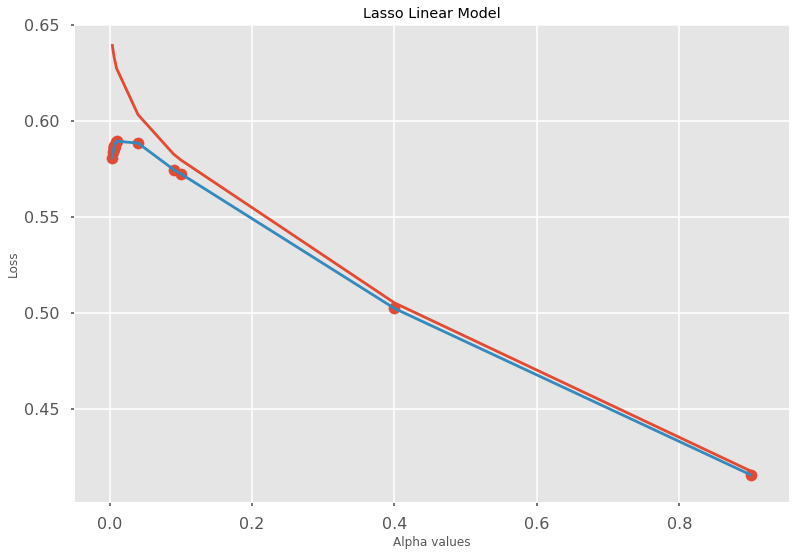

In [175]:
alpha = [.004,.005,.006,.0062,.0065,.0067,.0069,.007,.009,.01,.04,.09,.1,.4,.9] 
plot = Lasso_regression(alpha)
plot.show()

In [176]:
linear_clf = Lasso(alpha=.09, fit_intercept=True, normalize=False,random_state=23) 
linear_clf.fit(scaled_train,actual_y)
r_square = r2_score(actual_y,linear_clf.predict(scaled_train))
RMSE = mean_squared_error(actual_y,linear_clf.predict(scaled_train),squared=False)
print(f"R_square for train data is : {r_square}")
print(f"RMSE for train data is : {RMSE}")

# lET'S FIND THE KAGGLE SCORE.
sub = pd.DataFrame()
sub['ID'] = test['ID']
sub['y'] = linear_clf.predict(scaled_test)
sub.to_csv('submission_Final.csv', index=False)

R_square for train data is : 0.5814969988574878
RMSE for train data is : 8.040828684609442


<h4>5.1.2 Linear Regression with Ridge</h4>

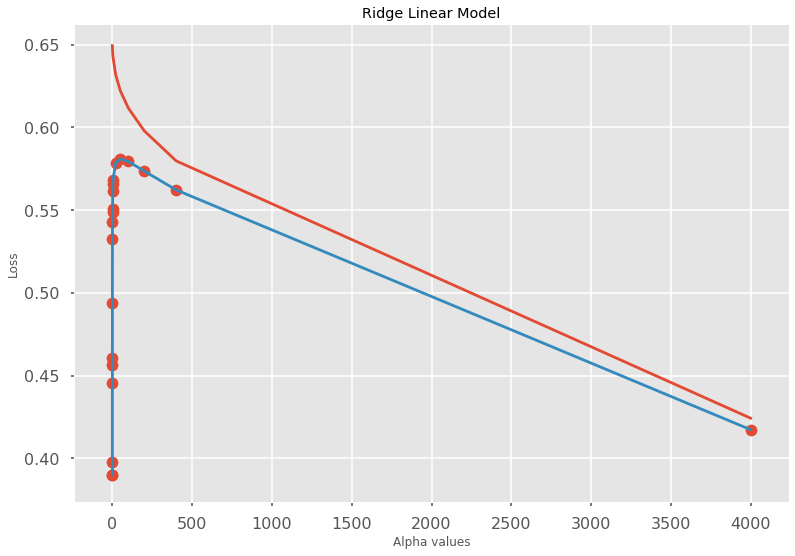

In [177]:
alpha = [.000001,.00001,.007,.07,.09,.1,.2,.5,.7,.9,1,2,3,4,20,50,100,200,400,4000] 
plot = Ridge_regression(alpha)
plot.show()

In [181]:
linear_clf = Ridge(alpha=400, fit_intercept=True, normalize=True, max_iter=100,\
                            random_state=23) 
linear_clf.fit(train,actual_y)
r_square = r2_score(actual_y,linear_clf.predict(train))
RMSE = mean_squared_error(actual_y,linear_clf.predict(train),squared=False)
print(f"R_square for train data is : {r_square}")
print(f"RMSE for train data is : {RMSE}")

# lET'S FIND THE KAGGLE SCORE.
sub = pd.DataFrame()
sub['ID'] = test['ID']
sub['y'] = linear_clf.predict(scaled_test)
sub.to_csv('submission_Final.csv', index=False)

R_square for train data is : 0.03587298013719831
RMSE for train data is : 12.204462239411164


<h4>5.1.3 Linear Regression with Elsatic net</h4>

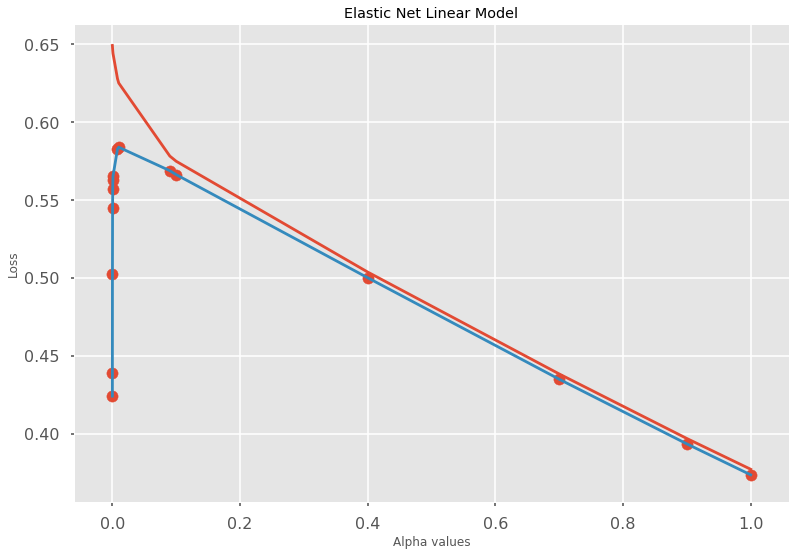

In [182]:
alpha = [.0000001,.00001,.0001,.0003,.0005,.0008,.001,.008,.01,.09,.1,.4,.7,.9,1] 
plot = Elastic_Net(alpha)
plot.show()

In [184]:
linear_clf = ElasticNet(alpha=.09, fit_intercept=True, normalize=False, max_iter=100,\
                            random_state=23) 
linear_clf.fit(scaled_train,actual_y)
r_square = r2_score(actual_y,linear_clf.predict(scaled_train))
RMSE = mean_squared_error(actual_y,linear_clf.predict(scaled_train),squared=False)
print(f"R_square for train data is : {r_square}")
print(f"RMSE for train data is : {RMSE}")

# lET'S FIND THE KAGGLE SCORE.
sub = pd.DataFrame()
sub['ID'] = test['ID']
sub['y'] = linear_clf.predict(scaled_test)
sub.to_csv('submission_Final.csv', index=False)

R_square for train data is : 0.5773028047374413
RMSE for train data is : 8.081020416162238


<h4>5.1.4 Linear Regression with LARSLasso</h4>

In [186]:
#https://www.quora.com/What-is-Least-Angle-Regression-and-when-should-it-be-used
# not much hyperparametertuning involved in it.

LassoLars = LassoLarsCV(normalize=True,cv=5)
LassoLars.fit(scaled_train,actual_y)
r_square = r2_score(actual_y,LassoLars.predict(scaled_train))
RMSE = mean_squared_error(actual_y,LassoLars.predict(scaled_train),squared=False)
print(f"R_square for train data is : {r_square}")
print(f"RMSE for train data is : {RMSE}")

# lET'S FIND THE KAGGLE SCORE.
sub = pd.DataFrame()
sub['ID'] = test['ID']
sub['y'] = LassoLars.predict(scaled_test)
sub.to_csv('submission_Final.csv', index=False)

R_square for train data is : 0.5668932539134959
RMSE for train data is : 8.17991884770895


<h4>5.1.5 Decision tree</h4>

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   44.9s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  2.9min finished


params no 0 : {'min_samples_split': 9, 'max_leaf_nodes': 15, 'max_depth': 10, 'criterion': 'mae'} test score : [0.5708724192894354]
params no 1 : {'min_samples_split': 7, 'max_leaf_nodes': 500, 'max_depth': 9, 'criterion': 'mae'} test score : [0.5708724192894354, 0.5312071091610512]
params no 2 : {'min_samples_split': 2, 'max_leaf_nodes': 30, 'max_depth': 9, 'criterion': 'friedman_mse'} test score : [0.5708724192894354, 0.5312071091610512, 0.5627087949255974]
params no 3 : {'min_samples_split': 5, 'max_leaf_nodes': 300, 'max_depth': 7, 'criterion': 'mae'} test score : [0.5708724192894354, 0.5312071091610512, 0.5627087949255974, 0.5541821465567455]
params no 4 : {'min_samples_split': 4, 'max_leaf_nodes': 100, 'max_depth': 9, 'criterion': 'mae'} test score : [0.5708724192894354, 0.5312071091610512, 0.5627087949255974, 0.5541821465567455, 0.5325202957046534]
params no 5 : {'min_samples_split': 5, 'max_leaf_nodes': 50, 'max_depth': 3, 'criterion': 'friedman_mse'} test score : [0.5708724192

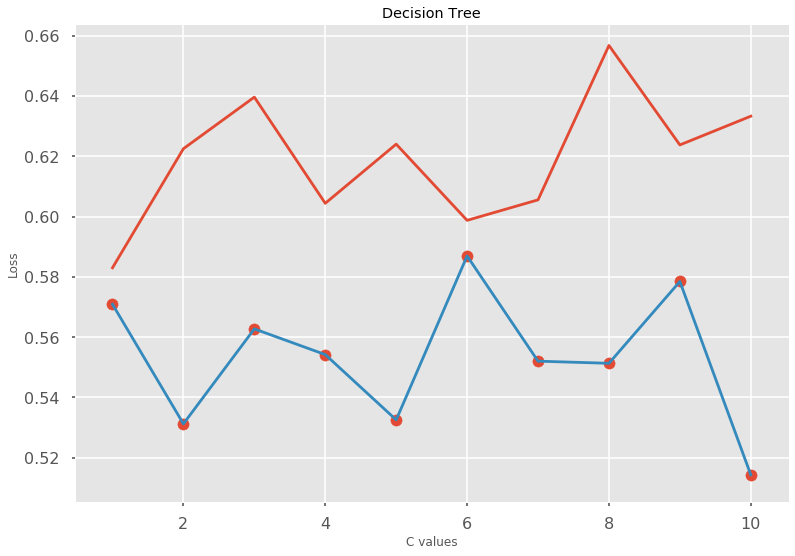

In [196]:
a = decision_tree()
plt = a[0]
Decsion_clf = a[1]
plt.show()

In [198]:
print("Our best score is : ",Decsion_clf.best_score_)
print("Our best estimator : ",Decsion_clf.best_estimator_)	

 #lET'S FIND THE KAGGLE SCORE.
DECISONTREE = Decsion_clf.best_estimator_
decision_classfier = best_decison_tree(DECISONTREE)
sub = pd.DataFrame()
sub['ID'] = test['ID']
sub['y'] = decision_classfier.predict(scaled_test)
sub.to_csv('submission_Final.csv', index=False)

Our best score is :  0.5869005012343049
Our best estimator :  DecisionTreeRegressor(ccp_alpha=0.0, criterion='friedman_mse', max_depth=3,
                      max_features=None, max_leaf_nodes=50,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=5,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=2, splitter='best')
R_square for train data is : 0.5981000869722463
RMSE for train data is : 7.879714404147235


<h4>5.1.6 XGBOOST</h4>

In [ ]:
XGBOOST_Tuning(scaled_train,scaled_test)

Parameters are :(3, 100, 0.001, 0.93)
Total iteration :24
Total iteration remaining :24
##############################################################################################################
[01:56:46] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:56:47] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:56:47] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:56:47] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:56:47] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of

[357]	train-rmse:70.7968+0.086065	test-rmse:70.7966+0.339162
[360]	train-rmse:70.5876+0.0857866	test-rmse:70.5874+0.33811
[363]	train-rmse:70.3791+0.085533	test-rmse:70.3789+0.337032
[366]	train-rmse:70.1712+0.0853057	test-rmse:70.171+0.335945
[369]	train-rmse:69.9639+0.0850381	test-rmse:69.9638+0.334902
[372]	train-rmse:69.7573+0.0847241	test-rmse:69.7571+0.333918
[375]	train-rmse:69.5513+0.0844187	test-rmse:69.5511+0.332926
[378]	train-rmse:69.3459+0.0841472	test-rmse:69.3458+0.331907
[381]	train-rmse:69.1412+0.0839155	test-rmse:69.141+0.330854
[384]	train-rmse:68.937+0.0837215	test-rmse:68.9369+0.32977
[387]	train-rmse:68.7336+0.0833866	test-rmse:68.7334+0.328837
[390]	train-rmse:68.5306+0.0831721	test-rmse:68.5305+0.327789
[393]	train-rmse:68.3283+0.0829394	test-rmse:68.3282+0.326751
[396]	train-rmse:68.1267+0.0826765	test-rmse:68.1266+0.32575
[399]	train-rmse:67.9256+0.08241	test-rmse:67.9255+0.32477
[402]	train-rmse:67.7251+0.082149	test-rmse:67.7251+0.323772
[405]	train-rmse:67.

[759]	train-rmse:47.7503+0.0565449	test-rmse:47.7522+0.232548
[762]	train-rmse:47.6115+0.0563566	test-rmse:47.6134+0.232031
[765]	train-rmse:47.4729+0.0562469	test-rmse:47.4748+0.231422
[768]	train-rmse:47.3349+0.0561131	test-rmse:47.3368+0.230853
[771]	train-rmse:47.1973+0.0559484	test-rmse:47.1992+0.230321
[774]	train-rmse:47.0601+0.0558024	test-rmse:47.062+0.229765
[777]	train-rmse:46.9233+0.0556242	test-rmse:46.9253+0.229274
[780]	train-rmse:46.787+0.0553988	test-rmse:46.789+0.228823
[783]	train-rmse:46.6511+0.0552312	test-rmse:46.6531+0.228342
[786]	train-rmse:46.5155+0.0550419	test-rmse:46.5176+0.227839
[789]	train-rmse:46.3804+0.054922	test-rmse:46.3825+0.227304
[792]	train-rmse:46.2457+0.0547924	test-rmse:46.2478+0.226763
[795]	train-rmse:46.1115+0.0546849	test-rmse:46.1136+0.226231
[798]	train-rmse:45.9776+0.0544862	test-rmse:45.9797+0.225737
[801]	train-rmse:45.8442+0.0542989	test-rmse:45.8464+0.225236
[804]	train-rmse:45.7112+0.0541592	test-rmse:45.7133+0.224725
[807]	train-

[1158]	train-rmse:32.5925+0.0370827	test-rmse:32.597+0.191489
[1161]	train-rmse:32.5008+0.0369721	test-rmse:32.5053+0.191425
[1164]	train-rmse:32.4094+0.036836	test-rmse:32.4139+0.191293
[1167]	train-rmse:32.3182+0.036723	test-rmse:32.3228+0.191227
[1170]	train-rmse:32.2274+0.0365932	test-rmse:32.2321+0.191125
[1173]	train-rmse:32.1368+0.0364675	test-rmse:32.1415+0.191045
[1176]	train-rmse:32.0466+0.0363183	test-rmse:32.0513+0.190958
[1179]	train-rmse:31.9566+0.0362347	test-rmse:31.9614+0.190838
[1182]	train-rmse:31.8669+0.0361017	test-rmse:31.8717+0.190765
[1185]	train-rmse:31.7775+0.0359774	test-rmse:31.7823+0.190687
[1188]	train-rmse:31.6883+0.035853	test-rmse:31.6932+0.19061
[1191]	train-rmse:31.5995+0.0357694	test-rmse:31.6044+0.19051
[1194]	train-rmse:31.5109+0.0356549	test-rmse:31.5158+0.190465
[1197]	train-rmse:31.4226+0.0355309	test-rmse:31.4276+0.190376
[1200]	train-rmse:31.3346+0.0354262	test-rmse:31.3396+0.190279
[1203]	train-rmse:31.2468+0.0352587	test-rmse:31.2519+0.19024

[1551]	train-rmse:22.775+0.0255094	test-rmse:22.7859+0.19202
[1554]	train-rmse:22.7151+0.0255068	test-rmse:22.7262+0.192034
[1557]	train-rmse:22.6554+0.0254974	test-rmse:22.6666+0.192057
[1560]	train-rmse:22.5959+0.025449	test-rmse:22.6072+0.192068
[1563]	train-rmse:22.5366+0.0254543	test-rmse:22.548+0.192095
[1566]	train-rmse:22.4774+0.0254219	test-rmse:22.4889+0.192182
[1569]	train-rmse:22.4185+0.0253756	test-rmse:22.43+0.192303
[1572]	train-rmse:22.3598+0.0253282	test-rmse:22.3714+0.192345
[1575]	train-rmse:22.3012+0.0252384	test-rmse:22.3129+0.192402
[1578]	train-rmse:22.2429+0.0251694	test-rmse:22.2547+0.192519
[1581]	train-rmse:22.1848+0.0251872	test-rmse:22.1967+0.192489
[1584]	train-rmse:22.1269+0.0251402	test-rmse:22.1388+0.192575
[1587]	train-rmse:22.0691+0.0251141	test-rmse:22.0811+0.192559
[1590]	train-rmse:22.0115+0.0250551	test-rmse:22.0236+0.192663
[1593]	train-rmse:21.9542+0.025007	test-rmse:21.9664+0.192668
[1596]	train-rmse:21.897+0.0249456	test-rmse:21.9094+0.192772


[195]	train-rmse:83.0864+0.101884	test-rmse:83.0856+0.402636
[198]	train-rmse:82.84+0.101555	test-rmse:82.8393+0.401348
[201]	train-rmse:82.5944+0.101261	test-rmse:82.5937+0.400032
[204]	train-rmse:82.3495+0.100937	test-rmse:82.3488+0.398761
[207]	train-rmse:82.1054+0.100641	test-rmse:82.1047+0.397449
[210]	train-rmse:81.862+0.100343	test-rmse:81.8613+0.39615
[213]	train-rmse:81.6194+0.100074	test-rmse:81.6187+0.39483
[216]	train-rmse:81.3775+0.0997605	test-rmse:81.3768+0.393574
[219]	train-rmse:81.1363+0.0994112	test-rmse:81.1356+0.392344
[222]	train-rmse:80.8958+0.0991025	test-rmse:80.8952+0.39109
[225]	train-rmse:80.6561+0.0988012	test-rmse:80.6555+0.389831
[228]	train-rmse:80.4171+0.0984881	test-rmse:80.4165+0.388585
[231]	train-rmse:80.1788+0.0981671	test-rmse:80.1782+0.387354
[234]	train-rmse:79.9413+0.0978516	test-rmse:79.9407+0.386134
[237]	train-rmse:79.7044+0.0975567	test-rmse:79.7038+0.384888
[240]	train-rmse:79.4683+0.0973082	test-rmse:79.4677+0.383604
[243]	train-rmse:79.2

[597]	train-rmse:55.9204+0.0670248	test-rmse:55.9213+0.26702
[600]	train-rmse:55.7564+0.0668206	test-rmse:55.7574+0.266284
[603]	train-rmse:55.593+0.0666099	test-rmse:55.594+0.265558
[606]	train-rmse:55.4301+0.0664191	test-rmse:55.4311+0.264816
[609]	train-rmse:55.2677+0.0661947	test-rmse:55.2687+0.264095
[612]	train-rmse:55.1057+0.0659331	test-rmse:55.1068+0.263431
[615]	train-rmse:54.9443+0.0657259	test-rmse:54.9453+0.262734
[618]	train-rmse:54.7833+0.065483	test-rmse:54.7844+0.262014
[621]	train-rmse:54.6229+0.0652999	test-rmse:54.6239+0.26128
[624]	train-rmse:54.463+0.0650861	test-rmse:54.4641+0.260562
[627]	train-rmse:54.3035+0.064874	test-rmse:54.3046+0.259894
[630]	train-rmse:54.1445+0.0646799	test-rmse:54.1457+0.259181
[633]	train-rmse:53.986+0.0644587	test-rmse:53.9872+0.258493
[636]	train-rmse:53.828+0.0642033	test-rmse:53.8291+0.257816
[639]	train-rmse:53.6705+0.0640178	test-rmse:53.6716+0.257105
[642]	train-rmse:53.5134+0.0638577	test-rmse:53.5146+0.256393
[645]	train-rmse:

[999]	train-rmse:37.8903+0.043764	test-rmse:37.8937+0.201015
[1002]	train-rmse:37.7819+0.0436266	test-rmse:37.7853+0.200741
[1005]	train-rmse:37.6739+0.0434997	test-rmse:37.6772+0.200479
[1008]	train-rmse:37.5661+0.0433708	test-rmse:37.5695+0.200205
[1011]	train-rmse:37.4588+0.0432383	test-rmse:37.4622+0.199939
[1014]	train-rmse:37.3518+0.0430705	test-rmse:37.3552+0.199687
[1017]	train-rmse:37.2451+0.0429196	test-rmse:37.2485+0.199468
[1020]	train-rmse:37.1387+0.042784	test-rmse:37.1421+0.199228
[1023]	train-rmse:37.0327+0.0425939	test-rmse:37.0362+0.199022
[1026]	train-rmse:36.927+0.0424759	test-rmse:36.9304+0.198772
[1029]	train-rmse:36.8216+0.0423483	test-rmse:36.8251+0.198502
[1032]	train-rmse:36.7166+0.0422374	test-rmse:36.7201+0.198281
[1035]	train-rmse:36.6119+0.0421199	test-rmse:36.6155+0.198037
[1038]	train-rmse:36.5076+0.0419491	test-rmse:36.5111+0.197838
[1041]	train-rmse:36.4035+0.0418193	test-rmse:36.4071+0.197602
[1044]	train-rmse:36.2998+0.0416911	test-rmse:36.3034+0.197

[1392]	train-rmse:26.2504+0.0292912	test-rmse:26.2576+0.189631
[1395]	train-rmse:26.179+0.0292203	test-rmse:26.1863+0.189585
[1398]	train-rmse:26.1078+0.0291075	test-rmse:26.1152+0.18964
[1401]	train-rmse:26.0369+0.028995	test-rmse:26.0444+0.189717
[1404]	train-rmse:25.9662+0.0289104	test-rmse:25.9737+0.189808
[1407]	train-rmse:25.8958+0.028826	test-rmse:25.9034+0.189834
[1410]	train-rmse:25.8256+0.0287669	test-rmse:25.8332+0.18986
[1413]	train-rmse:25.7557+0.0286481	test-rmse:25.7633+0.189894
[1416]	train-rmse:25.6859+0.0285569	test-rmse:25.6937+0.189931
[1419]	train-rmse:25.6164+0.0284829	test-rmse:25.6242+0.189939
[1422]	train-rmse:25.5471+0.0283826	test-rmse:25.5549+0.190039
[1425]	train-rmse:25.478+0.0283048	test-rmse:25.4859+0.190047
[1428]	train-rmse:25.4092+0.0282417	test-rmse:25.4171+0.190073
[1431]	train-rmse:25.3405+0.028143	test-rmse:25.3486+0.190117
[1434]	train-rmse:25.2722+0.0280659	test-rmse:25.2803+0.19011
[1437]	train-rmse:25.204+0.0280109	test-rmse:25.2122+0.190166
[

[30]	train-rmse:87.8463+0.10797	test-rmse:87.8453+0.428
[33]	train-rmse:86.6772+0.106446	test-rmse:86.6762+0.421759
[36]	train-rmse:85.524+0.10489	test-rmse:85.5231+0.415713
[39]	train-rmse:84.3866+0.103327	test-rmse:84.3857+0.40978
[42]	train-rmse:83.2643+0.101896	test-rmse:83.2635+0.403829
[45]	train-rmse:82.1572+0.100252	test-rmse:82.1565+0.398224
[48]	train-rmse:81.0652+0.0988277	test-rmse:81.0646+0.392519
[51]	train-rmse:79.988+0.0974041	test-rmse:79.9873+0.386896
[54]	train-rmse:78.9255+0.0959882	test-rmse:78.9249+0.381433
[57]	train-rmse:77.8773+0.0946073	test-rmse:77.8767+0.376007
[60]	train-rmse:76.8431+0.0932349	test-rmse:76.8426+0.370721
[63]	train-rmse:75.8234+0.0919949	test-rmse:75.8229+0.365423
[66]	train-rmse:74.817+0.0907851	test-rmse:74.8166+0.360133
[69]	train-rmse:73.8245+0.0893526	test-rmse:73.8241+0.355216
[72]	train-rmse:72.8454+0.0880884	test-rmse:72.8451+0.350252
[75]	train-rmse:71.8795+0.0868826	test-rmse:71.8792+0.34526
[78]	train-rmse:70.9272+0.085748	test-rm

[432]	train-rmse:16.353+0.0241815	test-rmse:16.3798+0.202569
[435]	train-rmse:16.1843+0.0242861	test-rmse:16.212+0.203137
[438]	train-rmse:16.0185+0.0246651	test-rmse:16.0469+0.203544
[441]	train-rmse:15.8553+0.0249275	test-rmse:15.8843+0.204189
[444]	train-rmse:15.695+0.0249749	test-rmse:15.7244+0.204731
[447]	train-rmse:15.5371+0.0250488	test-rmse:15.5672+0.205295
[450]	train-rmse:15.3818+0.0250657	test-rmse:15.4129+0.205844
[453]	train-rmse:15.2291+0.025172	test-rmse:15.261+0.206499
[456]	train-rmse:15.0791+0.0254968	test-rmse:15.1116+0.206737
[459]	train-rmse:14.9315+0.0255958	test-rmse:14.9648+0.20711
[462]	train-rmse:14.7866+0.0256834	test-rmse:14.8207+0.207634
[465]	train-rmse:14.6443+0.0260014	test-rmse:14.679+0.208122
[468]	train-rmse:14.5044+0.0262972	test-rmse:14.54+0.208383
[471]	train-rmse:14.3666+0.0266751	test-rmse:14.4028+0.208775
[474]	train-rmse:14.2313+0.0267214	test-rmse:14.2684+0.209382
[477]	train-rmse:14.0984+0.027023	test-rmse:14.1365+0.209727
[480]	train-rmse:1

[834]	train-rmse:8.05555+0.0525179	test-rmse:8.24873+0.228171
[837]	train-rmse:8.04518+0.0525542	test-rmse:8.23971+0.228174
[840]	train-rmse:8.03524+0.0527759	test-rmse:8.23098+0.228087
[843]	train-rmse:8.02556+0.0529242	test-rmse:8.22255+0.228106
[846]	train-rmse:8.0159+0.0527029	test-rmse:8.21429+0.228143
[849]	train-rmse:8.00649+0.0527101	test-rmse:8.20628+0.22786
[852]	train-rmse:7.99712+0.0528291	test-rmse:8.19826+0.227765
[855]	train-rmse:7.98799+0.052859	test-rmse:8.19058+0.227651
[858]	train-rmse:7.97919+0.0528978	test-rmse:8.18307+0.227352
[861]	train-rmse:7.97054+0.0529338	test-rmse:8.17582+0.227407
[864]	train-rmse:7.96225+0.0530458	test-rmse:8.16873+0.227317
[867]	train-rmse:7.95403+0.0531161	test-rmse:8.1619+0.227268
[870]	train-rmse:7.94596+0.0529822	test-rmse:8.15505+0.227373
[873]	train-rmse:7.9382+0.052925	test-rmse:8.14853+0.227163
[876]	train-rmse:7.9306+0.0529883	test-rmse:8.14203+0.226924
[879]	train-rmse:7.92298+0.0532202	test-rmse:8.13575+0.226642
[882]	train-rms

[1230]	train-rmse:7.57243+0.0572413	test-rmse:7.91992+0.220965
[1233]	train-rmse:7.57102+0.0572649	test-rmse:7.91966+0.220732
[1236]	train-rmse:7.56999+0.0571174	test-rmse:7.91949+0.220599
[1239]	train-rmse:7.56869+0.0571348	test-rmse:7.9193+0.220521
[1242]	train-rmse:7.5675+0.0570629	test-rmse:7.91916+0.220433
[1245]	train-rmse:7.56631+0.0570612	test-rmse:7.91903+0.220379
[1248]	train-rmse:7.56508+0.0570587	test-rmse:7.91887+0.220451
[1251]	train-rmse:7.56394+0.0570068	test-rmse:7.91883+0.220598
[1254]	train-rmse:7.56283+0.0571393	test-rmse:7.91874+0.220767
[1257]	train-rmse:7.56152+0.0571454	test-rmse:7.91858+0.220787
[1260]	train-rmse:7.5602+0.0571091	test-rmse:7.91865+0.220905
##############################################################################################################
Parameters are :(3, 100, 0.0045, 0.95)
Total iteration :24
Total iteration remaining :21
##############################################################################################################

[315]	train-rmse:25.5124+0.0291129	test-rmse:25.5203+0.189425
[318]	train-rmse:25.2032+0.0289145	test-rmse:25.2115+0.189296
[321]	train-rmse:24.8985+0.0285153	test-rmse:24.907+0.189437
[324]	train-rmse:24.5984+0.0282372	test-rmse:24.6072+0.189478
[327]	train-rmse:24.3028+0.0279515	test-rmse:24.312+0.189721
[330]	train-rmse:24.0116+0.0275216	test-rmse:24.021+0.189811
[333]	train-rmse:23.7245+0.0271557	test-rmse:23.7343+0.190206
[336]	train-rmse:23.442+0.0268209	test-rmse:23.452+0.190384
[339]	train-rmse:23.1636+0.0265628	test-rmse:23.174+0.190998
[342]	train-rmse:22.8894+0.0262549	test-rmse:22.9001+0.19153
[345]	train-rmse:22.619+0.0259551	test-rmse:22.6303+0.191754
[348]	train-rmse:22.3526+0.0257101	test-rmse:22.3643+0.191932
[351]	train-rmse:22.0904+0.0254918	test-rmse:22.1023+0.192207
[354]	train-rmse:21.832+0.0252882	test-rmse:21.844+0.192299
[357]	train-rmse:21.5776+0.025026	test-rmse:21.5901+0.192448
[360]	train-rmse:21.3271+0.0247917	test-rmse:21.3401+0.192778
[363]	train-rmse:21

[717]	train-rmse:8.71705+0.0474106	test-rmse:8.85339+0.231033
[720]	train-rmse:8.69187+0.0477741	test-rmse:8.82963+0.231041
[723]	train-rmse:8.667+0.0476655	test-rmse:8.8063+0.231185
[726]	train-rmse:8.64282+0.0477966	test-rmse:8.78341+0.231195
[729]	train-rmse:8.61911+0.0480862	test-rmse:8.76108+0.231129
[732]	train-rmse:8.59599+0.0481762	test-rmse:8.73937+0.230995
[735]	train-rmse:8.57347+0.0482937	test-rmse:8.71798+0.230989
[738]	train-rmse:8.55143+0.0484771	test-rmse:8.69705+0.230972
[741]	train-rmse:8.52998+0.0486614	test-rmse:8.67686+0.230957
[744]	train-rmse:8.50901+0.0487471	test-rmse:8.65727+0.23093
[747]	train-rmse:8.48835+0.0489929	test-rmse:8.63825+0.230974
[750]	train-rmse:8.46831+0.0492511	test-rmse:8.61958+0.231078
[753]	train-rmse:8.44865+0.0492977	test-rmse:8.6012+0.231069
[756]	train-rmse:8.42925+0.0496144	test-rmse:8.58321+0.230806
[759]	train-rmse:8.41046+0.0498308	test-rmse:8.5658+0.230718
[762]	train-rmse:8.39205+0.0500058	test-rmse:8.54889+0.230783
[765]	train-rm

[1116]	train-rmse:7.63126+0.0568152	test-rmse:7.93548+0.221014
[1119]	train-rmse:7.62956+0.0567731	test-rmse:7.93481+0.221002
[1122]	train-rmse:7.62783+0.0566709	test-rmse:7.93419+0.220953
[1125]	train-rmse:7.62608+0.0566348	test-rmse:7.93359+0.22095
[1128]	train-rmse:7.62453+0.0565793	test-rmse:7.93294+0.220955
[1131]	train-rmse:7.62283+0.0565224	test-rmse:7.93226+0.220856
[1134]	train-rmse:7.62124+0.0565122	test-rmse:7.93173+0.220908
[1137]	train-rmse:7.61952+0.056569	test-rmse:7.93126+0.220898
[1140]	train-rmse:7.61791+0.0564589	test-rmse:7.93066+0.220802
[1143]	train-rmse:7.61632+0.0563575	test-rmse:7.93017+0.220734
[1146]	train-rmse:7.61465+0.0564037	test-rmse:7.92971+0.220752
[1149]	train-rmse:7.61318+0.0563073	test-rmse:7.92916+0.220715
[1152]	train-rmse:7.61152+0.0564724	test-rmse:7.9286+0.220753
[1155]	train-rmse:7.6099+0.0565712	test-rmse:7.92835+0.220885
[1158]	train-rmse:7.60836+0.0565455	test-rmse:7.92787+0.221064
[1161]	train-rmse:7.6067+0.0565113	test-rmse:7.92726+0.2210

[174]	train-rmse:84.8323+0.104045	test-rmse:84.8315+0.411986
[177]	train-rmse:84.5806+0.103723	test-rmse:84.5798+0.410655
[180]	train-rmse:84.3298+0.103439	test-rmse:84.329+0.409284
[183]	train-rmse:84.0797+0.103116	test-rmse:84.0789+0.407958
[186]	train-rmse:83.8304+0.102776	test-rmse:83.8296+0.406657
[189]	train-rmse:83.5818+0.102491	test-rmse:83.581+0.405292
[192]	train-rmse:83.334+0.102197	test-rmse:83.3332+0.403956
[195]	train-rmse:83.0869+0.101838	test-rmse:83.0861+0.402692
[198]	train-rmse:82.8406+0.101514	test-rmse:82.8398+0.401396
[201]	train-rmse:82.5949+0.101236	test-rmse:82.5942+0.400069
[204]	train-rmse:82.3501+0.100913	test-rmse:82.3494+0.398794
[207]	train-rmse:82.106+0.10061	test-rmse:82.1053+0.397493
[210]	train-rmse:81.8626+0.100322	test-rmse:81.8619+0.396183
[213]	train-rmse:81.62+0.100026	test-rmse:81.6193+0.394892
[216]	train-rmse:81.3781+0.099707	test-rmse:81.3775+0.393639
[219]	train-rmse:81.137+0.0993807	test-rmse:81.1363+0.392387
[222]	train-rmse:80.8965+0.0990

[576]	train-rmse:57.0829+0.0686122	test-rmse:57.0837+0.272366
[579]	train-rmse:56.9154+0.0684031	test-rmse:56.9163+0.271617
[582]	train-rmse:56.7485+0.0681819	test-rmse:56.7493+0.270848
[585]	train-rmse:56.582+0.0679179	test-rmse:56.5829+0.270152
[588]	train-rmse:56.4161+0.0676767	test-rmse:56.417+0.269402
[591]	train-rmse:56.2506+0.0674855	test-rmse:56.2516+0.268615
[594]	train-rmse:56.0857+0.0672795	test-rmse:56.0866+0.26785
[597]	train-rmse:55.9213+0.0670609	test-rmse:55.9222+0.267106
[600]	train-rmse:55.7573+0.0668945	test-rmse:55.7583+0.266344
[603]	train-rmse:55.5939+0.0666666	test-rmse:55.5949+0.265639
[606]	train-rmse:55.4309+0.066515	test-rmse:55.4319+0.264861
[609]	train-rmse:55.2685+0.0662978	test-rmse:55.2696+0.264128
[612]	train-rmse:55.1066+0.0660454	test-rmse:55.1076+0.263448
[615]	train-rmse:54.9451+0.0658492	test-rmse:54.9462+0.26274
[618]	train-rmse:54.7841+0.0656002	test-rmse:54.7852+0.262023
[621]	train-rmse:54.6237+0.065415	test-rmse:54.6248+0.261291
[624]	train-rm

[975]	train-rmse:38.7709+0.0449918	test-rmse:38.7741+0.203194
[978]	train-rmse:38.6597+0.0448711	test-rmse:38.6629+0.202911
[981]	train-rmse:38.5489+0.0447389	test-rmse:38.5521+0.202621
[984]	train-rmse:38.4384+0.0446387	test-rmse:38.4417+0.202278
[987]	train-rmse:38.3283+0.0445695	test-rmse:38.3316+0.201934
[990]	train-rmse:38.2186+0.0443888	test-rmse:38.2219+0.201669
[993]	train-rmse:38.1092+0.0442519	test-rmse:38.1125+0.201401
[996]	train-rmse:38.0001+0.0440866	test-rmse:38.0034+0.201166
[999]	train-rmse:37.8914+0.0439554	test-rmse:37.8948+0.200853
[1002]	train-rmse:37.783+0.0438056	test-rmse:37.7864+0.200586
[1005]	train-rmse:37.675+0.0437294	test-rmse:37.6784+0.200291
[1008]	train-rmse:37.5673+0.0435761	test-rmse:37.5707+0.20004
[1011]	train-rmse:37.4599+0.0434578	test-rmse:37.4634+0.199774
[1014]	train-rmse:37.3529+0.04329	test-rmse:37.3564+0.199519
[1017]	train-rmse:37.2463+0.0431032	test-rmse:37.2497+0.199329
[1020]	train-rmse:37.1399+0.043003	test-rmse:37.1433+0.199064
[1023]	

[1371]	train-rmse:26.7577+0.0302606	test-rmse:26.7647+0.18934
[1374]	train-rmse:26.6848+0.0301726	test-rmse:26.6917+0.189308
[1377]	train-rmse:26.612+0.0300682	test-rmse:26.619+0.189323
[1380]	train-rmse:26.5394+0.029943	test-rmse:26.5465+0.189342
[1383]	train-rmse:26.4671+0.0297947	test-rmse:26.4743+0.189357
[1386]	train-rmse:26.3951+0.0297231	test-rmse:26.4023+0.189312
[1389]	train-rmse:26.3232+0.0296468	test-rmse:26.3305+0.189367
[1392]	train-rmse:26.2516+0.0295291	test-rmse:26.2589+0.189453
[1395]	train-rmse:26.1802+0.0294585	test-rmse:26.1876+0.189474
[1398]	train-rmse:26.1091+0.0293473	test-rmse:26.1165+0.189509
[1401]	train-rmse:26.0382+0.0292229	test-rmse:26.0456+0.189646
[1404]	train-rmse:25.9674+0.0291041	test-rmse:25.9749+0.189741
[1407]	train-rmse:25.8971+0.0290203	test-rmse:25.9046+0.189769
[1410]	train-rmse:25.8269+0.0289505	test-rmse:25.8345+0.189773
[1413]	train-rmse:25.7569+0.0288304	test-rmse:25.7646+0.189847
[1416]	train-rmse:25.6872+0.0287418	test-rmse:25.6949+0.189

[6]	train-rmse:100.207+0.123755	test-rmse:100.206+0.494941
[9]	train-rmse:99.9088+0.123442	test-rmse:99.9076+0.493242
[12]	train-rmse:99.6118+0.123074	test-rmse:99.6105+0.491605
[15]	train-rmse:99.3156+0.122683	test-rmse:99.3144+0.490002
[18]	train-rmse:99.0203+0.122309	test-rmse:99.0191+0.48839
[21]	train-rmse:98.7259+0.121905	test-rmse:98.7247+0.486805
[24]	train-rmse:98.4324+0.1215	test-rmse:98.4312+0.485229
[27]	train-rmse:98.1398+0.121136	test-rmse:98.1386+0.483624
[30]	train-rmse:97.8481+0.120775	test-rmse:97.8469+0.482025
[33]	train-rmse:97.5572+0.120391	test-rmse:97.5561+0.480454
[36]	train-rmse:97.2673+0.120014	test-rmse:97.2661+0.47888
[39]	train-rmse:96.9782+0.119627	test-rmse:96.977+0.477321
[42]	train-rmse:96.6899+0.119264	test-rmse:96.6888+0.47575
[45]	train-rmse:96.4026+0.118873	test-rmse:96.4014+0.474212
[48]	train-rmse:96.1161+0.118509	test-rmse:96.1149+0.47266
[51]	train-rmse:95.8304+0.118133	test-rmse:95.8293+0.471115
[54]	train-rmse:95.5457+0.117746	test-rmse:95.544

[411]	train-rmse:67.1265+0.0815003	test-rmse:67.1264+0.320637
[414]	train-rmse:66.9285+0.0812096	test-rmse:66.9284+0.319685
[417]	train-rmse:66.731+0.0809489	test-rmse:66.7309+0.318716
[420]	train-rmse:66.5342+0.0806959	test-rmse:66.5342+0.317752
[423]	train-rmse:66.338+0.0804406	test-rmse:66.3379+0.316768
[426]	train-rmse:66.1423+0.0802121	test-rmse:66.1423+0.315787
[429]	train-rmse:65.9472+0.0799491	test-rmse:65.9472+0.314829
[432]	train-rmse:65.7528+0.0796757	test-rmse:65.7527+0.313888
[435]	train-rmse:65.5589+0.079443	test-rmse:65.5589+0.312923
[438]	train-rmse:65.3656+0.0791939	test-rmse:65.3656+0.311957
[441]	train-rmse:65.1729+0.0789682	test-rmse:65.1729+0.310968
[444]	train-rmse:64.9808+0.0787539	test-rmse:64.9809+0.309984
[447]	train-rmse:64.7893+0.0785517	test-rmse:64.7893+0.308993
[450]	train-rmse:64.5983+0.0782807	test-rmse:64.5984+0.308084
[453]	train-rmse:64.4079+0.0780761	test-rmse:64.408+0.307124
[456]	train-rmse:64.2181+0.0778445	test-rmse:64.2182+0.306183
[459]	train-

[813]	train-rmse:45.3134+0.0535159	test-rmse:45.3156+0.223436
[816]	train-rmse:45.182+0.0533444	test-rmse:45.1842+0.222973
[819]	train-rmse:45.051+0.053161	test-rmse:45.0533+0.222507
[822]	train-rmse:44.9204+0.052988	test-rmse:44.9227+0.222036
[825]	train-rmse:44.7902+0.0528127	test-rmse:44.7925+0.221563
[828]	train-rmse:44.6604+0.0526685	test-rmse:44.6627+0.221087
[831]	train-rmse:44.5311+0.0525153	test-rmse:44.5334+0.220631
[834]	train-rmse:44.4021+0.0523612	test-rmse:44.4044+0.220191
[837]	train-rmse:44.2735+0.0521919	test-rmse:44.2758+0.219739
[840]	train-rmse:44.1453+0.0520387	test-rmse:44.1477+0.219274
[843]	train-rmse:44.0176+0.0518828	test-rmse:44.0199+0.218838
[846]	train-rmse:43.8901+0.0517428	test-rmse:43.8925+0.218423
[849]	train-rmse:43.7631+0.0515624	test-rmse:43.7655+0.217982
[852]	train-rmse:43.6365+0.0514063	test-rmse:43.6389+0.217567
[855]	train-rmse:43.5102+0.0512317	test-rmse:43.5127+0.217161
[858]	train-rmse:43.3844+0.0510691	test-rmse:43.3869+0.21676
[861]	train-r

[1212]	train-rmse:30.9839+0.0348555	test-rmse:30.989+0.190261
[1215]	train-rmse:30.8974+0.0346964	test-rmse:30.9025+0.190255
[1218]	train-rmse:30.811+0.0345944	test-rmse:30.8161+0.190176
[1221]	train-rmse:30.725+0.0344832	test-rmse:30.7301+0.190157
[1224]	train-rmse:30.6392+0.0344298	test-rmse:30.6444+0.190014
[1227]	train-rmse:30.5537+0.0343509	test-rmse:30.5589+0.189962
[1230]	train-rmse:30.4685+0.0342005	test-rmse:30.4737+0.189929
[1233]	train-rmse:30.3835+0.0341351	test-rmse:30.3888+0.189855
[1236]	train-rmse:30.2988+0.0340743	test-rmse:30.3041+0.189775
[1239]	train-rmse:30.2144+0.0339909	test-rmse:30.2197+0.189727
[1242]	train-rmse:30.1303+0.0338905	test-rmse:30.1356+0.189723
[1245]	train-rmse:30.0464+0.0338087	test-rmse:30.0518+0.189702
[1248]	train-rmse:29.9628+0.0336914	test-rmse:29.9682+0.189622
[1251]	train-rmse:29.8794+0.0336109	test-rmse:29.8848+0.189617
[1254]	train-rmse:29.7963+0.0335472	test-rmse:29.8018+0.189567
[1257]	train-rmse:29.7135+0.0334116	test-rmse:29.719+0.189

[1605]	train-rmse:21.7253+0.0244366	test-rmse:21.7378+0.192882
[1608]	train-rmse:21.6689+0.024428	test-rmse:21.6815+0.192948
[1611]	train-rmse:21.6127+0.0243615	test-rmse:21.6254+0.193045
[1614]	train-rmse:21.5567+0.0242998	test-rmse:21.5695+0.193111
[1617]	train-rmse:21.5009+0.0242974	test-rmse:21.5137+0.193126
[1620]	train-rmse:21.4452+0.0242429	test-rmse:21.4581+0.193187
[1623]	train-rmse:21.3898+0.0241719	test-rmse:21.4028+0.19318
[1626]	train-rmse:21.3346+0.0241697	test-rmse:21.3476+0.193172
[1629]	train-rmse:21.2795+0.0241351	test-rmse:21.2926+0.193229
[1632]	train-rmse:21.2245+0.0240641	test-rmse:21.2378+0.193327
[1635]	train-rmse:21.1699+0.0240256	test-rmse:21.1832+0.193455
[1638]	train-rmse:21.1154+0.0240282	test-rmse:21.1289+0.193528
[1641]	train-rmse:21.061+0.0239423	test-rmse:21.0747+0.193665
[1644]	train-rmse:21.0069+0.0239089	test-rmse:21.0207+0.193724
[1647]	train-rmse:20.9529+0.0238808	test-rmse:20.9667+0.193764
[1650]	train-rmse:20.8991+0.0238178	test-rmse:20.9131+0.19

[246]	train-rmse:34.02+0.0389617	test-rmse:34.0241+0.192573
[249]	train-rmse:33.5886+0.0385461	test-rmse:33.5927+0.19194
[252]	train-rmse:33.1634+0.0380818	test-rmse:33.1677+0.191399
[255]	train-rmse:32.7443+0.0376747	test-rmse:32.7486+0.190833
[258]	train-rmse:32.331+0.0370687	test-rmse:32.3354+0.190564
[261]	train-rmse:31.9236+0.0368599	test-rmse:31.9281+0.190188
[264]	train-rmse:31.522+0.0363036	test-rmse:31.5268+0.190022
[267]	train-rmse:31.1261+0.0356977	test-rmse:31.131+0.189776
[270]	train-rmse:30.7357+0.0349951	test-rmse:30.7409+0.18948
[273]	train-rmse:30.351+0.0343751	test-rmse:30.3562+0.189578
[276]	train-rmse:29.9717+0.0339315	test-rmse:29.9771+0.189203
[279]	train-rmse:29.5983+0.033686	test-rmse:29.6037+0.189001
[282]	train-rmse:29.2302+0.0333669	test-rmse:29.2356+0.188809
[285]	train-rmse:28.867+0.0330116	test-rmse:28.8727+0.188505
[288]	train-rmse:28.5093+0.0325093	test-rmse:28.5152+0.188726
[291]	train-rmse:28.1567+0.0322207	test-rmse:28.1628+0.188542
[294]	train-rmse:2

[648]	train-rmse:9.48935+0.0430049	test-rmse:9.59593+0.230424
[651]	train-rmse:9.447+0.0432372	test-rmse:9.55495+0.230441
[654]	train-rmse:9.4054+0.0436883	test-rmse:9.51505+0.230374
[657]	train-rmse:9.36471+0.0439417	test-rmse:9.4757+0.230493
[660]	train-rmse:9.32513+0.0443871	test-rmse:9.43736+0.230441
[663]	train-rmse:9.28639+0.0444168	test-rmse:9.3999+0.230709
[666]	train-rmse:9.24822+0.0446826	test-rmse:9.36315+0.230769
[669]	train-rmse:9.21099+0.0448968	test-rmse:9.32729+0.230852
[672]	train-rmse:9.17451+0.045033	test-rmse:9.29231+0.231025
[675]	train-rmse:9.13893+0.0454093	test-rmse:9.25812+0.231167
[678]	train-rmse:9.10422+0.0455599	test-rmse:9.22462+0.231241
[681]	train-rmse:9.07019+0.0458233	test-rmse:9.19188+0.231223
[684]	train-rmse:9.03692+0.0458265	test-rmse:9.15997+0.231215
[687]	train-rmse:9.00423+0.0461797	test-rmse:9.12869+0.231184
[690]	train-rmse:8.97235+0.0461923	test-rmse:9.09828+0.231165
[693]	train-rmse:8.94118+0.0464001	test-rmse:9.06854+0.231323
[696]	train-rm

[1047]	train-rmse:7.67617+0.0563679	test-rmse:7.95727+0.221497
[1050]	train-rmse:7.67377+0.0563859	test-rmse:7.95603+0.2215
[1053]	train-rmse:7.67137+0.0562024	test-rmse:7.95472+0.221346
[1056]	train-rmse:7.66885+0.0563158	test-rmse:7.95364+0.221414
[1059]	train-rmse:7.66649+0.0564231	test-rmse:7.95243+0.22137
[1062]	train-rmse:7.66421+0.0564269	test-rmse:7.95113+0.221469
[1065]	train-rmse:7.66188+0.0565278	test-rmse:7.94997+0.221294
[1068]	train-rmse:7.65956+0.0564096	test-rmse:7.94894+0.221213
[1071]	train-rmse:7.65734+0.0562815	test-rmse:7.94802+0.221092
[1074]	train-rmse:7.65512+0.0564297	test-rmse:7.94697+0.221038
[1077]	train-rmse:7.65301+0.0564277	test-rmse:7.94578+0.220967
[1080]	train-rmse:7.65096+0.0564711	test-rmse:7.94488+0.220899
[1083]	train-rmse:7.64889+0.0564598	test-rmse:7.94395+0.220883
[1086]	train-rmse:7.64687+0.0565306	test-rmse:7.943+0.220697
[1089]	train-rmse:7.64489+0.0566362	test-rmse:7.94207+0.220654
[1092]	train-rmse:7.64303+0.0567036	test-rmse:7.94118+0.2206

[129]	train-rmse:56.5798+0.0675216	test-rmse:56.5808+0.270484
[132]	train-rmse:55.8358+0.0665923	test-rmse:55.8368+0.267132
[135]	train-rmse:55.1017+0.0655346	test-rmse:55.1029+0.263925
[138]	train-rmse:54.3778+0.0647435	test-rmse:54.379+0.260608
[141]	train-rmse:53.6637+0.0638511	test-rmse:53.6649+0.257455
[144]	train-rmse:52.9596+0.0630573	test-rmse:52.9609+0.254338
[147]	train-rmse:52.2651+0.0620166	test-rmse:52.2665+0.251421
[150]	train-rmse:51.5801+0.0611629	test-rmse:51.5816+0.248499
[153]	train-rmse:50.9046+0.0603184	test-rmse:50.9061+0.245659
[156]	train-rmse:50.2383+0.0596687	test-rmse:50.2399+0.242802
[159]	train-rmse:49.5812+0.0588393	test-rmse:49.5829+0.240081
[162]	train-rmse:48.9333+0.0580865	test-rmse:48.935+0.237449
[165]	train-rmse:48.2939+0.0572245	test-rmse:48.2958+0.234959
[168]	train-rmse:47.6636+0.056353	test-rmse:47.6655+0.232523
[171]	train-rmse:47.0421+0.0554135	test-rmse:47.0441+0.230215
[174]	train-rmse:46.4291+0.0546774	test-rmse:46.4312+0.227734
[177]	train

[531]	train-rmse:12.071+0.0313157	test-rmse:12.1266+0.217934
[534]	train-rmse:11.9769+0.0314599	test-rmse:12.0338+0.218423
[537]	train-rmse:11.8846+0.0317181	test-rmse:11.9428+0.218954
[540]	train-rmse:11.7939+0.0319713	test-rmse:11.8533+0.219333
[543]	train-rmse:11.7051+0.0321122	test-rmse:11.7655+0.219802
[546]	train-rmse:11.6178+0.0323877	test-rmse:11.6793+0.220255
[549]	train-rmse:11.5321+0.0326357	test-rmse:11.5948+0.220493
[552]	train-rmse:11.4484+0.0330367	test-rmse:11.5123+0.220704
[555]	train-rmse:11.366+0.0333655	test-rmse:11.4311+0.221112
[558]	train-rmse:11.2853+0.0336838	test-rmse:11.3515+0.221517
[561]	train-rmse:11.2061+0.0342007	test-rmse:11.2737+0.221632
[564]	train-rmse:11.1285+0.0345325	test-rmse:11.1973+0.221976
[567]	train-rmse:11.0523+0.0347788	test-rmse:11.1222+0.222533
[570]	train-rmse:10.9777+0.03503	test-rmse:11.0489+0.222727
[573]	train-rmse:10.9045+0.0353326	test-rmse:10.9769+0.223232
[576]	train-rmse:10.8329+0.035587	test-rmse:10.9066+0.223448
[579]	train-r

[930]	train-rmse:7.81989+0.0540216	test-rmse:8.05059+0.22558
[933]	train-rmse:7.81468+0.0540902	test-rmse:8.04667+0.22547
[936]	train-rmse:7.80976+0.0541862	test-rmse:8.04289+0.225342
[939]	train-rmse:7.8049+0.054184	test-rmse:8.03928+0.225147
[942]	train-rmse:7.80009+0.0541511	test-rmse:8.03575+0.225034
[945]	train-rmse:7.7955+0.0541644	test-rmse:8.03232+0.224865
[948]	train-rmse:7.79088+0.0543085	test-rmse:8.02882+0.224738
[951]	train-rmse:7.78634+0.0542495	test-rmse:8.02553+0.224834
[954]	train-rmse:7.78196+0.0543252	test-rmse:8.02247+0.224869
[957]	train-rmse:7.77778+0.0543435	test-rmse:8.01937+0.224672
[960]	train-rmse:7.77357+0.0545954	test-rmse:8.01633+0.224589
[963]	train-rmse:7.76948+0.0546426	test-rmse:8.01324+0.224494
[966]	train-rmse:7.76534+0.0548182	test-rmse:8.01034+0.224558
[969]	train-rmse:7.76137+0.0546879	test-rmse:8.00767+0.224513
[972]	train-rmse:7.75735+0.0546737	test-rmse:8.00503+0.224481
[975]	train-rmse:7.75353+0.0546693	test-rmse:8.00249+0.224549
[978]	train-r

[02:20:37] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:20:37] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	train-rmse:100.805+0.124565	test-rmse:100.804+0.498155
[3]	train-rmse:100.506+0.124153	test-rmse:100.504+0.496546
[6]	train-rmse:100.207+0.123752	test-rmse:100.206+0.494935
[9]	train-rmse:99.9088+0.123434	test-rmse:99.9076+0.493241
[12]	train-rmse:99.6117+0.123082	test-rmse:99.6105+0.491586
[15]	train-rmse:99.3156+0.122686	test-rmse:99.3143+0.489987
[18]	train-rmse:99.0203+0.122322	test-rmse:99.019+0.488362
[21]	train-rmse:98.7259+0.121922	test-rmse:98.7247+0.486777
[24]	train-rmse:98.4324+0.121503	test-rmse:98.4312+0.485224
[27]	train-rmse:98.1398+0.121154	test-rmse:98.1386+0.483605
[30]	train-rmse:97.8481+0.120803	test-rmse:97.8469+0.482002
[33]	train-rmse:9

[390]	train-rmse:68.5306+0.0831721	test-rmse:68.5305+0.327789
[393]	train-rmse:68.3283+0.0829394	test-rmse:68.3282+0.326751
[396]	train-rmse:68.1267+0.0826765	test-rmse:68.1266+0.32575
[399]	train-rmse:67.9256+0.08241	test-rmse:67.9255+0.32477
[402]	train-rmse:67.7251+0.082149	test-rmse:67.7251+0.323772
[405]	train-rmse:67.5253+0.0819253	test-rmse:67.5253+0.322739
[408]	train-rmse:67.3261+0.0816241	test-rmse:67.326+0.321801
[411]	train-rmse:67.1274+0.0813954	test-rmse:67.1273+0.320805
[414]	train-rmse:66.9294+0.0811285	test-rmse:66.9294+0.319835
[417]	train-rmse:66.7319+0.0808481	test-rmse:66.7319+0.318885
[420]	train-rmse:66.5351+0.0805883	test-rmse:66.5351+0.31793
[423]	train-rmse:66.3389+0.0803307	test-rmse:66.3389+0.316942
[426]	train-rmse:66.1432+0.0801093	test-rmse:66.1432+0.315951
[429]	train-rmse:65.9481+0.0798552	test-rmse:65.9482+0.31498
[432]	train-rmse:65.7537+0.0795983	test-rmse:65.7537+0.314026
[435]	train-rmse:65.5598+0.0793905	test-rmse:65.5598+0.313028
[438]	train-rmse

[792]	train-rmse:46.2457+0.0547924	test-rmse:46.2478+0.226763
[795]	train-rmse:46.1115+0.0546849	test-rmse:46.1136+0.226231
[798]	train-rmse:45.9776+0.0544862	test-rmse:45.9797+0.225737
[801]	train-rmse:45.8442+0.0542989	test-rmse:45.8464+0.225236
[804]	train-rmse:45.7112+0.0541592	test-rmse:45.7133+0.224725
[807]	train-rmse:45.5786+0.053993	test-rmse:45.5808+0.224249
[810]	train-rmse:45.4464+0.0538371	test-rmse:45.4486+0.223778
[813]	train-rmse:45.3146+0.0536462	test-rmse:45.3168+0.223331
[816]	train-rmse:45.1831+0.0535017	test-rmse:45.1854+0.222845
[819]	train-rmse:45.0522+0.0533195	test-rmse:45.0544+0.222384
[822]	train-rmse:44.9216+0.0531669	test-rmse:44.9238+0.221912
[825]	train-rmse:44.7914+0.0529997	test-rmse:44.7936+0.221442
[828]	train-rmse:44.6616+0.0528503	test-rmse:44.6639+0.220971
[831]	train-rmse:44.5322+0.0527236	test-rmse:44.5346+0.220468
[834]	train-rmse:44.4033+0.0525393	test-rmse:44.4057+0.22005
[837]	train-rmse:44.2747+0.0523776	test-rmse:44.2771+0.219599
[840]	trai

[1188]	train-rmse:31.6883+0.035853	test-rmse:31.6932+0.19061
[1191]	train-rmse:31.5995+0.0357694	test-rmse:31.6044+0.19051
[1194]	train-rmse:31.5109+0.0356549	test-rmse:31.5158+0.190465
[1197]	train-rmse:31.4226+0.0355309	test-rmse:31.4276+0.190376
[1200]	train-rmse:31.3346+0.0354262	test-rmse:31.3396+0.190279
[1203]	train-rmse:31.2468+0.0352587	test-rmse:31.2519+0.190248
[1206]	train-rmse:31.1594+0.0351984	test-rmse:31.1644+0.190141
[1209]	train-rmse:31.0722+0.0351898	test-rmse:31.0773+0.189992
[1212]	train-rmse:30.9853+0.0350825	test-rmse:30.9905+0.189898
[1215]	train-rmse:30.8988+0.0349296	test-rmse:30.9039+0.189892
[1218]	train-rmse:30.8124+0.0348181	test-rmse:30.8176+0.189797
[1221]	train-rmse:30.7264+0.0346998	test-rmse:30.7316+0.189784
[1224]	train-rmse:30.6406+0.0346489	test-rmse:30.6459+0.189665
[1227]	train-rmse:30.5551+0.0345584	test-rmse:30.5604+0.189611
[1230]	train-rmse:30.4699+0.0344297	test-rmse:30.4752+0.189582
[1233]	train-rmse:30.3849+0.0343676	test-rmse:30.3902+0.18

[1581]	train-rmse:22.1848+0.0251872	test-rmse:22.1967+0.192489
[1584]	train-rmse:22.1269+0.0251402	test-rmse:22.1388+0.192575
[1587]	train-rmse:22.0691+0.0251141	test-rmse:22.0811+0.192559
[1590]	train-rmse:22.0115+0.0250551	test-rmse:22.0236+0.192663
[1593]	train-rmse:21.9542+0.025007	test-rmse:21.9664+0.192668
[1596]	train-rmse:21.897+0.0249456	test-rmse:21.9094+0.192772
[1599]	train-rmse:21.84+0.0249046	test-rmse:21.8525+0.192851
[1602]	train-rmse:21.7833+0.0248362	test-rmse:21.7958+0.192872
[1605]	train-rmse:21.7267+0.0247949	test-rmse:21.7393+0.192925
[1608]	train-rmse:21.6703+0.0247929	test-rmse:21.683+0.192993
[1611]	train-rmse:21.614+0.0247308	test-rmse:21.6269+0.193123
[1614]	train-rmse:21.558+0.0246839	test-rmse:21.5709+0.193189
[1617]	train-rmse:21.5022+0.0246922	test-rmse:21.5152+0.193211
[1620]	train-rmse:21.4465+0.0246419	test-rmse:21.4596+0.193309
[1623]	train-rmse:21.3911+0.0245865	test-rmse:21.4042+0.193312
[1626]	train-rmse:21.3358+0.0246012	test-rmse:21.3491+0.193303

[225]	train-rmse:80.6561+0.0988012	test-rmse:80.6555+0.389831
[228]	train-rmse:80.4171+0.0984881	test-rmse:80.4165+0.388585
[231]	train-rmse:80.1788+0.0981671	test-rmse:80.1782+0.387354
[234]	train-rmse:79.9413+0.0978516	test-rmse:79.9407+0.386134
[237]	train-rmse:79.7044+0.0975567	test-rmse:79.7038+0.384888
[240]	train-rmse:79.4683+0.0973082	test-rmse:79.4677+0.383604
[243]	train-rmse:79.2329+0.0970016	test-rmse:79.2323+0.38238
[246]	train-rmse:78.9982+0.0967302	test-rmse:78.9976+0.381128
[249]	train-rmse:78.7642+0.0964364	test-rmse:78.7636+0.379905
[252]	train-rmse:78.5309+0.0961477	test-rmse:78.5304+0.378671
[255]	train-rmse:78.2984+0.095858	test-rmse:78.2979+0.37746
[258]	train-rmse:78.0665+0.0955656	test-rmse:78.066+0.376252
[261]	train-rmse:77.8354+0.0953237	test-rmse:77.8348+0.375001
[264]	train-rmse:77.6049+0.0950074	test-rmse:77.6044+0.373825
[267]	train-rmse:77.3751+0.0946745	test-rmse:77.3746+0.372671
[270]	train-rmse:77.146+0.0943123	test-rmse:77.1455+0.371547
[273]	train-r

[624]	train-rmse:54.463+0.0650861	test-rmse:54.4641+0.260562
[627]	train-rmse:54.3035+0.064874	test-rmse:54.3046+0.259894
[630]	train-rmse:54.1445+0.0646799	test-rmse:54.1457+0.259181
[633]	train-rmse:53.986+0.0644587	test-rmse:53.9872+0.258493
[636]	train-rmse:53.828+0.0642033	test-rmse:53.8291+0.257816
[639]	train-rmse:53.6705+0.0640178	test-rmse:53.6716+0.257105
[642]	train-rmse:53.5134+0.0638577	test-rmse:53.5146+0.256393
[645]	train-rmse:53.3568+0.0636789	test-rmse:53.3581+0.255692
[648]	train-rmse:53.2007+0.0634854	test-rmse:53.202+0.25501
[651]	train-rmse:53.0451+0.0633021	test-rmse:53.0464+0.254325
[654]	train-rmse:52.8899+0.0631137	test-rmse:52.8912+0.253637
[657]	train-rmse:52.7352+0.0628879	test-rmse:52.7365+0.253029
[660]	train-rmse:52.5811+0.0627155	test-rmse:52.5824+0.252339
[663]	train-rmse:52.4274+0.0625053	test-rmse:52.4287+0.251714
[666]	train-rmse:52.2741+0.0623199	test-rmse:52.2754+0.251046
[669]	train-rmse:52.1213+0.0621698	test-rmse:52.1226+0.25036
[672]	train-rms

[1026]	train-rmse:36.927+0.0424759	test-rmse:36.9304+0.198772
[1029]	train-rmse:36.8216+0.0423483	test-rmse:36.8251+0.198502
[1032]	train-rmse:36.7166+0.0422374	test-rmse:36.7201+0.198281
[1035]	train-rmse:36.6119+0.0421199	test-rmse:36.6155+0.198037
[1038]	train-rmse:36.5076+0.0419491	test-rmse:36.5111+0.197838
[1041]	train-rmse:36.4035+0.0418193	test-rmse:36.4071+0.197602
[1044]	train-rmse:36.2998+0.0416911	test-rmse:36.3034+0.197396
[1047]	train-rmse:36.1964+0.0415233	test-rmse:36.2+0.197218
[1050]	train-rmse:36.0933+0.0413913	test-rmse:36.097+0.197017
[1053]	train-rmse:35.9906+0.0411588	test-rmse:35.9943+0.196914
[1056]	train-rmse:35.8882+0.0410184	test-rmse:35.8918+0.196752
[1059]	train-rmse:35.7861+0.0408658	test-rmse:35.7897+0.196585
[1062]	train-rmse:35.6843+0.0407394	test-rmse:35.688+0.196395
[1065]	train-rmse:35.5828+0.0406172	test-rmse:35.5865+0.196183
[1068]	train-rmse:35.4817+0.0404878	test-rmse:35.4854+0.195984
[1071]	train-rmse:35.3809+0.0403609	test-rmse:35.3846+0.19579

[1419]	train-rmse:25.6164+0.0284829	test-rmse:25.6242+0.189939
[1422]	train-rmse:25.5471+0.0283826	test-rmse:25.5549+0.190039
[1425]	train-rmse:25.478+0.0283048	test-rmse:25.4859+0.190047
[1428]	train-rmse:25.4092+0.0282417	test-rmse:25.4171+0.190073
[1431]	train-rmse:25.3405+0.028143	test-rmse:25.3486+0.190117
[1434]	train-rmse:25.2722+0.0280659	test-rmse:25.2803+0.19011
[1437]	train-rmse:25.204+0.0280109	test-rmse:25.2122+0.190166
[1440]	train-rmse:25.1361+0.027922	test-rmse:25.1443+0.190223
[1443]	train-rmse:25.0684+0.0278682	test-rmse:25.0767+0.190256
[1446]	train-rmse:25.0009+0.0277558	test-rmse:25.0093+0.190321
[1449]	train-rmse:24.9336+0.0276712	test-rmse:24.9421+0.190343
[1452]	train-rmse:24.8666+0.0276136	test-rmse:24.8751+0.190355
[1455]	train-rmse:24.7997+0.0275096	test-rmse:24.8083+0.190371
[1458]	train-rmse:24.7331+0.0273982	test-rmse:24.7417+0.190378
[1461]	train-rmse:24.6667+0.0273259	test-rmse:24.6754+0.190346
[1464]	train-rmse:24.6005+0.0272574	test-rmse:24.6093+0.1903

[57]	train-rmse:77.8773+0.0946073	test-rmse:77.8767+0.376007
[60]	train-rmse:76.8431+0.0932349	test-rmse:76.8426+0.370721
[63]	train-rmse:75.8234+0.0919949	test-rmse:75.8229+0.365423
[66]	train-rmse:74.817+0.0907851	test-rmse:74.8166+0.360133
[69]	train-rmse:73.8245+0.0893526	test-rmse:73.8241+0.355216
[72]	train-rmse:72.8454+0.0880884	test-rmse:72.8451+0.350252
[75]	train-rmse:71.8795+0.0868826	test-rmse:71.8792+0.34526
[78]	train-rmse:70.9272+0.085748	test-rmse:70.9268+0.340309
[81]	train-rmse:69.9876+0.0846682	test-rmse:69.9873+0.335445
[84]	train-rmse:69.0608+0.0834211	test-rmse:69.0606+0.330855
[87]	train-rmse:68.1464+0.082135	test-rmse:68.1462+0.326399
[90]	train-rmse:67.2446+0.0808458	test-rmse:67.2445+0.32202
[93]	train-rmse:66.355+0.0796178	test-rmse:66.355+0.317686
[96]	train-rmse:65.4778+0.0784813	test-rmse:65.4778+0.313374
[99]	train-rmse:64.6121+0.0773733	test-rmse:64.6121+0.309072
[102]	train-rmse:63.7584+0.0764085	test-rmse:63.7585+0.304747
[105]	train-rmse:62.9162+0.075

[459]	train-rmse:14.9315+0.0255958	test-rmse:14.9648+0.20711
[462]	train-rmse:14.7866+0.0256834	test-rmse:14.8207+0.207634
[465]	train-rmse:14.6443+0.0260014	test-rmse:14.679+0.208122
[468]	train-rmse:14.5044+0.0262972	test-rmse:14.54+0.208383
[471]	train-rmse:14.3666+0.0266751	test-rmse:14.4028+0.208775
[474]	train-rmse:14.2313+0.0267214	test-rmse:14.2684+0.209382
[477]	train-rmse:14.0984+0.027023	test-rmse:14.1365+0.209727
[480]	train-rmse:13.9678+0.0272573	test-rmse:14.007+0.210242
[483]	train-rmse:13.8395+0.027549	test-rmse:13.8797+0.210535
[486]	train-rmse:13.7135+0.0277824	test-rmse:13.7548+0.211347
[489]	train-rmse:13.5897+0.0280407	test-rmse:13.632+0.211669
[492]	train-rmse:13.4678+0.0282331	test-rmse:13.511+0.212151
[495]	train-rmse:13.3483+0.0285113	test-rmse:13.3927+0.212627
[498]	train-rmse:13.2308+0.0285912	test-rmse:13.2761+0.213169
[501]	train-rmse:13.1153+0.0288845	test-rmse:13.1616+0.213843
[504]	train-rmse:13.0021+0.0291326	test-rmse:13.0493+0.214217
[507]	train-rmse:

[861]	train-rmse:7.97054+0.0529338	test-rmse:8.17582+0.227407
[864]	train-rmse:7.96225+0.0530458	test-rmse:8.16873+0.227317
[867]	train-rmse:7.95403+0.0531161	test-rmse:8.1619+0.227268
[870]	train-rmse:7.94596+0.0529822	test-rmse:8.15505+0.227373
[873]	train-rmse:7.9382+0.052925	test-rmse:8.14853+0.227163
[876]	train-rmse:7.9306+0.0529883	test-rmse:8.14203+0.226924
[879]	train-rmse:7.92298+0.0532202	test-rmse:8.13575+0.226642
[882]	train-rmse:7.91563+0.0532611	test-rmse:8.12965+0.226598
[885]	train-rmse:7.90835+0.0533336	test-rmse:8.12376+0.226725
[888]	train-rmse:7.90137+0.0534281	test-rmse:8.11814+0.22658
[891]	train-rmse:7.8946+0.0534741	test-rmse:8.11252+0.226451
[894]	train-rmse:7.88797+0.0535974	test-rmse:8.10713+0.226244
[897]	train-rmse:7.88136+0.0536743	test-rmse:8.10175+0.226156
[900]	train-rmse:7.87479+0.0537672	test-rmse:8.09637+0.226012
[903]	train-rmse:7.86855+0.0539583	test-rmse:8.09118+0.225866
[906]	train-rmse:7.86223+0.0539932	test-rmse:8.08616+0.225675
[909]	train-rm

[1257]	train-rmse:7.56152+0.0571454	test-rmse:7.91858+0.220787
[1260]	train-rmse:7.5602+0.0571091	test-rmse:7.91865+0.220905
##############################################################################################################
Parameters are :(3, 520, 0.0045, 0.95)
Total iteration :24
Total iteration remaining :13
##############################################################################################################
[02:29:55] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:29:55] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:29:56] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:29:56] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/

[342]	train-rmse:22.8894+0.0262549	test-rmse:22.9001+0.19153
[345]	train-rmse:22.619+0.0259551	test-rmse:22.6303+0.191754
[348]	train-rmse:22.3526+0.0257101	test-rmse:22.3643+0.191932
[351]	train-rmse:22.0904+0.0254918	test-rmse:22.1023+0.192207
[354]	train-rmse:21.832+0.0252882	test-rmse:21.844+0.192299
[357]	train-rmse:21.5776+0.025026	test-rmse:21.5901+0.192448
[360]	train-rmse:21.3271+0.0247917	test-rmse:21.3401+0.192778
[363]	train-rmse:21.0804+0.0246582	test-rmse:21.0941+0.193262
[366]	train-rmse:20.8374+0.0246344	test-rmse:20.8515+0.193701
[369]	train-rmse:20.5981+0.0244442	test-rmse:20.6127+0.194286
[372]	train-rmse:20.3627+0.0242376	test-rmse:20.3777+0.194738
[375]	train-rmse:20.1306+0.0240206	test-rmse:20.146+0.194973
[378]	train-rmse:19.9023+0.0240892	test-rmse:19.9182+0.195057
[381]	train-rmse:19.6775+0.0239975	test-rmse:19.6938+0.195678
[384]	train-rmse:19.4562+0.0239874	test-rmse:19.4731+0.195944
[387]	train-rmse:19.2383+0.0236912	test-rmse:19.2556+0.196379
[390]	train-rm

[741]	train-rmse:8.52998+0.0486614	test-rmse:8.67686+0.230957
[744]	train-rmse:8.50901+0.0487471	test-rmse:8.65727+0.23093
[747]	train-rmse:8.48835+0.0489929	test-rmse:8.63825+0.230974
[750]	train-rmse:8.46831+0.0492511	test-rmse:8.61958+0.231078
[753]	train-rmse:8.44865+0.0492977	test-rmse:8.6012+0.231069
[756]	train-rmse:8.42925+0.0496144	test-rmse:8.58321+0.230806
[759]	train-rmse:8.41046+0.0498308	test-rmse:8.5658+0.230718
[762]	train-rmse:8.39205+0.0500058	test-rmse:8.54889+0.230783
[765]	train-rmse:8.37401+0.050071	test-rmse:8.53226+0.230776
[768]	train-rmse:8.35648+0.0502514	test-rmse:8.51615+0.230686
[771]	train-rmse:8.33943+0.0503727	test-rmse:8.5004+0.230792
[774]	train-rmse:8.32277+0.0505924	test-rmse:8.48493+0.230555
[777]	train-rmse:8.30635+0.0508167	test-rmse:8.46985+0.230542
[780]	train-rmse:8.29039+0.0509734	test-rmse:8.45523+0.230521
[783]	train-rmse:8.27488+0.0510387	test-rmse:8.44108+0.230442
[786]	train-rmse:8.25971+0.051106	test-rmse:8.42704+0.230327
[789]	train-rm

[1140]	train-rmse:7.61791+0.0564589	test-rmse:7.93066+0.220802
[1143]	train-rmse:7.61632+0.0563575	test-rmse:7.93017+0.220734
[1146]	train-rmse:7.61465+0.0564037	test-rmse:7.92971+0.220752
[1149]	train-rmse:7.61318+0.0563073	test-rmse:7.92916+0.220715
[1152]	train-rmse:7.61152+0.0564724	test-rmse:7.9286+0.220753
[1155]	train-rmse:7.6099+0.0565712	test-rmse:7.92835+0.220885
[1158]	train-rmse:7.60836+0.0565455	test-rmse:7.92787+0.221064
[1161]	train-rmse:7.6067+0.0565113	test-rmse:7.92726+0.221025
[1164]	train-rmse:7.60509+0.0566193	test-rmse:7.92697+0.220925
[1167]	train-rmse:7.60354+0.0565379	test-rmse:7.92647+0.221003
[1170]	train-rmse:7.60228+0.0566597	test-rmse:7.92612+0.221096
[1173]	train-rmse:7.60079+0.0565919	test-rmse:7.92585+0.221081
[1176]	train-rmse:7.5996+0.0565315	test-rmse:7.92554+0.221014
[1179]	train-rmse:7.59813+0.0564316	test-rmse:7.92499+0.220972
[1182]	train-rmse:7.59669+0.0564507	test-rmse:7.92468+0.220897
[1185]	train-rmse:7.5953+0.0564657	test-rmse:7.92442+0.2209

[198]	train-rmse:82.8406+0.101514	test-rmse:82.8398+0.401396
[201]	train-rmse:82.5949+0.101236	test-rmse:82.5942+0.400069
[204]	train-rmse:82.3501+0.100913	test-rmse:82.3494+0.398794
[207]	train-rmse:82.106+0.10061	test-rmse:82.1053+0.397493
[210]	train-rmse:81.8626+0.100322	test-rmse:81.8619+0.396183
[213]	train-rmse:81.62+0.100026	test-rmse:81.6193+0.394892
[216]	train-rmse:81.3781+0.099707	test-rmse:81.3775+0.393639
[219]	train-rmse:81.137+0.0993807	test-rmse:81.1363+0.392387
[222]	train-rmse:80.8965+0.0990646	test-rmse:80.8958+0.391141
[225]	train-rmse:80.6568+0.0987766	test-rmse:80.6562+0.389866
[228]	train-rmse:80.4178+0.0984561	test-rmse:80.4171+0.388625
[231]	train-rmse:80.1795+0.098125	test-rmse:80.1789+0.387403
[234]	train-rmse:79.942+0.0977767	test-rmse:79.9414+0.38621
[237]	train-rmse:79.7051+0.0974835	test-rmse:79.7045+0.384966
[240]	train-rmse:79.469+0.0972381	test-rmse:79.4684+0.383677
[243]	train-rmse:79.2336+0.0969313	test-rmse:79.2331+0.382464
[246]	train-rmse:78.9989

[600]	train-rmse:55.7573+0.0668945	test-rmse:55.7583+0.266344
[603]	train-rmse:55.5939+0.0666666	test-rmse:55.5949+0.265639
[606]	train-rmse:55.4309+0.066515	test-rmse:55.4319+0.264861
[609]	train-rmse:55.2685+0.0662978	test-rmse:55.2696+0.264128
[612]	train-rmse:55.1066+0.0660454	test-rmse:55.1076+0.263448
[615]	train-rmse:54.9451+0.0658492	test-rmse:54.9462+0.26274
[618]	train-rmse:54.7841+0.0656002	test-rmse:54.7852+0.262023
[621]	train-rmse:54.6237+0.065415	test-rmse:54.6248+0.261291
[624]	train-rmse:54.4638+0.0651742	test-rmse:54.4649+0.260615
[627]	train-rmse:54.3044+0.064952	test-rmse:54.3055+0.259948
[630]	train-rmse:54.1454+0.0647684	test-rmse:54.1465+0.259221
[633]	train-rmse:53.9869+0.0645335	test-rmse:53.9881+0.258553
[636]	train-rmse:53.8289+0.0642798	test-rmse:53.83+0.257878
[639]	train-rmse:53.6713+0.064085	test-rmse:53.6725+0.25717
[642]	train-rmse:53.5142+0.0639344	test-rmse:53.5155+0.256449
[645]	train-rmse:53.3577+0.0637584	test-rmse:53.3589+0.255739
[648]	train-rmse

[999]	train-rmse:37.8911+0.0439203	test-rmse:37.8955+0.20066
[1002]	train-rmse:37.7827+0.0437691	test-rmse:37.7871+0.200387
[1005]	train-rmse:37.6747+0.0436907	test-rmse:37.6791+0.200091
[1008]	train-rmse:37.567+0.043535	test-rmse:37.5714+0.199843
[1011]	train-rmse:37.4596+0.0434162	test-rmse:37.4641+0.199564
[1014]	train-rmse:37.3526+0.0432465	test-rmse:37.3571+0.199296
[1017]	train-rmse:37.2459+0.0430597	test-rmse:37.2505+0.199098
[1020]	train-rmse:37.1395+0.0429542	test-rmse:37.1441+0.198798
[1023]	train-rmse:37.0335+0.0427758	test-rmse:37.0381+0.198529
[1026]	train-rmse:36.9277+0.0426633	test-rmse:36.9324+0.198251
[1029]	train-rmse:36.8224+0.0425215	test-rmse:36.8271+0.198001
[1032]	train-rmse:36.7174+0.0424127	test-rmse:36.7221+0.197736
[1035]	train-rmse:36.6127+0.0423082	test-rmse:36.6174+0.197472
[1038]	train-rmse:36.5083+0.0421402	test-rmse:36.5131+0.197234
[1041]	train-rmse:36.4043+0.0420006	test-rmse:36.4091+0.196973
[1044]	train-rmse:36.3006+0.0418611	test-rmse:36.3054+0.196

[1392]	train-rmse:26.2474+0.0291449	test-rmse:26.2573+0.187558
[1395]	train-rmse:26.176+0.0290756	test-rmse:26.1859+0.187569
[1398]	train-rmse:26.1048+0.0289573	test-rmse:26.1148+0.18763
[1401]	train-rmse:26.0338+0.0288314	test-rmse:26.0439+0.18773
[1404]	train-rmse:25.963+0.028709	test-rmse:25.9732+0.187842
[1407]	train-rmse:25.8926+0.0286212	test-rmse:25.9029+0.187894
[1410]	train-rmse:25.8223+0.0285497	test-rmse:25.8327+0.187963
[1413]	train-rmse:25.7523+0.0284276	test-rmse:25.7628+0.188064
[1416]	train-rmse:25.6825+0.0283326	test-rmse:25.693+0.188175
[1419]	train-rmse:25.613+0.0282834	test-rmse:25.6235+0.18816
[1422]	train-rmse:25.5436+0.0282071	test-rmse:25.5543+0.188266
[1425]	train-rmse:25.4745+0.0281051	test-rmse:25.4853+0.188312
[1428]	train-rmse:25.4056+0.0280226	test-rmse:25.4165+0.188383
[1431]	train-rmse:25.3369+0.0279132	test-rmse:25.3479+0.188469
[1434]	train-rmse:25.2685+0.0278478	test-rmse:25.2795+0.188481
[1437]	train-rmse:25.2003+0.0277748	test-rmse:25.2115+0.188526


[30]	train-rmse:97.8481+0.120775	test-rmse:97.8469+0.482025
[33]	train-rmse:97.5572+0.120391	test-rmse:97.5561+0.480454
[36]	train-rmse:97.2673+0.120014	test-rmse:97.2661+0.47888
[39]	train-rmse:96.9782+0.119627	test-rmse:96.977+0.477321
[42]	train-rmse:96.6899+0.119264	test-rmse:96.6888+0.47575
[45]	train-rmse:96.4026+0.118873	test-rmse:96.4014+0.474212
[48]	train-rmse:96.1161+0.118509	test-rmse:96.1149+0.47266
[51]	train-rmse:95.8304+0.118133	test-rmse:95.8293+0.471115
[54]	train-rmse:95.5457+0.117746	test-rmse:95.5445+0.469597
[57]	train-rmse:95.2617+0.117368	test-rmse:95.2606+0.46807
[60]	train-rmse:94.9786+0.116998	test-rmse:94.9775+0.466535
[63]	train-rmse:94.6965+0.116654	test-rmse:94.6954+0.46498
[66]	train-rmse:94.4151+0.116299	test-rmse:94.414+0.463453
[69]	train-rmse:94.1346+0.115923	test-rmse:94.1335+0.461944
[72]	train-rmse:93.8549+0.115544	test-rmse:93.8538+0.460457
[75]	train-rmse:93.5761+0.115192	test-rmse:93.575+0.458938
[78]	train-rmse:93.2981+0.11485	test-rmse:93.297

[435]	train-rmse:65.5589+0.079443	test-rmse:65.5589+0.312923
[438]	train-rmse:65.3656+0.0791939	test-rmse:65.3656+0.311957
[441]	train-rmse:65.1729+0.0789682	test-rmse:65.1729+0.310968
[444]	train-rmse:64.9808+0.0787539	test-rmse:64.9809+0.309984
[447]	train-rmse:64.7893+0.0785517	test-rmse:64.7893+0.308993
[450]	train-rmse:64.5983+0.0782807	test-rmse:64.5984+0.308084
[453]	train-rmse:64.4079+0.0780761	test-rmse:64.408+0.307124
[456]	train-rmse:64.2181+0.0778445	test-rmse:64.2182+0.306183
[459]	train-rmse:64.0289+0.0775818	test-rmse:64.029+0.305293
[462]	train-rmse:63.8403+0.0773555	test-rmse:63.8404+0.304362
[465]	train-rmse:63.6523+0.0771186	test-rmse:63.6524+0.303437
[468]	train-rmse:63.4648+0.0768756	test-rmse:63.465+0.302518
[471]	train-rmse:63.2779+0.0766465	test-rmse:63.2781+0.301599
[474]	train-rmse:63.0916+0.0763937	test-rmse:63.0918+0.300701
[477]	train-rmse:62.9058+0.0761235	test-rmse:62.906+0.299821
[480]	train-rmse:62.7206+0.0758824	test-rmse:62.7209+0.298926
[483]	train-r

[837]	train-rmse:44.2735+0.052187	test-rmse:44.2759+0.219931
[840]	train-rmse:44.1453+0.0520325	test-rmse:44.1478+0.219467
[843]	train-rmse:44.0175+0.0518758	test-rmse:44.02+0.219031
[846]	train-rmse:43.8901+0.0517337	test-rmse:43.8926+0.21861
[849]	train-rmse:43.7631+0.0515546	test-rmse:43.7657+0.218157
[852]	train-rmse:43.6364+0.0513965	test-rmse:43.639+0.217754
[855]	train-rmse:43.5102+0.0512264	test-rmse:43.5128+0.217327
[858]	train-rmse:43.3844+0.0510622	test-rmse:43.3871+0.216908
[861]	train-rmse:43.2589+0.0508937	test-rmse:43.2616+0.216469
[864]	train-rmse:43.1339+0.0507042	test-rmse:43.1366+0.216075
[867]	train-rmse:43.0092+0.0505217	test-rmse:43.012+0.215687
[870]	train-rmse:42.885+0.0503534	test-rmse:42.8878+0.215294
[873]	train-rmse:42.7611+0.0501497	test-rmse:42.7639+0.214939
[876]	train-rmse:42.6375+0.0499789	test-rmse:42.6404+0.214527
[879]	train-rmse:42.5144+0.0498057	test-rmse:42.5173+0.214106
[882]	train-rmse:42.3917+0.0496376	test-rmse:42.3946+0.213715
[885]	train-rms

[1233]	train-rmse:30.3814+0.0338788	test-rmse:30.3886+0.187849
[1236]	train-rmse:30.2967+0.0338164	test-rmse:30.3039+0.187739
[1239]	train-rmse:30.2123+0.0337266	test-rmse:30.2195+0.187684
[1242]	train-rmse:30.1281+0.0336212	test-rmse:30.1354+0.187653
[1245]	train-rmse:30.0442+0.0335334	test-rmse:30.0515+0.18763
[1248]	train-rmse:29.9606+0.033416	test-rmse:29.9679+0.18758
[1251]	train-rmse:29.8772+0.0333293	test-rmse:29.8845+0.187549
[1254]	train-rmse:29.794+0.033264	test-rmse:29.8015+0.187464
[1257]	train-rmse:29.7112+0.0331243	test-rmse:29.7187+0.187445
[1260]	train-rmse:29.6286+0.033034	test-rmse:29.6362+0.187416
[1263]	train-rmse:29.5463+0.0329148	test-rmse:29.5539+0.187368
[1266]	train-rmse:29.4643+0.032811	test-rmse:29.4719+0.187364
[1269]	train-rmse:29.3825+0.0327139	test-rmse:29.3902+0.187323
[1272]	train-rmse:29.3009+0.0326016	test-rmse:29.3086+0.187284
[1275]	train-rmse:29.2197+0.0325373	test-rmse:29.2274+0.18724
[1278]	train-rmse:29.1387+0.03246	test-rmse:29.1465+0.187235
[1

[1626]	train-rmse:21.3248+0.0243475	test-rmse:21.3451+0.194984
[1629]	train-rmse:21.2697+0.0243344	test-rmse:21.2901+0.195117
[1632]	train-rmse:21.2147+0.0242824	test-rmse:21.2352+0.195284
[1635]	train-rmse:21.1599+0.0242601	test-rmse:21.1807+0.195427
[1638]	train-rmse:21.1053+0.0242833	test-rmse:21.1263+0.195522
[1641]	train-rmse:21.0509+0.0242025	test-rmse:21.0721+0.195682
[1644]	train-rmse:20.9967+0.0241969	test-rmse:21.018+0.195852
[1647]	train-rmse:20.9426+0.0241946	test-rmse:20.9642+0.195973
[1650]	train-rmse:20.8887+0.0241473	test-rmse:20.9105+0.1961
[1653]	train-rmse:20.8351+0.0241455	test-rmse:20.857+0.196179
[1656]	train-rmse:20.7816+0.0242054	test-rmse:20.8037+0.196322
[1659]	train-rmse:20.7283+0.0241884	test-rmse:20.7505+0.196397
[1662]	train-rmse:20.6751+0.0241573	test-rmse:20.6975+0.196551
[1665]	train-rmse:20.6221+0.024141	test-rmse:20.6447+0.196661
[1668]	train-rmse:20.5694+0.0241391	test-rmse:20.5922+0.196788
[1671]	train-rmse:20.5168+0.0241131	test-rmse:20.5398+0.1969

[270]	train-rmse:30.7339+0.0347508	test-rmse:30.7411+0.187572
[273]	train-rmse:30.349+0.0341258	test-rmse:30.3563+0.187575
[276]	train-rmse:29.9697+0.0336801	test-rmse:29.9771+0.187096
[279]	train-rmse:29.5961+0.0334106	test-rmse:29.6036+0.186837
[282]	train-rmse:29.2277+0.033067	test-rmse:29.2355+0.18668
[285]	train-rmse:28.8644+0.0326932	test-rmse:28.8724+0.186374
[288]	train-rmse:28.5065+0.0321714	test-rmse:28.5149+0.186634
[291]	train-rmse:28.1537+0.0318845	test-rmse:28.1623+0.186327
[294]	train-rmse:27.806+0.0315892	test-rmse:27.815+0.186094
[297]	train-rmse:27.4634+0.0311225	test-rmse:27.4725+0.186386
[300]	train-rmse:27.1256+0.0306621	test-rmse:27.1349+0.186389
[303]	train-rmse:26.793+0.0303725	test-rmse:26.8026+0.186261
[306]	train-rmse:26.465+0.0298561	test-rmse:26.4749+0.186425
[309]	train-rmse:26.1419+0.0293757	test-rmse:26.1519+0.186718
[312]	train-rmse:25.823+0.0288855	test-rmse:25.8334+0.187132
[315]	train-rmse:25.5091+0.0286216	test-rmse:25.5199+0.187217
[318]	train-rmse

[672]	train-rmse:9.06826+0.0503074	test-rmse:9.29606+0.240252
[675]	train-rmse:9.0317+0.0505398	test-rmse:9.26232+0.240434
[678]	train-rmse:8.99592+0.0504682	test-rmse:9.22907+0.24063
[681]	train-rmse:8.96072+0.0505948	test-rmse:9.19639+0.240505
[684]	train-rmse:8.92635+0.0505507	test-rmse:9.16461+0.240452
[687]	train-rmse:8.8927+0.0511272	test-rmse:9.13346+0.240355
[690]	train-rmse:8.85991+0.0510512	test-rmse:9.10303+0.240488
[693]	train-rmse:8.82765+0.0512686	test-rmse:9.07325+0.240598
[696]	train-rmse:8.79624+0.0512562	test-rmse:9.04436+0.240444
[699]	train-rmse:8.76562+0.0515052	test-rmse:9.01624+0.240489
[702]	train-rmse:8.73596+0.0518247	test-rmse:8.98882+0.240536
[705]	train-rmse:8.7067+0.0520745	test-rmse:8.96193+0.240436
[708]	train-rmse:8.67802+0.0524567	test-rmse:8.93575+0.240228
[711]	train-rmse:8.65006+0.0526932	test-rmse:8.91027+0.240274
[714]	train-rmse:8.62226+0.0527977	test-rmse:8.88517+0.240213
[717]	train-rmse:8.59494+0.0528224	test-rmse:8.86063+0.239973
[720]	train-

[1071]	train-rmse:7.45591+0.0618882	test-rmse:7.96556+0.230082
[1074]	train-rmse:7.45284+0.0619843	test-rmse:7.96458+0.230132
[1077]	train-rmse:7.45019+0.0618445	test-rmse:7.9637+0.230082
[1080]	train-rmse:7.44752+0.0619826	test-rmse:7.96284+0.230118
[1083]	train-rmse:7.4449+0.0620165	test-rmse:7.96212+0.230194
[1086]	train-rmse:7.44229+0.0617646	test-rmse:7.96126+0.229922
[1089]	train-rmse:7.44001+0.0619012	test-rmse:7.96043+0.22997
[1092]	train-rmse:7.4374+0.0618873	test-rmse:7.95961+0.229812
[1095]	train-rmse:7.43474+0.0620629	test-rmse:7.95898+0.229896
[1098]	train-rmse:7.43271+0.0620788	test-rmse:7.95816+0.229934
[1101]	train-rmse:7.43024+0.061802	test-rmse:7.9573+0.229877
[1104]	train-rmse:7.42806+0.0618316	test-rmse:7.95659+0.229866
[1107]	train-rmse:7.42542+0.06183	test-rmse:7.95597+0.229829
[1110]	train-rmse:7.42287+0.0618517	test-rmse:7.95541+0.229654
[1113]	train-rmse:7.42028+0.0619127	test-rmse:7.95492+0.229659
[1116]	train-rmse:7.41769+0.0619129	test-rmse:7.95436+0.22966
[

[168]	train-rmse:47.6636+0.056353	test-rmse:47.6655+0.232523
[171]	train-rmse:47.0421+0.0554135	test-rmse:47.0441+0.230225
[174]	train-rmse:46.4291+0.0546772	test-rmse:46.4312+0.227778
[177]	train-rmse:45.8243+0.053959	test-rmse:45.8266+0.225635
[180]	train-rmse:45.2281+0.0533083	test-rmse:45.2305+0.223434
[183]	train-rmse:44.6402+0.052593	test-rmse:44.6426+0.22132
[186]	train-rmse:44.0603+0.0516941	test-rmse:44.0629+0.219483
[189]	train-rmse:43.4884+0.0509717	test-rmse:43.4912+0.217478
[192]	train-rmse:42.9246+0.0503151	test-rmse:42.9276+0.215412
[195]	train-rmse:42.3684+0.0494733	test-rmse:42.3716+0.213633
[198]	train-rmse:41.82+0.0487361	test-rmse:41.8234+0.211826
[201]	train-rmse:41.279+0.0481311	test-rmse:41.2825+0.210051
[204]	train-rmse:40.7457+0.0473684	test-rmse:40.7492+0.208489
[207]	train-rmse:40.2199+0.0467645	test-rmse:40.2236+0.206739
[210]	train-rmse:39.7014+0.0461368	test-rmse:39.7053+0.205209
[213]	train-rmse:39.1901+0.0456685	test-rmse:39.1942+0.203525
[216]	train-rms

[570]	train-rmse:10.9104+0.0411206	test-rmse:11.0473+0.232932
[573]	train-rmse:10.8359+0.0413966	test-rmse:10.9753+0.23328
[576]	train-rmse:10.7631+0.0418514	test-rmse:10.9049+0.233348
[579]	train-rmse:10.6917+0.0420507	test-rmse:10.8361+0.233392
[582]	train-rmse:10.6217+0.0423299	test-rmse:10.7687+0.233535
[585]	train-rmse:10.5531+0.0424174	test-rmse:10.7028+0.233779
[588]	train-rmse:10.4858+0.0426969	test-rmse:10.638+0.234074
[591]	train-rmse:10.4199+0.043163	test-rmse:10.5746+0.234311
[594]	train-rmse:10.3551+0.0435066	test-rmse:10.5125+0.234659
[597]	train-rmse:10.2917+0.0437346	test-rmse:10.4521+0.234931
[600]	train-rmse:10.2294+0.0439591	test-rmse:10.3927+0.235105
[603]	train-rmse:10.1687+0.0443134	test-rmse:10.3347+0.235267
[606]	train-rmse:10.109+0.0447263	test-rmse:10.2779+0.235439
[609]	train-rmse:10.0507+0.0449369	test-rmse:10.2224+0.235594
[612]	train-rmse:9.99328+0.0454242	test-rmse:10.1678+0.235564
[615]	train-rmse:9.93735+0.0456467	test-rmse:10.1145+0.235717
[618]	train-

[969]	train-rmse:7.58051+0.060384	test-rmse:8.02321+0.230157
[972]	train-rmse:7.57594+0.0604478	test-rmse:8.02068+0.23021
[975]	train-rmse:7.57168+0.0603626	test-rmse:8.01821+0.230179
[978]	train-rmse:7.56759+0.0602646	test-rmse:8.01556+0.229871
[981]	train-rmse:7.56302+0.0605343	test-rmse:8.01339+0.22976
[984]	train-rmse:7.55859+0.0608053	test-rmse:8.01095+0.22954
[987]	train-rmse:7.55447+0.0607824	test-rmse:8.00861+0.229278
[990]	train-rmse:7.55096+0.0607053	test-rmse:8.00634+0.229092
[993]	train-rmse:7.54685+0.0609506	test-rmse:8.00407+0.228917
[996]	train-rmse:7.54301+0.061387	test-rmse:8.00194+0.228872
[999]	train-rmse:7.53908+0.061607	test-rmse:7.99992+0.228944
[1002]	train-rmse:7.53517+0.0613177	test-rmse:7.99797+0.228842
[1005]	train-rmse:7.53168+0.0615407	test-rmse:7.99595+0.228729
[1008]	train-rmse:7.52779+0.0617341	test-rmse:7.99392+0.228794
[1011]	train-rmse:7.52428+0.0621013	test-rmse:7.99217+0.228607
[1014]	train-rmse:7.52087+0.0619772	test-rmse:7.99047+0.228465
[1017]	tr

[57]	train-rmse:95.2618+0.117353	test-rmse:95.2606+0.468082
[60]	train-rmse:94.9787+0.116981	test-rmse:94.9776+0.466556
[63]	train-rmse:94.6965+0.116636	test-rmse:94.6954+0.465014
[66]	train-rmse:94.4151+0.116292	test-rmse:94.414+0.463469
[69]	train-rmse:94.1346+0.115895	test-rmse:94.1335+0.461984
[72]	train-rmse:93.8549+0.115536	test-rmse:93.8538+0.460477
[75]	train-rmse:93.5761+0.115184	test-rmse:93.575+0.458954
[78]	train-rmse:93.2982+0.114847	test-rmse:93.2971+0.457426
[81]	train-rmse:93.021+0.11452	test-rmse:93.02+0.4559
[84]	train-rmse:92.7448+0.114151	test-rmse:92.7437+0.454427
[87]	train-rmse:92.4693+0.113771	test-rmse:92.4682+0.452962
[90]	train-rmse:92.1946+0.11339	test-rmse:92.1936+0.451497
[93]	train-rmse:91.9208+0.113024	test-rmse:91.9198+0.450035
[96]	train-rmse:91.6479+0.112672	test-rmse:91.6469+0.448561
[99]	train-rmse:91.3757+0.112322	test-rmse:91.3747+0.447089
[102]	train-rmse:91.1044+0.112004	test-rmse:91.1033+0.445602
[105]	train-rmse:90.8338+0.111673	test-rmse:90.8

In [11]:
'''Train the xgb model then predict the test data'''
# :(3, 100, 0.0045, 0.95)
# max_depth,n_trees,eta,subsample
xgb_params = {
    'n_trees': 100, 
    'eta': 0.0045,
    'max_depth': 3,
    'subsample': 0.95,
    'objective': 'reg:linear',
    'eval_metric': 'rmse',
    'silent': 1
}

XGBOOST_best_fit_model(xgb_params,1287)


[02:56:40] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
(r2  : 0.6274554026273124 and mean_squared_error 7.586485912997156)  


<h4>GBDT REGRESSOR</h4>

In [6]:
GBDT_Regression(scaled_test,scaled_test)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   20.4s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   56.8s finished


params : {'subsample': 0.2, 'min_samples_split': 6, 'min_samples_leaf': 4, 'max_features': 0.55, 'max_depth': 9, 'learning_rate': 0.001} and it's test r2 score is -0.007848425466225906 and it's train r2 score is 0.010177388522913477
params : {'subsample': 0.6, 'min_samples_split': 8, 'min_samples_leaf': 10, 'max_features': 0.55, 'max_depth': 4, 'learning_rate': 0.0025} and it's test r2 score is -0.007248506419532586 and it's train r2 score is 0.009836484872685536
params : {'subsample': 0.1, 'min_samples_split': 7, 'min_samples_leaf': 5, 'max_features': 0.7, 'max_depth': 7, 'learning_rate': 0.02} and it's test r2 score is -0.019277246632999477 and it's train r2 score is 0.07162558657707843
params : {'subsample': 0.2, 'min_samples_split': 4, 'min_samples_leaf': 6, 'max_features': 0.4, 'max_depth': 3, 'learning_rate': 0.0025} and it's test r2 score is -0.007545008697336453 and it's train r2 score is 0.005387394194031092
params : {'subsample': 0.5, 'min_samples_split': 2, 'min_samples_leaf

<!DOCTYPE html>
<html>
<head>
<style>
table {
  font-family: arial, sans-serif;
  border-collapse: collapse;
  width: 100%;
}

td, th {
  border: 1px solid #dddddd;
  text-align: left;
  padding: 8px;
}

tr:nth-child(even) {
  background-color: #dddddd;
}
</style>
</head>
<body>
<h4><center>MODEL SUMMARY</center></h4>
<h4><center>ATTEMPT 1</center></h4>

<table>
 <tr>
    <th>SN0</th>
    <th>Model</th>
    <th>Encoding</th>
    <th>Imputation</th>
    <th>Hyperparameter</th>
    <th>R^2 Loss</th>
    <th>RMSE</th>
    <th>KAGGLE PRIVATE SCORE</th>  
  </tr>
  <tr>
    <td>1.</td>
    <td>LASSO REGRESSION MODEL</td>
    <td>LABEL ENCODING</td>
    <td>ABOVE 150 SEC VALUES IMPUTED WITH 100</td>
    <td>ALPHA = .6</td>
    <td>0.58</td> 
    <td>7.761</td>
    <td>0.51926</td>  
  </tr>
   <tr>
    <td>2.</td>
    <td>RIDGE REGRESSION MODEL</td>
    <td>LABEL ENCODING</td>
    <td>ABOVE 150 SEC VALUES IMPUTED WITH 100</td>
    <td>ALPHA = .2</td>
    <td>0.632</td> 
    <td>7.25</td>  
    <td>-14.88253</td>     
  </tr>  
  <tr>
    <td>3.</td>
    <td>ELASTICNET MODEL</td>
    <td>LABEL ENCODING</td>
    <td>ABOVE 150 SEC VALUES IMPUTED WITH 100</td>
    <td>ALPHA = .9</td>
    <td> 0.58</td> 
    <td>7.70</td>
    <td>0.51776</td>  
  </tr> 
  <tr>
    <td>4.</td>
    <td>LASSOLARS MODEL</td>
    <td>LABEL ENCODING</td>
    <td>ABOVE 150 SEC VALUES IMPUTED WITH 100</td>
    <td>Normalize = TRUE</td>
    <td>0.60</td> 
    <td >7.576</td> 
    <td>0.523</td>   
  </tr>  
    <td>5.</td>
    <td>DECISIONTREE MODEL</td>
    <td>LABEL ENCODING</td>
    <td>ABOVE 150 SEC VALUES IMPUTED WITH 100</td>
    <td>Multi-Parameters</td>
    <td>0.645</td> 
    <td>7.128</td> 
    <td>.53772</td> 
  </tr>
  
   <tr>  
    <td>6.</td>
    <td>SVR MODEL</td>
    <td>LABEL ENCODING</td>
    <td>ABOVE 150 SEC VALUES IMPUTED WITH 100</td>
    <td>C value : 1</td>
    <td>.52</td> 
    <td>8.24</td> 
    <td>No</td> 
  </tr>
  
  <tr>  
    <td>7.</td>
    <td>XGBOOST</td>
    <td>LABEL ENCODING</td>
    <td>ABOVE 150 SEC VALUES IMPUTED WITH 100</td>
    <td>Mupliple parameters </td>
    <td>.65</td> 
    <td>7.01</td> 
    <td>.54901</td> 
  </tr>
  
   <tr>  
    <td>8.</td>
    <td>GBDT</td>
    <td>LABEL ENCODING</td>
    <td>ABOVE 150 SEC VALUES IMPUTED WITH 100</td>
    <td>Multiple Parameters: </td>
    <td>0.6363</td> 
    <td>7.32</td> 
    <td>.54901</td> 
  </tr>


</table>

<h4><center>ATTEMPT 2</center></h4>
<table>
 <tr>
    <th>SN0</th>
    <th>Model</th>
    <th>Encoding</th>
    <th>Imputation</th>
    <th>Hyperparameter</th>
    <th>R^2 Loss</th>
    <th>RMSE</th>
    <th>KAGGLE PRIVATE SCORE</th>  
  </tr>
   <tr>
    <td>8.</td>
    <td>LASSO REGRESSION MODEL</td>
    <td>LABEL ENCODING</td>
    <td>REMOVED 12 UNIMPORTANT FEATURES FROM THE DATASET </td>
    <td>ALPHA = .9</td>
    <td>0.58</td> 
    <td>7.761</td>
    <td>0.51926</td>  
  </tr>  
</table>

<h4><center>ATTEMPT 3</center></h4>
<table>
 <tr>
    <th>SN0</th>
    <th>Model</th>
    <th>Encoding</th>
    <th>Imputation</th>
    <th>Hyperparameter</th>
    <th>R^2 Loss</th>
    <th>RMSE</th>
    <th>KAGGLE PRIVATE SCORE</th>  
  </tr>
  <tr>
    <td>9.</td>
    <td>LASSO REGRESSION MODEL</td>
    <td>LABEL ENCODING</td>
    <td>iMPUTED 265.32 ONLY WITH 100 </td>
    <td>ALPHA = .9</td>
    <td>0.553</td> 
    <td>8.29</td>
    <td>0.52224</td>  
   </tr> 
   <tr>
    <td>10.</td>
    <td>RIDGE REGRESSION MODEL</td>
    <td>LABEL ENCODING</td>
    <td>iMPUTED 265.32 ONLY WITH 100 </td>
    <td>ALPHA = 400</td>
    <td>0.031</td> 
    <td>12.22</td>
    <td>0.12</td>   
  </tr>
  <tr>
    <td>11.</td>
    <td>ELASTICNET REGRESSION MODEL</td>
    <td>LABEL ENCODING</td>
    <td>iMPUTED 265.32 ONLY WITH 100 </td>
    <td>ALPHA = .7</td>
    <td>0.573</td> 
    <td>8.10</td>
    <td>.52685</td>   
  </tr> 
  <tr>
    <td>12.</td>
    <td>LASSOLARS  MODEL</td>
    <td>LABEL ENCODING</td>
    <td>iMPUTED 265.32 ONLY WITH 100 </td>
    <td>NORMALIZE = TRUE</td>
    <td>0.555</td> 
    <td>8.28</td>
    <td>.5173</td>   
  </tr>
  <tr>
    <td>13.</td>
    <td>DECISIONTREE REGRESSOR  MODEL</td>
    <td>LABEL ENCODING</td>
    <td>iMPUTED 265.32 ONLY WITH 100 </td>
    <td>MultiHyperparameters</td>
    <td>0.60</td> 
    <td>7.86</td>
    <td>.54353</td>   
  </tr>
  <tr>
    <td>14.</td>
    <td>SVR MODEL</td>
    <td>LABEL ENCODING</td>
    <td>iMPUTED 265.32 ONLY WITH 100 </td>
    <td>C Value : 1</td>
    <td>8.80</td> 
    <td>.495</td>
    <td>No</td>   
  </tr>
  <tr>
    <td>15.</td>
    <td>XGBOOST MODEL</td>
    <td>LABEL ENCODING</td>
    <td>iMPUTED 265.32 ONLY WITH 100 </td>
    <td>MultiHyperparameters</td>
    <td>--</td> 
    <td>--</td>
    <td>--</td>   
  </tr>
  <tr>
    <td>16.</td>
    <td>GBDT MODEL</td>
    <td>LABEL ENCODING</td>
    <td>iMPUTED 265.32 ONLY WITH 100 </td>
    <td>MultiHyperparameters</td>
    <td>--</td> 
    <td>.62</td>
    <td>.53003</td>   
  </tr>
</table>

<h4><center>ATTEMPT 4</center></h4>
<table>
 <tr>
    <th>SN0</th>
    <th>Model</th>
    <th>Encoding</th>
    <th>Imputation</th>
    <th>Hyperparameter</th>
    <th>R^2 Loss</th>
    <th>RMSE</th>
    <th>KAGGLE PRIVATE SCORE</th>  
  </tr>
 <tr>
    <td>16.</td>
    <td>LASSO REGRESSION  MODEL</td>
    <td>LABEL ENCODING</td>
    <td>iMPUTED 265.32 ONLY WITH 130 </td>
    <td>ALPHA = .9</td>
    <td>.5521</td> 
    <td>8.31</td>
    <td>0.52215</td>   
  </tr>
  <tr>
    <td>17.</td>
    <td>RIDGE REGRESSION  MODEL</td>
    <td>LABEL ENCODING</td>
    <td>iMPUTED 265.32 ONLY WITH 130 </td>
    <td>ALPHA = 400</td>
    <td>0.031</td> 
    <td>12.23</td>
    <td>-</td>   
  </tr>
<tr>
    <td>7.</td>
    <td>ELASTICNET REGRESSION  MODEL</td>
    <td>LABEL ENCODING</td>
    <td>iMPUTED 265.32 ONLY WITH 130 </td>
    <td>ALPHA = .7</td>
    <td>0.572</td> 
    <td>8.12</td>
    <td>.52693-</td>   
  </tr>
   <tr>
    <td>18.</td>
    <td>LASSOLARS MODEL</td>
    <td>LABEL ENCODING</td>
    <td>iMPUTED 265.32 ONLY WITH 130 </td>
    <td>ALPHA = .7</td>
    <td>0.59</td> 
    <td>8.104</td>
    <td>.53496-</td>   
  </tr>
   <tr>
    <td>19.</td>
    <td>DECISIONTREE REGRESSOR  MODEL</td>
    <td>LABEL ENCODING</td>
    <td>iMPUTED 265.32 ONLY WITH 130 </td>
    <td>Mutli-Parameters</td>
    <td>0.60</td> 
    <td>7.86</td>
    <td>.54356</td>   
  </tr>
   <tr>
    <td>20.</td>
    <td>SVR MODEL</td>
    <td>LABEL ENCODING</td>
    <td>iMPUTED 265.32 ONLY WITH 130 </td>
    <td>C = .7</td>
    <td>0.49</td> 
    <td>8.8</td>
    <td>.42905-</td>   
  </tr>
       <tr>
    <td>21.</td>
    <td>GBDT MODEL</td>
    <td>LABEL ENCODING</td>
    <td>iMPUTED 265.32 ONLY WITH 130 </td>
    <td>Multiple parameters</td>
    <td>.5921</td> 
    <td>8.01</td>
    <td>.5421-</td>   
  </tr>
</table>

<h4><center>ATTEMPT 5</center></h4>

<table>
	<tr>
    <th>SN0</th>
    <th>Model</th>
    <th>Encoding</th>
    <th>Imputation</th>
    <th>Hyperparameter</th>
    <th>R^2 Loss</th>
    <th>RMSE</th>
    <th>KAGGLE PRIVATE SCORE</th>  
  </tr>
	<tr>
    <td>21.</td>
    <td>LASSO MODEL</td>
    <td>ONE HOT ENCODING</td>
    <td>iMPUTED 265.32 ONLY WITH 130 </td>
    <td>ALPHA = .09</td>
    <td>0.58</td> 
    <td>8.04</td>
    <td>.53174-</td>   
  </tr>
  
   <tr>
    <td>22.</td>
    <td>RIDGE MODEL</td>
    <td>ONE HOT ENCODING</td>
    <td>iMPUTED 265.32 ONLY WITH 130 </td>
    <td>ALPHA = 400</td>
    <td>0.035</td> 
    <td>12.20</td>
    <td>--</td>   
  </tr>

   <tr>
    <td>23.</td>
    <td>ELASTICNET MODEL</td>
    <td>ONE HOT ENCODING</td>
    <td>iMPUTED 265.32 ONLY WITH 130 </td>
    <td>ALPHA = 400</td>
    <td>0.577</td> 
    <td>8.08</td>
    <td>.52921</td>   
  </tr>


   <tr>
    <td>24.</td>
    <td>LARSLASSO MODEL</td>
    <td>ONE HOT ENCODING</td>
    <td>iMPUTED 265.32 ONLY WITH 130 </td>
    <td>ALPHA = 400</td>
    <td>0.566</td> 
    <td>8.17</td>
    <td>.52329</td>   
  </tr>

  <tr>
    <td>25.</td>
    <td>DECISION TREE MODEL</td>
    <td>ONE HOT ENCODING</td>
    <td>iMPUTED 265.32 ONLY WITH 130 </td>
    <td>Multi parameters</td>
    <td>0.59</td> 
    <td>8.17</td>
    <td>.54356</td>   
  </tr>
  
  <tr>
    <td>25.</td>
    <td>XGBOOST MODEL</td>
    <td>ONE HOT ENCODING</td>
    <td>iMPUTED 265.32 ONLY WITH 130 </td>
    <td>Multi parameters</td>
    <td>0.62</td> 
    <td>7.52</td>
    <td>.5356</td>   
  </tr>
  
  <tr>
    <td>25.</td>
    <td>GBDT REGRESSOR</td>
    <td>ONE HOT ENCODING</td>
    <td>iMPUTED 265.32 ONLY WITH 130 </td>
    <td>Multi parameters</td>
    <td>NO</td> 
    <td>NO</td>
    <td>NO</td>   
  </tr>
 
</table>

</body>
</html>


<img src = "https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcQmpsaHLkv3d85Eamq-zGl2K2cA4d3xptRbr4XGZ79R9pl6sn2n"
width="60" height="34">
<h1><center>Attempt 6.</center></h1>
<font face="verdana" color="006400"><b><u>My Thought Process:</u> I want to  select that model which on hyperparameter tuning gets as closed result on test data also so that, our model will not behave badly on test data
i.e Train loss as close as possible with test loss.</b></font>

<font face="verdana" color="red"><b>NOTE :  Now eveything in blue is used in the subsequent model, we will check one by one all our analsys and will see the performance for eg: below we are using onnly 1.1 and 2.2 in the model,
    From abpve analysis i can see that Y imputstion with 130 is giving me goof result from now on i will continue with that imputation only.</b></font>

<font face="verdana" color="006400"><b>1. Y imputation</b></font>

<font face="verdana" color="blue"><b><pre>1.4 Removing only 265.32 y values with somwe other values other than 100 approx</pre>
</b></font>

<font face="verdana" color="006400"><b>2. Feature engineering</b></font>

<pre>2.1 For catagorical values use label encoding </pre>
<pre>2.2 For catagorical values use one hot encoding encoding </pre>
<font face="verdana" color="blue"><b><pre>2.3 Will remove ID feature and use best of the above encoding and see the performance, as ID as per the business problem may have some hidden sequencing information or may be not, we have to see.</pre></b></font>
<pre>2.4 I will fetch the best features by using all well known feature decompostiiton algorithm concatenate with original features.</pre>

<h4>Lasso Regression</h4>

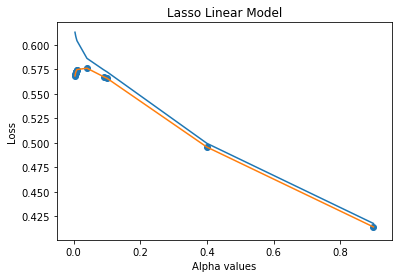

In [20]:
plot = Lasso_regression([.004,.005,.006,.0062,.0065,.0067,.0069,.007,.009,.01,.04,.09,.1,.4,.9],scaled_train.drop("ID",axis = 1))
plot.show()

In [21]:
linear_clf = Lasso(alpha=.04, fit_intercept=True, normalize=False,random_state=23) 
linear_clf.fit(scaled_train.drop("ID",axis = 1),actual_y)
r_square = r2_score(actual_y,linear_clf.predict(scaled_train.drop("ID",axis = 1)))
RMSE = mean_squared_error(actual_y,linear_clf.predict(scaled_train.drop("ID",axis = 1)),squared=False)
print(f"R_square for train data is : {r_square}")
print(f"RMSE for train data is : {RMSE}")

# lET'S FIND THE KAGGLE SCORE.
sub = pd.DataFrame()
sub['ID'] = test['ID']
sub['y'] = linear_clf.predict(scaled_test.drop("ID",axis = 1))
sub.to_csv('submission_Final.csv', index=False)
#Kaggle : .53370

R_square for train data is : 0.5851996763260194
RMSE for train data is : 8.005179309555716


<h4>Decision Tree</h4>

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  2.9min finished


params no 0 : {'min_samples_split': 9, 'max_leaf_nodes': 15, 'max_depth': 10, 'criterion': 'mae'} test score : [0.5666155841718358]
params no 1 : {'min_samples_split': 7, 'max_leaf_nodes': 500, 'max_depth': 9, 'criterion': 'mae'} test score : [0.5666155841718358, 0.5340096857866927]
params no 2 : {'min_samples_split': 2, 'max_leaf_nodes': 30, 'max_depth': 9, 'criterion': 'friedman_mse'} test score : [0.5666155841718358, 0.5340096857866927, 0.5732944802045745]
params no 3 : {'min_samples_split': 5, 'max_leaf_nodes': 300, 'max_depth': 7, 'criterion': 'mae'} test score : [0.5666155841718358, 0.5340096857866927, 0.5732944802045745, 0.5596613233643057]
params no 4 : {'min_samples_split': 4, 'max_leaf_nodes': 100, 'max_depth': 9, 'criterion': 'mae'} test score : [0.5666155841718358, 0.5340096857866927, 0.5732944802045745, 0.5596613233643057, 0.5326557553234647]
params no 5 : {'min_samples_split': 5, 'max_leaf_nodes': 50, 'max_depth': 3, 'criterion': 'friedman_mse'} test score : [0.5666155841

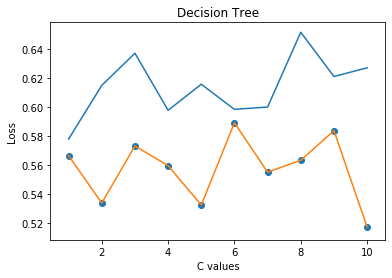

In [22]:
from sklearn.tree import DecisionTreeRegressor
a = decision_tree(scaled_train.drop("ID",axis=1))
plt = a[0]
Decsion_clf = a[1]

In [23]:
print("Our best score is : ",Decsion_clf.best_score_)
print("Our best estimator : ",Decsion_clf.best_estimator_)

Our best score is :  0.589246789534758
Our best estimator :  DecisionTreeRegressor(ccp_alpha=0.0, criterion='friedman_mse', max_depth=3,
                      max_features=None, max_leaf_nodes=50,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=5,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=2, splitter='best')


In [25]:
#lET'S FIND THE KAGGLE SCORE.
DECISONTREE = DecisionTreeRegressor(ccp_alpha=0.0, criterion='friedman_mse', max_depth=3,
                      max_features=None, max_leaf_nodes=50,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=5,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=2, splitter='best')

decision_classfier = best_decison_tree(DECISONTREE,scaled_train.drop("ID",axis = 1))
sub = pd.DataFrame()
sub['ID'] = test['ID']
sub['y'] = decision_classfier.predict(scaled_test.drop("ID",axis = 1))
sub.to_csv('submission_Final.csv', index=False)
#kaggle score : .54218

R_square for train data is : 0.5978833321496284
RMSE for train data is : 7.881838982701878


<h4>LARSLASSO</h4>

In [22]:
LassoLars = LassoLarsCV(normalize=True,cv=5)
LassoLars.fit(scaled_train.drop("ID",axis = 1),actual_y)
r_square = r2_score(actual_y,LassoLars.predict(scaled_train.drop("ID",axis = 1)))
RMSE = mean_squared_error(actual_y,LassoLars.predict(scaled_train.drop("ID",axis = 1)),squared=False)
print(f"R_square for train data is : {r_square}")
print(f"RMSE for train data is : {RMSE}")

R_square for train data is : 0.5460008457105476
RMSE for train data is : 8.37488867578143


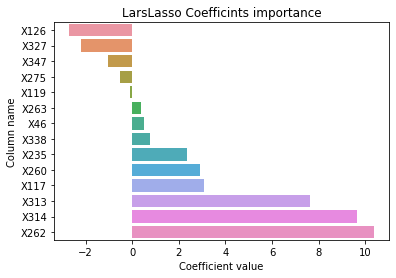

In [23]:
coef_ = [i for i in sorted(zip(LassoLars.coef_,train.columns), key = lambda x : x[0]) if i[0]!=0.0]
sns.barplot([i[0] for i in coef_], [i[1] for i in coef_])
plt.title("LarsLasso Coefficints importance")
plt.xlabel("Coefficient value")
plt.ylabel("Column name")
plt.show()

In [27]:
sub = pd.DataFrame()
sub['ID'] = test['ID']
sub['y'] = LassoLars.predict(scaled_test.drop("ID",axis = 1))
sub.to_csv('submission_Final.csv', index=False)
# Kaggle Score : 0.50646

<img src = "https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcQmpsaHLkv3d85Eamq-zGl2K2cA4d3xptRbr4XGZ79R9pl6sn2n"
width="60" height="34">
<font face="verdana" color="006400"><b><u>My Thought Process:</u> From Above attempts i can see that attempt 4 is working well.</b></font>


<img src = "https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcQmpsaHLkv3d85Eamq-zGl2K2cA4d3xptRbr4XGZ79R9pl6sn2n"
width="60" height="34">
<h1><center>Attempt 7.</center></h1>
<font face="verdana" color="006400"><b><u>My Thought Process:</u> I want to  select that model which on hyperparameter tuning gets as closed result on test data also so that, our model will not behave badly on test data
i.e Train loss as close as possible with test loss.</b></font>

<font face="verdana" color="red"><b>NOTE :  Now eveything in blue is used in the subsequent model, we will check one by one all our analsys and will see the performance for eg: below we are using onnly 1.1 and 2.2 in the model,
    From abpve analysis i can see that Y imputstion with 130 is giving me goof result from now on i will continue with that imputation only.</b></font>

<font face="verdana" color="006400"><b>1. Y imputation</b></font>

<font face="verdana" color="blue"><b><pre>1.4 Removing only 265.32 y values with somwe other values other than 100 approx</pre>
</b></font>

<font face="verdana" color="006400"><b>2. Feature engineering</b></font>

<pre>2.1 For catagorical values use label encoding </pre>
<pre>2.2 For catagorical values use one hot encoding encoding </pre>
<pre>2.3 Will remove ID feature and use best of the above encoding and see the performance, as ID as per the business problem may have some hidden sequencing information or may be not, we have to see.</pre>
<font face="verdana" color="blue"><b><pre>2.4 I will fetch the best features by using all well known feature decompostiiton algorithm concatenate with original features.</pre></b></font>

<h4>5.1.4 Linear Regression with LARSLasso</h4>

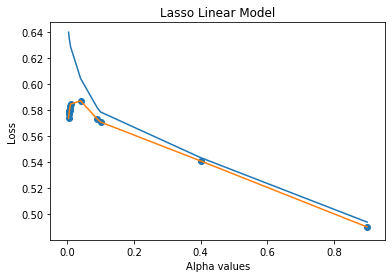

In [8]:
plot = Lasso_regression([.004,.005,.006,.0062,.0065,.0067,.0069,.007,.009,.01,.04,.09,.1,.4,.9],decomposed_train)
plot.show()

In [22]:
linear_clf = Lasso(alpha=.09, fit_intercept=True, normalize=False,random_state=23) 
linear_clf.fit(decomposed_train,actual_y)
r_square = r2_score(actual_y,linear_clf.predict(decomposed_train))
RMSE = mean_squared_error(actual_y,linear_clf.predict(decomposed_train),squared=False)
print(f"R_square for train data is : {r_square}")
print(f"RMSE for train data is : {RMSE}")

# lET'S FIND THE KAGGLE SCORE.
sub = pd.DataFrame()
sub['ID'] = test['ID']
sub['y'] = linear_clf.predict(decomposed_test)
sub.to_csv('submission_Final.csv', index=False)

R_square for train data is : 0.5808797022248608
RMSE for train data is : 8.04675665582214


<h4>5.1.5 Decision tree</h4>

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed: 12.8min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed: 56.2min finished


params no 0 : {'min_samples_split': 9, 'max_leaf_nodes': 15, 'max_depth': 10, 'criterion': 'mae'} test score : [0.5490913354614936]
params no 1 : {'min_samples_split': 7, 'max_leaf_nodes': 500, 'max_depth': 9, 'criterion': 'mae'} test score : [0.5490913354614936, 0.4785924141384482]
params no 2 : {'min_samples_split': 2, 'max_leaf_nodes': 30, 'max_depth': 9, 'criterion': 'friedman_mse'} test score : [0.5490913354614936, 0.4785924141384482, 0.5070468348219606]
params no 3 : {'min_samples_split': 5, 'max_leaf_nodes': 300, 'max_depth': 7, 'criterion': 'mae'} test score : [0.5490913354614936, 0.4785924141384482, 0.5070468348219606, 0.4900096917552571]
params no 4 : {'min_samples_split': 4, 'max_leaf_nodes': 100, 'max_depth': 9, 'criterion': 'mae'} test score : [0.5490913354614936, 0.4785924141384482, 0.5070468348219606, 0.4900096917552571, 0.4713079528883764]
params no 5 : {'min_samples_split': 5, 'max_leaf_nodes': 50, 'max_depth': 3, 'criterion': 'friedman_mse'} test score : [0.5490913354

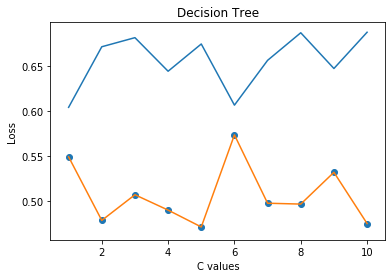

In [10]:
from sklearn.tree import DecisionTreeRegressor
a = decision_tree(decomposed_train)
plt = a[0]
Decsion_clf = a[1]

In [11]:
print("Our best score is : ",Decsion_clf.best_score_)
print("Our best estimator : ",Decsion_clf.best_estimator_)

Our best score is :  0.5734695777186427
Our best estimator :  DecisionTreeRegressor(ccp_alpha=0.0, criterion='friedman_mse', max_depth=3,
                      max_features=None, max_leaf_nodes=50,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=5,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=2, splitter='best')


In [21]:
#lET'S FIND THE KAGGLE SCORE.
DECISONTREE = DecisionTreeRegressor(ccp_alpha=0.0, criterion='friedman_mse', max_depth=3,
                      max_features=None, max_leaf_nodes=50,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=5,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=2, splitter='best')

decision_classfier = best_decison_tree(DECISONTREE,decomposed_train)
sub = pd.DataFrame()
sub['ID'] = test['ID']
sub['y'] = decision_classfier.predict(decomposed_test)
sub.to_csv('submission_Final.csv', index=False)

R_square for train data is : 0.6049369669373551
RMSE for train data is : 7.812404432362868


<h4>5.1.6 XGBOOST</h4>

In [ ]:
'''Cross validation the xgb model then predict the test data'''

max_depths = [3,4]
n_treess = [100,400,520]
etas = [.001,.0045]
subsamples = [.93,.95]
count = 0
dtrain = xgb.DMatrix(decomposed_train, actual_y)
dtest = xgb.DMatrix(decomposed_test)

# GRID SEARCH
for max_depth in max_depths:
    for n_trees in n_treess:
        for eta in etas:
            for subsample in subsamples:
                xgb_params = {
                            'n_trees': n_trees, 
                            'max_depth': max_depth,
                            'eta': eta,
                            'subsample': subsample,
                            'objective': 'reg:linear',
                            'eval_metric': 'rmse',
                        }
                print(f"Parameters are :{max_depth,n_trees,eta,subsample}")
                print(f"Total iteration :{len(max_depths)*len(n_treess)*len(etas)*len(subsamples)}")
                print(f"Total iteration remaining :{len(max_depths)*len(n_treess)*len(etas)*len(subsamples) - (count)}")
                print("#"*110)
                count+=1
                # NOTE: Make sure that the class is labeled 'class' in the data file
                num_boost_rounds = 5000
                XGBOOST_CV = xgb.cv(xgb_params, dtrain, nfold=5, verbose_eval=3,early_stopping_rounds=5, num_boost_round=num_boost_rounds)
                print("#"*110)
        

Parameters are :(3, 100, 0.001, 0.93)
Total iteration :24
Total iteration remaining :24
##############################################################################################################
[22:32:21] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:32:21] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:32:21] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:32:21] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:32:21] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of

In [163]:
'''Train the xgb model then predict the test data
(3, 400, 0.0045, 0.95)
max_depth,n_trees,eta,subsample'''

xgb_params = {
            'n_trees': 400, 
            'max_depth': 3,
            'eta': 0.0045,
            'subsample': 0.95,
            'objective': 'reg:linear',
            'eval_metric': 'rmse',
             }

dtrain = xgb.DMatrix(decomposed_train, actual_y)
dtest = xgb.DMatrix(decomposed_test)

# NOTE: Make sure that the class is labeled 'class' in the data file
num_boost_rounds = 1209
# train model
model = xgb.train(dict(xgb_params, silent=0), dtrain, num_boost_round=num_boost_rounds)
y_pred_train = model.predict(dtrain)
y_pred = model.predict(dtest)

[23:16:05] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [13]:
#lET'S FIND THE KAGGLE SCORE.
sub = pd.DataFrame()
sub['ID'] = test['ID']
sub['y'] = model.predict(dtest)
sub.to_csv('submission_Final.csv', index=False)

<h4>GBDT REGRESSOR</h4>

In [11]:
GBDT_Regression(scaled_train,scaled_test)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   18.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   46.3s finished


params : {'subsample': 0.2, 'min_samples_split': 6, 'min_samples_leaf': 4, 'max_features': 0.55, 'max_depth': 9, 'learning_rate': 0.001} and it's test r2 score is 0.10134429031631804 and it's train r2 score is 0.11361554813916537
params : {'subsample': 0.6, 'min_samples_split': 8, 'min_samples_leaf': 10, 'max_features': 0.55, 'max_depth': 4, 'learning_rate': 0.0025} and it's test r2 score is 0.22644101304111536 and it's train r2 score is 0.236693127402087
params : {'subsample': 0.1, 'min_samples_split': 7, 'min_samples_leaf': 5, 'max_features': 0.7, 'max_depth': 7, 'learning_rate': 0.02} and it's test r2 score is 0.559548307231408 and it's train r2 score is 0.6152155795220045
params : {'subsample': 0.2, 'min_samples_split': 4, 'min_samples_leaf': 6, 'max_features': 0.4, 'max_depth': 3, 'learning_rate': 0.0025} and it's test r2 score is 0.2188510752513157 and it's train r2 score is 0.22652013499384172
params : {'subsample': 0.5, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_featur

<!DOCTYPE html>
<html>
<head>
<style>
table {
  font-family: arial, sans-serif;
  border-collapse: collapse;
  width: 100%;
}

td, th {
  border: 1px solid #dddddd;
  text-align: left;
  padding: 8px;
}

tr:nth-child(even) {
  background-color: #dddddd;
}
</style>
</head>
<body>
<h4><center>MODEL SUMMARY</center></h4>
<h4><center>ATTEMPT 1</center></h4>

<table>
 <tr>
    <th>SN0</th>
    <th>Model</th>
    <th>Encoding</th>
    <th>Imputation</th>
    <th>Hyperparameter</th>
    <th>R^2 Loss</th>
    <th>RMSE</th>
    <th>KAGGLE PRIVATE SCORE</th>  
  </tr>
  <tr>
    <td>1.</td>
    <td>LASSO REGRESSION MODEL</td>
    <td>LABEL ENCODING</td>
    <td>ABOVE 150 SEC VALUES IMPUTED WITH 100</td>
    <td>ALPHA = .6</td>
    <td>0.58</td> 
    <td>7.761</td>
    <td>0.51926</td>  
  </tr>
   <tr>
    <td>2.</td>
    <td>RIDGE REGRESSION MODEL</td>
    <td>LABEL ENCODING</td>
    <td>ABOVE 150 SEC VALUES IMPUTED WITH 100</td>
    <td>ALPHA = .2</td>
    <td>0.632</td> 
    <td>7.25</td>  
    <td>-14.88253</td>     
  </tr>  
  <tr>
    <td>3.</td>
    <td>ELASTICNET MODEL</td>
    <td>LABEL ENCODING</td>
    <td>ABOVE 150 SEC VALUES IMPUTED WITH 100</td>
    <td>ALPHA = .9</td>
    <td> 0.58</td> 
    <td>7.70</td>
    <td>0.51776</td>  
  </tr> 
  <tr>
    <td>4.</td>
    <td>LASSOLARS MODEL</td>
    <td>LABEL ENCODING</td>
    <td>ABOVE 150 SEC VALUES IMPUTED WITH 100</td>
    <td>Normalize = TRUE</td>
    <td>0.60</td> 
    <td >7.576</td> 
    <td>0.523</td>   
  </tr>  
    <td>5.</td>
    <td>DECISIONTREE MODEL</td>
    <td>LABEL ENCODING</td>
    <td>ABOVE 150 SEC VALUES IMPUTED WITH 100</td>
    <td>Multi-Parameters</td>
    <td>0.645</td> 
    <td>7.128</td> 
    <td>.53772</td> 
  </tr>
  
   <tr>  
    <td>6.</td>
    <td>SVR MODEL</td>
    <td>LABEL ENCODING</td>
    <td>ABOVE 150 SEC VALUES IMPUTED WITH 100</td>
    <td>C value : 1</td>
    <td>.52</td> 
    <td>8.24</td> 
    <td>No</td> 
  </tr>
  
  <tr>  
    <td>7.</td>
    <td>XGBOOST</td>
    <td>LABEL ENCODING</td>
    <td>ABOVE 150 SEC VALUES IMPUTED WITH 100</td>
    <td>Mupliple parameters </td>
    <td>.65</td> 
    <td>7.01</td> 
    <td>.53701</td> 
  </tr>
    <tr>  
    <td>8.</td>
    <td>GBDT</td>
    <td>LABEL ENCODING</td>
    <td>ABOVE 150 SEC VALUES IMPUTED WITH 100</td>
    <td>Multiple Parameters: </td>
    <td>0.6363</td> 
    <td>7.32</td> 
    <td>.53901</td> 
  </tr>

</table>

<h4><center>ATTEMPT 2</center></h4>
<table>
 <tr>
    <th>SN0</th>
    <th>Model</th>
    <th>Encoding</th>
    <th>Imputation</th>
    <th>Hyperparameter</th>
    <th>R^2 Loss</th>
    <th>RMSE</th>
    <th>KAGGLE PRIVATE SCORE</th>  
  </tr>
   <tr>
    <td>8.</td>
    <td>LASSO REGRESSION MODEL</td>
    <td>LABEL ENCODING</td>
    <td>REMOVED 12 UNIMPORTANT FEATURES FROM THE DATASET </td>
    <td>ALPHA = .9</td>
    <td>0.58</td> 
    <td>7.761</td>
    <td>0.51926</td>  
  </tr>  
</table>

<h4><center>ATTEMPT 3</center></h4>
<table>
 <tr>
    <th>SN0</th>
    <th>Model</th>
    <th>Encoding</th>
    <th>Imputation</th>
    <th>Hyperparameter</th>
    <th>R^2 Loss</th>
    <th>RMSE</th>
    <th>KAGGLE PRIVATE SCORE</th>  
  </tr>
  <tr>
    <td>9.</td>
    <td>LASSO REGRESSION MODEL</td>
    <td>LABEL ENCODING</td>
    <td>iMPUTED 265.32 ONLY WITH 100 </td>
    <td>ALPHA = .9</td>
    <td>0.553</td> 
    <td>8.29</td>
    <td>0.52224</td>  
   </tr> 
   <tr>
    <td>10.</td>
    <td>RIDGE REGRESSION MODEL</td>
    <td>LABEL ENCODING</td>
    <td>iMPUTED 265.32 ONLY WITH 100 </td>
    <td>ALPHA = 400</td>
    <td>0.031</td> 
    <td>12.22</td>
    <td>0.12</td>   
  </tr>
  <tr>
    <td>11.</td>
    <td>ELASTICNET REGRESSION MODEL</td>
    <td>LABEL ENCODING</td>
    <td>iMPUTED 265.32 ONLY WITH 100 </td>
    <td>ALPHA = .7</td>
    <td>0.573</td> 
    <td>8.10</td>
    <td>.52685</td>   
  </tr> 
  <tr>
    <td>12.</td>
    <td>LASSOLARS  MODEL</td>
    <td>LABEL ENCODING</td>
    <td>iMPUTED 265.32 ONLY WITH 100 </td>
    <td>NORMALIZE = TRUE</td>
    <td>0.555</td> 
    <td>8.28</td>
    <td>.5173</td>   
  </tr>
  <tr>
    <td>13.</td>
    <td>DECISIONTREE REGRESSOR  MODEL</td>
    <td>LABEL ENCODING</td>
    <td>iMPUTED 265.32 ONLY WITH 100 </td>
    <td>MultiHyperparameters</td>
    <td>0.60</td> 
    <td>7.86</td>
    <td>.54353</td>   
  </tr>
  <tr>
    <td>14.</td>
    <td>SVR MODEL</td>
    <td>LABEL ENCODING</td>
    <td>iMPUTED 265.32 ONLY WITH 100 </td>
    <td>C Value : 1</td>
    <td>8.80</td> 
    <td>.495</td>
    <td>No</td>   
  </tr>
  <tr>
    <td>15.</td>
    <td>XGBOOST MODEL</td>
    <td>LABEL ENCODING</td>
    <td>iMPUTED 265.32 ONLY WITH 100 </td>
    <td>MultiHyperparameters</td>
    <td>--</td> 
    <td>--</td>
    <td>--</td>   
  </tr>
    
   <tr>
    <td>16.</td>
    <td>GBDT MODEL</td>
    <td>LABEL ENCODING</td>
    <td>iMPUTED 265.32 ONLY WITH 100 </td>
    <td>MultiHyperparameters</td>
    <td>--</td> 
    <td>.62</td>
    <td>.53003</td>   
  </tr>
</table>

<h4><center>ATTEMPT 4</center></h4>
<table>
 <tr>
    <th>SN0</th>
    <th>Model</th>
    <th>Encoding</th>
    <th>Imputation</th>
    <th>Hyperparameter</th>
    <th>R^2 Loss</th>
    <th>RMSE</th>
    <th>KAGGLE PRIVATE SCORE</th>  
  </tr>
 <tr>
    <td>16.</td>
    <td>LASSO REGRESSION  MODEL</td>
    <td>LABEL ENCODING</td>
    <td>iMPUTED 265.32 ONLY WITH 130 </td>
    <td>ALPHA = .9</td>
    <td>.5521</td> 
    <td>8.31</td>
    <td>0.52215</td>   
  </tr>
  <tr>
    <td>17.</td>
    <td>RIDGE REGRESSION  MODEL</td>
    <td>LABEL ENCODING</td>
    <td>iMPUTED 265.32 ONLY WITH 130 </td>
    <td>ALPHA = 400</td>
    <td>0.031</td> 
    <td>12.23</td>
    <td>-</td>   
  </tr>
<tr>
    <td>7.</td>
    <td>ELASTICNET REGRESSION  MODEL</td>
    <td>LABEL ENCODING</td>
    <td>iMPUTED 265.32 ONLY WITH 130 </td>
    <td>ALPHA = .7</td>
    <td>0.572</td> 
    <td>8.12</td>
    <td>.52693-</td>   
  </tr>
   <tr>
    <td>18.</td>
    <td>LASSOLARS MODEL</td>
    <td>LABEL ENCODING</td>
    <td>iMPUTED 265.32 ONLY WITH 130 </td>
    <td>ALPHA = .7</td>
    <td>0.59</td> 
    <td>8.104</td>
    <td>.53496-</td>   
  </tr>
   <tr>
    <td>19.</td>
    <td>DECISIONTREE REGRESSOR  MODEL</td>
    <td>LABEL ENCODING</td>
    <td>iMPUTED 265.32 ONLY WITH 130 </td>
    <td>Mutli-Parameters</td>
    <td>0.60</td> 
    <td>7.86</td>
    <td>.54356</td>   
  </tr>
   <tr>
    <td>20.</td>
    <td>SVR MODEL</td>
    <td>LABEL ENCODING</td>
    <td>iMPUTED 265.32 ONLY WITH 130 </td>
    <td>C = .7</td>
    <td>0.49</td> 
    <td>8.8</td>
    <td>.42905-</td>   
  </tr>
       <tr>
    <td>21.</td>
    <td>GBDT MODEL</td>
    <td>LABEL ENCODING</td>
    <td>iMPUTED 265.32 ONLY WITH 130 </td>
    <td>Multiple parameters</td>
    <td>.5921</td> 
    <td>8.01</td>
    <td>.5421-</td>   
  </tr>
</table>

<h4><center>ATTEMPT 5</center></h4>

<table>
	<tr>
    <th>SN0</th>
    <th>Model</th>
    <th>Encoding</th>
    <th>Imputation</th>
    <th>Hyperparameter</th>
    <th>R^2 Loss</th>
    <th>RMSE</th>
    <th>KAGGLE PRIVATE SCORE</th>  
  </tr>
	<tr>
    <td>21.</td>
    <td>LASSO MODEL</td>
    <td>ONE HOT ENCODING</td>
    <td>iMPUTED 265.32 ONLY WITH 130 </td>
    <td>ALPHA = .09</td>
    <td>0.58</td> 
    <td>8.04</td>
    <td>.53174-</td>   
  </tr>
  
   <tr>
    <td>22.</td>
    <td>RIDGE MODEL</td>
    <td>ONE HOT ENCODING</td>
    <td>iMPUTED 265.32 ONLY WITH 130 </td>
    <td>ALPHA = 400</td>
    <td>0.035</td> 
    <td>12.20</td>
    <td>--</td>   
  </tr>

   <tr>
    <td>23.</td>
    <td>ELASTICNET MODEL</td>
    <td>ONE HOT ENCODING</td>
    <td>iMPUTED 265.32 ONLY WITH 130 </td>
    <td>ALPHA = 400</td>
    <td>0.577</td> 
    <td>8.08</td>
    <td>.52921</td>   
  </tr>


   <tr>
    <td>24.</td>
    <td>LARSLASSO MODEL</td>
    <td>ONE HOT ENCODING</td>
    <td>iMPUTED 265.32 ONLY WITH 130 </td>
    <td>ALPHA = 400</td>
    <td>0.566</td> 
    <td>8.17</td>
    <td>.52329</td>   
  </tr>

  <tr>
    <td>25.</td>
    <td>DECISION TREE MODEL</td>
    <td>ONE HOT ENCODING</td>
    <td>iMPUTED 265.32 ONLY WITH 130 </td>
    <td>Multi parameters</td>
    <td>0.59</td> 
    <td>8.17</td>
    <td>.54356</td>   
  </tr>
  
  <tr>
    <td>26.</td>
    <td>XGBOOST MODEL</td>
    <td>ONE HOT ENCODING</td>
    <td>iMPUTED 265.32 ONLY WITH 130 </td>
    <td>Multi parameters</td>
    <td>0.62</td> 
    <td>7.52</td>
    <td>.5356</td>   
  </tr>  
  <tr>
    <td>25.</td>
    <td>GBDT REGRESSOR</td>
    <td>ONE HOT ENCODING</td>
    <td>iMPUTED 265.32 ONLY WITH 130 </td>
    <td>Multi parameters</td>
    <td>NO</td> 
    <td>NO</td>
    <td>NO</td>   
  </tr>
</table>

<h4><center>ATTEMPT 6</center></h4>
<table>
	<tr>
    <th>SN0</th>
    <th>Model</th>
    <th>Encoding</th>
    <th>Imputation</th>
    <th>Hyperparameter</th>
    <th>R^2 Loss</th>
    <th>RMSE</th>
    <th>KAGGLE PRIVATE SCORE</th>  
  </tr>
	<tr>
    <td>27.</td>
    <td>LASSO MODEL</td>
    <td>LABEL ENCODING without ID feature</td>
    <td>iMPUTED 265.32 ONLY WITH 130 </td>
    <td>ALPHA = .09</td>
    <td>0.58</td> 
    <td>8.00</td>
    <td>.53370</td>   
  </tr>
  
   <tr>
    <td>28.</td>
    <td>DECISION TREE MODEL</td>
    <td>LABEL ENCODING without ID feature</td>
    <td>iMPUTED 265.32 ONLY WITH 130 </td>
    <td>MULTIPARAMETERS</td>
    <td>0.59</td> 
    <td>7.88</td>
    <td>.54218</td>   
  </tr>

   <tr>
    <td>30.</td>
    <td>LASSOLARS MODEL</td>
    <td>LABEL ENCODING without ID feature</td>
    <td>iMPUTED 265.32 ONLY WITH 130 </td>
    <td>NOTMALIZED = TRUE</td>
    <td>0.54</td> 
    <td>8.37</td>
    <td>.506</td>   
  </tr>
 
</table>

<h4><center>ATTEMPT 7</center></h4>

<table>
	<tr>
    <th>SN0</th>
    <th>Model</th>
    <th>Encoding</th>
    <th>Imputation</th>
    <th>Hyperparameter</th>
    <th>R^2 Loss</th>
    <th>RMSE</th>
    <th>KAGGLE PRIVATE SCORE</th>  
  </tr>
	 <tr>
    <td>31.</td>
    <td>LASSO REGRESSION</td>
    <td>DECOMPOSED FEATURES</td>
    <td>iMPUTED 265.32 ONLY WITH 130 </td>
    <td>Multi parameters</td>
    <td>.58</td> 
    <td>8.04</td>
    <td>.5262</td>   
  </tr>

<tr>
    <td>32.</td>
    <td>DECISION TREE</td>
    <td>DECOMPOSED FEATURES</td>
    <td>iMPUTED 265.32 ONLY WITH 130 </td>
    <td>Multi parameters</td>
    <td>.60</td> 
    <td>7.812</td>
    <td>.53264</td>   
  </tr>
    
    
   <tr>
    <td>34.</td>
    <td>XGBOOST</td>
    <td>DECOMPOSED FEATURES</td>
    <td>iMPUTED 265.32 ONLY WITH 130 </td>
    <td>Multi parameters</td>
    <td>--</td> 
    <td>8.002</td>
    <td>.54167</td>   
  </tr>
  
   <tr>
    <td>34.</td>
    <td>GBDT REGRESSOR</td>
    <td>DECOMPOSED FEATURES</td>
    <td>iMPUTED 265.32 ONLY WITH 130 </td>
    <td>Multi parameters</td>
    <td>--</td> 
    <td>8.002</td>
    <td>.53228</td>   
  </tr>
 
</table>

</body>
</html>

<img src = "https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcQmpsaHLkv3d85Eamq-zGl2K2cA4d3xptRbr4XGZ79R9pl6sn2n"
width="60" height="34">
<h1><center>Final Analysis.</center></h1>
<font face="verdana" color="006400"><u>My Thought Process:</u> From above i am choosing <u>ATTEMPT 4 and ATTEMPT 7</u> as the best attempt, now, i will apply ensemble models as per the architecture shown in the starting. The one gives less fluctuation in the CV test score with highest means test R^2 Score,i will choose that one.I will check for <b>LassoLars,DecisionTree,Lasso Regression,GBDT and check the best combination which give best results.</b></font>

<h3>5. Machine Learning Model Architecture</h3>
<img src = "https://i.imgur.com/QRO4Niv.png" ></img>

<h4>1.Stacking Models</h4>

In [164]:
class StackingEstimator(BaseEstimator, TransformerMixin):
    # refered from the https://www.kaggle.com/hakeem/stacked-then-averaged-models-0-5697?scriptVersionId=1252368 kernel
    def __init__(self, estimator):
        self.estimator = estimator

    
    def fit(self, X, y=None, **fit_params):
        self.estimator.fit(X, y, **fit_params)
        return self
    
    def transform(self, X):
        X = check_array(X)
        X_transformed = np.copy(X)
        # add class probabilities as a synthetic feature
        if issubclass(self.estimator.__class__, ClassifierMixin) and hasattr(self.estimator, 'predict_proba'):
            X_transformed = np.hstack((self.estimator.predict_proba(X), X))
        # add class prodiction as a synthetic feature
        X_transformed = np.hstack((np.reshape(self.estimator.predict(X), (-1, 1)), X_transformed))
        return X_transformed
    
def stacking_classifier_selection(classifier_1,classifier_2,Estimators_Trial,check):
    """This function is writte to select the best Stacking combination of the model as we have selected
    LassoLarsCV,DecisionTree,Lasso Regression,GBDT, ElasticNet"""
    graph_of_estimator_train = dict()
    graph_of_estimator_test = dict()
    for classifier in  Estimators_Trial:
        # if else conditon to place different model at diffeent location in the stacking.
        #If check ==3 i will place differetn models at last vice versa.
        if (check == 3):
            stacked_pipeline = make_pipeline(
                StackingEstimator(estimator= classifier_1),
                StackingEstimator(estimator=classifier_2),
                classifier
            )
        elif(check == 2) :
            stacked_pipeline = make_pipeline(
                StackingEstimator(estimator= classifier_1),
                StackingEstimator(estimator=classifier),
                classifier_2
            )
        else:
            stacked_pipeline = make_pipeline(
                StackingEstimator(estimator= classifier),
                StackingEstimator(estimator=classifier_1),
                classifier_2
            )
        
        stacked_pipeline.fit(scaled_train, actual_y)

        # cross vlaidation for the particular stacked model.
        Scores = cross_validate(stacked_pipeline, scaled_train, actual_y, cv=5,scoring=('r2'),\
                                        return_train_score=True)

        used_clf = str(classifier).split("(",1)[0]
        graph_of_estimator_train.update({used_clf: np.mean(Scores['train_score'])})
        graph_of_estimator_test.update({used_clf: np.mean(Scores['test_score'])})

        print(f" Train score for classifier {used_clf} is {Scores['train_score']}")
        print(f"Test score for classifier {used_clf} is {Scores['test_score']}")   
    
    plt.figure(figsize=(15,8))
    plt.scatter([i for i in graph_of_estimator_train.keys()], [i for i in graph_of_estimator_train.values()],c="blue",s = 100,label = "Train R^2 Loss")
    plt.scatter([i for i in graph_of_estimator_test.keys()], [i for i in graph_of_estimator_test.values()],c="orange",s = 100,label = "Test R^2 Loss")
    plt.legend()
    plt.grid()
    plt.title("Final analysis on the basis of test and train loss on the stacking model.")
    plt.xlabel("Model Names")
    plt.ylabel("Loss")
    # add annoatation in the grapgh
    for key,value in  [i for i in graph_of_estimator_train.items()]:
        plt.annotate(value,(key,value+.006))

    for key,value in  [i for i in graph_of_estimator_test.items()]:
        plt.annotate(value,(key,value+.006))    
    plt.show()

<h4>Checking the combination of the stacking models.
</h4>

<h4>1. Used only 2 models in the stack.</h4>

In [123]:
        
train_dict = dict()
test_dict = dict()
stacked_pipeline = make_pipeline(
                StackingEstimator(estimator= ElasticNet(alpha=.7, fit_intercept=True, normalize=False, max_iter=100,\
                            random_state=23)),
                StackingEstimator(estimator=DecisionTreeRegressor(ccp_alpha=0.0, criterion='friedman_mse', max_depth=3,\
                      max_features=None, max_leaf_nodes=50,\
                      min_impurity_decrease=0.0, min_impurity_split=None,\
                      min_samples_leaf=1, min_samples_split=5,\
                      min_weight_fraction_leaf=0.0, presort='deprecated',\
                      random_state=2, splitter='best')),
                LassoLarsCV(normalize=True,cv=5) 
)

stacked_pipeline.fit(scaled_train, actual_y)    
Scores = cross_validate(stacked_pipeline, scaled_train, actual_y, cv=5,scoring=('r2'),\
                                return_train_score=True)

print(f" Train score for classifier {used_clf} is {Scores['train_score']}")
print(f" Test score for classifier {used_clf} is {Scores['test_score']}")  
print(f" Test means score : {np.mean(Scores['test_score'])}")  
print(f" train means score : {np.mean(Scores['train_score'])}") 
train_dict.update({"2" : np.mean(Scores['train_score'])})
test_dict.update({"2" : np.mean(Scores['test_score'])})

 Train score for classifier Lasso is [0.60005876 0.62362594 0.6121798  0.61445493 0.59282851]
 Test score for classifier Lasso is [0.36771411 0.534609   0.59319466 0.53188638 0.62541117]
 Test means score : 0.5305630641119412
 train means score : 0.6086295849932142


<h4>2. Used only 3 models in the stack.</h4>

In [124]:
stacked_pipeline = make_pipeline(
                StackingEstimator(estimator=LassoLarsCV(normalize=True,cv=5)),
                StackingEstimator(estimator=DecisionTreeRegressor(ccp_alpha=0.0, criterion='friedman_mse', max_depth=3,\
                      max_features=None, max_leaf_nodes=50,\
                      min_impurity_decrease=0.0, min_impurity_split=None,\
                      min_samples_leaf=1, min_samples_split=5,\
                      min_weight_fraction_leaf=0.0, presort='deprecated',\
                      random_state=2, splitter='best')),
                StackingEstimator(estimator=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,learning_rate=0.1,\
                          loss='ls', max_depth=3,max_features=0.55, max_leaf_nodes=None,\
                          min_impurity_decrease=0.0, min_impurity_split=None,\
                          min_samples_leaf=14, min_samples_split=16,\
                          min_weight_fraction_leaf=0.0, n_estimators=100,\
                          n_iter_no_change=None, presort='auto',\
                          random_state=19, subsample=0.8, tol=0.0001,\
                          validation_fraction=0.1, verbose=0, warm_start=False)),
                LassoLarsCV(normalize=True,cv=5)
)

stacked_pipeline.fit(scaled_train, actual_y)    
Scores = cross_validate(stacked_pipeline, scaled_train, actual_y, cv=5,scoring=('r2'),\
                                return_train_score=True)

print(f" Train score for classifier {used_clf} is {Scores['train_score']}")
print(f" Test score for classifier {used_clf} is {Scores['test_score']}")  
print(f" Test means score : {np.mean(Scores['test_score'])}")  
print(f" train means score : {np.mean(Scores['train_score'])}") 
train_dict.update({"3" : np.mean(Scores['train_score'])})
test_dict.update({"3" : np.mean(Scores['test_score'])})

 Train score for classifier Lasso is [0.65703562 0.66765175 0.65523342 0.66447075 0.63707712]
 Test score for classifier Lasso is [0.50075585 0.52448095 0.59455551 0.54632118 0.6482002 ]
 Test means score : 0.5628627392109726
 train means score : 0.6562937331987995


<h4>3. Used only 4 models in the stack.</h4>

In [125]:
stacked_pipeline = make_pipeline(
                StackingEstimator(estimator= ElasticNet(alpha=.7, fit_intercept=True, normalize=False, max_iter=100,\
                            random_state=23)),
                StackingEstimator(estimator=DecisionTreeRegressor(ccp_alpha=0.0, criterion='friedman_mse', max_depth=3,\
                      max_features=None, max_leaf_nodes=50,\
                      min_impurity_decrease=0.0, min_impurity_split=None,\
                      min_samples_leaf=1, min_samples_split=5,\
                      min_weight_fraction_leaf=0.0, presort='deprecated',\
                      random_state=2, splitter='best')),
                StackingEstimator(estimator=LassoLarsCV(normalize=True,cv=5)),
                StackingEstimator(estimator=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,learning_rate=0.1,\
                          loss='ls', max_depth=3,max_features=0.55, max_leaf_nodes=None,\
                          min_impurity_decrease=0.0, min_impurity_split=None,\
                          min_samples_leaf=14, min_samples_split=16,\
                          min_weight_fraction_leaf=0.0, n_estimators=100,\
                          n_iter_no_change=None, presort='auto',\
                          random_state=19, subsample=0.8, tol=0.0001,\
                          validation_fraction=0.1, verbose=0, warm_start=False)),
                LassoLarsCV(normalize=True,cv=5)
)

stacked_pipeline.fit(scaled_train, actual_y)    
Scores = cross_validate(stacked_pipeline, scaled_train, actual_y, cv=5,scoring=('r2'),\
                                return_train_score=True)

print(f" Train score for classifier {used_clf} is {Scores['train_score']}")
print(f" Test score for classifier {used_clf} is {Scores['test_score']}")  
print(f" Test means score : {np.mean(Scores['test_score'])}")  
print(f" train means score : {np.mean(Scores['train_score'])}") 
train_dict.update({"4" : np.mean(Scores['train_score'])})
test_dict.update({"4" : np.mean(Scores['test_score'])})

 Train score for classifier Lasso is [0.66870655 0.67547661 0.67394621 0.66705249 0.66180114]
 Test score for classifier Lasso is [0.35940666 0.52610991 0.59336244 0.54563002 0.61918798]
 Test means score : 0.5287394029923195
 train means score : 0.6693966011952075


<h4>4. Used only 5 models in the stack.</h4>

In [126]:
        
stacked_pipeline = make_pipeline(
                StackingEstimator(estimator= ElasticNet(alpha=.7, fit_intercept=True, normalize=False, max_iter=100,\
                            random_state=23)),
                StackingEstimator(estimator=DecisionTreeRegressor(ccp_alpha=0.0, criterion='friedman_mse', max_depth=3,\
                      max_features=None, max_leaf_nodes=50,\
                      min_impurity_decrease=0.0, min_impurity_split=None,\
                      min_samples_leaf=1, min_samples_split=5,\
                      min_weight_fraction_leaf=0.0, presort='deprecated',\
                      random_state=2, splitter='best')),
                StackingEstimator(estimator=LassoLarsCV(normalize=True,cv=5)),
                StackingEstimator(estimator=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,learning_rate=0.1,\
                          loss='ls', max_depth=3,max_features=0.55, max_leaf_nodes=None,\
                          min_impurity_decrease=0.0, min_impurity_split=None,\
                          min_samples_leaf=14, min_samples_split=16,\
                          min_weight_fraction_leaf=0.0, n_estimators=100,\
                          n_iter_no_change=None, presort='auto',\
                          random_state=19, subsample=0.8, tol=0.0001,\
                          validation_fraction=0.1, verbose=0, warm_start=False)),
                StackingEstimator(estimator= Lasso(alpha=.09, fit_intercept=True, normalize=False,random_state=23)),
                LassoLarsCV(normalize=True,cv=5) 
)

stacked_pipeline.fit(scaled_train, actual_y)    
Scores = cross_validate(stacked_pipeline, scaled_train, actual_y, cv=5,scoring=('r2'),\
                                return_train_score=True)

print(f" Train score for classifier {used_clf} is {Scores['train_score']}")
print(f" Test score for classifier {used_clf} is {Scores['test_score']}")  
print(f" Test means score : {np.mean(Scores['test_score'])}")  
print(f" train means score : {np.mean(Scores['train_score'])}")  
train_dict.update({"5" : np.mean(Scores['train_score'])})
test_dict.update({"5" : np.mean(Scores['test_score'])})

 Train score for classifier Lasso is [0.67038063 0.68823421 0.68287371 0.68527464 0.66720531]
 Test score for classifier Lasso is [0.3491831  0.50938502 0.58226185 0.53109305 0.60929428]
 Test means score : 0.5162434587018124
 train means score : 0.678793699146264


<h4>Creating a plot to see the how many model should i use in the stack and answer came out as : 2</h4>

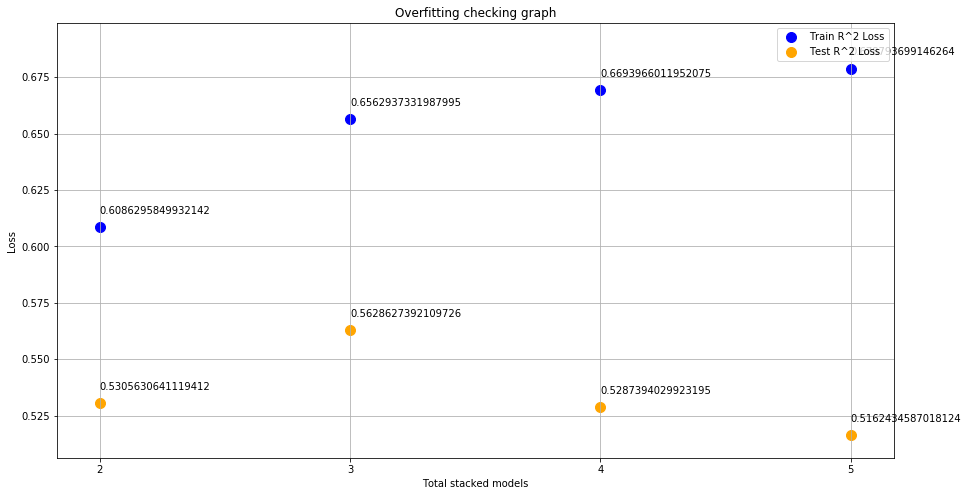

In [127]:
plt.figure(figsize=(15,8))
plt.scatter([i for i in train_dict.keys()], [i for i in train_dict.values()],c="blue",s = 100,label = "Train R^2 Loss")
plt.scatter([i for i in test_dict.keys()], [i for i in test_dict.values()],c="orange",s = 100,label = "Test R^2 Loss")
plt.legend()
plt.grid()
plt.title("Overfitting checking graph")
plt.xlabel("Total stacked models")
plt.ylabel("Loss")
for key,value in  [i for i in train_dict.items()]:
    plt.annotate(value,(key,value+.006))

for key,value in  [i for i in test_dict.items()]:
    plt.annotate(value,(key,value+.006))    
plt.show()

<img src = "https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcQmpsaHLkv3d85Eamq-zGl2K2cA4d3xptRbr4XGZ79R9pl6sn2n"
width="60" height="34">
<font face="verdana" color="006400"><u>My Thought Process:</u>I will take 2 classifier as my final stacking classifier number because from the graph o can see thaat my model is going toward  overfitting as i am increasing the number of model in the stack.</b></font>

<img src = "https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcQmpsaHLkv3d85Eamq-zGl2K2cA4d3xptRbr4XGZ79R9pl6sn2n"
width="60" height="34">
<font face="verdana" color="006400"><u>My Thought Process:</u> Now, I know i have to take only 2 classifer in the stack but which classifier i don't know so for that i wil do some analysis to find out which combition will give me the best result. Please see below........</b></font>

<h4>1st Combination</h4>

 Train score for classifier ElasticNet is [0.644633   0.66716707 0.65587328 0.6661544  0.63614937]
Test score for classifier ElasticNet is [0.54867385 0.52659913 0.5922376  0.53585898 0.63934308]
 Train score for classifier DecisionTreeRegressor is [0.64210422 0.66183976 0.65470473 0.6685238  0.64015094]
Test score for classifier DecisionTreeRegressor is [0.34202329 0.49880468 0.58455599 0.53313167 0.62413418]
 Train score for classifier LassoLarsCV is [0.63993944 0.66529387 0.65302112 0.66253871 0.63400107]
Test score for classifier LassoLarsCV is [0.56529021 0.53057411 0.59712369 0.53976592 0.64572182]
 Train score for classifier GradientBoostingRegressor is [0.69427839 0.70961515 0.71001311 0.72340152 0.68572345]
Test score for classifier GradientBoostingRegressor is [0.32344488 0.50307215 0.56651682 0.51681967 0.63007334]
 Train score for classifier Lasso is [0.64238253 0.66456724 0.65345209 0.66346653 0.63370532]
Test score for classifier Lasso is [0.55757997 0.5288765  0.59483693

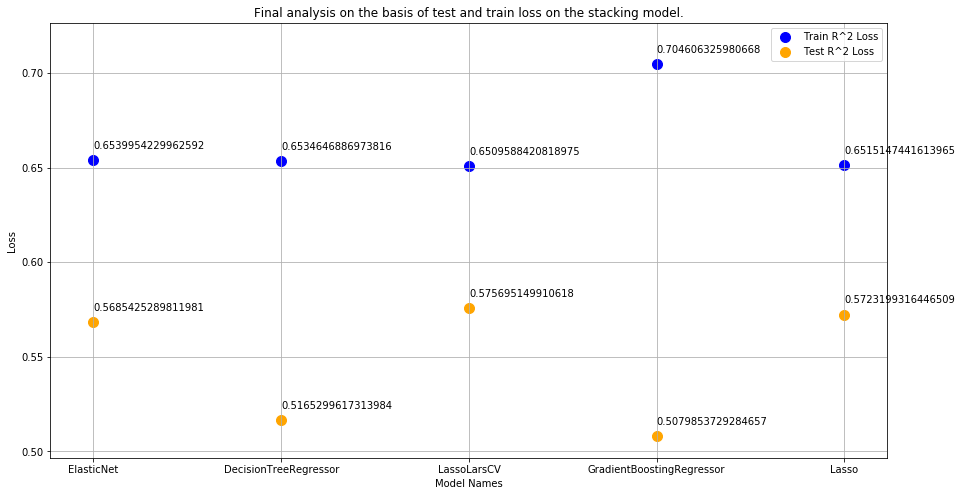

In [165]:
# Using the stacking techniques to provide robustness to the model
# List contain all the wel perfromed models......
Estimators_Trial = [
    
ElasticNet(alpha=.7, fit_intercept=True, normalize=False, max_iter=100,\
                            random_state=23),
    
DecisionTreeRegressor(ccp_alpha=0.0, criterion='friedman_mse', max_depth=3,\
                      max_features=None, max_leaf_nodes=50,\
                      min_impurity_decrease=0.0, min_impurity_split=None,\
                      min_samples_leaf=1, min_samples_split=5,\
                      min_weight_fraction_leaf=0.0, presort='deprecated',\
                      random_state=2, splitter='best'),
    
LassoLarsCV(normalize=True,cv=5),
    
GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,learning_rate=0.1,\
                          loss='ls', max_depth=3,max_features=0.55, max_leaf_nodes=None,\
                          min_impurity_decrease=0.0, min_impurity_split=None,\
                          min_samples_leaf=14, min_samples_split=16,\
                          min_weight_fraction_leaf=0.0, n_estimators=100,\
                          n_iter_no_change=None, presort='auto',\
                          random_state=19, subsample=0.8, tol=0.0001,\
                          validation_fraction=0.1, verbose=0, warm_start=False),
    
Lasso(alpha=.9, fit_intercept=True, normalize=False,random_state=23)

]

# fixing 1 model and 2nd model and changing the third model.
classifier_1 = LassoLarsCV(normalize=True,cv=5)
classifier_2 = GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                                  learning_rate=0.1, loss='ls', max_depth=3,
                                  max_features=0.55, max_leaf_nodes=None,
                                  min_impurity_decrease=0.0, min_impurity_split=None,
                                  min_samples_leaf=14, min_samples_split=16,
                                  min_weight_fraction_leaf=0.0, n_estimators=100,
                                  n_iter_no_change=None, presort='auto',
                                  random_state=19, subsample=0.8, tol=0.0001,
                                  validation_fraction=0.1, verbose=0, warm_start=False)

stacking_classifier_selection(classifier_1,classifier_2,Estimators_Trial,3)

<img src = "https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcQmpsaHLkv3d85Eamq-zGl2K2cA4d3xptRbr4XGZ79R9pl6sn2n"
width="60" height="34">
<font face="verdana" color="006400"><u>My Thought Process:</u>From above i will choose :  Difference between train and test model is .075</b></font>

<h4>2nd Combination</h4>

 Train score for classifier ElasticNet is [0.64326926 0.66643177 0.65310706 0.66358085 0.63859572]
Test score for classifier ElasticNet is [0.50864711 0.53005955 0.59428007 0.54751227 0.65131301]
 Train score for classifier DecisionTreeRegressor is [0.6418378  0.66545945 0.65271906 0.66264638 0.63387221]
Test score for classifier DecisionTreeRegressor is [0.55286135 0.52425833 0.59501907 0.54657009 0.64904886]
 Train score for classifier LassoLarsCV is [0.64892302 0.6729331  0.65795365 0.66423177 0.63687848]
Test score for classifier LassoLarsCV is [0.51577762 0.53114127 0.59490853 0.54243815 0.64715621]
 Train score for classifier GradientBoostingRegressor is [0.69427839 0.70961515 0.71001311 0.72340152 0.68572345]
Test score for classifier GradientBoostingRegressor is [0.32344488 0.50307215 0.56651682 0.51681967 0.63007334]
 Train score for classifier Lasso is [0.64471176 0.66736434 0.6546276  0.66327958 0.63523924]
Test score for classifier Lasso is [0.53430037 0.52805662 0.59649993

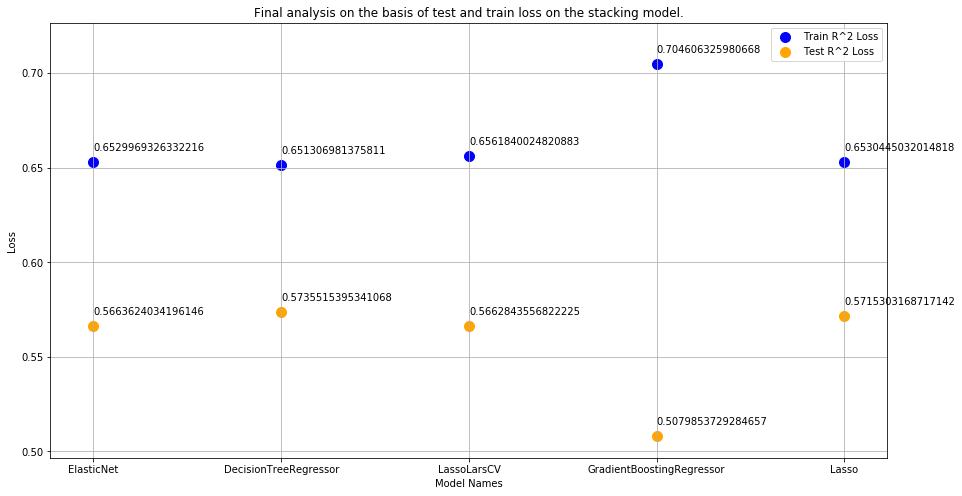

In [166]:
stacking_classifier_selection(classifier_1,classifier_2,Estimators_Trial,2)

<img src = "https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcQmpsaHLkv3d85Eamq-zGl2K2cA4d3xptRbr4XGZ79R9pl6sn2n"
width="60" height="34">
<font face="verdana" color="006400"><u>My Thought Process:</u>From above i can minimum see difference between train and test is .078</b></font>

<h4>3rd Combination</h4>

 Train score for classifier ElasticNet is [0.64478322 0.66450951 0.65529528 0.66726113 0.64218394]
Test score for classifier ElasticNet is [0.51767629 0.52983494 0.59525695 0.54897947 0.64484148]
 Train score for classifier DecisionTreeRegressor is [0.65296001 0.66653837 0.65119227 0.66035835 0.63520446]
Test score for classifier DecisionTreeRegressor is [0.50319798 0.52890126 0.59380155 0.53812751 0.65312572]
 Train score for classifier LassoLarsCV is [0.64892302 0.6729331  0.65795365 0.66423177 0.63687848]
Test score for classifier LassoLarsCV is [0.51577762 0.53114127 0.59490853 0.54243815 0.64715621]
 Train score for classifier GradientBoostingRegressor is [0.69522846 0.70450517 0.69980001 0.7047671  0.69380707]
Test score for classifier GradientBoostingRegressor is [0.24645715 0.5055362  0.55905672 0.52377394 0.61356738]
 Train score for classifier Lasso is [0.64968428 0.67196565 0.6573922  0.66193744 0.63989465]
Test score for classifier Lasso is [0.57131564 0.52961212 0.59191852

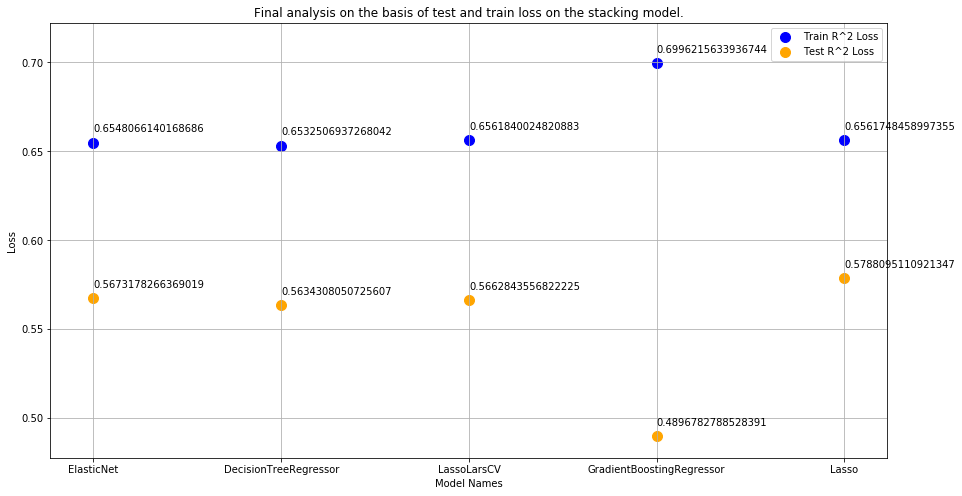

In [167]:
stacking_classifier_selection(classifier_1,classifier_2,Estimators_Trial,1)

<img src = "https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcQmpsaHLkv3d85Eamq-zGl2K2cA4d3xptRbr4XGZ79R9pl6sn2n"
width="60" height="34">
<font face="verdana" color="006400"><u>My Thought Process:</u>From above i see difference between train and test is .078 so i will choose .075 model combination now which  is <b>first combination.</b></font>

<img src = "https://i.imgur.com/5kApgf6.png">

<h1>Final Model</h1>

In [168]:
# Using the stacking techniques to provide robustness to the model
stacked_pipeline = make_pipeline(
    StackingEstimator(estimator=LassoLarsCV(normalize=True,cv=5)),
    StackingEstimator(estimator=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,learning_rate=0.1,\
                          loss='ls', max_depth=3,max_features=0.55, max_leaf_nodes=None,\
                          min_impurity_decrease=0.0, min_impurity_split=None,\
                          min_samples_leaf=14, min_samples_split=16,\
                          min_weight_fraction_leaf=0.0, n_estimators=100,\
                          n_iter_no_change=None, presort='auto',\
                          random_state=19, subsample=0.8, tol=0.0001,\
                          validation_fraction=0.1, verbose=0, warm_start=False)),
    LassoLarsCV(normalize=True,cv=5)
)
stacked_pipeline.fit(train, actual_y)
results = stacked_pipeline.predict(test)   

In [169]:
'''Average the preditionon test data  of both models then save it on a csv file'''
results = stacked_pipeline.predict(scaled_test)
sub = pd.DataFrame()
i = .62
sub['ID'] = test['ID']
sub['y'] = y_pred*(1-i) + results*i
sub.to_csv('submission_Final.csv', index=False)
# i was getting public score 0.55438 for .62 so i choosed this.

<h4>2. Voting Regressor</h4>

In [129]:
 from sklearn.ensemble import VotingRegressor
    
r1 = LassoLarsCV(fit_intercept=True, verbose=True, max_iter=500, normalize=True, precompute='auto',\
                        cv=5, max_n_alphas=1000, n_jobs=None, eps=2.220446049250313e-16, copy_X=True, positive=False)

r2 = GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=0.55, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=14, min_samples_split=16,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto',
                          random_state=19, subsample=0.8, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)
r3 = ElasticNet(alpha=.7, fit_intercept=True, normalize=False, max_iter=100,\
                            random_state=23)
r4 = DecisionTreeRegressor(ccp_alpha=0.0, criterion='friedman_mse', max_depth=3,\
                      max_features=None, max_leaf_nodes=50,\
                      min_impurity_decrease=0.0, min_impurity_split=None,\
                      min_samples_leaf=1, min_samples_split=5,\
                      min_weight_fraction_leaf=0.0, presort='deprecated',\
                      random_state=2, splitter='best')

Voting_regressor = VotingRegressor([('LR', r1), ('GR', r2), ('RR', r3),('DT',r4)])

clf = Voting_regressor.fit(scaled_train,actual_y)
clf.fit(scaled_train, actual_y) 

Scores = cross_validate(clf, scaled_train, actual_y, cv=5,scoring=('r2'),\
                                return_train_score=True)

print(f" Train score for classifier {used_clf} is {Scores['train_score']}")
print(f" Test score for classifier {used_clf} is {Scores['test_score']}")  
print(f" Test means score : {np.mean(Scores['test_score'])}")  
print(f" train means score : {np.mean(Scores['train_score'])}") 
train_dict.update({"3" : np.mean(Scores['train_score'])})
test_dict.update({"3" : np.mean(Scores['test_score'])})

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_j

 Train score for classifier Lasso is [0.58148784 0.60773365 0.59440982 0.60827631 0.57725532]
 Test score for classifier Lasso is [0.58463771 0.5179664  0.58388747 0.51956451 0.62839563]
 Test means score : 0.5668903449792282
 train means score : 0.5938325892878066


<img src = "https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcQmpsaHLkv3d85Eamq-zGl2K2cA4d3xptRbr4XGZ79R9pl6sn2n"
width="60" height="34">
<font face="verdana" color="006400"><u>Voting Regressor i can see is giving good result, CV score is not fluctuating that much and train score is good.
but when i check the above the voting regressor on kaggle public score, it is not giving not result. Private score : .53201</b></font>

<h3>7.Deep Learning Model Architecture</h3>

In [0]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense 
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras import backend
import os

input_dim = 437
output_dim = 1
batch_size = 5
epochs = 50
model_adam = Sequential()

model_adam.add(Dense(500, activation='relu', input_shape=(input_dim,)))

model_adam.add(Dropout(0.2))

model_adam.add(Dense(450, activation='relu'))

model_adam.add(Dropout(0.5))

model_adam.add(Dense(300, activation='relu'))

model_adam.add(Dropout(0.5))

model_adam.add(Dense(100, activation='relu'))

model_adam.add(Dense(10, activation='relu'))

model_adam.add(Dense(output_dim))

In [55]:
model_adam.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_38 (Dense)             (None, 500)               219000    
_________________________________________________________________
dropout_22 (Dropout)         (None, 500)               0         
_________________________________________________________________
dense_39 (Dense)             (None, 450)               225450    
_________________________________________________________________
dropout_23 (Dropout)         (None, 450)               0         
_________________________________________________________________
dense_40 (Dense)             (None, 300)               135300    
_________________________________________________________________
dropout_24 (Dropout)         (None, 300)               0         
_________________________________________________________________
dense_41 (Dense)             (None, 100)              

In [0]:
def rmse(y_true, y_pred):
	return backend.sqrt(backend.mean(backend.square(y_pred - y_true), axis=-1))
 
def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()

def r2_keras(y_true, y_pred):
    SS_res =  backend.sum(backend.square(y_true - y_pred)) 
    SS_tot = backend.sum(backend.square(y_true - backend.mean(y_true))) 
    return -( 1 - SS_res/(SS_tot) )
  

    

In [56]:
model_adam.compile(optimizer='adam', loss=[r2_keras], metrics=[rmse,r2_keras])

checkpoint_path = "/content/gdrive/My Drive/SelfCaseStudy/train/attempt_1/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)
# Create checkpoint callback
cp_callback = tensorflow.keras.callbacks.ModelCheckpoint(checkpoint_path,save_best_only=True,\
                                                  save_weights_only=False ,monitor='val_r2_keras',mode= "max",\
                                                  verbose=1)


model = model_adam.fit(decomposed_train, actual_y, batch_size=batch_size , verbose = 2, epochs=300,callbacks=[cp_callback], validation_split=0.2)

Train on 3367 samples, validate on 842 samples
Epoch 1/300

Epoch 00001: val_r2_keras improved from -inf to -3.89222, saving model to /content/gdrive/My Drive/SelfCaseStudy/train/attempt_1/cp.ckpt
3367/3367 - 5s - loss: 35.3902 - rmse: 35.3902 - r2_keras: -5.5299e+01 - val_loss: 15.5164 - val_rmse: 15.5164 - val_r2_keras: -3.8922e+00
Epoch 2/300

Epoch 00002: val_r2_keras did not improve from -3.89222
3367/3367 - 3s - loss: 18.5720 - rmse: 18.5720 - r2_keras: -7.3997e+00 - val_loss: 25.9530 - val_rmse: 25.9530 - val_r2_keras: -1.1422e+01
Epoch 3/300

Epoch 00003: val_r2_keras improved from -3.89222 to -1.59816, saving model to /content/gdrive/My Drive/SelfCaseStudy/train/attempt_1/cp.ckpt
3367/3367 - 2s - loss: 18.2641 - rmse: 18.2641 - r2_keras: -1.1674e+01 - val_loss: 10.0039 - val_rmse: 10.0039 - val_r2_keras: -1.5982e+00
Epoch 4/300

Epoch 00004: val_r2_keras did not improve from -1.59816
3367/3367 - 3s - loss: 17.1177 - rmse: 17.1177 - r2_keras: -6.5093e+00 - val_loss: 20.7584 - v

Train RMSE: 9.249127602118385


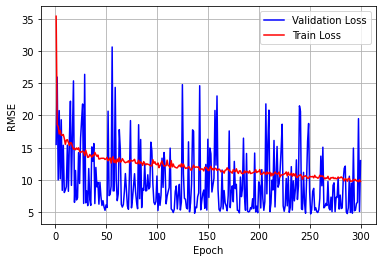

In [57]:
score = model_adam.evaluate(decomposed_train, actual_y, verbose=0) 
print('Train RMSE:', score[0]) 

fig,ax = plt.subplots(1,1)
ax.set_xlabel('Epoch')
ax.set_ylabel('RMSE')
x = list(range(1,300+1))

vy = model.history['val_loss']
ty = model.history['loss']
plt_dynamic(x, vy, ty, ax)

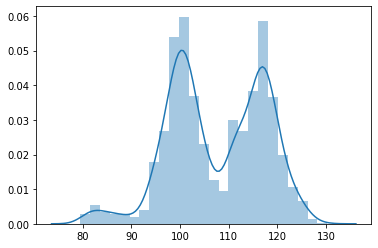

In [59]:
sns.distplot(model_adam.predict(decomposed_test))

In [0]:
sub = pd.DataFrame()
sub['ID'] = test['ID']
sub['y'] = model_adam.predict(decomposed_test)
sub.to_csv('/content/gdrive/My Drive/SelfCaseStudy/submission_Final.csv', index=False)

<h4>SUMMARY OF FULL CASE STUDY</h4>

<!DOCTYPE html>
<html>
<head>
<style>
table {
  font-family: arial, sans-serif;
  border-collapse: collapse;
  width: 100%;
}

td, th {
  border: 1px solid #dddddd;
  text-align: left;
  padding: 8px;
}

tr:nth-child(even) {
  background-color: #dddddd;
}
</style>
</head>
<body>
<h4><center>MODEL SUMMARY</center></h4>
<h4><center>ATTEMPT 1</center></h4>

<table>
 <tr>
    <th>SN0</th>
    <th>Model</th>
    <th>Encoding</th>
    <th>Imputation</th>
    <th>Hyperparameter</th>
    <th>R^2 Loss</th>
    <th>RMSE</th>
    <th>KAGGLE PRIVATE SCORE</th>  
  </tr>
  <tr>
    <td>1.</td>
    <td>LASSO REGRESSION MODEL</td>
    <td>LABEL ENCODING</td>
    <td>ABOVE 150 SEC VALUES IMPUTED WITH 100</td>
    <td>ALPHA = .6</td>
    <td>0.58</td> 
    <td>7.761</td>
    <td>0.51926</td>  
  </tr>
   <tr>
    <td>2.</td>
    <td>RIDGE REGRESSION MODEL</td>
    <td>LABEL ENCODING</td>
    <td>ABOVE 150 SEC VALUES IMPUTED WITH 100</td>
    <td>ALPHA = .2</td>
    <td>0.632</td> 
    <td>7.25</td>  
    <td>-14.88253</td>     
  </tr>  
  <tr>
    <td>3.</td>
    <td>ELASTICNET MODEL</td>
    <td>LABEL ENCODING</td>
    <td>ABOVE 150 SEC VALUES IMPUTED WITH 100</td>
    <td>ALPHA = .9</td>
    <td> 0.58</td> 
    <td>7.70</td>
    <td>0.51776</td>  
  </tr> 
  <tr>
    <td>4.</td>
    <td>LASSOLARS MODEL</td>
    <td>LABEL ENCODING</td>
    <td>ABOVE 150 SEC VALUES IMPUTED WITH 100</td>
    <td>Normalize = TRUE</td>
    <td>0.60</td> 
    <td >7.576</td> 
    <td>0.523</td>   
  </tr>  
    <td>5.</td>
    <td>DECISIONTREE MODEL</td>
    <td>LABEL ENCODING</td>
    <td>ABOVE 150 SEC VALUES IMPUTED WITH 100</td>
    <td>Multi-Parameters</td>
    <td>0.645</td> 
    <td>7.128</td> 
    <td>.53772</td> 
  </tr>
  
   <tr>  
    <td>6.</td>
    <td>SVR MODEL</td>
    <td>LABEL ENCODING</td>
    <td>ABOVE 150 SEC VALUES IMPUTED WITH 100</td>
    <td>C value : 1</td>
    <td>.52</td> 
    <td>8.24</td> 
    <td>No</td> 
  </tr>
  
  <tr>  
    <td>7.</td>
    <td>XGBOOST</td>
    <td>LABEL ENCODING</td>
    <td>ABOVE 150 SEC VALUES IMPUTED WITH 100</td>
    <td>Mupliple parameters </td>
    <td>.65</td> 
    <td>7.01</td> 
    <td>.53701</td> 
  </tr>
    <tr>  
    <td>8.</td>
    <td>GBDT</td>
    <td>LABEL ENCODING</td>
    <td>ABOVE 150 SEC VALUES IMPUTED WITH 100</td>
    <td>Multiple Parameters: </td>
    <td>0.6363</td> 
    <td>7.32</td> 
    <td>.53901</td> 
  </tr>

</table>

<h4><center>ATTEMPT 2</center></h4>
<table>
 <tr>
    <th>SN0</th>
    <th>Model</th>
    <th>Encoding</th>
    <th>Imputation</th>
    <th>Hyperparameter</th>
    <th>R^2 Loss</th>
    <th>RMSE</th>
    <th>KAGGLE PRIVATE SCORE</th>  
  </tr>
   <tr>
    <td>8.</td>
    <td>LASSO REGRESSION MODEL</td>
    <td>LABEL ENCODING</td>
    <td>REMOVED 12 UNIMPORTANT FEATURES FROM THE DATASET </td>
    <td>ALPHA = .9</td>
    <td>0.58</td> 
    <td>7.761</td>
    <td>0.51926</td>  
  </tr>  
</table>

<h4><center>ATTEMPT 3</center></h4>
<table>
 <tr>
    <th>SN0</th>
    <th>Model</th>
    <th>Encoding</th>
    <th>Imputation</th>
    <th>Hyperparameter</th>
    <th>R^2 Loss</th>
    <th>RMSE</th>
    <th>KAGGLE PRIVATE SCORE</th>  
  </tr>
  <tr>
    <td>9.</td>
    <td>LASSO REGRESSION MODEL</td>
    <td>LABEL ENCODING</td>
    <td>iMPUTED 265.32 ONLY WITH 100 </td>
    <td>ALPHA = .9</td>
    <td>0.553</td> 
    <td>8.29</td>
    <td>0.52224</td>  
   </tr> 
   <tr>
    <td>10.</td>
    <td>RIDGE REGRESSION MODEL</td>
    <td>LABEL ENCODING</td>
    <td>iMPUTED 265.32 ONLY WITH 100 </td>
    <td>ALPHA = 400</td>
    <td>0.031</td> 
    <td>12.22</td>
    <td>0.12</td>   
  </tr>
  <tr>
    <td>11.</td>
    <td>ELASTICNET REGRESSION MODEL</td>
    <td>LABEL ENCODING</td>
    <td>iMPUTED 265.32 ONLY WITH 100 </td>
    <td>ALPHA = .7</td>
    <td>0.573</td> 
    <td>8.10</td>
    <td>.52685</td>   
  </tr> 
  <tr>
    <td>12.</td>
    <td>LASSOLARS  MODEL</td>
    <td>LABEL ENCODING</td>
    <td>iMPUTED 265.32 ONLY WITH 100 </td>
    <td>NORMALIZE = TRUE</td>
    <td>0.555</td> 
    <td>8.28</td>
    <td>.5173</td>   
  </tr>
  <tr>
    <td>13.</td>
    <td>DECISIONTREE REGRESSOR  MODEL</td>
    <td>LABEL ENCODING</td>
    <td>iMPUTED 265.32 ONLY WITH 100 </td>
    <td>MultiHyperparameters</td>
    <td>0.60</td> 
    <td>7.86</td>
    <td>.54353</td>   
  </tr>
  <tr>
    <td>14.</td>
    <td>SVR MODEL</td>
    <td>LABEL ENCODING</td>
    <td>iMPUTED 265.32 ONLY WITH 100 </td>
    <td>C Value : 1</td>
    <td>8.80</td> 
    <td>.495</td>
    <td>No</td>   
  </tr>
  <tr>
    <td>15.</td>
    <td>XGBOOST MODEL</td>
    <td>LABEL ENCODING</td>
    <td>iMPUTED 265.32 ONLY WITH 100 </td>
    <td>MultiHyperparameters</td>
    <td>--</td> 
    <td>--</td>
    <td>--</td>   
  </tr>
    
   <tr>
    <td>16.</td>
    <td>GBDT MODEL</td>
    <td>LABEL ENCODING</td>
    <td>iMPUTED 265.32 ONLY WITH 100 </td>
    <td>MultiHyperparameters</td>
    <td>--</td> 
    <td>.62</td>
    <td>.53003</td>   
  </tr>
</table>

<h4><center>ATTEMPT 4</center></h4>
<table>
 <tr>
    <th>SN0</th>
    <th>Model</th>
    <th>Encoding</th>
    <th>Imputation</th>
    <th>Hyperparameter</th>
    <th>R^2 Loss</th>
    <th>RMSE</th>
    <th>KAGGLE PRIVATE SCORE</th>  
  </tr>
 <tr>
    <td>16.</td>
    <td>LASSO REGRESSION  MODEL</td>
    <td>LABEL ENCODING</td>
    <td>iMPUTED 265.32 ONLY WITH 130 </td>
    <td>ALPHA = .9</td>
    <td>.5521</td> 
    <td>8.31</td>
    <td>0.52215</td>   
  </tr>
  <tr>
    <td>17.</td>
    <td>RIDGE REGRESSION  MODEL</td>
    <td>LABEL ENCODING</td>
    <td>iMPUTED 265.32 ONLY WITH 130 </td>
    <td>ALPHA = 400</td>
    <td>0.031</td> 
    <td>12.23</td>
    <td>-</td>   
  </tr>
<tr>
    <td>7.</td>
    <td>ELASTICNET REGRESSION  MODEL</td>
    <td>LABEL ENCODING</td>
    <td>iMPUTED 265.32 ONLY WITH 130 </td>
    <td>ALPHA = .7</td>
    <td>0.572</td> 
    <td>8.12</td>
    <td>.52693-</td>   
  </tr>
   <tr>
    <td>18.</td>
    <td>LASSOLARS MODEL</td>
    <td>LABEL ENCODING</td>
    <td>iMPUTED 265.32 ONLY WITH 130 </td>
    <td>ALPHA = .7</td>
    <td>0.59</td> 
    <td>8.104</td>
    <td>.53496-</td>   
  </tr>
   <tr>
    <td>19.</td>
    <td>DECISIONTREE REGRESSOR  MODEL</td>
    <td>LABEL ENCODING</td>
    <td>iMPUTED 265.32 ONLY WITH 130 </td>
    <td>Mutli-Parameters</td>
    <td>0.60</td> 
    <td>7.86</td>
    <td>.54356</td>   
  </tr>
   <tr>
    <td>20.</td>
    <td>SVR MODEL</td>
    <td>LABEL ENCODING</td>
    <td>iMPUTED 265.32 ONLY WITH 130 </td>
    <td>C = .7</td>
    <td>0.49</td> 
    <td>8.8</td>
    <td>.42905-</td>   
  </tr>
       <tr>
    <td>21.</td>
    <td>GBDT MODEL</td>
    <td>LABEL ENCODING</td>
    <td>iMPUTED 265.32 ONLY WITH 130 </td>
    <td>Multiple parameters</td>
    <td>.5921</td> 
    <td>8.01</td>
    <td>.5421-</td>   
  </tr>
</table>

<h4><center>ATTEMPT 5</center></h4>

<table>
	<tr>
    <th>SN0</th>
    <th>Model</th>
    <th>Encoding</th>
    <th>Imputation</th>
    <th>Hyperparameter</th>
    <th>R^2 Loss</th>
    <th>RMSE</th>
    <th>KAGGLE PRIVATE SCORE</th>  
  </tr>
	<tr>
    <td>21.</td>
    <td>LASSO MODEL</td>
    <td>ONE HOT ENCODING</td>
    <td>iMPUTED 265.32 ONLY WITH 130 </td>
    <td>ALPHA = .09</td>
    <td>0.58</td> 
    <td>8.04</td>
    <td>.53174-</td>   
  </tr>
  
   <tr>
    <td>22.</td>
    <td>RIDGE MODEL</td>
    <td>ONE HOT ENCODING</td>
    <td>iMPUTED 265.32 ONLY WITH 130 </td>
    <td>ALPHA = 400</td>
    <td>0.035</td> 
    <td>12.20</td>
    <td>--</td>   
  </tr>

   <tr>
    <td>23.</td>
    <td>ELASTICNET MODEL</td>
    <td>ONE HOT ENCODING</td>
    <td>iMPUTED 265.32 ONLY WITH 130 </td>
    <td>ALPHA = 400</td>
    <td>0.577</td> 
    <td>8.08</td>
    <td>.52921</td>   
  </tr>


   <tr>
    <td>24.</td>
    <td>LARSLASSO MODEL</td>
    <td>ONE HOT ENCODING</td>
    <td>iMPUTED 265.32 ONLY WITH 130 </td>
    <td>ALPHA = 400</td>
    <td>0.566</td> 
    <td>8.17</td>
    <td>.52329</td>   
  </tr>

  <tr>
    <td>25.</td>
    <td>DECISION TREE MODEL</td>
    <td>ONE HOT ENCODING</td>
    <td>iMPUTED 265.32 ONLY WITH 130 </td>
    <td>Multi parameters</td>
    <td>0.59</td> 
    <td>8.17</td>
    <td>.54356</td>   
  </tr>
  
  <tr>
    <td>26.</td>
    <td>XGBOOST MODEL</td>
    <td>ONE HOT ENCODING</td>
    <td>iMPUTED 265.32 ONLY WITH 130 </td>
    <td>Multi parameters</td>
    <td>0.62</td> 
    <td>7.52</td>
    <td>.5356</td>   
  </tr>  
  <tr>
    <td>25.</td>
    <td>GBDT REGRESSOR</td>
    <td>ONE HOT ENCODING</td>
    <td>iMPUTED 265.32 ONLY WITH 130 </td>
    <td>Multi parameters</td>
    <td>NO</td> 
    <td>NO</td>
    <td>NO</td>   
  </tr>
</table>

<h4><center>ATTEMPT 6</center></h4>
<table>
	<tr>
    <th>SN0</th>
    <th>Model</th>
    <th>Encoding</th>
    <th>Imputation</th>
    <th>Hyperparameter</th>
    <th>R^2 Loss</th>
    <th>RMSE</th>
    <th>KAGGLE PRIVATE SCORE</th>  
  </tr>
	<tr>
    <td>27.</td>
    <td>LASSO MODEL</td>
    <td>LABEL ENCODING without ID feature</td>
    <td>iMPUTED 265.32 ONLY WITH 130 </td>
    <td>ALPHA = .09</td>
    <td>0.58</td> 
    <td>8.00</td>
    <td>.53370</td>   
  </tr>
  
   <tr>
    <td>28.</td>
    <td>DECISION TREE MODEL</td>
    <td>LABEL ENCODING without ID feature</td>
    <td>iMPUTED 265.32 ONLY WITH 130 </td>
    <td>MULTIPARAMETERS</td>
    <td>0.59</td> 
    <td>7.88</td>
    <td>.54218</td>   
  </tr>

   <tr>
    <td>30.</td>
    <td>LASSOLARS MODEL</td>
    <td>LABEL ENCODING without ID feature</td>
    <td>iMPUTED 265.32 ONLY WITH 130 </td>
    <td>NOTMALIZED = TRUE</td>
    <td>0.54</td> 
    <td>8.37</td>
    <td>.506</td>   
  </tr>
 
</table>

<h4><center>ATTEMPT 7</center></h4>

<table>
	<tr>
    <th>SN0</th>
    <th>Model</th>
    <th>Encoding</th>
    <th>Imputation</th>
    <th>Hyperparameter</th>
    <th>R^2 Loss</th>
    <th>RMSE</th>
    <th>KAGGLE PRIVATE SCORE</th>  
  </tr>
	 <tr>
    <td>31.</td>
    <td>LASSO REGRESSION</td>
    <td>DECOMPOSED FEATURES</td>
    <td>iMPUTED 265.32 ONLY WITH 130 </td>
    <td>Multi parameters</td>
    <td>.58</td> 
    <td>8.04</td>
    <td>.5262</td>   
  </tr>

<tr>
    <td>32.</td>
    <td>DECISION TREE</td>
    <td>DECOMPOSED FEATURES</td>
    <td>iMPUTED 265.32 ONLY WITH 130 </td>
    <td>Multi parameters</td>
    <td>.60</td> 
    <td>7.812</td>
    <td>.53264</td>   
  </tr>
    
    
   <tr>
    <td>34.</td>
    <td>XGBOOST</td>
    <td>DECOMPOSED FEATURES</td>
    <td>iMPUTED 265.32 ONLY WITH 130 </td>
    <td>Multi parameters</td>
    <td>--</td> 
    <td>8.002</td>
    <td>.54167</td>   
  </tr>
  
   <tr>
    <td>34.</td>
    <td>GBDT REGRESSOR</td>
    <td>DECOMPOSED FEATURES</td>
    <td>iMPUTED 265.32 ONLY WITH 130 </td>
    <td>Multi parameters</td>
    <td>--</td> 
    <td>8.002</td>
    <td>.53228</td>   
  </tr>
 
</table>

<h4><center>Stacking model</center></h4>

<table>
	<tr>
    <th>SN0</th>
    <th>Model</th>
    <th>Encoding</th>
    <th>Imputation</th>
    <th>Hyperparameter</th>
    <th>R^2 Loss</th>
    <th>RMSE</th>
    <th>KAGGLE PRIVATE SCORE</th>  
  </tr>
	 <tr>
    <td bgcolor="#33FF85">31.</td>
    <td bgcolor="#33FF85">Weighted AVG(Stacking model + (12 Decomposed + Original features) XGBOOST model)</td>
    <td bgcolor="#33FF85">LabelEncoded FEATURES</td>
    <td bgcolor="#33FF85">iMPUTED 265.32 ONLY WITH 130 </td>
    <td bgcolor="#33FF85">Tried different combination and best result is :</td>
    <td bgcolor="#33FF85">-</td> 
    <td bgcolor="#33FF85">-</td>
    <td bgcolor="#33FF85">.55241</td>   
  </tr>

<tr>
    <td>32.</td>
    <td>Voting Regressor TREE</td>
    <td>DECOMPOSED FEATURES</td>
    <td>iMPUTED 265.32 ONLY WITH 130 </td>
    <td>Not giving good result on kaggle public scoreboard</td>
    <td>.60</td> 
    <td>8.812</td>
    <td>.53201</td>   
  </tr>
    
 
</table>
<h4><center>Deep Learning model</center></h4>

<table>
	<tr>
    <th>SN0</th>
    <th>Model</th>
    <th>Encoding</th>
    <th>Imputation</th>
    <th>Hyperparameter</th>
    <th>R^2 Loss</th>
    <th>RMSE</th>
    <th>KAGGLE PRIVATE SCORE</th>  
  </tr>
	 <tr>
    <td>31.</td>
    <td>Deep Learning model</td>
    <td>LabelEncoded FEATURES</td>
    <td>iMPUTED 265.32 ONLY WITH 130 </td>
    <td>Tried different combination and best result is :</td>
    <td>.492</td> 
    <td>9.249</td>
    <td>.48</td>   
  </tr>

 
</table>

</body>
</html>

<h3>9. Possible Further Analysis</h3>

<pre>1. We could have taken the sequencing into consideration in the analysis as Mercedes has given us the data by Random Sampling . We can think logically that one car which went before has some influence on the test time of the current Car test time.</pre>
<pre>2. We could have create some extra features by multiplying and summing some features, though we don't know how much it worth but we could have tried.</pre>